In [1]:
library(tidyverse)
library(readxl)
library(lme4)
library(emmeans)
library(ggplot2)
library(agricolae)
library(dplyr)
library(multcompView)
library(car)
library(readr)
library(ggpubr)
library(tibble)
library(flextable)
library(readODS)
library(stringr)
library(rstatix)
library(knitr)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object

In [2]:
getwd()

[1] "/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022"

In [3]:
f.data<- read_ods("/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/template for final data collection .main.ods"
                  , sheet = 1)

View(f.data)

Nr-plant experiment IDs     Replication treatment BBCH  Collection date
1   121      V22001     2218-11 NA          ww        92    08/12/22       
2   123      V22001     2218-10 NA          ds        92    08/08/22       
3   125      V22001     2156-03 NA          ds        92    08/09/22       
4   126      V22001     2297-14 NA          ds        92    08/08/22       
5   130      V22001     2218-03 NA          ww        92    08/30/22       
6   131      V22001     2352-03 NA          ds        92    11/08/22       
7   133      V22001     2156-08 NA          ds        92    08/08/22       
8   135      V22001     2218-02 NA          ww        92    08/30/22       
9   136      V22001     2364-18 NA          ds        92    08/18/22       
10  138      V22001     2352-13 NA          ds        92    08/08/22       
11  140      V22001     2218-17 NA          ds        92    08/08/22       
12  141      V22001     2095-15 NA          ww        92    08/18/22       
13  143      V22001     2321-08 NA          ds        90-92 11/08/22       
14  145      V22001     2267-03 NA          ds        92    08/12/22       
15  146      V22001     2007-12 NA          ds        92    08/12/22       
16  148      V22001     2321-15 NA          ww        92    08/22/22       
17  150      V22001     2095-12 NA          ds        92    08/08/22       
18  151      V22001     2297-16 NA          ds        92    08/08/22       
19  153      V22001     2364-04 NA          ww        92    08/29/22       
20  155      V22001     2007-07 NA          ds        92    08/12/22       
21  156      V22001     2267-09 NA          ww        92    08/18/22       
22  158      V22001     2156-19 NA          ww        92    08/18/22       
23  160      V22001     2364-12 NA          ds        92    08/12/22       
24  161      V22001     2321-20 NA          ds        92    08/08/22       
25  163      V22001     2297-05 NA          ww        92    08/18/22       
26  165      V22001     2352-10 NA          ww        92    08/18/22       
27  166      V22001     2321-03 NA          ww        92    08/22/22       
28  168      V22001     2095-06 NA          ds        90    08/09/22       
29  170      V22001     2496-14 NA          ds        92    08/12/22       
30  171      V22001     2156-07 NA          ds        92    08/18/22       
⋮   ⋮        ⋮          ⋮       ⋮           ⋮         ⋮     ⋮              
86  266      V22001     2095-19 NA          ww        92    08/18/22       
87  268      V22001     2364-06 NA          ww        92    08/30/22       
88  270      V22001     2007-15 NA          ds        90    08/09/22       
89  271      V22001     2218-08 NA          ww        92    08/18/22       
90  273      V22001     2352-01 NA          ds        91    08/09/22       
91  275      V22001     2218-12 NA          ds        92    11/08/22       
92  276      V22001     2364-19 NA          ds        92    08/18/22       
93  278      V22001     2352-04 NA          ww        92    08/22/22       
94  280      V22001     2496-02 NA          ww        92    08/18/22       
95  281      V22001     2218-13 NA          ds        92    08/09/22       
96  283      V22001     2352-20 NA          ww        92    08/30/22       
97  285      V22001     2007-04 NA          ww        92    08/18/22       
98  286      V22001     2095-09 NA          ds        92    08/08/22       
99  288      V22001     2156-17 NA          ww        92    08/18/22       
100 290      V22001     2267-11 NA          ww        92    08/30/22       
101 291      V22001     2095-11 NA          ww        92    08/22/22       
102 293      V22001     2321-19 NA          ww        92    08/12/22       
103 295      V22001     2321-10 NA          ds        92    08/12/22       
104 296      V22001     2218-15 NA          ww        92    08/12/22       
105 298      V22001     2156-16 NA          ww        92    08/12/22       
106 300      V22001     2095-01 NA          ds      

In [4]:
f.data$IDs <- as.character(f.data$IDs)
f.data$IDs <- gsub("(-|_)[[:digit:]][[:digit:]]","", f.data$IDs)
head(f.data)

Nr-plant experiment IDs  Replication treatment BBCH Collection date
1 121      V22001     2218 NA          ww        92   08/12/22       
2 123      V22001     2218 NA          ds        92   08/08/22       
3 125      V22001     2156 NA          ds        92   08/09/22       
4 126      V22001     2297 NA          ds        92   08/08/22       
5 130      V22001     2218 NA          ww        92   08/30/22       
6 131      V22001     2352 NA          ds        92   11/08/22       
  Max-height Biomass+bags bags weight ⋯ Nr-ears full ears half ears ears-weight
1  91.2      36.39        21.64       ⋯ 10      10        0         15.43      
2  78.0      25.22        20.50       ⋯  5       3        2          3.55      
3  83.0      29.41        21.65       ⋯  3       1        0          1.21      
4  61.0      26.11        20.50       ⋯  6       5        1          3.36      
5 102.0      34.60        20.30       ⋯  9       9        0         10.65      
6  61.0      27.76        22.00       ⋯  3       3        0          3.05      
  Nr-seeds Nr- mature seeds Nr- bad seeds 100 seeds weights(gr)
1 282      282              0             3.73                 
2  67       66              1               NA                 
3  29       29              0               NA                 
4  68       65              3               NA                 
5 214      209              5             3.86                 
6  60       60              0               NA                 
  all seeds weight TKW     
1 10.86            37.30000
2 2.21             32.98507
3 0.66             22.75862
4 1.52             22.35294
5 7.22             38.60000
6 1.90             31.66667

In [5]:
f.data$Replication <- NULL

f.data[8:9]<- NULL 

f.data[19]<- NULL 


In [6]:
head(f.data)

Nr-plant experiment IDs  treatment BBCH Collection date Max-height
1 121      V22001     2218 ww        92   08/12/22         91.2     
2 123      V22001     2218 ds        92   08/08/22         78.0     
3 125      V22001     2156 ds        92   08/09/22         83.0     
4 126      V22001     2297 ds        92   08/08/22         61.0     
5 130      V22001     2218 ww        92   08/30/22        102.0     
6 131      V22001     2352 ds        92   11/08/22         61.0     
  pure biomass Nr-shoots-all shoots-(ear) Shoots-no-ear Nr-ears full ears
1 14.75        10            10.0         0             10      10       
2  4.72         5             5.0         0              5       3       
3  7.76         4             3.0         1              3       1       
4  5.61         7             6.0         1              6       5       
5 14.30         9             9.0         0              9       9       
6  5.76         3             3.5         0              3       3       
  half ears ears-weight Nr-seeds Nr- mature seeds Nr- bad seeds
1 0         15.43       282      282              0            
2 2          3.55        67       66              1            
3 0          1.21        29       29              0            
4 1          3.36        68       65              3            
5 0         10.65       214      209              5            
6 0          3.05        60       60              0            
  all seeds weight TKW     
1 10.86            37.30000
2 2.21             32.98507
3 0.66             22.75862
4 1.52             22.35294
5 7.22             38.60000
6 1.90             31.66667

In [7]:
names(f.data)[1]<- "Unit"
names(f.data)[8]<- "Biomass"
names(f.data)[7]<- "max.Height"
names(f.data)[9]<- "Shoots"
names(f.data)[10]<- "Shoots_with_ear"
names(f.data)[11]<- "Shoots_without_ear"
names(f.data)[12]<- "Nr_ears"
names(f.data)[13]<- "Full_ear"
names(f.data)[14]<- "Half_ear"
names(f.data)[15]<- "Weight_ear"
names(f.data)[16]<- "Nr_seeds"
names(f.data)[17]<- "Mature_seeds"
names(f.data)[18]<- "Poor_seeds"
names(f.data)[20]<- "TKW"
str(f.data)
head(f.data)

'data.frame':	115 obs. of  20 variables:
 $ Unit              : num  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : chr  "2218" "2218" "2156" "2297" ...
 $ treatment         : chr  "ww" "ds" "ds" "ds" ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83 ...
 $ Mature_seeds      : num  2

Unit experiment IDs  treatment BBCH Collection date max.Height Biomass Shoots
1 121  V22001     2218 ww        92   08/12/22         91.2      14.75   10    
2 123  V22001     2218 ds        92   08/08/22         78.0       4.72    5    
3 125  V22001     2156 ds        92   08/09/22         83.0       7.76    4    
4 126  V22001     2297 ds        92   08/08/22         61.0       5.61    7    
5 130  V22001     2218 ww        92   08/30/22        102.0      14.30    9    
6 131  V22001     2352 ds        92   11/08/22         61.0       5.76    3    
  Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear Weight_ear
1 10.0            0                  10      10       0        15.43     
2  5.0            0                   5       3       2         3.55     
3  3.0            1                   3       1       0         1.21     
4  6.0            1                   6       5       1         3.36     
5  9.0            0                   9       9       0        10.65     
6  3.5            0                   3       3       0         3.05     
  Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW     
1 282      282          0          10.86            37.30000
2  67       66          1          2.21             32.98507
3  29       29          0          0.66             22.75862
4  68       65          3          1.52             22.35294
5 214      209          5          7.22             38.60000
6  60       60          0          1.90             31.66667

In [8]:
f.data[,7]


[1]  91.2  78.0  83.0  61.0 102.0  61.0  67.0 100.2  72.4  65.0  68.0  67.3
 [13]  78.0  82.4  68.2  78.8  50.0  63.0  94.7  72.5 103.5 109.0  90.0  62.0
 [25]  79.0  89.5  81.0  51.0  80.9  77.0  77.3  87.0 100.5  95.0  76.5  94.1
 [37]  70.3  64.0  54.0  71.0  68.0  58.0  69.0  99.9  61.0  88.0  65.7  77.0
 [49]  68.6  73.9  87.0  83.4  72.5 834.7  72.2  92.6  55.0  59.7  84.0  91.5
 [61]  74.5  90.0 109.0  85.5  88.0  52.0  68.2 100.5  78.2  71.0  83.5  74.0
 [73]  69.0  58.0  66.3  65.2  78.7  94.0  74.4  93.4  95.7  78.3  97.5  81.1
 [85]  61.0  65.5 102.0  69.0  98.3  66.0  72.0  87.5  89.8  93.5  67.0  83.5
 [97]  86.0  50.0  95.5  85.5  64.5  76.0  72.4  95.4 104.5  47.0  84.0  64.0
[109]  95.0  82.0  78.0  93.5  66.0  89.2 107.6

In [9]:
f.data[54,7] <- "84.7"
f.data[53:60,]
str(f.data)
f.data$max.Height <- as.numeric(f.data$max.Height)

Unit experiment IDs  treatment BBCH Collection date max.Height Biomass
53 210  V22001     2321 ww        92   08/30/22        72.5        9.38  
54 211  V22001     2352 ww        92   08/30/22        84.7       12.62  
55 213  V22001     2297 ww        92   08/30/22        72.2       13.98  
56 215  V22001     2267 ww        92   08/30/22        92.6       17.69  
57 216  V22001     2297 ds        92   08/08/22        55          4.87  
58 218  V22001     2321 ds        92   08/12/22        59.7        4.93  
59 220  V22001     2007 ww        92   08/18/22        84         11.00  
60 221  V22001     2007 ww        92   08/12/22        91.5        8.87  
   Shoots Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear
53  7      7              0                   7       7       0       
54  8      8              0                   8       8       0       
55 14     14              0                  14      14       0       
56 11     11              0                  11       9       2       
57  6      6              0                   6       5       1       
58  5      3              2                   3       3       0       
59  9      9              0                   9       9       0       
60 11     11              0                  11      11       0       
   Weight_ear Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW     
53 10.42      231      216          15         7.20             31.10000
54  9.16      231      231           0         6.03             30.20000
55 13.69      408      403           5         9.04             23.60000
56  9.30      204      186          18         5.85             30.30000
57  3.43       92       92           0         2.03             22.06522
58  3.80      107      107           0         2.37             22.20000
59  2.60        0        0           0         0                 0.00000
60 11.27      226      226           0         8.17             36.70000

'data.frame':	115 obs. of  20 variables:
 $ Unit              : num  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : chr  "2218" "2218" "2156" "2297" ...
 $ treatment         : chr  "ww" "ds" "ds" "ds" ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : chr  "91.2" "78" "83" "61" ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83 ...
 $ Mature_seeds      : nu

In [10]:
f.data$treatment <- as.factor(f.data$treatmen)
f.data$Unit <- as.character(f.data$Unit)
f.data$IDs <- as.factor(f.data$IDs)
f.data$TKW<- round(f.data$TKW, digits=2)
View(f.data)

Unit experiment IDs  treatment BBCH  Collection date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  145  V22001     2267 ds        92    08/12/22         82.4       8.63  
15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
21  156  V22001     2267 ww        92    08/18/22        103.5      18.56  
22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
86  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
87  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
88  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
89  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
90  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
91  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
92  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
93  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
94  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
95  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
96  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
97  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
98  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
99  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
100 290  V22001     2267 ww        92    08/30/22         85.5      13.50  
101 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
102 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
103 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
104 296  V22001     2218 ww        92    08/12/22         95.4      16.54  
105 298  V22001     2156 ww        92    08/12/22        104.5      21.83  
106 300  V22001     2095 ds        92    08/08/22   

In [11]:
#logic = str_detect(f.data$IDs, "2267")
#f.data = f.data[!logic,]
length(unique(f.data$IDs))

[1] 10

In [12]:
f.data[59, ]
final.data <- f.data[-59, ]
#View(final.data)
dim(final.data)

Unit experiment IDs  treatment BBCH Collection date max.Height Biomass
59 220  V22001     2007 ww        92   08/18/22        84         11     
   Shoots Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear
59 9      9               0                  9       9        0       
   Weight_ear Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW
59 2.6        0        0            0          0                0

[1] 114  20

In [13]:
check=unique(final.data$IDs)
check
str(final.data)

final.data$IDs <- droplevels(final.data$IDs)
str(final.data)
levels(final.data$IDs)

[1] 2218 2156 2297 2352 2364 2095 2321 2267 2007 2496
Levels: 2007 2095 2156 2218 2267 2297 2321 2352 2364 2496

'data.frame':	114 obs. of  20 variables:
 $ Unit              : chr  "121" "123" "125" "126" ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83

[1] "2007" "2095" "2156" "2218" "2267" "2297" "2321" "2352" "2364" "2496"

In [14]:
getwd()

[1] "/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022"

In [15]:
options(repr.plot.width=20, repr.plot.height=10)
Biomass <- ggplot(final.data, aes(x=IDs, y=Biomass, fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks =final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Biomass [g]", x="lines")+
#theme_bw()+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))
    print(Biomass)



ggsave("Biomass-boxplot.png", plot = Biomass, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")




                         
         

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


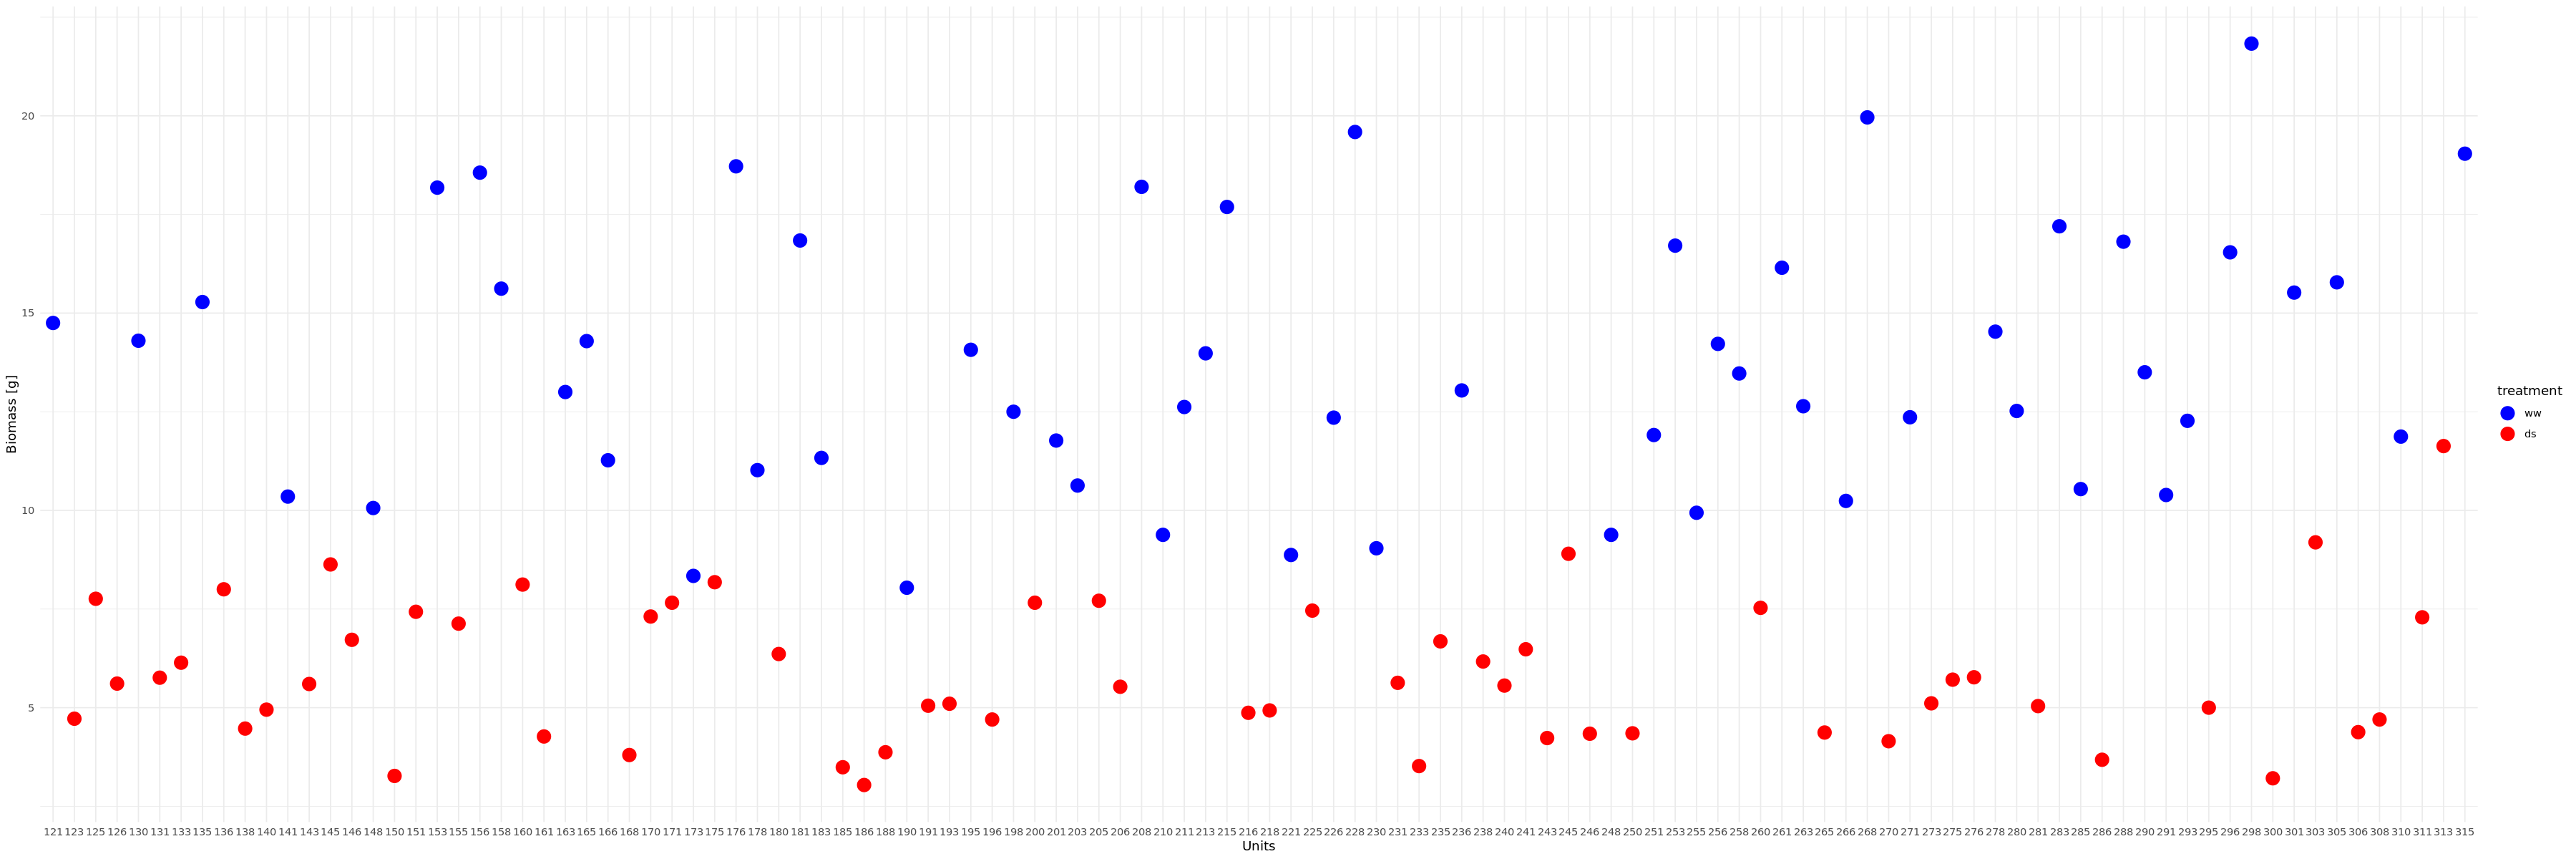

In [16]:
final.data$Unit<- as.character(final.data$Unit)
options(repr.plot.width=30, repr.plot.height=10)
Bs<-  ggplot(final.data, aes(x=Unit, y=Biomass,color=treatment))+
  geom_point(size=5)+
 scale_color_manual(breaks = c("ww", "ds"),
                        values=c("blue", "red"))+
theme(text=element_text(size = 20))+
  ylab('Biomass [g]')+
  xlab('Units')+
  theme_minimal()
print(Bs)

ggsave("Biomass-scatter.pdf", plot = Bs, width = 30, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")


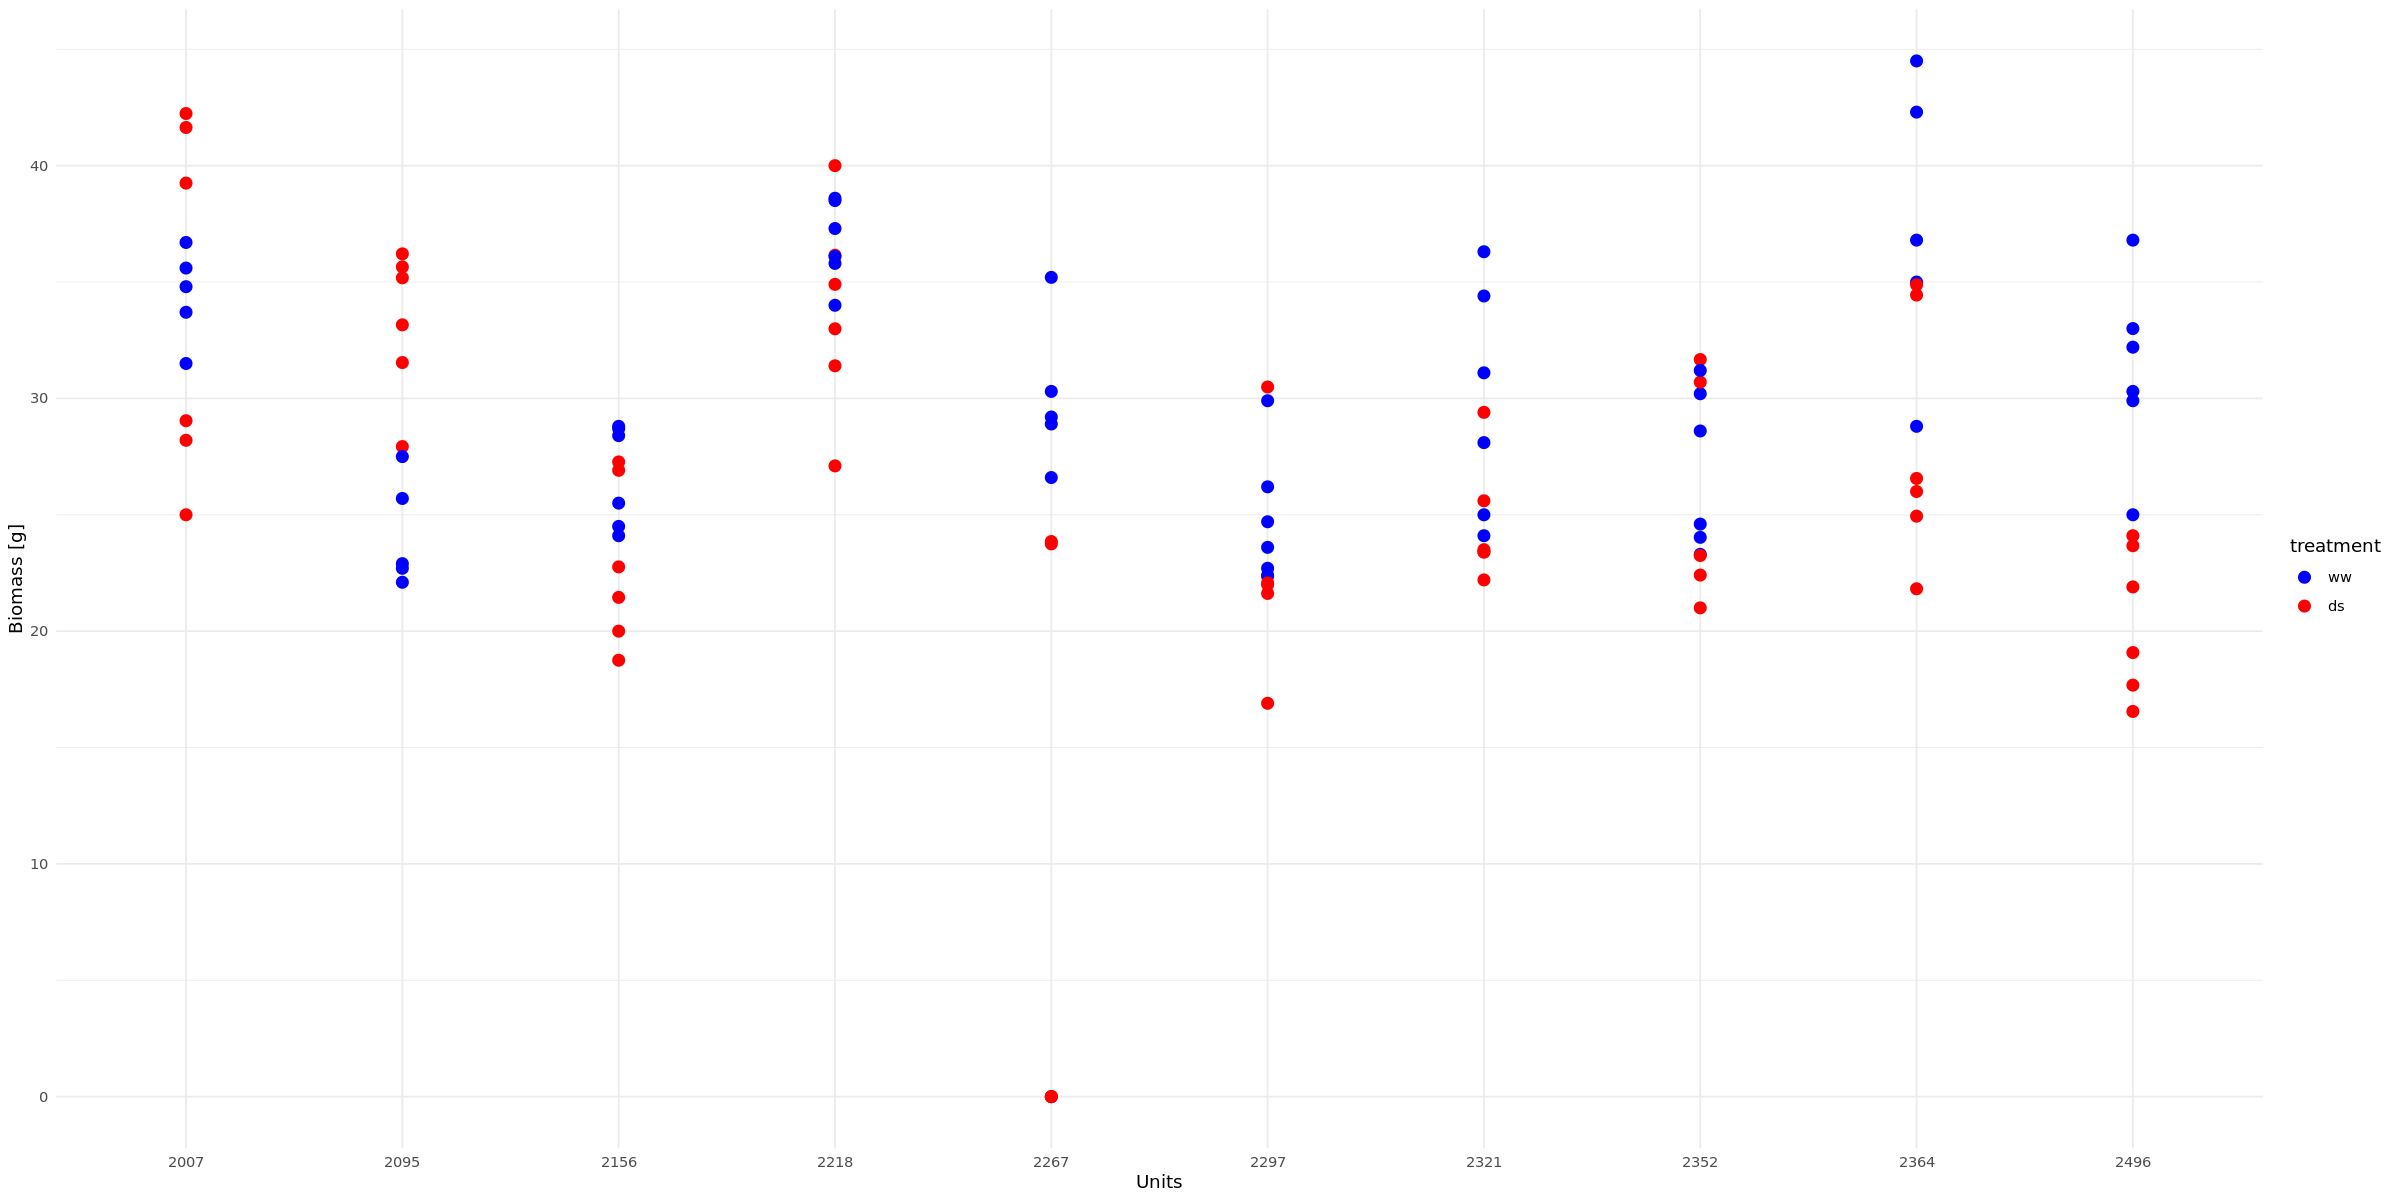

In [17]:
options(repr.plot.width=20, repr.plot.height=10)
B1<- ggplot(final.data, aes(x=IDs, y=TKW, color=treatment))+
 
  geom_point(size=3)+
 scale_color_manual(breaks = c("ww", "ds"),
                        values=c("blue", "red"))+
theme(text=element_text(size = 25))+
  ylab('Biomass [g]')+
  xlab('Units')+
  theme_minimal()
print(B1)

ggsave("Biomass-line-scatter.pdf", plot = B1, width = 30, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

In [18]:
length(f.data$Biomass[f.data$treatment=="ww"])
 length(f.data$Biomass[f.data$treatment=="ds"])

[1] 57

[1] 58

# Check for the normal distribution of each group

## First making separate groups and assign to a variable

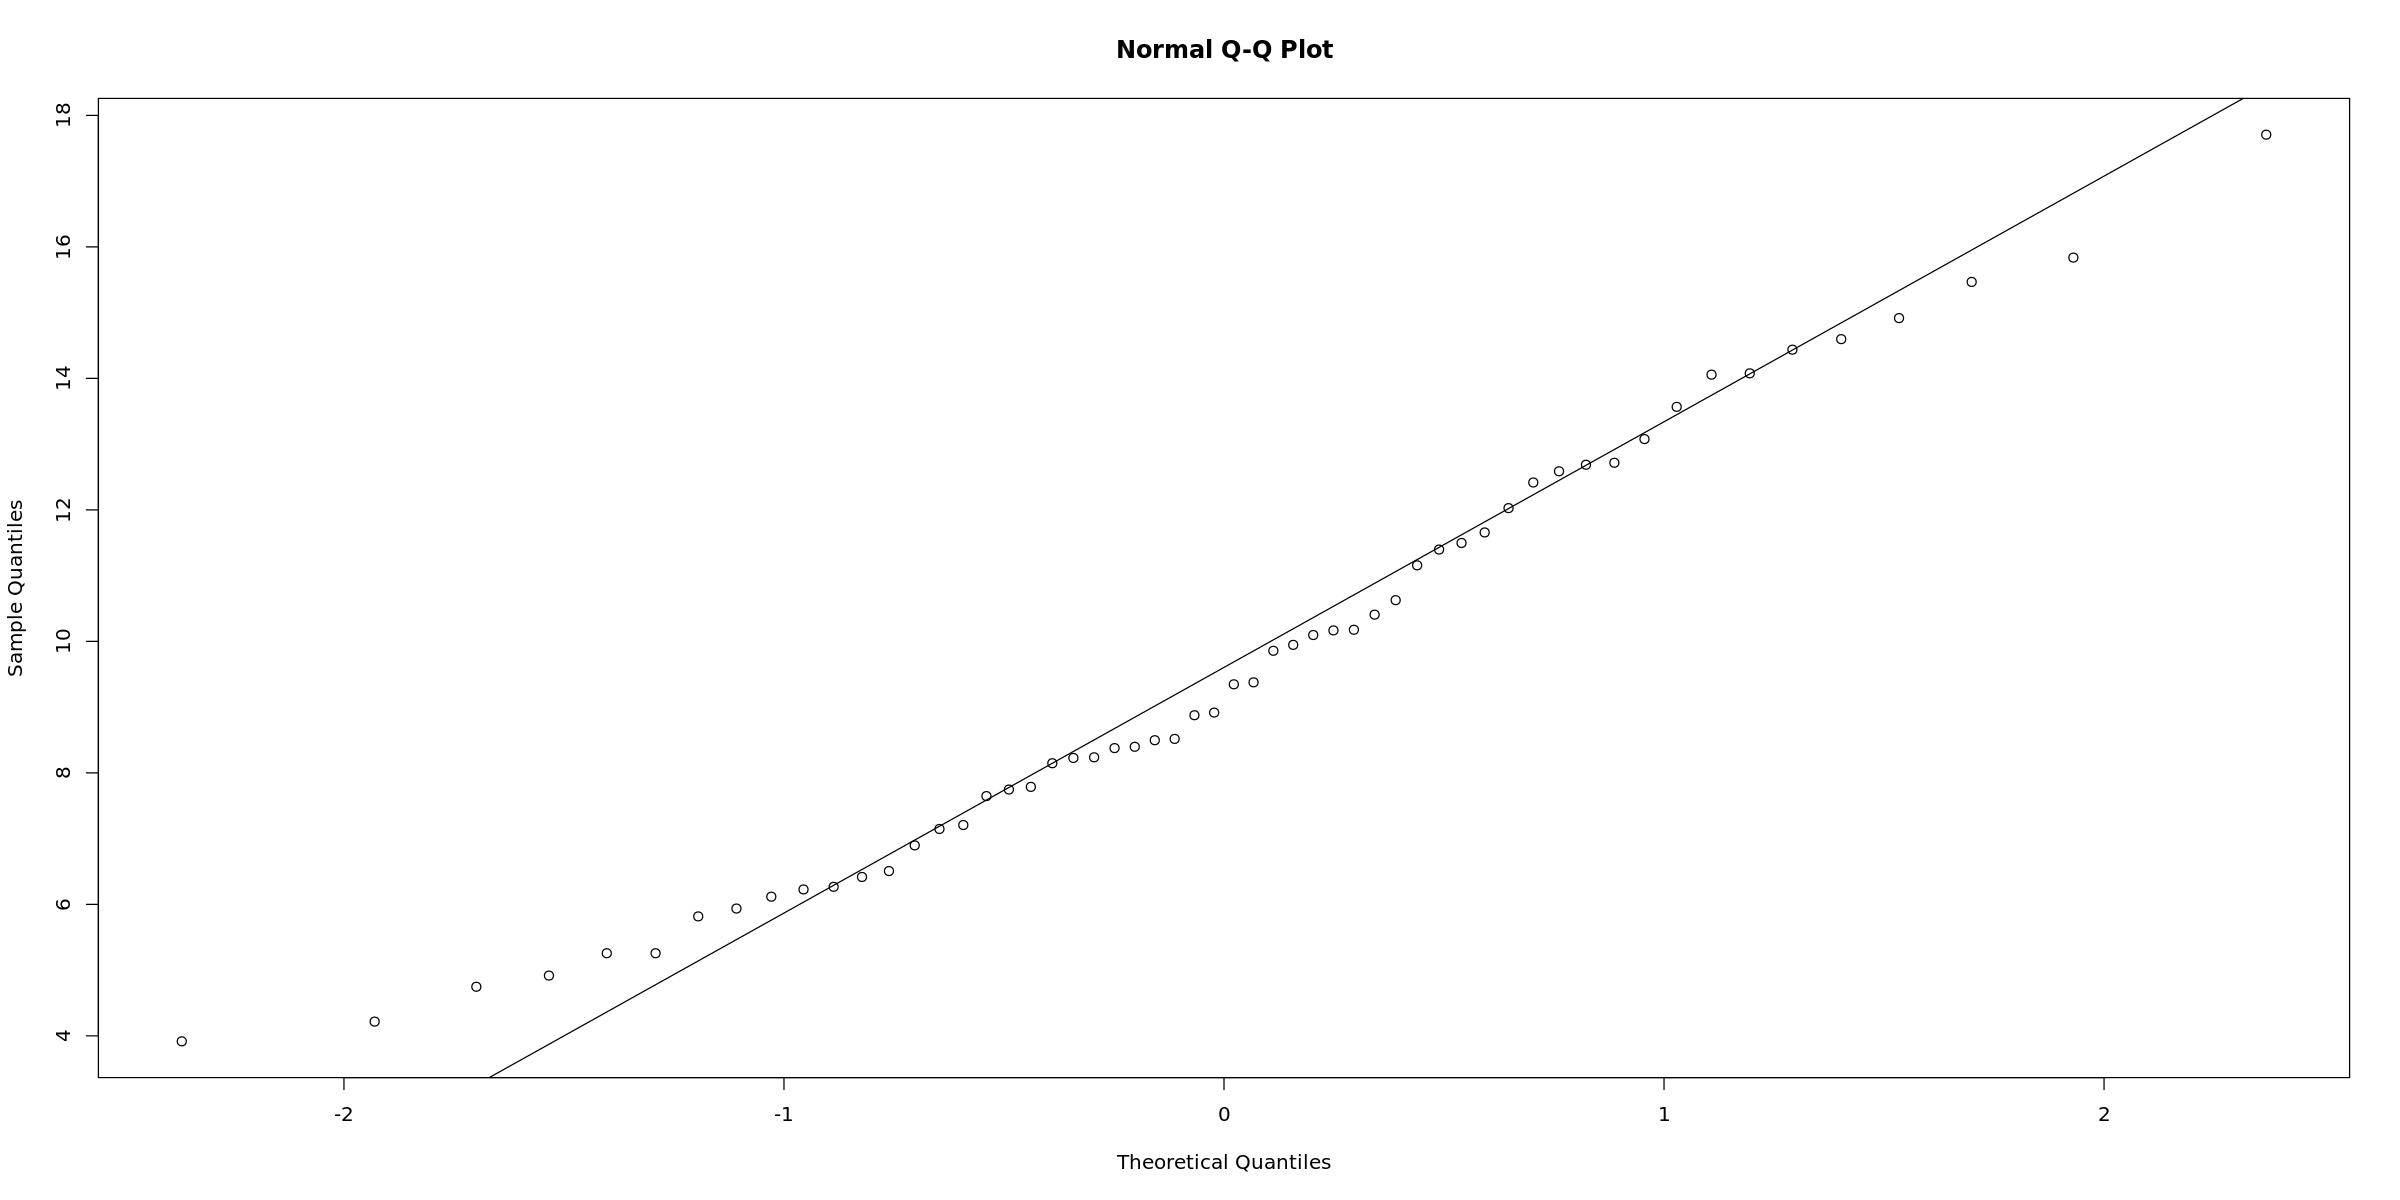

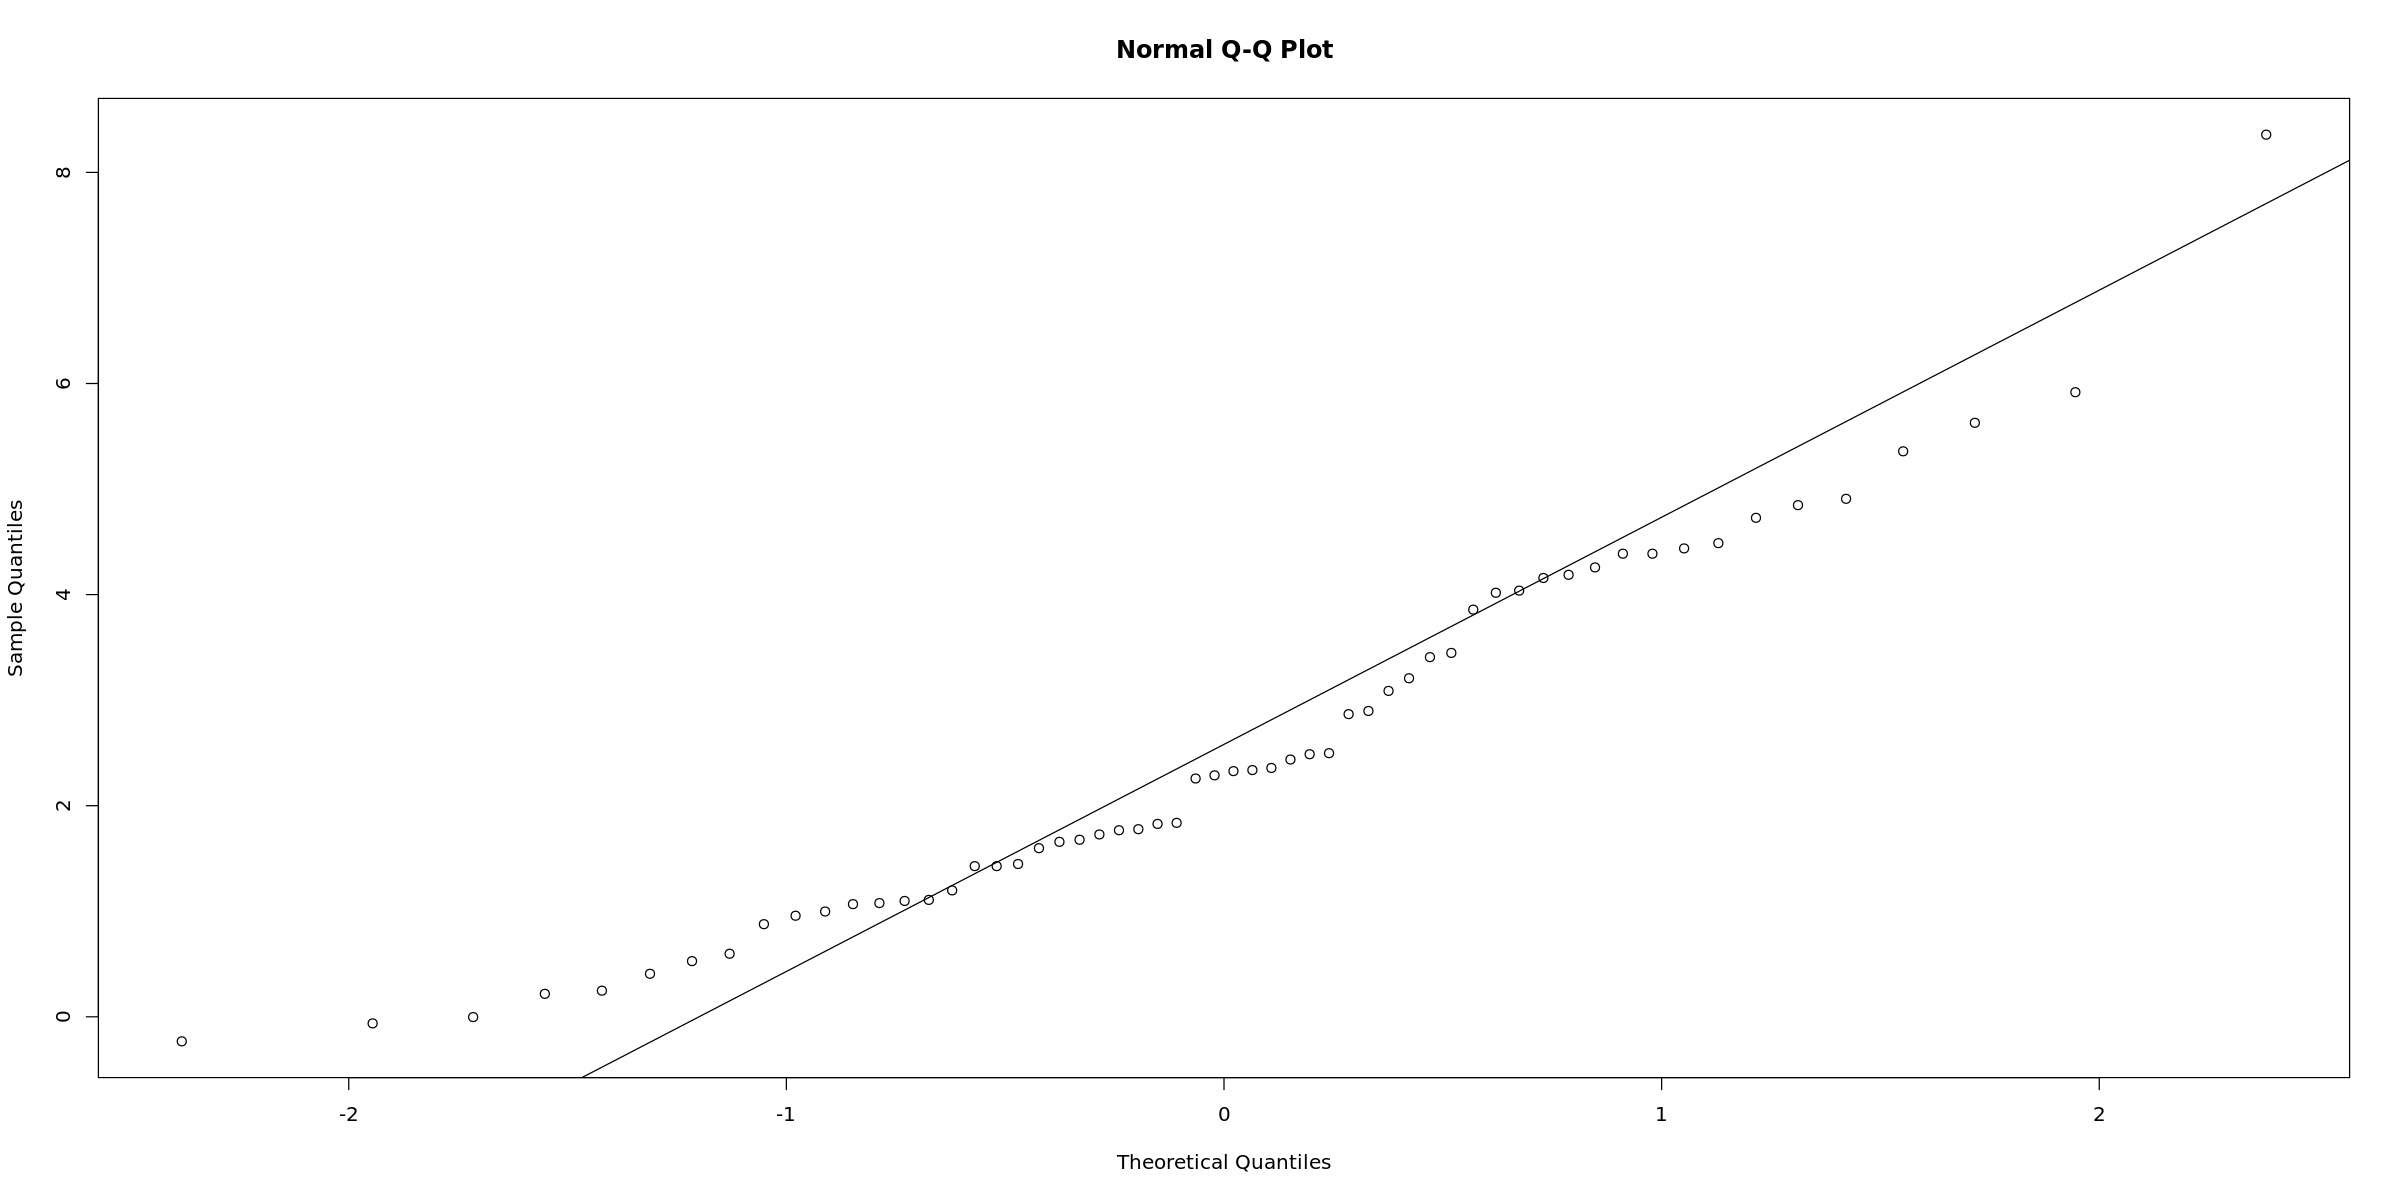

In [19]:
control_fdata<- final.data$Biomass[final.data$treatment=="ww"]
stress_fdata <- final.data$Biomass[final.data$treatment=="ds"]


qqnorm(control_fdata- mean(control_fdata)/sd(control_fdata))
qqline(control_fdata- mean(control_fdata)/sd(control_fdata))


qqnorm(stress_fdata - mean(stress_fdata)/sd(stress_fdata))
qqline(stress_fdata - mean(stress_fdata)/sd(stress_fdata))


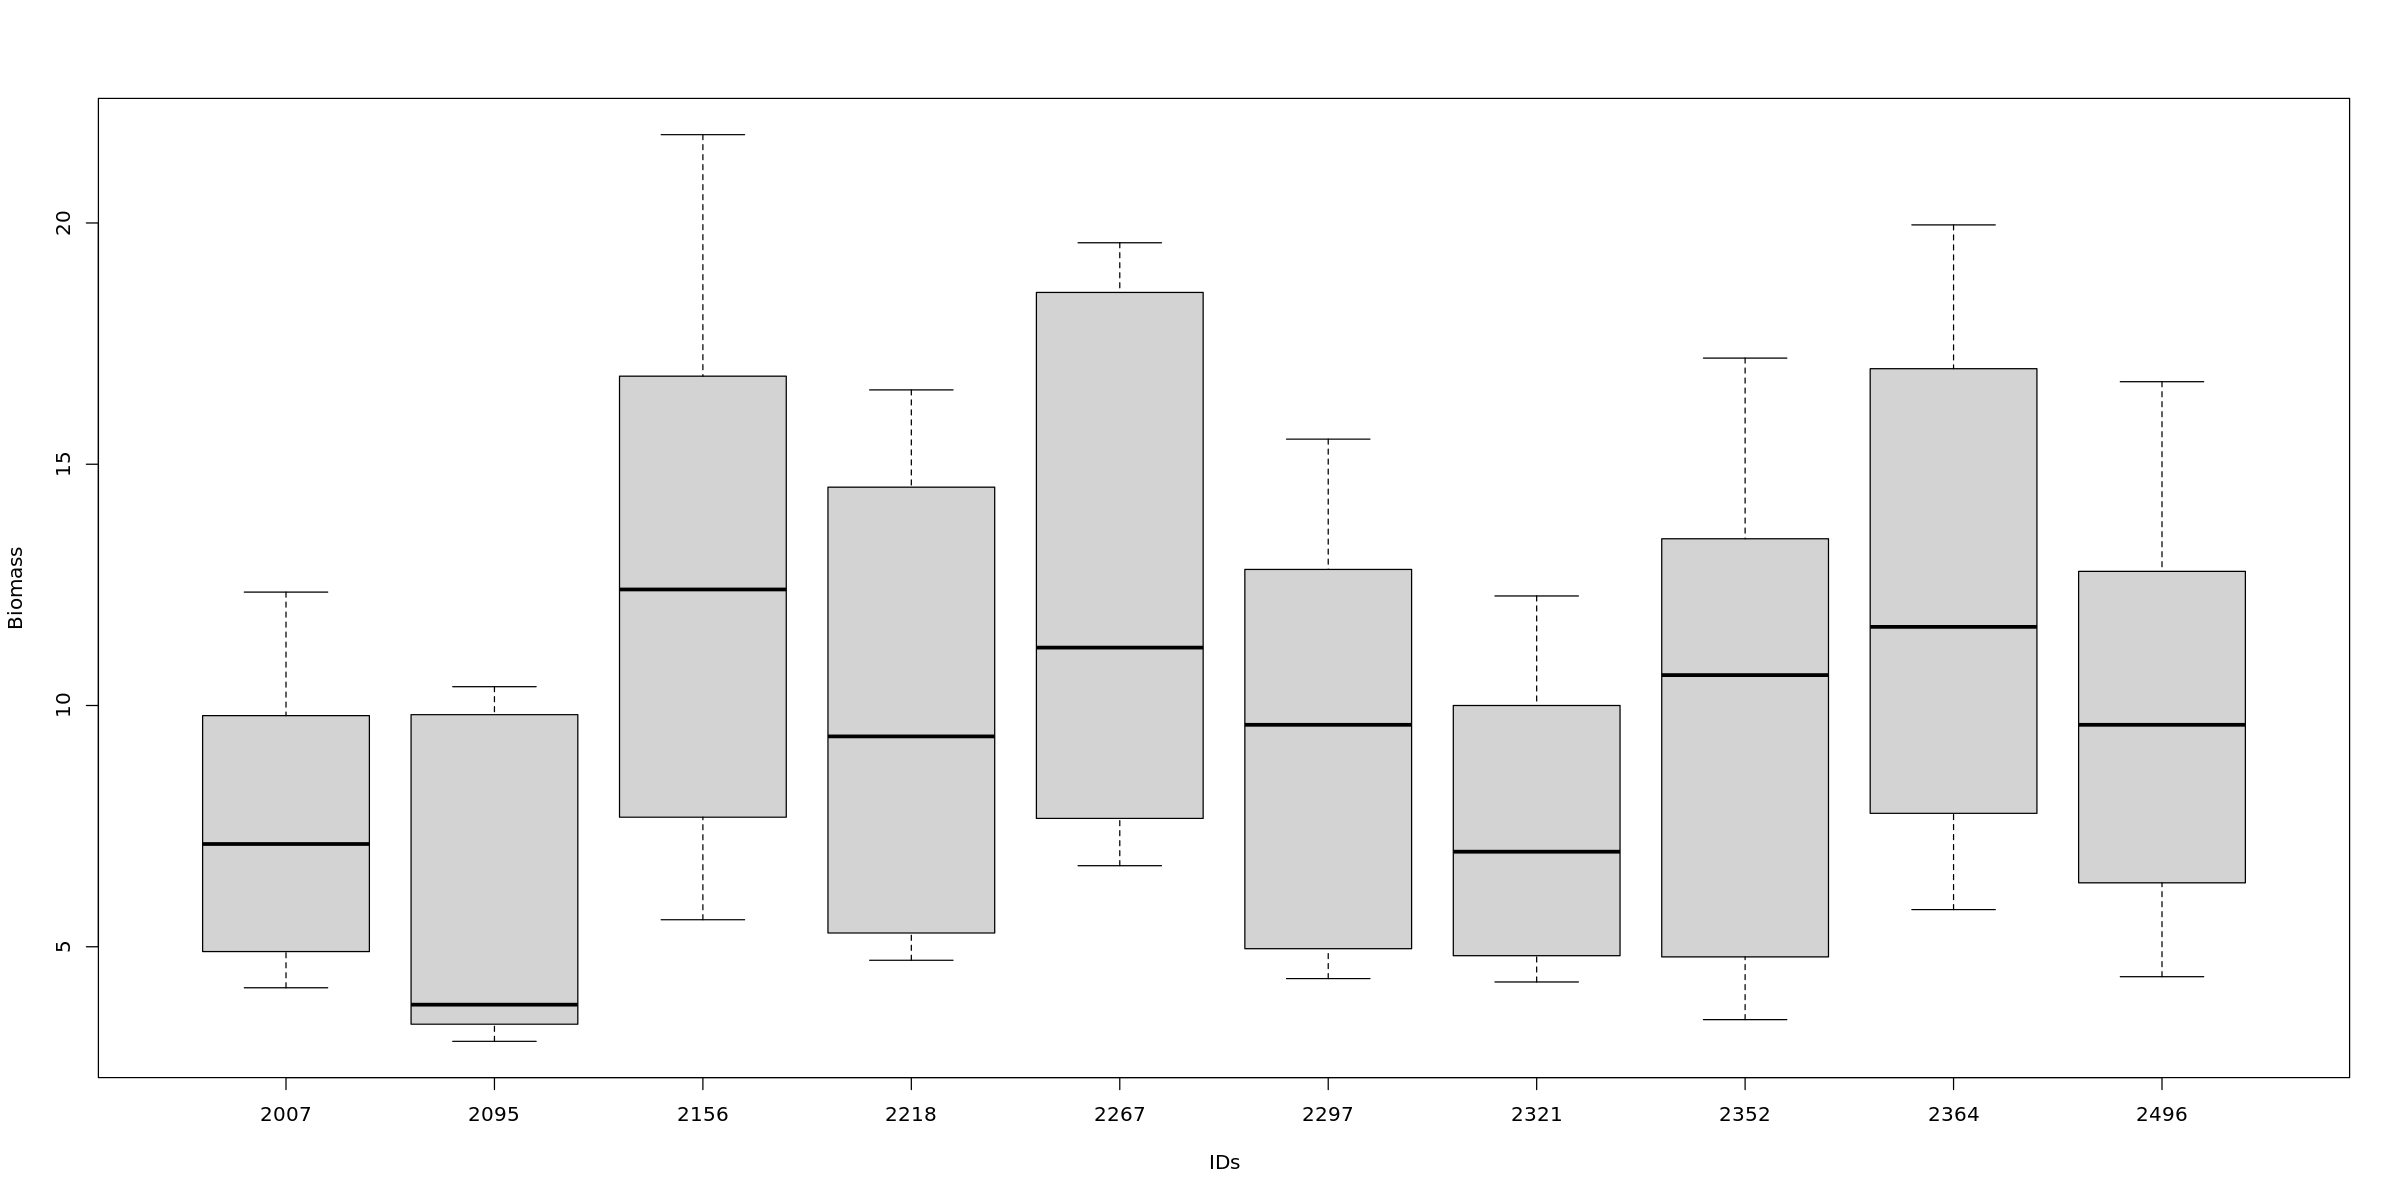

In [20]:
boxplot(Biomass~IDs, data=final.data)

In [21]:
control_data<- final.data$TKW[final.data$treatment=="ww"]
stress_data <- final.data$TKW[final.data$treatment=="ds"]

var(control_data)
var(stress_data)
var(control_data)/var(stress_data)

[1] 30.42491

[1] 77.10418

[1] 0.3945948

# Check for the homogenity of the variances

### - F-test: Compare the variances of two groups. The data must be normally distributed.
### - Bartlett’s test: Compare the variances of two or more groups. The data must be normally distributed.
### - Levene’s test: A robust alternative to the Bartlett’s test that is less sensitive to departures from normality.
### - Fligner-Killeen’s test: a non-parametric test which is very robust against departures from normality.

In [22]:
traits<- final.data[,-c(1,2,3,4,5,6,19)]
head(traits)
colNames<- colnames(traits)
colNames
length(colNames)
1:length(colNames)

max.Height Biomass Shoots Shoots_with_ear Shoots_without_ear Nr_ears Full_ear
1  91.2      14.75   10     10.0            0                  10      10      
2  78.0       4.72    5      5.0            0                   5       3      
3  83.0       7.76    4      3.0            1                   3       1      
4  61.0       5.61    7      6.0            1                   6       5      
5 102.0      14.30    9      9.0            0                   9       9      
6  61.0       5.76    3      3.5            0                   3       3      
  Half_ear Weight_ear Nr_seeds Mature_seeds Poor_seeds TKW  
1 0        15.43      282      282          0          37.30
2 2         3.55       67       66          1          32.99
3 0         1.21       29       29          0          22.76
4 1         3.36       68       65          3          22.35
5 0        10.65      214      209          5          38.60
6 0         3.05       60       60          0          31.67

[1] "max.Height"         "Biomass"            "Shoots"            
 [4] "Shoots_with_ear"    "Shoots_without_ear" "Nr_ears"           
 [7] "Full_ear"           "Half_ear"           "Weight_ear"        
[10] "Nr_seeds"           "Mature_seeds"       "Poor_seeds"        
[13] "TKW"

[1] 13

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

In [23]:
NV_table <- list()
nor_c <- list()
nor_s <- list()
lev_test <-list()

idx=1


for(i in colNames){
  
        logic = final.data$treatment == "ww"
        nor_c[[idx]] <-shapiro.test(final.data[logic,i])
        nor_s[[idx]] <-shapiro.test(final.data[!logic,i])
     
        lev_test[[idx]] = leveneTest(as.formula(paste(i,"~treatment")), data=final.data)
                  idx=idx+1
 

}

In [24]:

for (i in seq(1, length(colNames), 1)){
readline(paste("Normality of control group for", colNames[i]))
    print(lev_test[[i]])

}
 

Normality of control group for max.Height 
Normality of control group for Biomass 
Normality of control group for Shoots 
Normality of control group for Shoots_with_ear 
Normality of control group for Shoots_without_ear 
Normality of control group for Nr_ears 
Normality of control group for Full_ear 
Normality of control group for Half_ear 
Normality of control group for Weight_ear 
Normality of control group for Nr_seeds 
Normality of control group for Mature_seeds 
Normality of control group for Poor_seeds 
Normality of control group for TKW 


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.9902 0.3218
      112               
Levene's Test for Homogeneity of Variance (center = median)
       Df F value   Pr(>F)    
group   1  20.785 1.32e-05 ***
      112                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  1.3391 0.2496
      112               
Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  
group   1  5.1768 0.02479 *
      112                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  
group   1  4.8754 0.02928 *
      112                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  


In [25]:
head(final.data)
str(final.data)
final.data$Groups <- "High"



final.data$Groups[grep("2156", final.data$IDs)] <- "Low"
final.data$Groups[grep("2352", final.data$IDs)] <- "Low"
final.data$Groups[grep("2321", final.data$IDs)] <- "Low"
final.data$Groups[grep("2297", final.data$IDs)] <- "Low"
final.data$Groups[grep("2095", final.data$IDs)] <- "Low"
View(final.data)


Unit experiment IDs  treatment BBCH Collection date max.Height Biomass Shoots
1 121  V22001     2218 ww        92   08/12/22         91.2      14.75   10    
2 123  V22001     2218 ds        92   08/08/22         78.0       4.72    5    
3 125  V22001     2156 ds        92   08/09/22         83.0       7.76    4    
4 126  V22001     2297 ds        92   08/08/22         61.0       5.61    7    
5 130  V22001     2218 ww        92   08/30/22        102.0      14.30    9    
6 131  V22001     2352 ds        92   11/08/22         61.0       5.76    3    
  Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear Weight_ear
1 10.0            0                  10      10       0        15.43     
2  5.0            0                   5       3       2         3.55     
3  3.0            1                   3       1       0         1.21     
4  6.0            1                   6       5       1         3.36     
5  9.0            0                   9       9       0        10.65     
6  3.5            0                   3       3       0         3.05     
  Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW  
1 282      282          0          10.86            37.30
2  67       66          1          2.21             32.99
3  29       29          0          0.66             22.76
4  68       65          3          1.52             22.35
5 214      209          5          7.22             38.60
6  60       60          0          1.90             31.67

'data.frame':	114 obs. of  20 variables:
 $ Unit              : chr  "121" "123" "125" "126" ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83

Unit experiment IDs  treatment BBCH  Collection date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  145  V22001     2267 ds        92    08/12/22         82.4       8.63  
15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
21  156  V22001     2267 ww        92    08/18/22        103.5      18.56  
22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
86  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
87  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
88  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
89  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
90  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
91  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
92  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
93  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
94  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
95  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
96  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
97  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
98  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
99  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
100 290  V22001     2267 ww        92    08/30/22         85.5      13.50  
101 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
102 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
103 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
104 296  V22001     2218 ww        92    08/12/22         95.4      16.54  
105 298  V22001     2156 ww        92    08/12/22        104.5      21.83  
106 300  V22001     2095 ds        92    08/08/22   

In [26]:
getwd()

[1] "/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022"

In [2]:
#write.csv(final.data, "final.data.allgen.csv")
final.data<- read.csv("final.data.allgen.csv",sep=",", header=TRUE)
View(final.data)

X   Unit experiment IDs  treatment BBCH  Collection.date max.Height Biomass
1    1  121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2    2  123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3    3  125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4    4  126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5    5  130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6    6  131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7    7  133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8    8  135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9    9  136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  14  145  V22001     2267 ds        92    08/12/22         82.4       8.63  
15  15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
21  21  156  V22001     2267 ww        92    08/18/22        103.5      18.56  
22  22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
⋮   ⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
85   86 266  V22001     2095 ww        92    08/18/22         65.5      10.24  
86   87 268  V22001     2364 ww        92    08/30/22        102.0      19.96  
87   88 270  V22001     2007 ds        90    08/09/22         69.0       4.15  
88   89 271  V22001     2218 ww        92    08/18/22         98.3      12.36  
89   90 273  V22001     2352 ds        91    08/09/22         66.0       5.11  
90   91 275  V22001     2218 ds        92    11/08/22         72.0       5.71  
91   92 276  V22001     2364 ds        92    08/18/22         87.5       5.77  
92   93 278  V22001     2352 ww        92    08/22/22         89.8      14.53  
93   94 280  V22001     2496 ww        92    08/18/22         93.5      12.52  
94   95 281  V22001     2218 ds        92    08/09/22         67.0       5.04  
95   96 283  V22001     2352 ww        92    08/30/22         83.5      17.20  
96   97 285  V22001     2007 ww        92    08/18/22         86.0      10.54  
97   98 286  V22001     2095 ds        92    08/08/22         50.0       3.68  
98   99 288  V22001     2156 ww        92    08/18/22         95.5      16.81  
99  100 290  V22001     2267 ww        92    08/30/22         85.5      13.50  
100 101 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
101 102 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
102 103 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
103 

In [3]:
final.data$IDs<- as.factor(final.data$IDs)
final.data$treatment<- as.factor(final.data$treatment)
final.data$Group<- as.factor(final.data$Group)
final.data$Shoots<- as.numeric(final.data$Shoots)
final.data$Nr_ears <- as.numeric(final.data$Nr_ears )
final.data$Full_ear <- as.numeric(final.data$Full_ear )
final.data$Half_ear<- as.numeric(final.data$Half_ear)
final.data$Nr_seeds <- as.numeric(final.data$ Nr_seeds )
final.data$Mature_seeds <- as.numeric(final.data$Mature_seeds )
final.data$Poor_seeds  <- as.numeric(final.data$Poor_seeds  )
str(final.data)


'data.frame':	114 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 1

In [22]:
my_data<- final.data[, c(8,9,10,11,12,13,14,15,16,17,18,19,21)] 
head(my_data)

str(my_data)
 res<- cor(my_data)
res

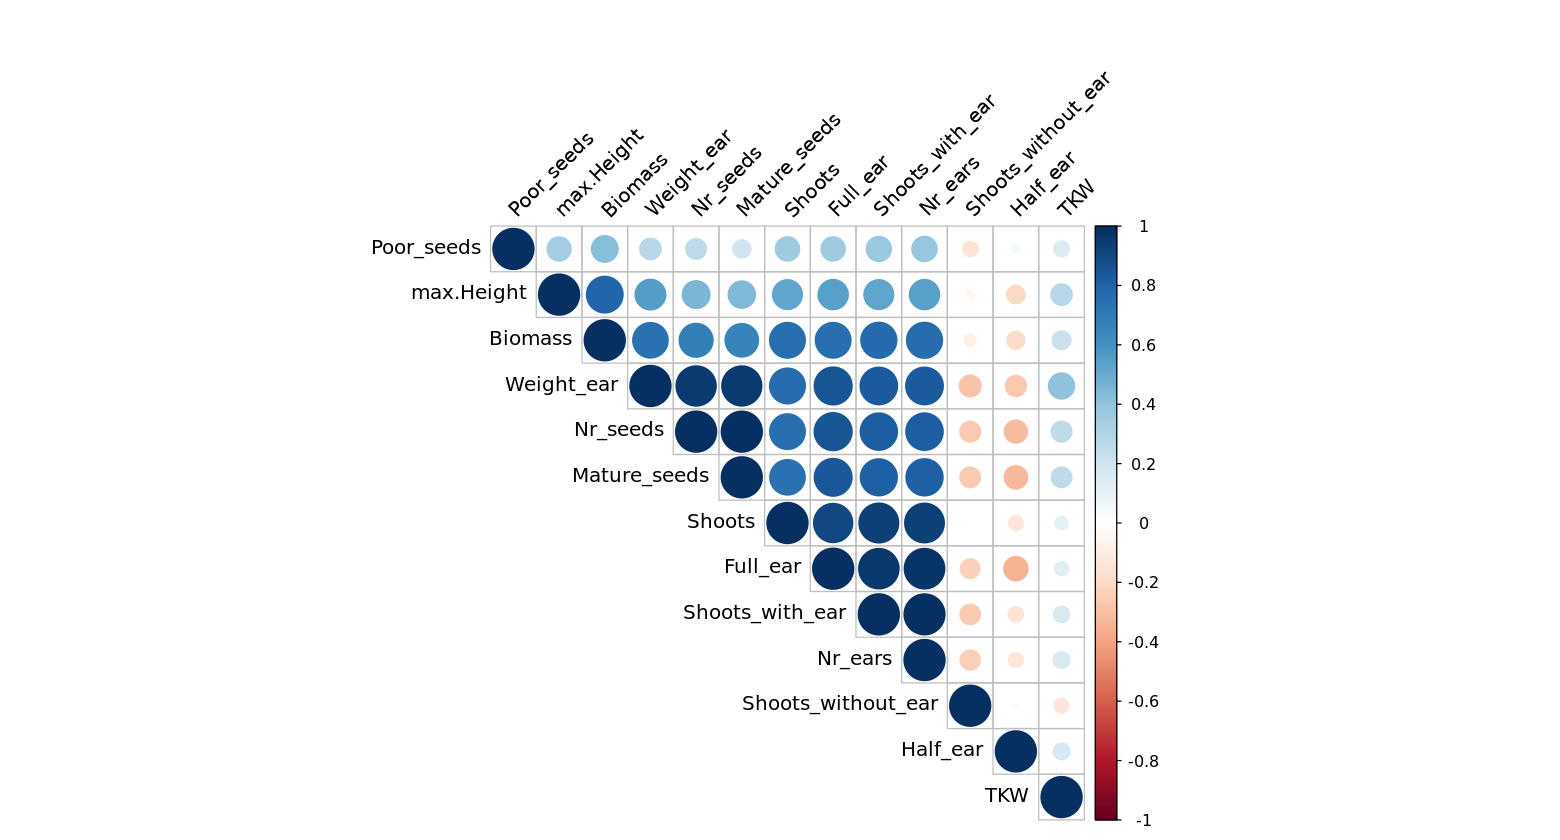

In [25]:
library(corrplot)
options(repr.plot.width=13, repr.plot.height=7)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [132]:
View(final.data)

X   Unit experiment IDs  treatment BBCH  Collection.date max.Height Biomass
1    1  121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2    2  123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3    3  125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4    4  126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5    5  130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6    6  131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7    7  133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8    8  135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9    9  136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  14  145  V22001     2267 ds        92    08/12/22         82.4       8.63  
15  15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
21  21  156  V22001     2267 ww        92    08/18/22        103.5      18.56  
22  22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
⋮   ⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
85   86 266  V22001     2095 ww        92    08/18/22         65.5      10.24  
86   87 268  V22001     2364 ww        92    08/30/22        102.0      19.96  
87   88 270  V22001     2007 ds        90    08/09/22         69.0       4.15  
88   89 271  V22001     2218 ww        92    08/18/22         98.3      12.36  
89   90 273  V22001     2352 ds        91    08/09/22         66.0       5.11  
90   91 275  V22001     2218 ds        92    11/08/22         72.0       5.71  
91   92 276  V22001     2364 ds        92    08/18/22         87.5       5.77  
92   93 278  V22001     2352 ww        92    08/22/22         89.8      14.53  
93   94 280  V22001     2496 ww        92    08/18/22         93.5      12.52  
94   95 281  V22001     2218 ds        92    08/09/22         67.0       5.04  
95   96 283  V22001     2352 ww        92    08/30/22         83.5      17.20  
96   97 285  V22001     2007 ww        92    08/18/22         86.0      10.54  
97   98 286  V22001     2095 ds        92    08/08/22         50.0       3.68  
98   99 288  V22001     2156 ww        92    08/18/22         95.5      16.81  
99  100 290  V22001     2267 ww        92    08/30/22         85.5      13.50  
100 101 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
101 102 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
102 103 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
103 

# Conversion of our for loop list into the data frame
## First option: usind do.call (but changes the deciminals of P-Value). this mostly will be used for nested lists using cbind orrbind function
## Second option: Using t apply which serves the format and deciminals

In [133]:
#contro_table_normality<- do.call(rbind.data.frame, nor_c)

CNormality_shapiro_table <- data.frame(t(sapply(nor_c,c)))
CNormality_shapiro_table $Traits <- 1:nrow(CNormality_shapiro_table ) 


CNormality_shapiro_table[1:13,5] <- c("max.Height","Biomass","Shoots","Shoots_with_ear","Shoots_without_ear",
                                      "	Nr_ears	","Full_ear","Half_ear","Weight_ear","Nr_seeds","Mature_seeds","Poor_seeds","TKW")

View(CNormality_shapiro_table)

SNormality_shapiro_table <- data.frame(t(sapply(nor_s,c)))
SNormality_shapiro_table $Traits <- 1:nrow(SNormality_shapiro_table )
SNormality_shapiro_table[1:13,5] <- c("max.Height","Biomass","Shoots","Shoots_with_ear","Shoots_without_ear",
                                      "	Nr_ears	","Full_ear","Half_ear","Weight_ear","Nr_seeds","Mature_seeds","Poor_seeds","TKW")

View(SNormality_shapiro_table)


leventes_result <- data.frame(t(sapply(lev_test,c)))
leventes_result  $Traits <- 1:nrow(leventes_result)

leventes_result[1:13,4] <- c("max.Height","Biomass","Shoots","Shoots_with_ear","Shoots_without_ear",
                                      "	Nr_ears	","Full_ear","Half_ear","Weight_ear","Nr_seeds","Mature_seeds","Poor_seeds","TKW")
View(leventes_result)

statistic p.value      method                      data.name           
1  0.9646371 0.09945277   Shapiro-Wilk normality test final.data[logic, i]
2  0.973969  0.2653502    Shapiro-Wilk normality test final.data[logic, i]
3  0.9459961 0.01413072   Shapiro-Wilk normality test final.data[logic, i]
4  0.9417178 0.009203864  Shapiro-Wilk normality test final.data[logic, i]
5  0.284146  4.893566e-15 Shapiro-Wilk normality test final.data[logic, i]
6  0.9596937 0.05872325   Shapiro-Wilk normality test final.data[logic, i]
7  0.9433598 0.01083906   Shapiro-Wilk normality test final.data[logic, i]
8  0.4226785 1.665957e-13 Shapiro-Wilk normality test final.data[logic, i]
9  0.9768638 0.3542586    Shapiro-Wilk normality test final.data[logic, i]
10 0.94092   0.008504769  Shapiro-Wilk normality test final.data[logic, i]
11 0.9512832 0.02427946   Shapiro-Wilk normality test final.data[logic, i]
12 0.5885327 2.816183e-11 Shapiro-Wilk normality test final.data[logic, i]
13 0.9534496 0.03041109   Shapiro-Wilk normality test final.data[logic, i]
   Traits            
1  max.Height        
2  Biomass           
3  Shoots            
4  Shoots_with_ear   
5  Shoots_without_ear
6  \tNr_ears\t       
7  Full_ear          
8  Half_ear          
9  Weight_ear        
10 Nr_seeds          
11 Mature_seeds      
12 Poor_seeds        
13 TKW

statistic p.value      method                      data.name            
1  0.9804978 0.4732084    Shapiro-Wilk normality test final.data[!logic, i]
2  0.9515229 0.02138016   Shapiro-Wilk normality test final.data[!logic, i]
3  0.8316632 1.27519e-06  Shapiro-Wilk normality test final.data[!logic, i]
4  0.8458456 3.16993e-06  Shapiro-Wilk normality test final.data[!logic, i]
5  0.6909236 9.207912e-10 Shapiro-Wilk normality test final.data[!logic, i]
6  0.8417691 2.428473e-06 Shapiro-Wilk normality test final.data[!logic, i]
7  0.8694991 1.616611e-05 Shapiro-Wilk normality test final.data[!logic, i]
8  0.7405103 8.752519e-09 Shapiro-Wilk normality test final.data[!logic, i]
9  0.9598342 0.05246086   Shapiro-Wilk normality test final.data[!logic, i]
10 0.9434731 0.009223348  Shapiro-Wilk normality test final.data[!logic, i]
11 0.9410678 0.007219142  Shapiro-Wilk normality test final.data[!logic, i]
12 0.3660294 2.067533e-14 Shapiro-Wilk normality test final.data[!logic, i]
13 0.9115337 0.0004499678 Shapiro-Wilk normality test final.data[!logic, i]
   Traits            
1  max.Height        
2  Biomass           
3  Shoots            
4  Shoots_with_ear   
5  Shoots_without_ear
6  \tNr_ears\t       
7  Full_ear          
8  Half_ear          
9  Weight_ear        
10 Nr_seeds          
11 Mature_seeds      
12 Poor_seeds        
13 TKW

Df     F.value       Pr..F.           Traits            
1  1, 112 0.9901845, NA 0.3218423, NA    max.Height        
2  1, 112 20.78453, NA  1.319634e-05, NA Biomass           
3  1, 112 1.339128, NA  0.2496498, NA    Shoots            
4  1, 112 5.176801, NA  0.02479327, NA   Shoots_with_ear   
5  1, 112 4.875438, NA  0.02927918, NA   Shoots_without_ear
6  1, 112 6.449932, NA  0.01246679, NA   \tNr_ears\t       
7  1, 112 5.253607, NA  0.02377007, NA   Full_ear          
8  1, 112 9.568009, NA  0.002500016, NA  Half_ear          
9  1, 112 14.86615, NA  0.0001930602, NA Weight_ear        
10 1, 112 8.033527, NA  0.00544876, NA   Nr_seeds          
11 1, 112 9.573331, NA  0.002493355, NA  Mature_seeds      
12 1, 112 11.59494, NA  0.0009187879, NA Poor_seeds        
13 1, 112 3.78945, NA   0.05408093, NA   TKW

In [4]:

str(final.data)
unique(final.data$IDs)
final.data<- final.data[,-1]
View(final.data)

'data.frame':	114 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 1

[1] 2218 2156 2297 2352 2364 2095 2321 2267 2007 2496
Levels: 2007 2095 2156 2218 2267 2297 2321 2352 2364 2496

Unit experiment IDs  treatment BBCH  Collection.date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  145  V22001     2267 ds        92    08/12/22         82.4       8.63  
15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
21  156  V22001     2267 ww        92    08/18/22        103.5      18.56  
22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
85  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
86  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
87  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
88  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
89  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
90  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
91  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
92  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
93  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
94  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
95  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
96  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
97  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
98  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
99  290  V22001     2267 ww        92    08/30/22         85.5      13.50  
100 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
101 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
102 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
103 296  V22001     2218 ww        92    08/12/22         95.4      16.54  
104 298  V22001     2156 ww        92    08/12/22        104.5      21.83  
105 300  V22001     2095 ds        92    08/08/22   

# Biomass

In [5]:
Biomass_AN <- aov(Biomass~ treatment*IDs, data=final.data)
summary(Biomass_AN)


              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 1780.8  1780.8 734.253  < 2e-16 ***
IDs            9  476.1    52.9  21.813  < 2e-16 ***
treatment:IDs  9   86.6     9.6   3.969 0.000256 ***
Residuals     94  228.0     2.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [9]:
Biomass_ANt <- aov(lm(Biomass~ treatment*IDs, data=final.data))
summary(Biomass_ANt)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 1780.8  1780.8 734.253  < 2e-16 ***
IDs            9  476.1    52.9  21.813  < 2e-16 ***
treatment:IDs  9   86.6     9.6   3.969 0.000256 ***
Residuals     94  228.0     2.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [10]:
b<-lm(Biomass~ treatment*IDs, data=final.data)
bb<- summary.aov(b)
bb
c <-capture.output(bb,file="test.doc")
dataFrame <- c %>% 
  as_tibble()
dataFrame
View(dataFrame)


              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 1780.8  1780.8 734.253  < 2e-16 ***
IDs            9  476.1    52.9  21.813  < 2e-16 ***
treatment:IDs  9   86.6     9.6   3.969 0.000256 ***
Residuals     94  228.0     2.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<0 x 0 matrix>

<0 x 0 matrix>

In [ ]:
tukey <- TukeyHSD(Biomass_AN, conf.level=.95)
print(tukey)


In [7]:
tukey.cld.Biomass <- multcompLetters4(Biomass_AN, tukey)
print(tukey.cld.Biomass)

$treatment
 ww  ds 
"a" "b" 

$IDs
 2267  2156  2364  2218  2496  2352  2297  2007  2321  2095 
  "a"   "a"   "a"   "b"   "b"  "bc"  "bc" "bcd"  "cd"   "d" 

$`treatment:IDs`
ww:2267 ww:2156 ww:2364 ww:2218 ww:2352 ww:2496 ww:2297 ww:2007 ww:2321 ww:2095 
    "a"     "a"     "a"    "ab"    "bc"    "bc"    "bc"    "cd"    "cd"    "de" 
ds:2364 ds:2267 ds:2156 ds:2496 ds:2218 ds:2007 ds:2297 ds:2321 ds:2352 ds:2095 
  "def"  "defg"  "defg"  "efgh"   "fgh"   "fgh"   "fgh"   "fgh"    "gh"     "h" 



In [12]:
Biomass_summary <- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Biomass), sd=sd(Biomass))%>%
arrange(desc(mean)) 
          View(Biomass_summary)


Biomass_summary_t <- group_by(final.data, treatment) %>%
summarise(mean=mean(Biomass), sd=sd(Biomass))%>%
arrange(desc(mean)) 
          View(Biomass_summary_t)


Biomass_summary_l <- group_by(final.data, IDs) %>%
summarise(mean=mean(Biomass), sd=sd(Biomass))%>%
arrange(desc(mean)) 
          View(Biomass_summary_l)



Biomass_summary_ITG <- group_by(final.data,Group,IDs, treatment) %>%
summarise(mean=mean(Biomass), sd=sd(Biomass))%>%
arrange(desc(mean)) 
          View(Biomass_summary_ITG)
write.table(Biomass_summary_ITG, "Biomass_summary_ITG.csv")

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd       
1  ww        2267 17.676000 2.4364175
2  ww        2156 17.661667 2.2956081
3  ww        2364 17.118000 2.5235729
4  ww        2218 14.550000 1.3872275
5  ww        2352 13.433333 2.4111629
6  ww        2496 13.335000 1.9484122
7  ww        2297 13.136667 1.4162862
8  ww        2007 10.534000 1.5877437
9  ww        2321 10.210000 1.3891292
10 ww        2095  9.680000 1.0057584
11 ds        2364  8.085000 1.9304585
12 ds        2267  7.832000 0.9257267
13 ds        2156  7.336667 1.2997333
14 ds        2496  6.358333 1.3205062
15 ds        2218  5.385000 0.6046073
16 ds        2007  5.338333 1.2824885
17 ds        2297  5.278333 1.1544768
18 ds        2321  4.808333 0.4878285
19 ds        2352  4.540000 0.9178235
20 ds        2095  3.420000 0.2942788

treatment mean      sd      
1 ww        13.732143 3.330520
2 ds         5.826207 1.780378

IDs  mean      sd      
1  2267 12.754000 5.471474
2  2156 12.499167 5.677808
3  2364 12.190909 5.163711
4  2218  9.967500 4.893794
5  2496  9.846667 3.974028
6  2352  9.390909 4.981384
7  2297  9.207500 4.284789
8  2007  7.700000 3.031999
9  2321  7.509167 2.990474
10 2095  6.265455 3.336982

`summarise()` has grouped output by 'Group', 'IDs'. You can override using the `.groups` argument.


Group IDs  treatment mean      sd       
1  High  2267 ww        17.676000 2.4364175
2  Low   2156 ww        17.661667 2.2956081
3  High  2364 ww        17.118000 2.5235729
4  High  2218 ww        14.550000 1.3872275
5  Low   2352 ww        13.433333 2.4111629
6  High  2496 ww        13.335000 1.9484122
7  Low   2297 ww        13.136667 1.4162862
8  High  2007 ww        10.534000 1.5877437
9  Low   2321 ww        10.210000 1.3891292
10 Low   2095 ww         9.680000 1.0057584
11 High  2364 ds         8.085000 1.9304585
12 High  2267 ds         7.832000 0.9257267
13 Low   2156 ds         7.336667 1.2997333
14 High  2496 ds         6.358333 1.3205062
15 High  2218 ds         5.385000 0.6046073
16 High  2007 ds         5.338333 1.2824885
17 Low   2297 ds         5.278333 1.1544768
18 Low   2321 ds         4.808333 0.4878285
19 Low   2352 ds         4.540000 0.9178235
20 Low   2095 ds         3.420000 0.2942788

In [16]:
cld.Biomass <- as.data.frame.list(tukey.cld.Biomass$`treatment:IDs`)
Biomass_summary$tukey <- cld.Biomass$Letters
write.table(Biomass_summary, "Biomass.summary.August.csv")
View(Biomass_summary)

cld.Biomass.t <- as.data.frame.list(tukey.cld.Biomass$`treatment`)
Biomass_summary_t$tukey.t <- cld.Biomass.t$Letters
write.table(Biomass_summary_t, "Biomass.summary.t.August.csv")
View(Biomass_summary_t)

cld.Biomass.l <- as.data.frame.list(tukey.cld.Biomass$`IDs`)
Biomass_summary_l$tukey.l <- cld.Biomass.l$Letters
write.table(Biomass_summary_l, "Biomass.summary.l.August.csv")
View(Biomass_summary_l)




treatment IDs  mean      sd        tukey
1  ww        2267 17.676000 2.4364175 a    
2  ww        2156 17.661667 2.2956081 a    
3  ww        2364 17.118000 2.5235729 a    
4  ww        2218 14.550000 1.3872275 ab   
5  ww        2352 13.433333 2.4111629 bc   
6  ww        2496 13.335000 1.9484122 bc   
7  ww        2297 13.136667 1.4162862 bc   
8  ww        2007 10.534000 1.5877437 cd   
9  ww        2321 10.210000 1.3891292 cd   
10 ww        2095  9.680000 1.0057584 de   
11 ds        2364  8.085000 1.9304585 def  
12 ds        2267  7.832000 0.9257267 defg 
13 ds        2156  7.336667 1.2997333 defg 
14 ds        2496  6.358333 1.3205062 efgh 
15 ds        2218  5.385000 0.6046073 fgh  
16 ds        2007  5.338333 1.2824885 fgh  
17 ds        2297  5.278333 1.1544768 fgh  
18 ds        2321  4.808333 0.4878285 fgh  
19 ds        2352  4.540000 0.9178235 gh   
20 ds        2095  3.420000 0.2942788 h

treatment mean      sd       tukey.t
1 ww        13.732143 3.330520 a      
2 ds         5.826207 1.780378 b

IDs  mean      sd       tukey.l
1  2267 12.754000 5.471474 a      
2  2156 12.499167 5.677808 a      
3  2364 12.190909 5.163711 a      
4  2218  9.967500 4.893794 b      
5  2496  9.846667 3.974028 b      
6  2352  9.390909 4.981384 bc     
7  2297  9.207500 4.284789 bc     
8  2007  7.700000 3.031999 bcd    
9  2321  7.509167 2.990474 cd     
10 2095  6.265455 3.336982 d

In [17]:
Biomass_Int <- read.table("Biomass.summary.August.csv")
Biomass_T<- read.table("Biomass.summary.t.August.csv")
Biomass_L<- read.table("Biomass.summary.l.August.csv")
Biomass_ITG<- read.table("Biomass_summary_ITG.csv")

In [9]:
Biomass_Int$treatment <- as.factor(Biomass_Int$treatment)
Biomass_Int$IDs<- as.factor(Biomass_Int$IDs)
str(Biomass_Int)


'data.frame':	20 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 2 ...
 $ IDs      : Factor w/ 10 levels "2007","2095",..: 5 3 9 4 8 10 6 1 7 2 ...
 $ mean     : num  17.7 17.7 17.1 14.6 13.4 ...
 $ sd       : num  2.44 2.3 2.52 1.39 2.41 ...
 $ tukey    : chr  "a" "a" "a" "ab" ...


In [10]:
Biomass_ITG$treatment <- as.factor(Biomass_ITG$treatment)
Biomass_ITG$IDs<- as.factor(Biomass_ITG$IDs)
Biomass_ITG$Group<- as.factor(Biomass_ITG$Group)
str(Biomass_ITG)

'data.frame':	20 obs. of  5 variables:
 $ Group    : Factor w/ 2 levels "High","Low": 1 2 1 1 2 1 2 1 2 2 ...
 $ IDs      : Factor w/ 10 levels "2007","2095",..: 5 3 9 4 8 10 6 1 7 2 ...
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 2 ...
 $ mean     : num  17.7 17.7 17.1 14.6 13.4 ...
 $ sd       : num  2.44 2.3 2.52 1.39 2.41 ...


In [27]:
options(repr.plot.width=15,  repr.plot.height=10)

BiomassIGT.<- ggplot(Biomass_Int, aes(x=IDs, y=mean, fill=treatment ))+
geom_bar(stat="identity", position="dodge")+
 
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-7, hjust=0.5, size=5, colour="black")+
labs(x="Lines", y="Biomass[g]")+
 facet_wrap(~treatment)+
theme_bw()+
 
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
scale_fill_manual(values=c("tomato2","royalblue3"))+


theme(legend.position="top")+
theme(text = element_text(size = 17))+
 #

theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

BiomassIGT.
#BiomassIGT.+ scale_colour_discrete(labels = c("drought", "control"))




Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [ ]:
ggplot(econdatalong, aes(x=Country, y=value))+
  geom_bar(stat='identity', fill="forest green")+
  facet_wrap(~measure)


In [144]:
options(repr.plot.width=15,  repr.plot.height=10)

Biomass.<- ggplot(Biomass_Int, aes(x=IDs, y=mean, fill=treatment, ))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-7, hjust=0.5, size=5, colour="black")+
labs(x="Lines", y="Biomass[g]")+
 facet_wrap(~measure)
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
scale_fill_manual(values=c("tomato2","royalblue3"))+
theme(legend.position="top")+
theme(text = element_text(size = 17))+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Biomass.


ggsave("Biomass-Int.png", plot = Biomass., width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [145]:
Biomass1<- ggplot(Biomass_Int, aes(x=treatment, y=mean, fill=IDs, color=IDs))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-7.5, hjust=0.5, size=5, colour="black")+
labs(x="Lines", y="Biomass[g]")+
#ggtitle("Plot of length \n by dose")+
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 19))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Biomass1


ggsave("Biomass-Int-sept.png", plot = Biomass1, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

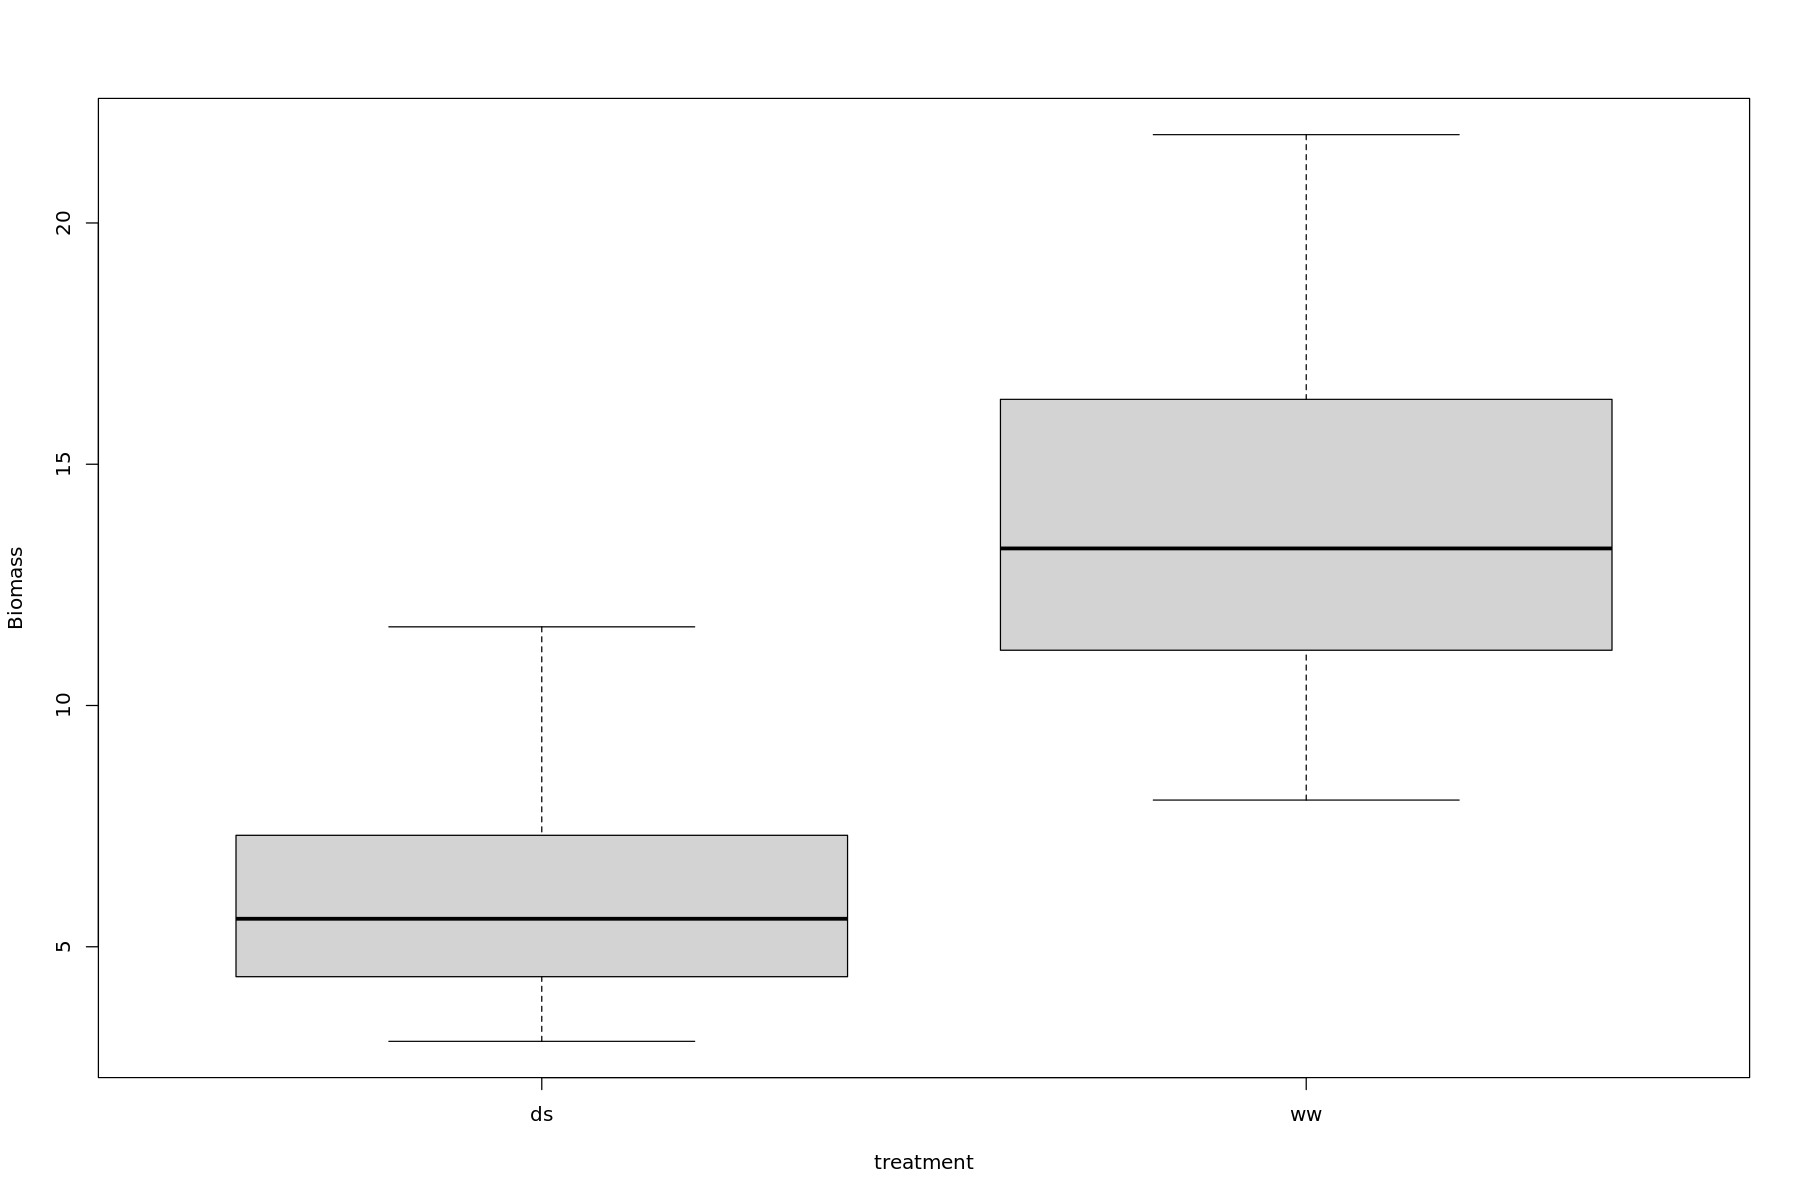

In [146]:
boxplot(Biomass~treatment, data=final.data)

In [18]:
View(Biomass_summary)

treatment IDs  mean      sd        tukey
1  ww        2267 17.676000 2.4364175 a    
2  ww        2156 17.661667 2.2956081 a    
3  ww        2364 17.118000 2.5235729 a    
4  ww        2218 14.550000 1.3872275 ab   
5  ww        2352 13.433333 2.4111629 bc   
6  ww        2496 13.335000 1.9484122 bc   
7  ww        2297 13.136667 1.4162862 bc   
8  ww        2007 10.534000 1.5877437 cd   
9  ww        2321 10.210000 1.3891292 cd   
10 ww        2095  9.680000 1.0057584 de   
11 ds        2364  8.085000 1.9304585 def  
12 ds        2267  7.832000 0.9257267 defg 
13 ds        2156  7.336667 1.2997333 defg 
14 ds        2496  6.358333 1.3205062 efgh 
15 ds        2218  5.385000 0.6046073 fgh  
16 ds        2007  5.338333 1.2824885 fgh  
17 ds        2297  5.278333 1.1544768 fgh  
18 ds        2321  4.808333 0.4878285 fgh  
19 ds        2352  4.540000 0.9178235 gh   
20 ds        2095  3.420000 0.2942788 h

In [19]:
Control_data_Biomass <- Biomass_summary[1:10, ]
Control_data_Biomass 
Control_data_Biomass[order(Control_data_Biomass$IDs),]




treatment IDs  mean     sd       tukey
1  ww        2267 17.67600 2.436417 a    
2  ww        2156 17.66167 2.295608 a    
3  ww        2364 17.11800 2.523573 a    
4  ww        2218 14.55000 1.387227 ab   
5  ww        2352 13.43333 2.411163 bc   
6  ww        2496 13.33500 1.948412 bc   
7  ww        2297 13.13667 1.416286 bc   
8  ww        2007 10.53400 1.587744 cd   
9  ww        2321 10.21000 1.389129 cd   
10 ww        2095  9.68000 1.005758 de

treatment IDs  mean     sd       tukey
1  ww        2007 10.53400 1.587744 cd   
2  ww        2095  9.68000 1.005758 de   
3  ww        2156 17.66167 2.295608 a    
4  ww        2218 14.55000 1.387227 ab   
5  ww        2267 17.67600 2.436417 a    
6  ww        2297 13.13667 1.416286 bc   
7  ww        2321 10.21000 1.389129 cd   
8  ww        2352 13.43333 2.411163 bc   
9  ww        2364 17.11800 2.523573 a    
10 ww        2496 13.33500 1.948412 bc

In [20]:
Stress_data_Biomass <- Biomass_summary[11:20, ]
Stress_data_Biomass 
Stress_data_Biomass[order(Stress_data_Biomass$IDs),]

treatment IDs  mean     sd        tukey
1  ds        2364 8.085000 1.9304585 def  
2  ds        2267 7.832000 0.9257267 defg 
3  ds        2156 7.336667 1.2997333 defg 
4  ds        2496 6.358333 1.3205062 efgh 
5  ds        2218 5.385000 0.6046073 fgh  
6  ds        2007 5.338333 1.2824885 fgh  
7  ds        2297 5.278333 1.1544768 fgh  
8  ds        2321 4.808333 0.4878285 fgh  
9  ds        2352 4.540000 0.9178235 gh   
10 ds        2095 3.420000 0.2942788 h

treatment IDs  mean     sd        tukey
1  ds        2007 5.338333 1.2824885 fgh  
2  ds        2095 3.420000 0.2942788 h    
3  ds        2156 7.336667 1.2997333 defg 
4  ds        2218 5.385000 0.6046073 fgh  
5  ds        2267 7.832000 0.9257267 defg 
6  ds        2297 5.278333 1.1544768 fgh  
7  ds        2321 4.808333 0.4878285 fgh  
8  ds        2352 4.540000 0.9178235 gh   
9  ds        2364 8.085000 1.9304585 def  
10 ds        2496 6.358333 1.3205062 efgh

In [21]:
difference_table_Biomass <- left_join(Stress_data_Biomass, Control_data_Biomass, by="IDs")
#View(difference_table_Biomass)

difference_table_Biomass$Biomass_difference <- (difference_table_Biomass$mean.y)-(difference_table_Biomass$mean.x)
View(difference_table_Biomass)

treatment.x IDs  mean.x   sd.x      tukey.x treatment.y mean.y   sd.y    
1  ds          2364 8.085000 1.9304585 def     ww          17.11800 2.523573
2  ds          2267 7.832000 0.9257267 defg    ww          17.67600 2.436417
3  ds          2156 7.336667 1.2997333 defg    ww          17.66167 2.295608
4  ds          2496 6.358333 1.3205062 efgh    ww          13.33500 1.948412
5  ds          2218 5.385000 0.6046073 fgh     ww          14.55000 1.387227
6  ds          2007 5.338333 1.2824885 fgh     ww          10.53400 1.587744
7  ds          2297 5.278333 1.1544768 fgh     ww          13.13667 1.416286
8  ds          2321 4.808333 0.4878285 fgh     ww          10.21000 1.389129
9  ds          2352 4.540000 0.9178235 gh      ww          13.43333 2.411163
10 ds          2095 3.420000 0.2942788 h       ww           9.68000 1.005758
   tukey.y Biomass_difference
1  a        9.033000         
2  a        9.844000         
3  a       10.325000         
4  bc       6.976667         
5  ab       9.165000         
6  cd       5.195667         
7  bc       7.858333         
8  cd       5.401667         
9  bc       8.893333         
10 de       6.260000

In [26]:

options(repr.plot.width=20, repr.plot.height=7)

p <- ggplot(difference_table_Biomass, aes(x=IDs, y=Biomass_difference, fill=IDs) ) + 
  geom_bar(stat = "identity")+
scale_fill_manual(values=c("blue","red","yellow","green","orange","brown","gray","pink","lightblue", "magenta")) +
theme(legend.position="top")+
theme(text = element_text(size = 16))+
#ggtitle("Biomass difference for all lines")+
theme_bw()+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
theme(text = element_text(size = 20))+
geom_text(aes(label=round(Biomass_difference,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)+
labs(x="Lines", y="Biomass-difference[g]")
p


ggsave("Biomass-difference.png", plot = p, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

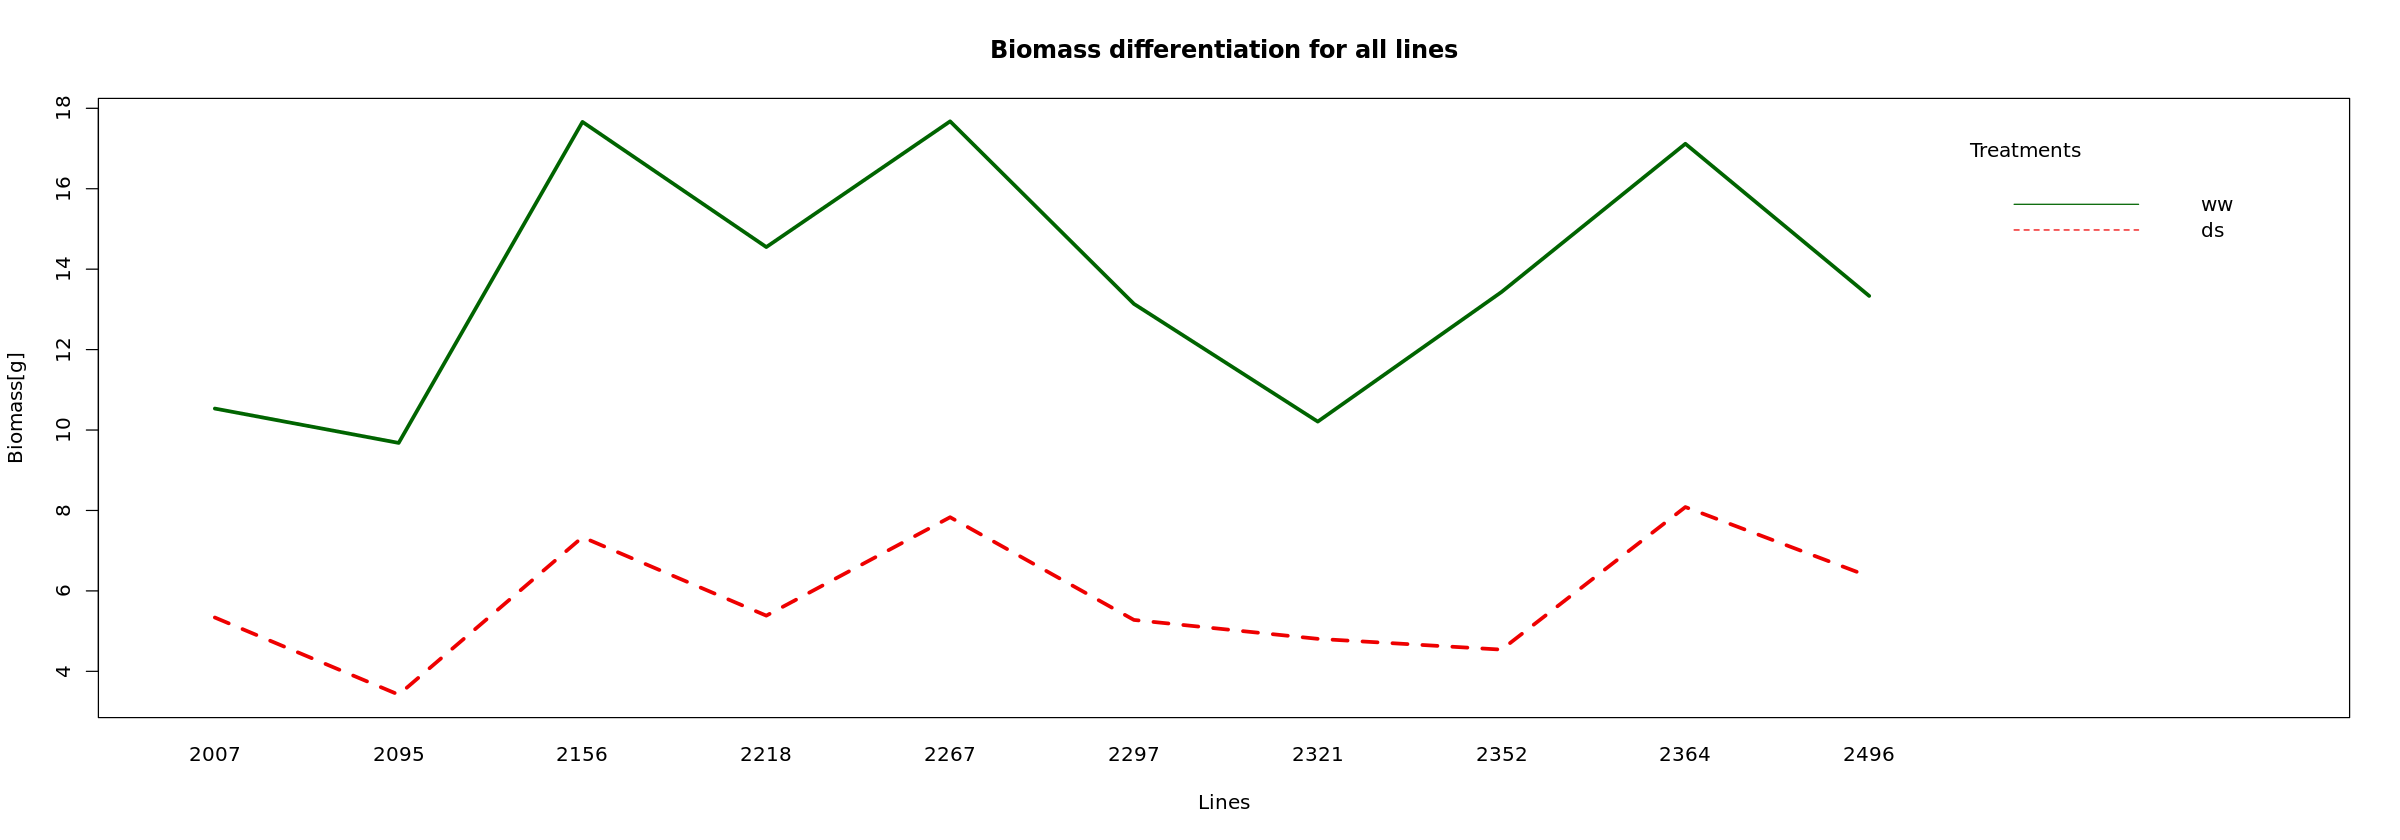

In [152]:
str(final.data)

Biomass_interactions<- interaction.plot(x.factor = final.data$IDs, trace.factor = final.data$treatment, 
                 response =  final.data$Biomass, fun = mean, 
                 type = "l", legend = TRUE, main="Biomass differentiation for all lines",
                 xlab = "Lines", ylab="Biomass[g]", trace.label = "Treatments",
                 pch=c(1,19), col = c("red2","darkgreen"), lwd=3)
                # theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
options(repr.plot.width=13, repr.plot.height=7)
print(Biomass_interactions)



ggsave("Biomass-Int-Graph.jpeg", plot = Biomass_interactions, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

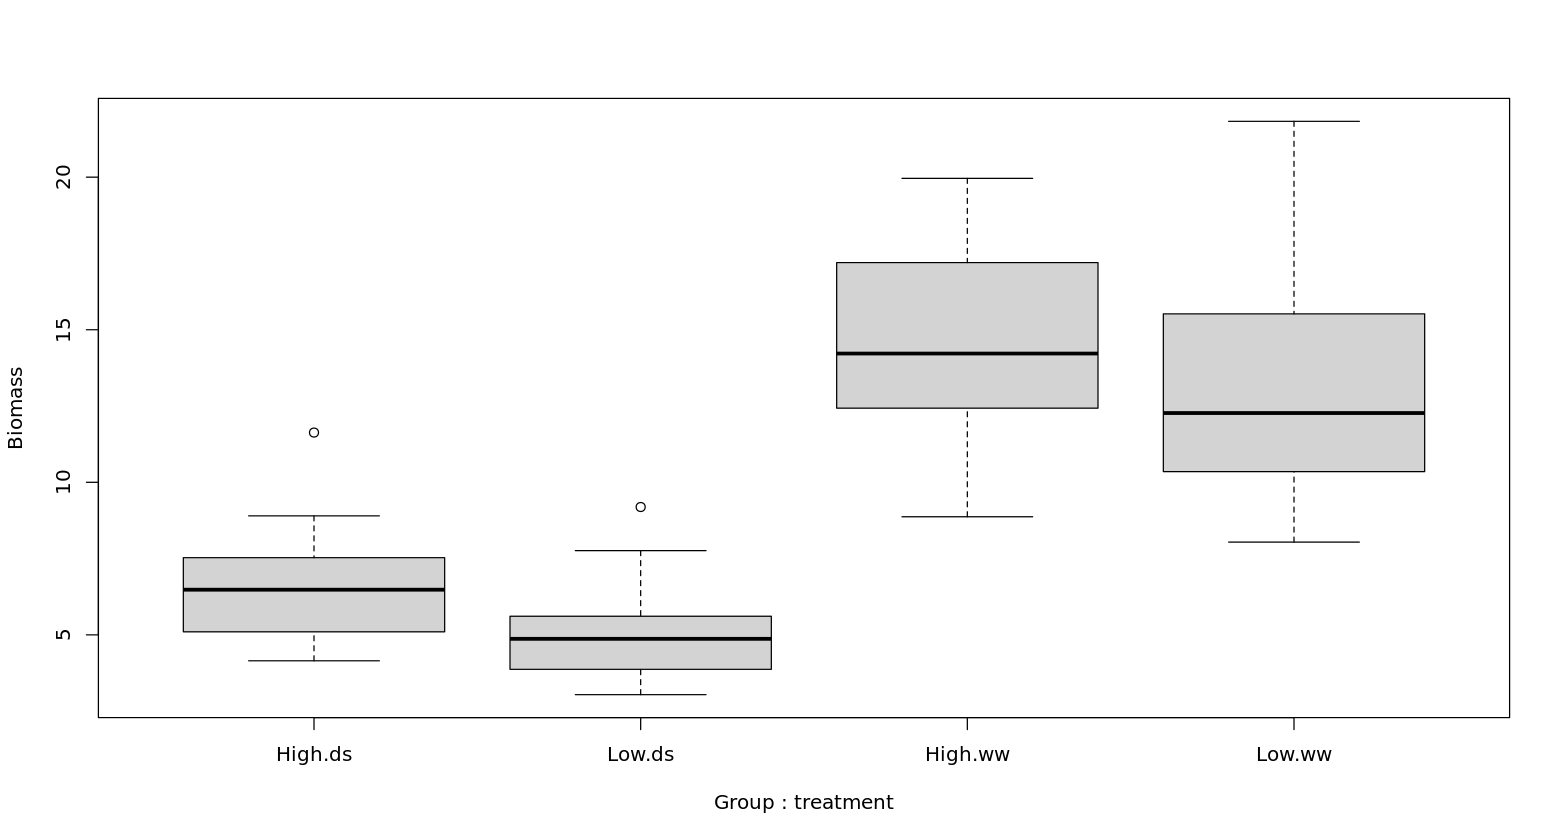

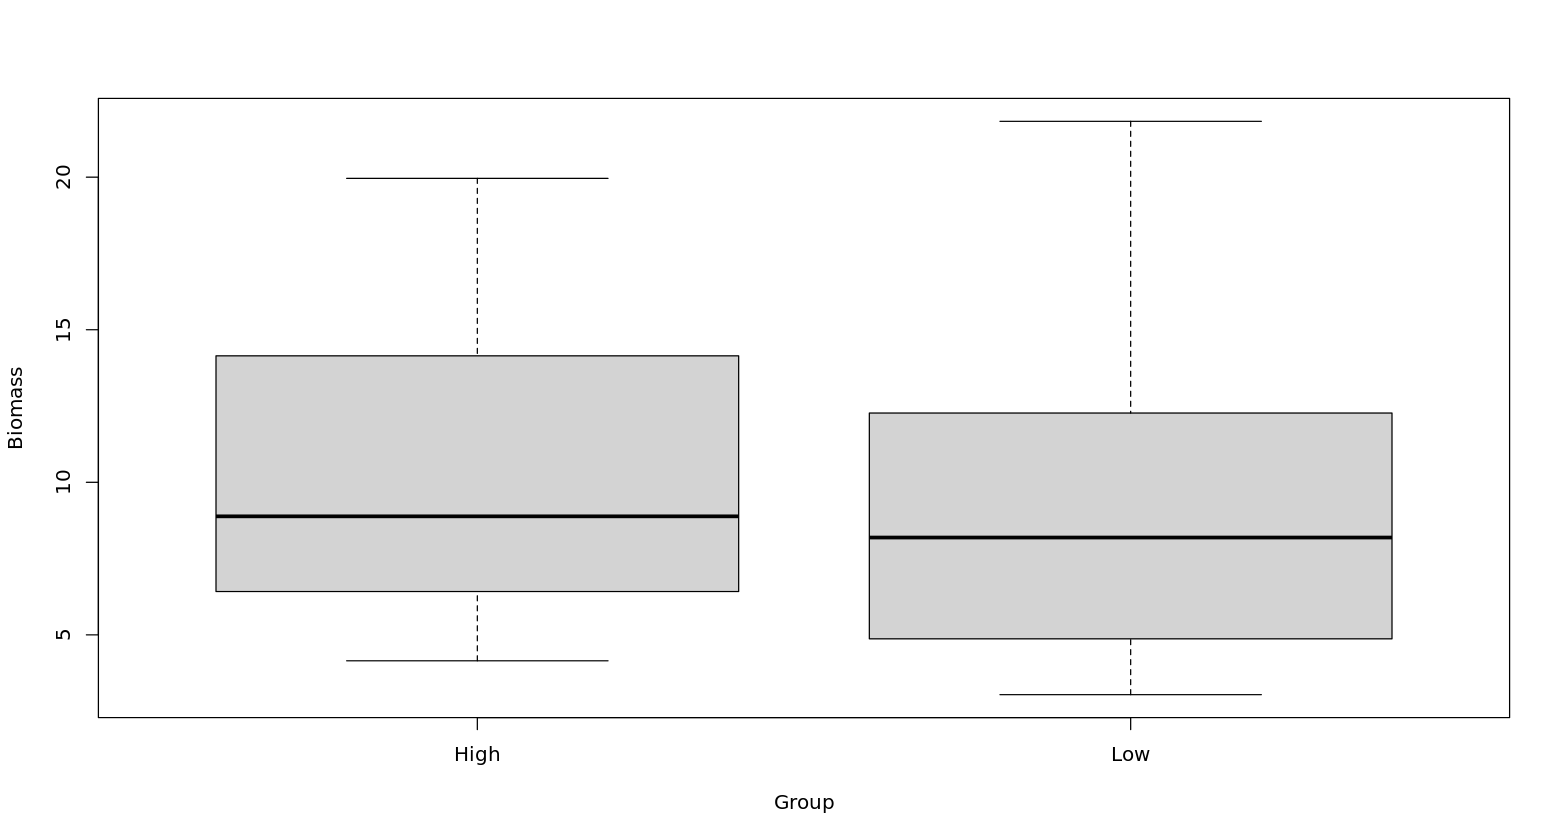

In [153]:
boxplot(Biomass~Group*treatment, final.data)
boxplot(Biomass~Group, final.data)

                 Df Sum Sq Mean Sq F value  Pr(>F)    
treatment         1 1780.8  1780.8 271.569 < 2e-16 ***
Group             1   69.2    69.2  10.546 0.00154 ** 
treatment:Group   1    0.3     0.3   0.042 0.83864    
Residuals       110  721.3     6.6                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ww  ds 
"a" "b" 

$Group
High  Low 
 "a"  "b" 

$`treatment:Group`
ww:High  ww:Low ds:High  ds:Low 
    "a"     "a"     "b"     "b" 



	Kruskal-Wallis rank sum test

data:  Biomass by Groups
Kruskal-Wallis chi-squared = 3.2284, df = 1, p-value = 0.07237


Df  F value    Pr(>F)   
group   1 0.03507018 0.8517875
      112         NA        NA


	Shapiro-Wilk normality test

data:  Biomass[Group == "High"]
W = 0.92145, p-value = 0.001359


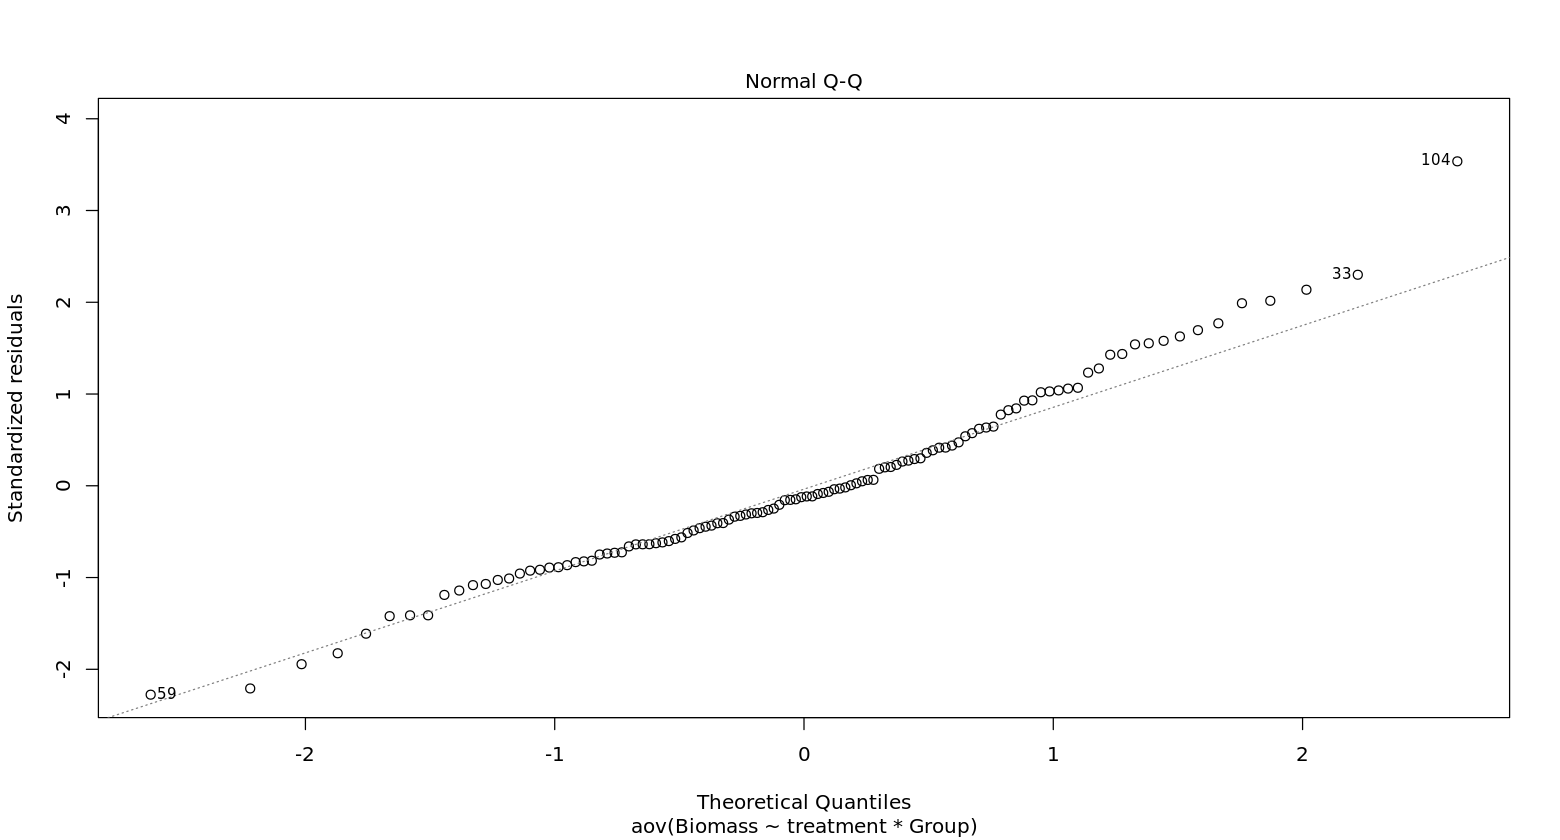

In [154]:
#t.test(Biomass~Groups, data=final.data)
#t.test(Biomass~treatment, data=final.data)
anova<- aov(Biomass~treatment*Group, data=final.data)
summary(anova)
plot(anova, 2)
tukey<- TukeyHSD(anova, cof.level=.95)
tukey.cld<- multcompLetters4(anova,tukey)
tukey.cld
##kruskal.test(Biomass ~ treatment, data = final.data)
kruskal.test(Biomass ~ Groups, data = final.data)
#pairwise.t.test(final.data$Biomass, final.data$Groups, p.adjust.method = "BH", pool.sd=FALSE, var.equal=FALSE, data=final.data)
leveneTest(Biomass~Group, data=final.data)
with(final.data, shapiro.test(Biomass[Group=="High"]))

 # Wilcox.test:  Best choice since they have equal variance(for groups) and not normally distributed)

In [155]:
wilcox.test(Biomass~Group, alternative = "two.sided", data=final.data) #(best choice since they have equal variance and not normally distributed)


	Wilcoxon rank sum test with continuity correction

data:  Biomass by Group
W = 1941, p-value = 0.07282
alternative hypothesis: true location shift is not equal to 0


In [156]:
library(agricolae)
print(LSD.test(anova,c("Group","treatment")))

print(LSD.test(anova,"Group"))

$statistics
   MSerror  Df     Mean       CV
  6.557492 110 9.709825 26.37288

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none Group:treatment   4  0.05

$means
          Biomass      std  r       LCL       UCL  Min   Max   Q25   Q50   Q75
High:ds  6.557241 1.694082 29  5.614870  7.499613 4.15 11.63  5.10  6.48  7.53
High:ww 14.590741 3.157359 27 13.614090 15.567391 8.87 19.96 12.43 14.22 17.20
Low:ds   5.095172 1.573464 29  4.152801  6.037544 3.04  9.19  3.87  4.87  5.61
Low:ww  12.932759 3.340512 29 11.990387 13.875130 8.04 21.83 10.35 12.27 15.52

$comparison
NULL

$groups
          Biomass groups
High:ww 14.590741      a
Low:ww  12.932759      b
High:ds  6.557241      c
Low:ds   5.095172      d

attr(,"class")
[1] "group"
$statistics
   MSerror  Df     Mean       CV
  6.557492 110 9.709825 26.37288

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none  Group   2  0.05

$means
       Biomass      std  r      LCL       UCL  Mi

In [157]:
pwc4 <- final.data %>% 
pairwise_t_test(Biomass~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc4



pwc5 <- final.data %>% 
pairwise_t_test(Biomass~Group, pool.sd = FALSE, p.adjust.method = "bonferroni")
pwc5


.y.     group1 group2 n1 n2 p     p.signif p.adj p.adj.signif
1 Biomass High   Low    56 58 0.113 ns       0.113 ns

.y.     group1 group2 n1 n2 statistic df      p     p.adj p.adj.signif
1 Biomass High   Low    56 58 1.595667  111.811 0.113 0.113 ns

In [158]:
LM <- mean(final.data$Biomass[final.data$Group=="Low"],)
LM

HM <- mean(final.data$Biomass[final.data$Group=="High"],)
HM
sd(final.data$Biomass[final.data$Group=="High"],)
sd(final.data$Biomass[final.data$Group=="Low"],)

[1] 9.013966

[1] 10.43054

[1] 4.751873

[1] 4.724845

'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

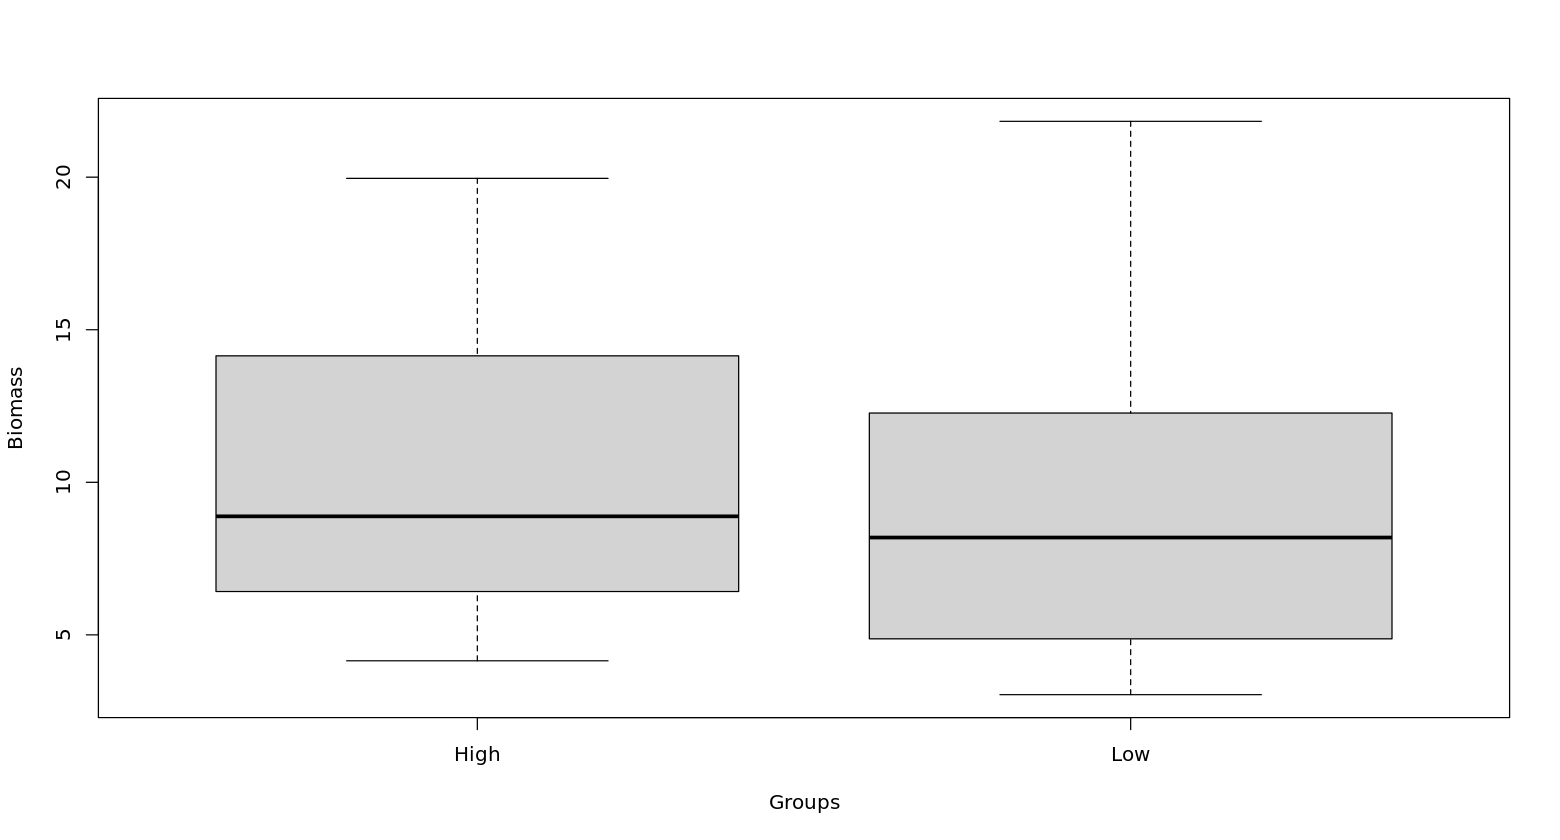

In [159]:
final.data$Group<- as.factor(final.data$Group)
str(final.data)
boxplot(Biomass~Groups, final.data)

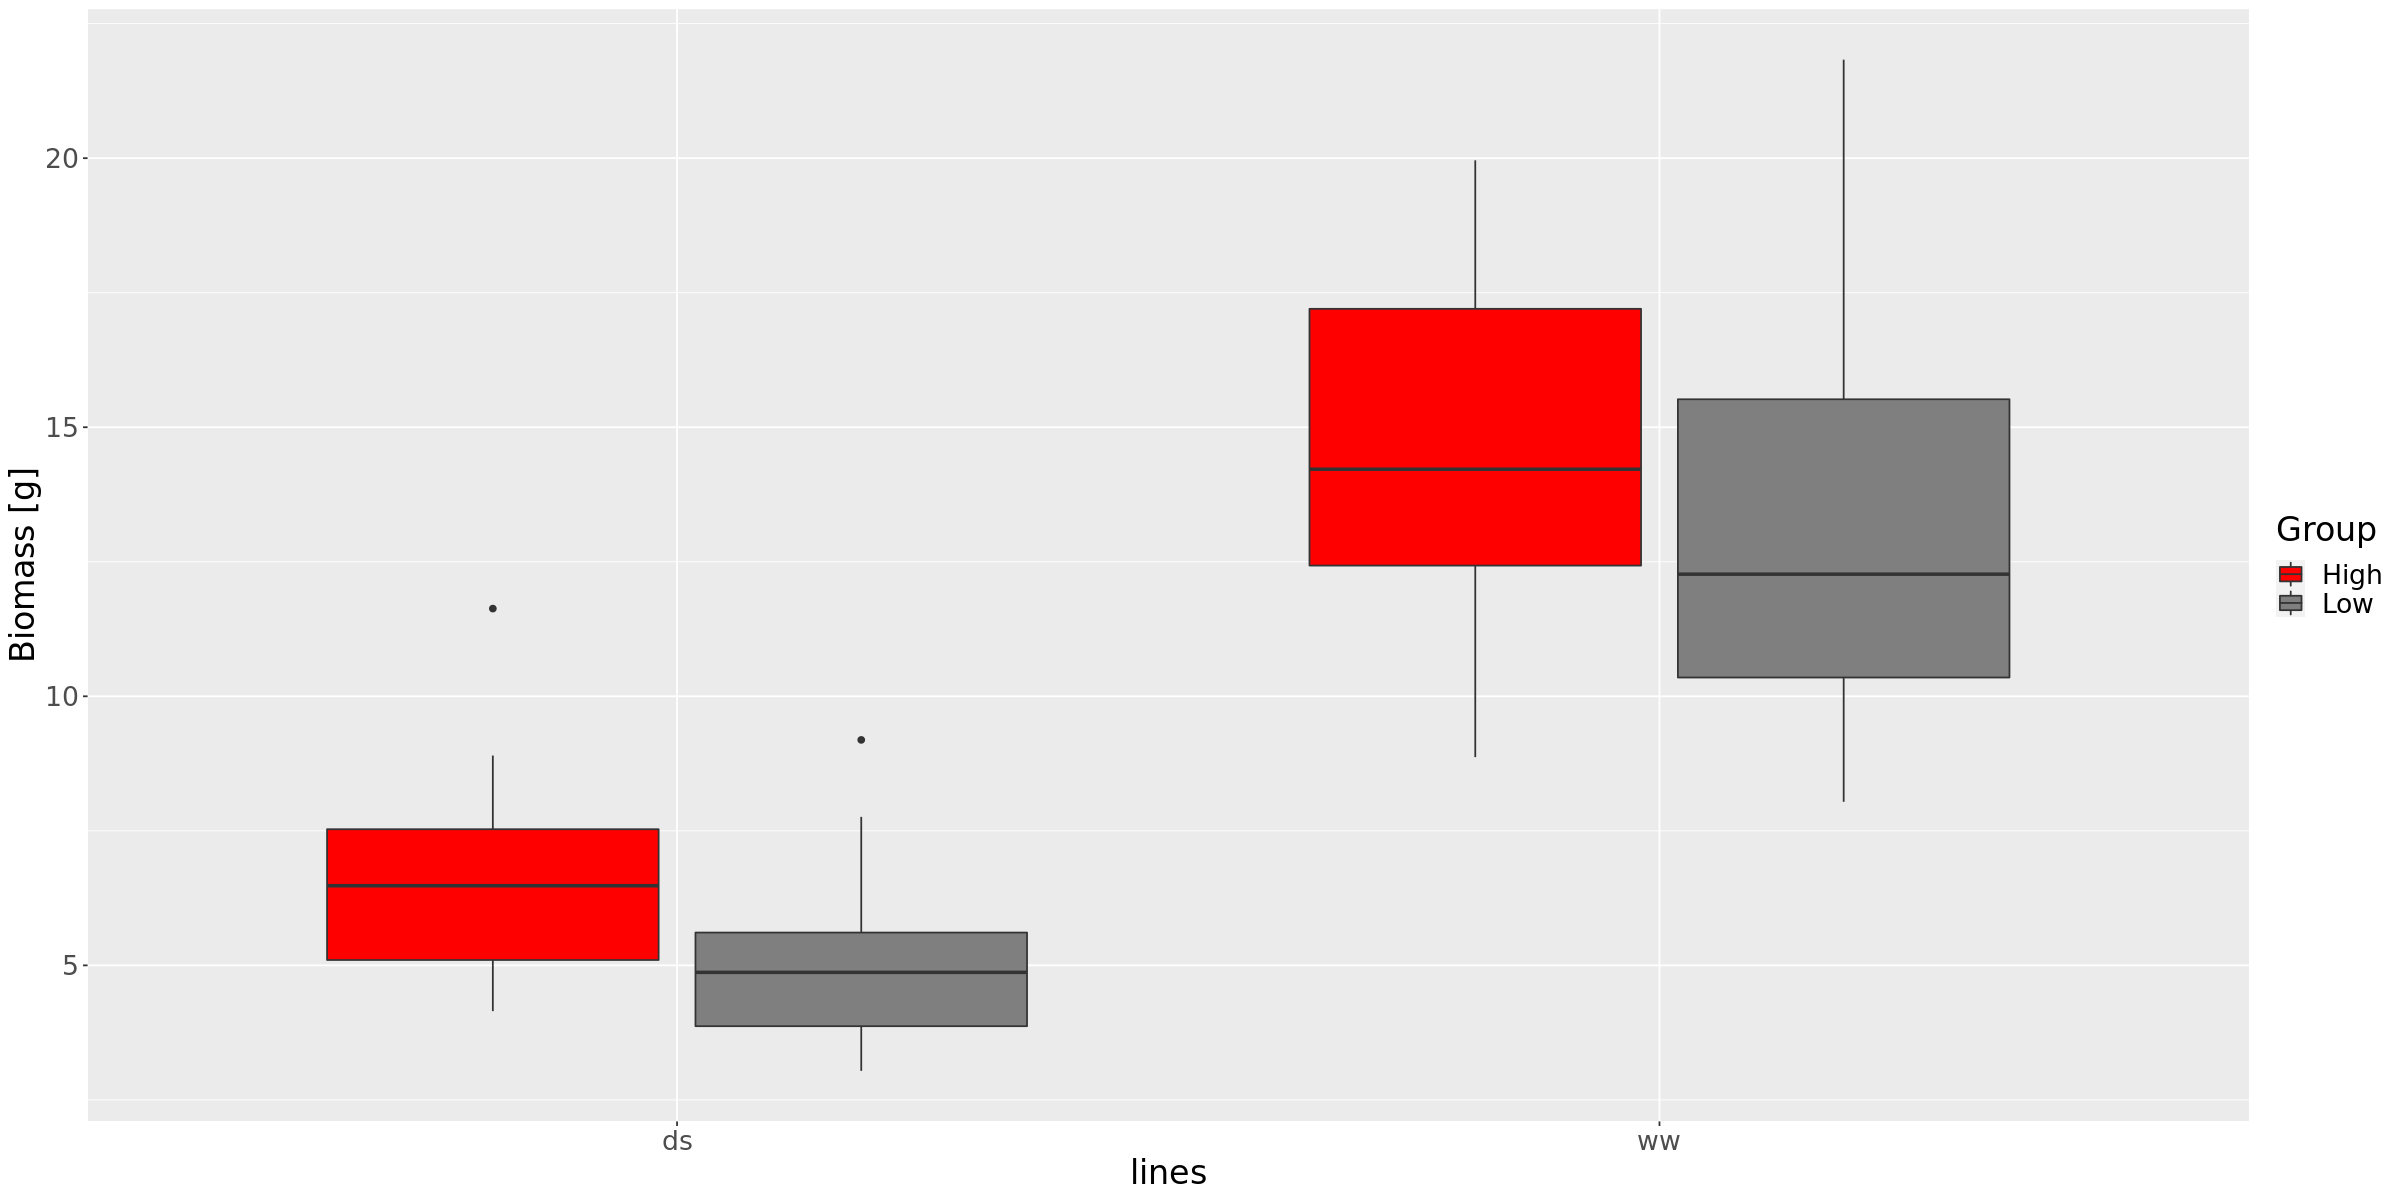

In [160]:
options(repr.plot.width=20, repr.plot.height=10)
p <- ggplot(final.data, aes(x=treatment, y=Biomass,  fill=Group))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$Group,
                    values = c("red", "orange")) +
        labs(y="Biomass [g]", x="lines")



    print(p)
                         

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


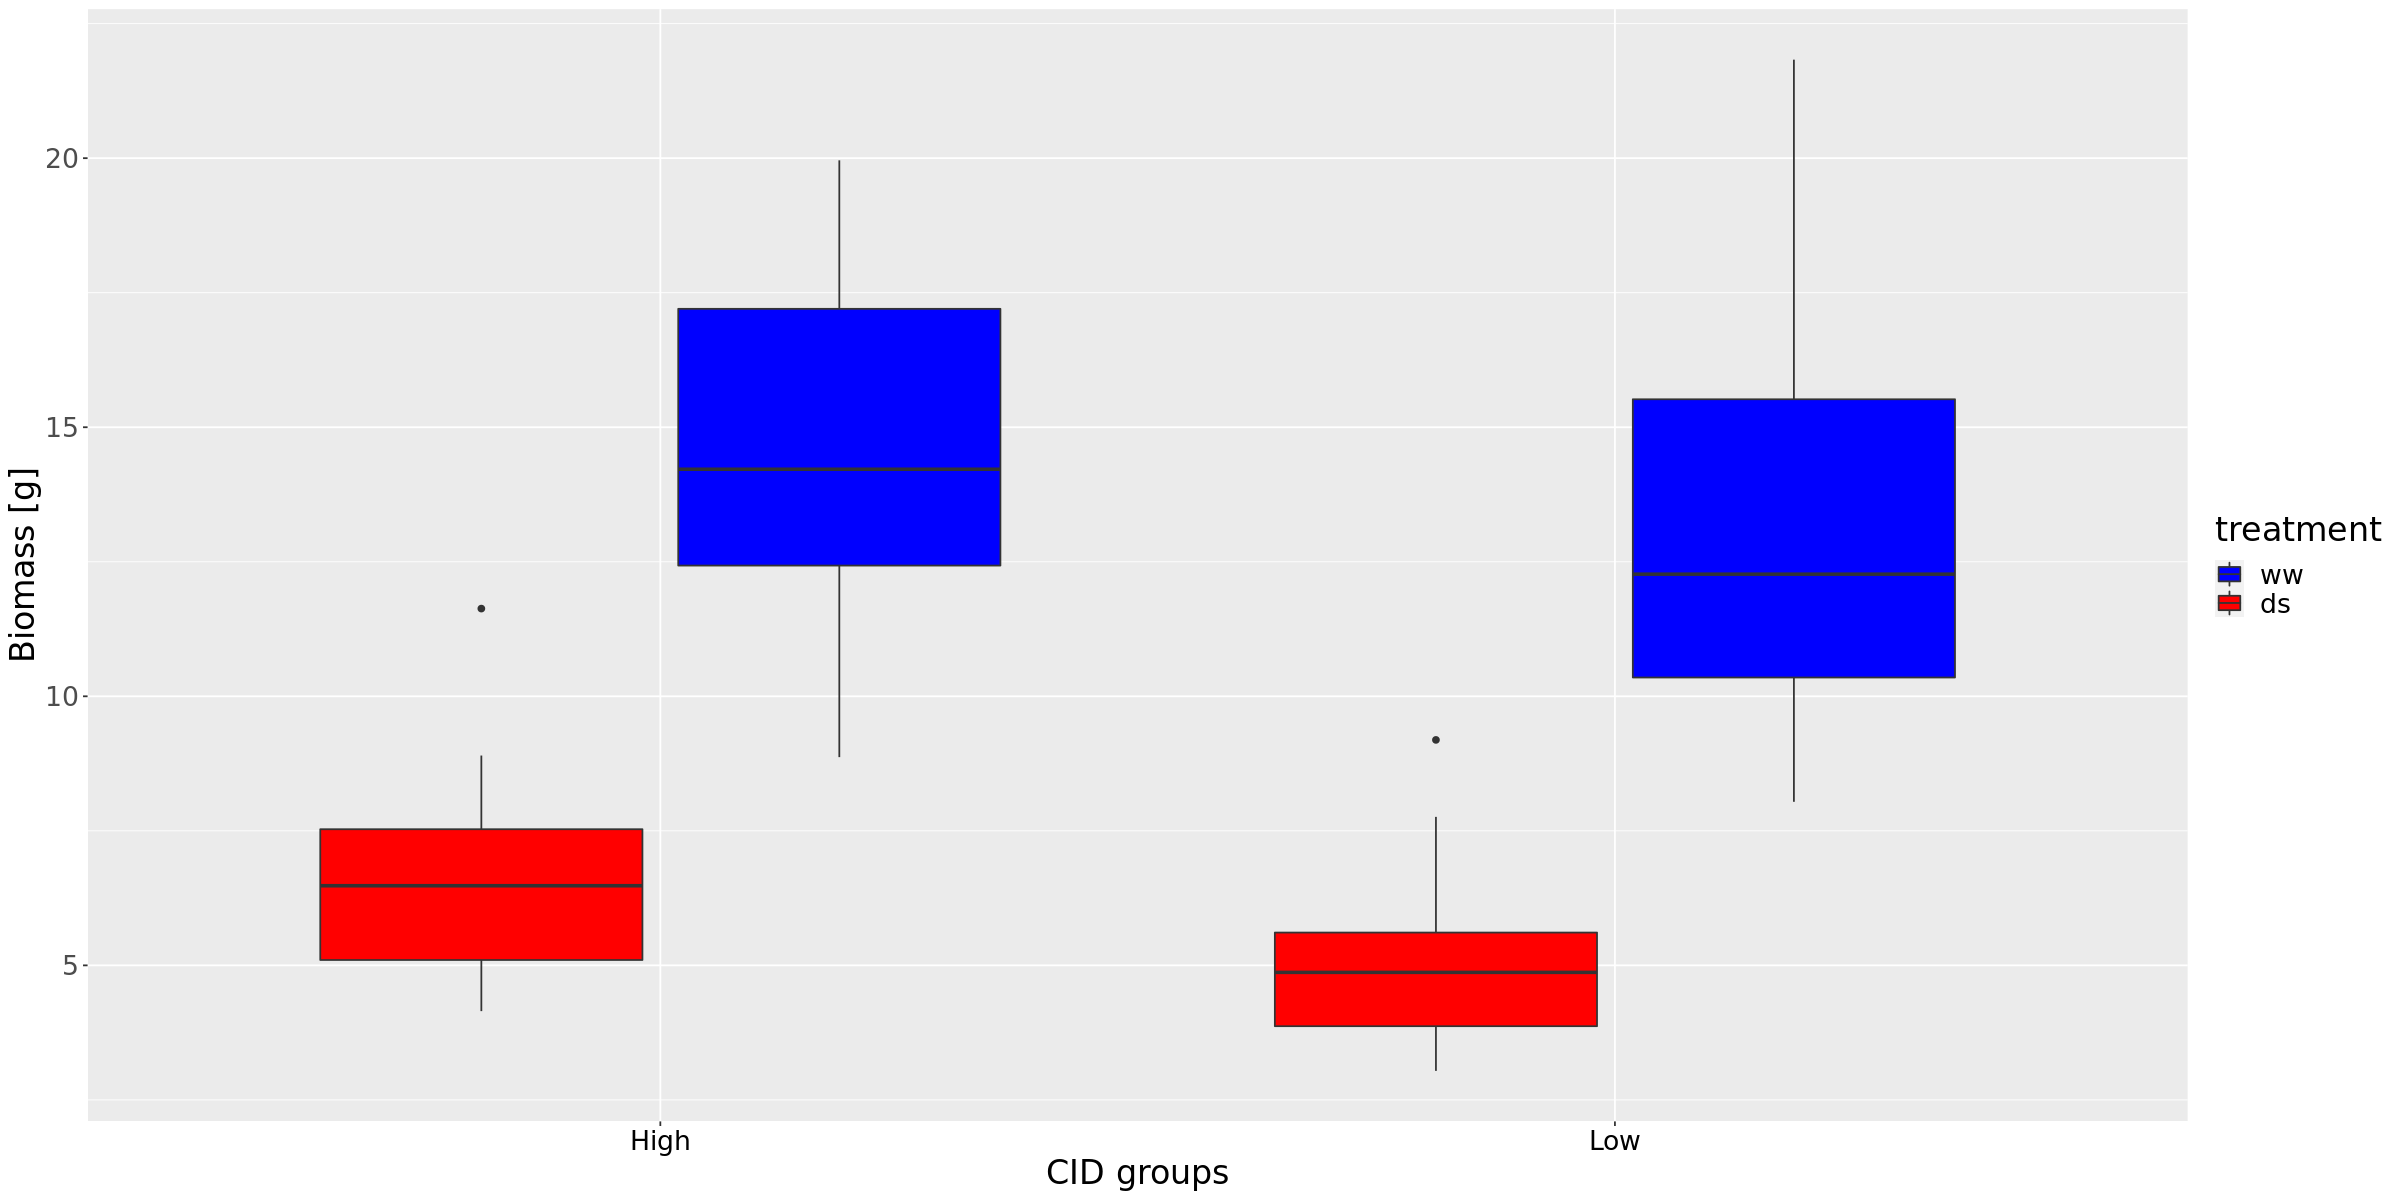

In [9]:
options(repr.plot.width=20, repr.plot.height=10)
p <- ggplot(final.data, aes(x=Group,y=Biomass,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="Biomass [g]", x="CID groups")+
theme(text = element_text(size = 20))+
theme(axis.text.x = element_text(colour=c("black","black")))



    print(p)


# Max.Height

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


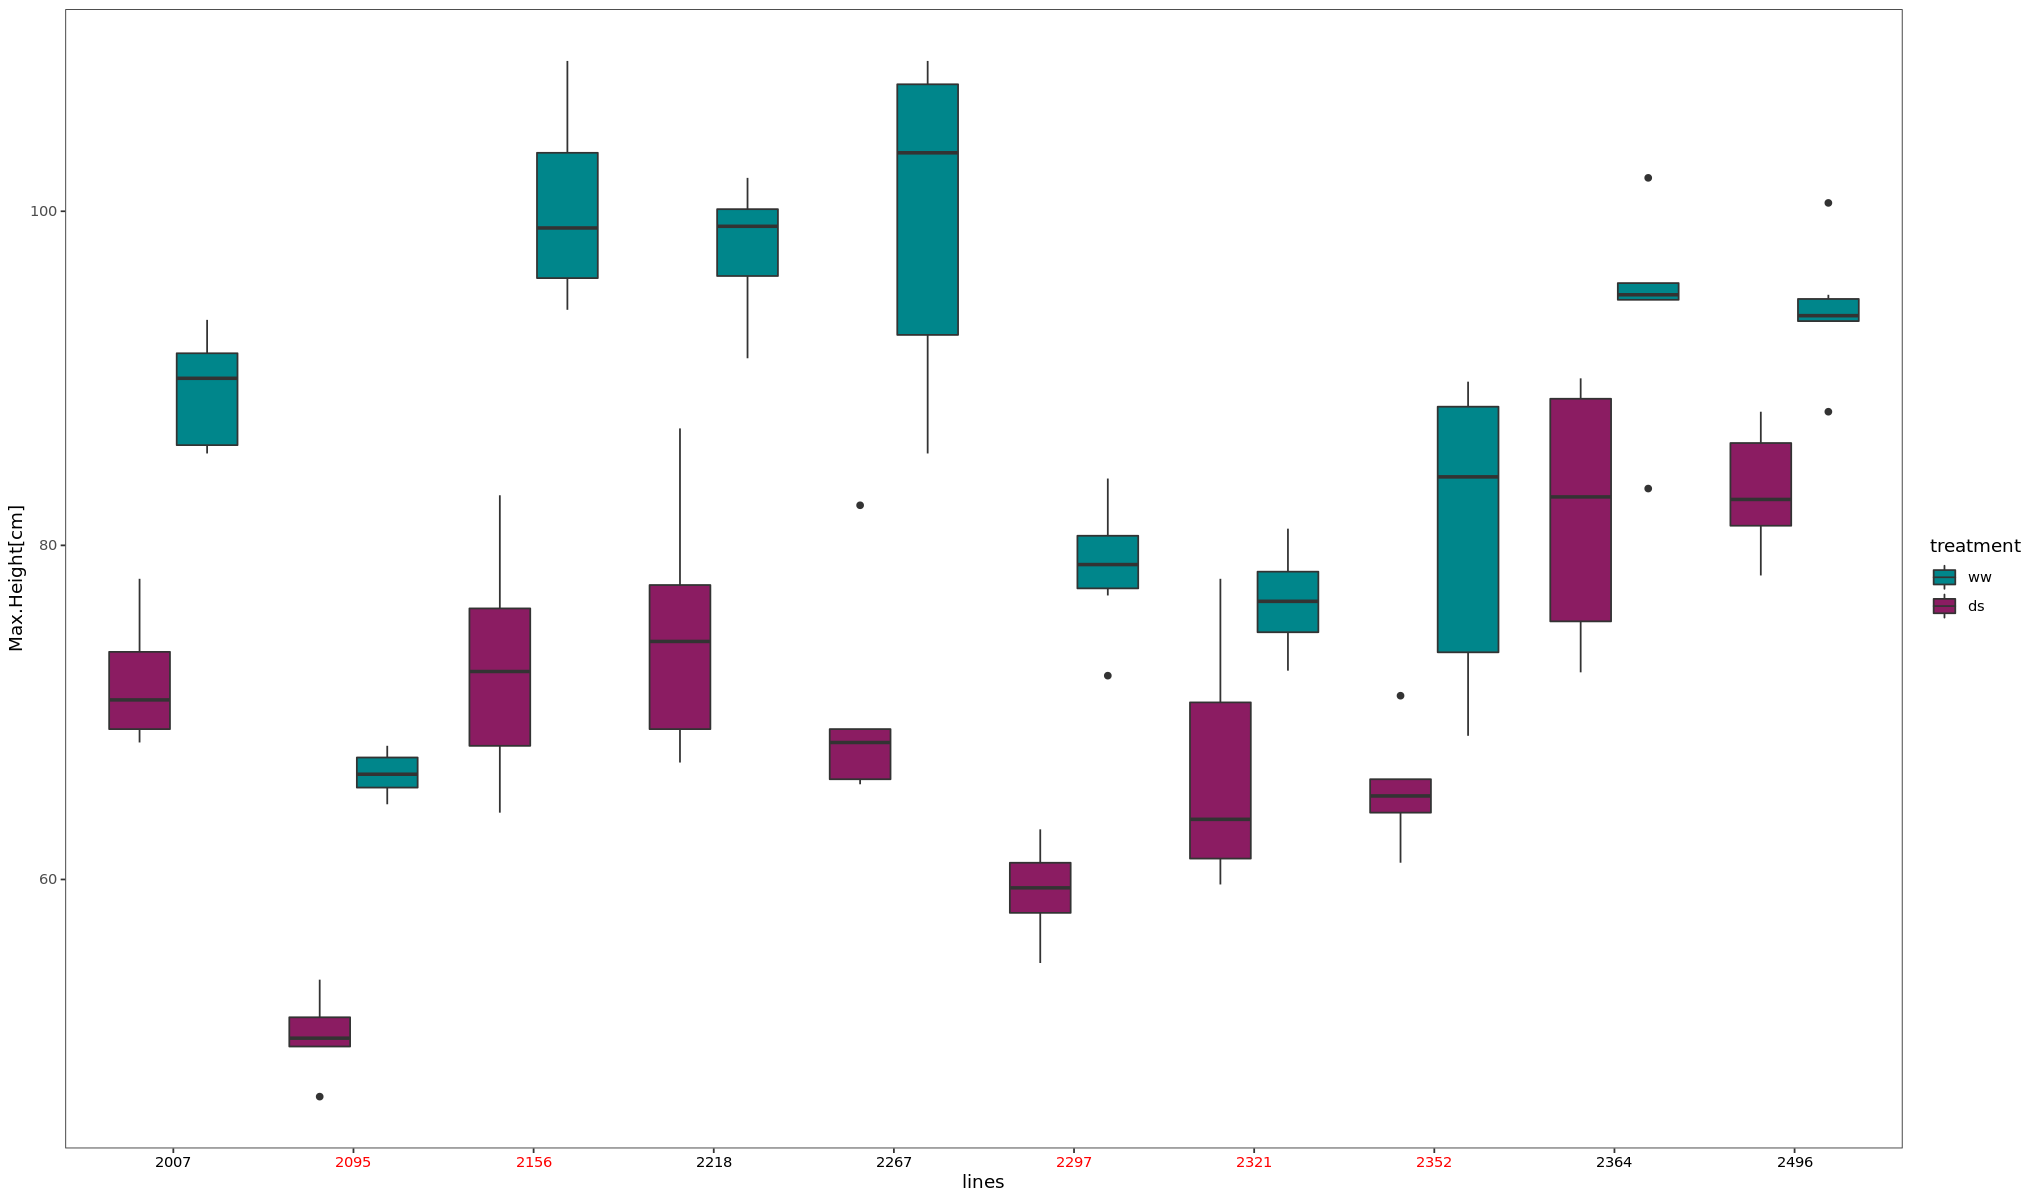

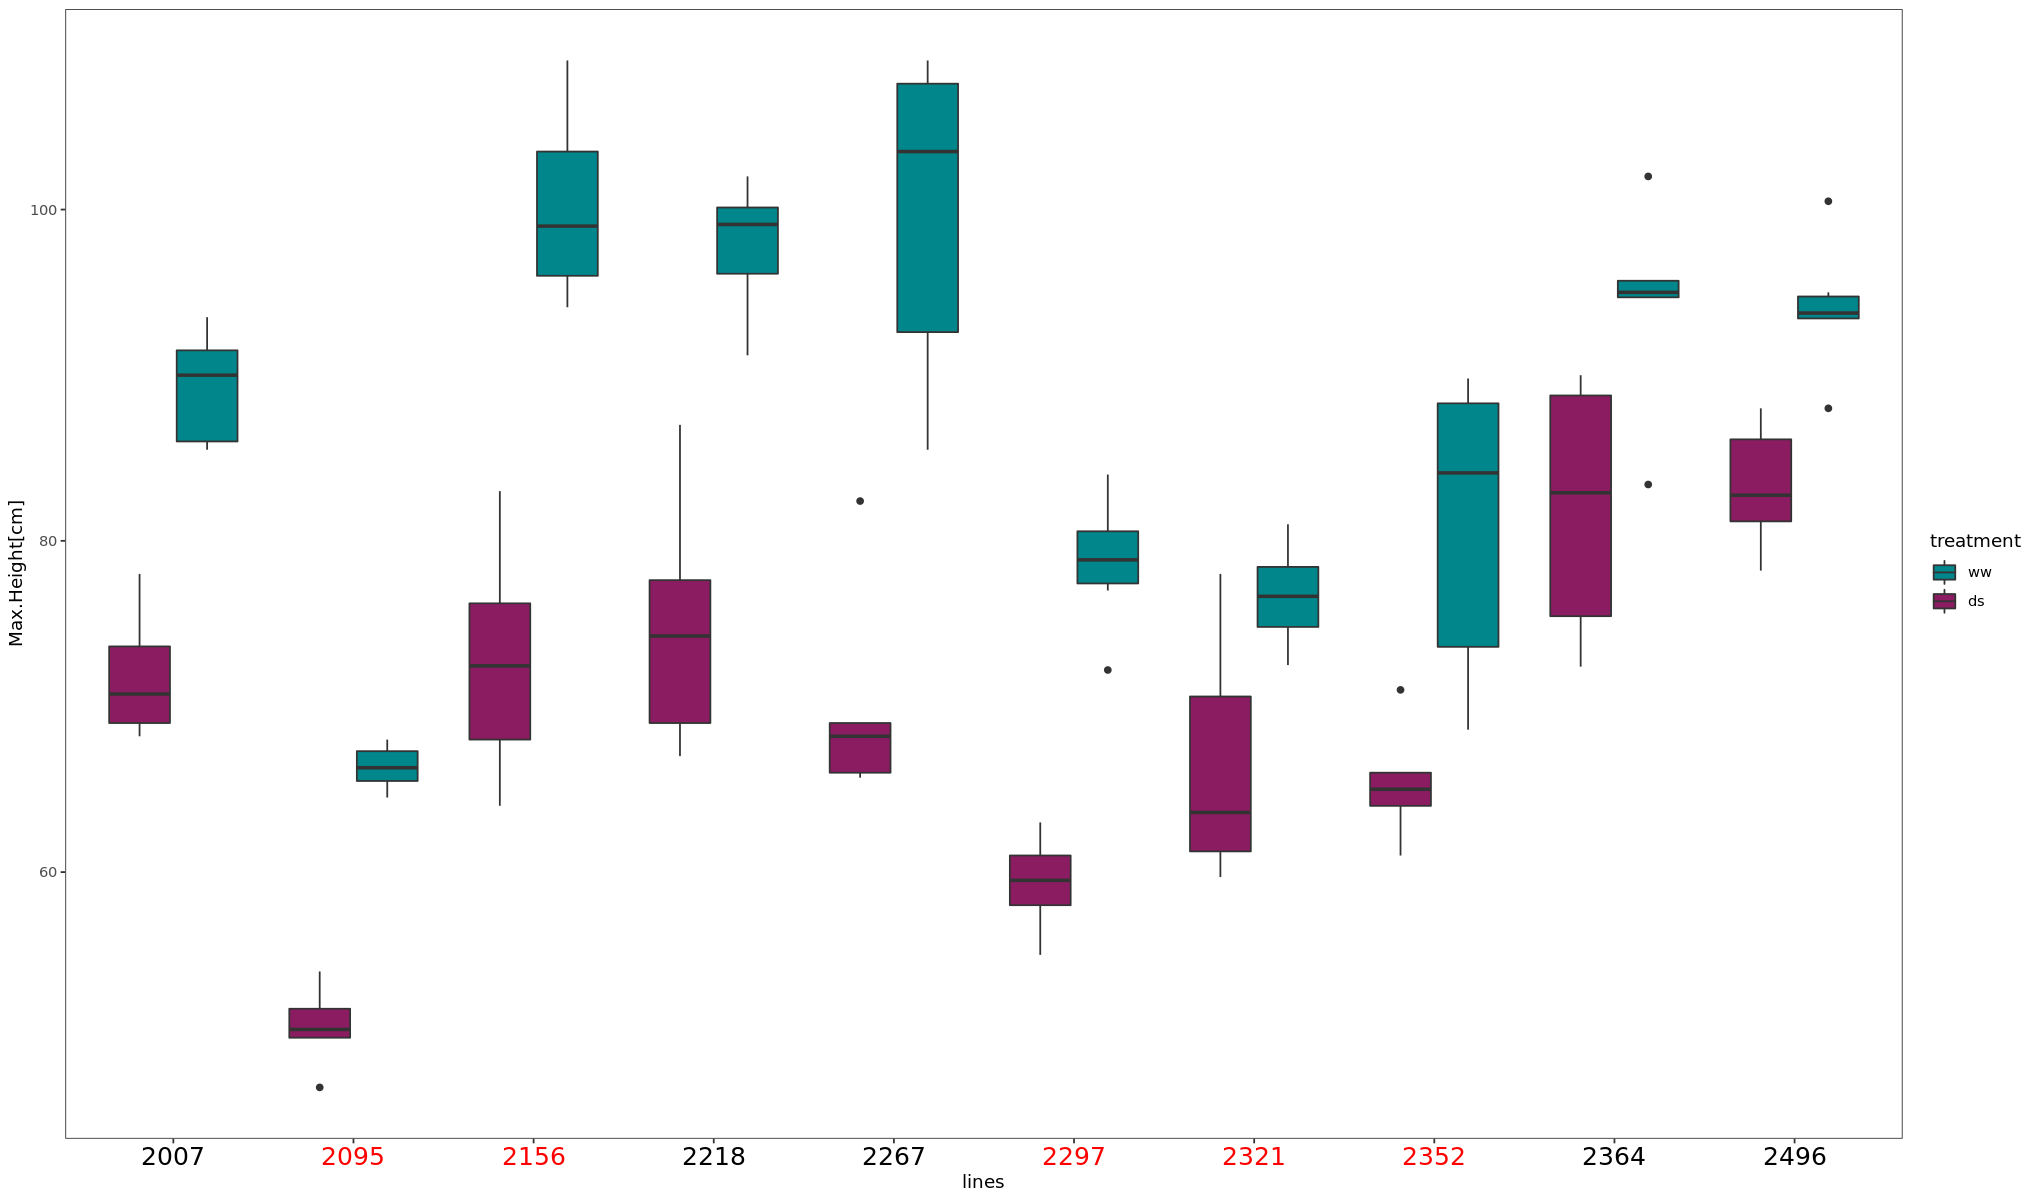

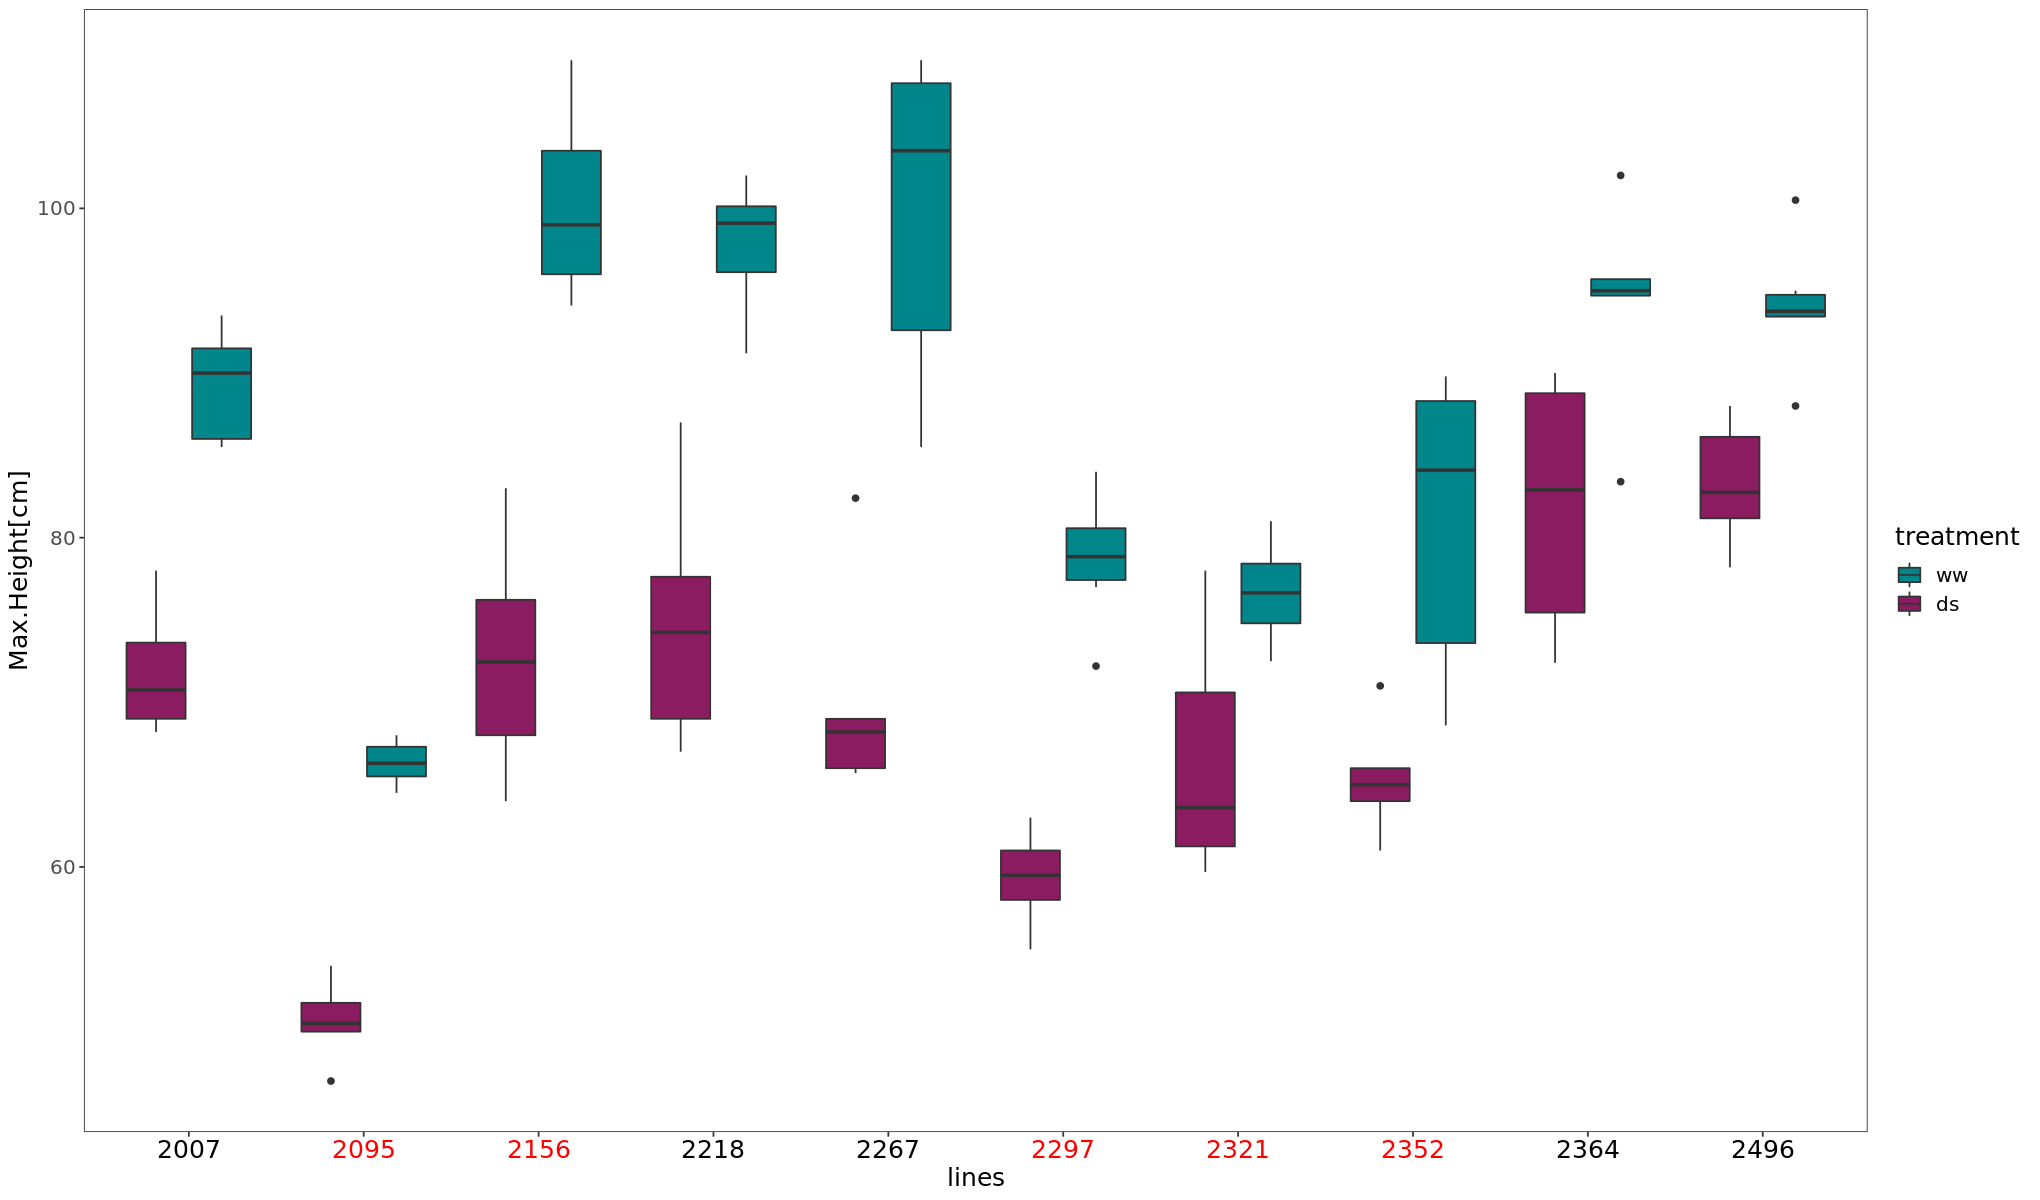

In [162]:
options(repr.plot.width=17, repr.plot.height=10)
Mheight. <- ggplot(final.data, aes(x=IDs, y=max.Height, fill=treatment))+
       geom_boxplot()+
     scale_fill_manual(breaks =final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Max.Height[cm]", x="lines")+
  theme(text=element_text(size = 60))+
theme_bw()+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))
    print(Mheight.)


fH<-Mheight.+theme(axis.text.x =element_text(size = 15))
fH
ffh<-fH+ theme(text = element_text(size = 15))  
ffh
ggsave("MHeight-boxplot.png", plot = ffh, width = 15, height = 10,
      path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


In [27]:
max.Height_AN <- aov(max.Height~ treatment*IDs, data=final.data)
summary(max.Height_AN)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1   9345    9345 285.337  < 2e-16 ***
IDs            9  10580    1176  35.893  < 2e-16 ***
treatment:IDs  9   1136     126   3.855 0.000348 ***
Residuals     94   3079      33                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
tukey<- TukeyHSD(max.Height_AN, conf.level=.95)
tukey

In [29]:
tukey.cld.Height<-multcompLetters4(max.Height_AN, tukey)
View(tukey.cld.Height)

$treatment
 ww  ds 
"a" "b" 

$IDs
2496 2364 2156 2218 2267 2007 2352 2321 2297 2095 
 "a" "ab" "ab" "ab" "ab" "bc" "cd"  "d"  "d"  "e" 

$`treatment:IDs`
ww:2156 ww:2267 ww:2218 ww:2364 ww:2496 ww:2007 ds:2496 ds:2364 ww:2352 ww:2297 
    "a"     "a"     "a"   "abc"    "ab"  "abcd"  "bcde"  "cdef"   "def"  "defg" 
ww:2321 ds:2218 ds:2156 ds:2007 ds:2267 ds:2321 ww:2095 ds:2352 ds:2297 ds:2095 
"defgh"  "efgh"  "efgh"  "efgh"  "fghi"    "hi"   "ghi"    "hi"    "ij"     "j" 


In [30]:
MHeight_summary <- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height))%>%
arrange(desc(mean)) 
          View(MHeight_summary)


MHeight_summary_t <- group_by(final.data, treatment) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height))%>%
arrange(desc(mean)) 
          View(MHeight_summary_t)


MHeight_summary_l <- group_by(final.data, IDs) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height))%>%
arrange(desc(mean)) 
          View(MHeight_summary_l)


MHeight_summary_G <- group_by(final.data, Group) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height)) %>%
          arrange(desc(mean))
         View(MHeight_summary_G)


MHeight_summary_Gt <- group_by(final.data, Group, treatment) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height)) %>%
          arrange(desc(mean))
         View(MHeight_summary_Gt)

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd       
1  ww        2156 100.18333  5.702777
2  ww        2267  99.64000 10.190339
3  ww        2218  97.83333  3.933785
4  ww        2364  94.16000  6.719598
5  ww        2496  94.06667  3.995831
6  ww        2007  89.30000  3.474910
7  ds        2496  83.26667  3.722186
8  ds        2364  81.98333  7.850966
9  ww        2352  81.06667  9.357920
10 ww        2297  78.66667  3.976766
11 ww        2321  76.66667  3.055269
12 ds        2218  74.75000  7.441438
13 ds        2156  72.65000  6.885855
14 ds        2007  71.78333  3.805479
15 ds        2267  70.26000  6.930945
16 ds        2321  66.38333  7.285717
17 ww        2095  66.32000  1.393557
18 ds        2352  65.40000  3.646917
19 ds        2297  59.33333  2.875181
20 ds        2095  50.66667  2.338090

treatment mean     sd      
1 ww        87.82143 12.08513
2 ds        69.71034 10.89226

IDs  mean     sd       
1  2496 88.66667  6.735433
2  2364 87.51818  9.450801
3  2156 86.41667 15.591188
4  2218 86.29167 13.323831
5  2267 84.95000 17.529293
6  2007 79.74545  9.785332
7  2352 73.94545 10.772406
8  2321 71.52500  7.563804
9  2297 69.00000 10.624757
10 2095 57.78182  8.386634

Group mean     sd     
1 High  85.51607 11.7612
2 Low   71.93621 14.0667

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.


Group treatment mean     sd       
1 High  ww        95.07037  6.587798
2 Low   ww        81.07241 12.195869
3 High  ds        76.62069  7.837974
4 Low   ds        62.80000  9.009400

In [31]:
cld.MHeight <- as.data.frame.list(tukey.cld.Height$`treatment:IDs`)
MHeight_summary$tukey <-cld.MHeight $Letters
write.table(MHeight_summary, "MHeight.summary.August.csv")
View(MHeight_summary)


cld.MHeight_t <- as.data.frame.list(tukey.cld.Height$`treatment`)
MHeight_summary_t$tukey <-cld.MHeight_t $Letters
write.table(MHeight_summary_t, "MHeight.t.summary.August.csv")
View(MHeight_summary_t)




cld.MHeight_l <- as.data.frame.list(tukey.cld.Height$`IDs`)
MHeight_summary_l$tukey <-cld.MHeight_l $Letters
write.table(MHeight_summary_l, "MHeight.l.summary.August.csv")
View(MHeight_summary_l)




treatment IDs  mean      sd        tukey
1  ww        2156 100.18333  5.702777 a    
2  ww        2267  99.64000 10.190339 a    
3  ww        2218  97.83333  3.933785 a    
4  ww        2364  94.16000  6.719598 abc  
5  ww        2496  94.06667  3.995831 ab   
6  ww        2007  89.30000  3.474910 abcd 
7  ds        2496  83.26667  3.722186 bcde 
8  ds        2364  81.98333  7.850966 cdef 
9  ww        2352  81.06667  9.357920 def  
10 ww        2297  78.66667  3.976766 defg 
11 ww        2321  76.66667  3.055269 defgh
12 ds        2218  74.75000  7.441438 efgh 
13 ds        2156  72.65000  6.885855 efgh 
14 ds        2007  71.78333  3.805479 efgh 
15 ds        2267  70.26000  6.930945 fghi 
16 ds        2321  66.38333  7.285717 hi   
17 ww        2095  66.32000  1.393557 ghi  
18 ds        2352  65.40000  3.646917 hi   
19 ds        2297  59.33333  2.875181 ij   
20 ds        2095  50.66667  2.338090 j

treatment mean     sd       tukey
1 ww        87.82143 12.08513 a    
2 ds        69.71034 10.89226 b

IDs  mean     sd        tukey
1  2496 88.66667  6.735433 a    
2  2364 87.51818  9.450801 ab   
3  2156 86.41667 15.591188 ab   
4  2218 86.29167 13.323831 ab   
5  2267 84.95000 17.529293 ab   
6  2007 79.74545  9.785332 bc   
7  2352 73.94545 10.772406 cd   
8  2321 71.52500  7.563804 d    
9  2297 69.00000 10.624757 d    
10 2095 57.78182  8.386634 e

In [32]:
MHeight_Int <- read.table("MHeight.summary.August.csv")
MHeight_T<- read.table("MHeight.t.summary.August.csv")
MHeight_L<- read.table("MHeight.l.summary.August.csv")

In [33]:

options(repr.plot.width=20, repr.plot.height=10)
       MHeight_Int$IDs<- as.factor(MHeight_Int$IDs)

Height<- ggplot(MHeight_Int, aes(x=IDs, y=mean, fill=treatment))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-4.55, hjust=0.4, size=5, colour="black")+

labs(x="Lines", y="Max.Heigh [cm]")+
scale_fill_manual(values=c("tomato2","royalblue3"))+

theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x=element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
theme(legend.position="top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Height

ggsave("max.height.Int.png", plot =Height, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")



Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [30]:

options(repr.plot.width=20, repr.plot.height=10)
       MHeight_Int$IDs<- as.factor(MHeight_Int$IDs)

Height<- ggplot(MHeight_Int, aes(x=IDs, y=mean, fill=treatment))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-4.55, hjust=0.4, size=5, colour="black")+
facet_wrap(~treatment)+
labs(x="Lines", y="Max.Heigh [cm]")+
scale_fill_manual(values=c("tomato2","royalblue3"))+

theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x=element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
theme(legend.position="top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Height

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


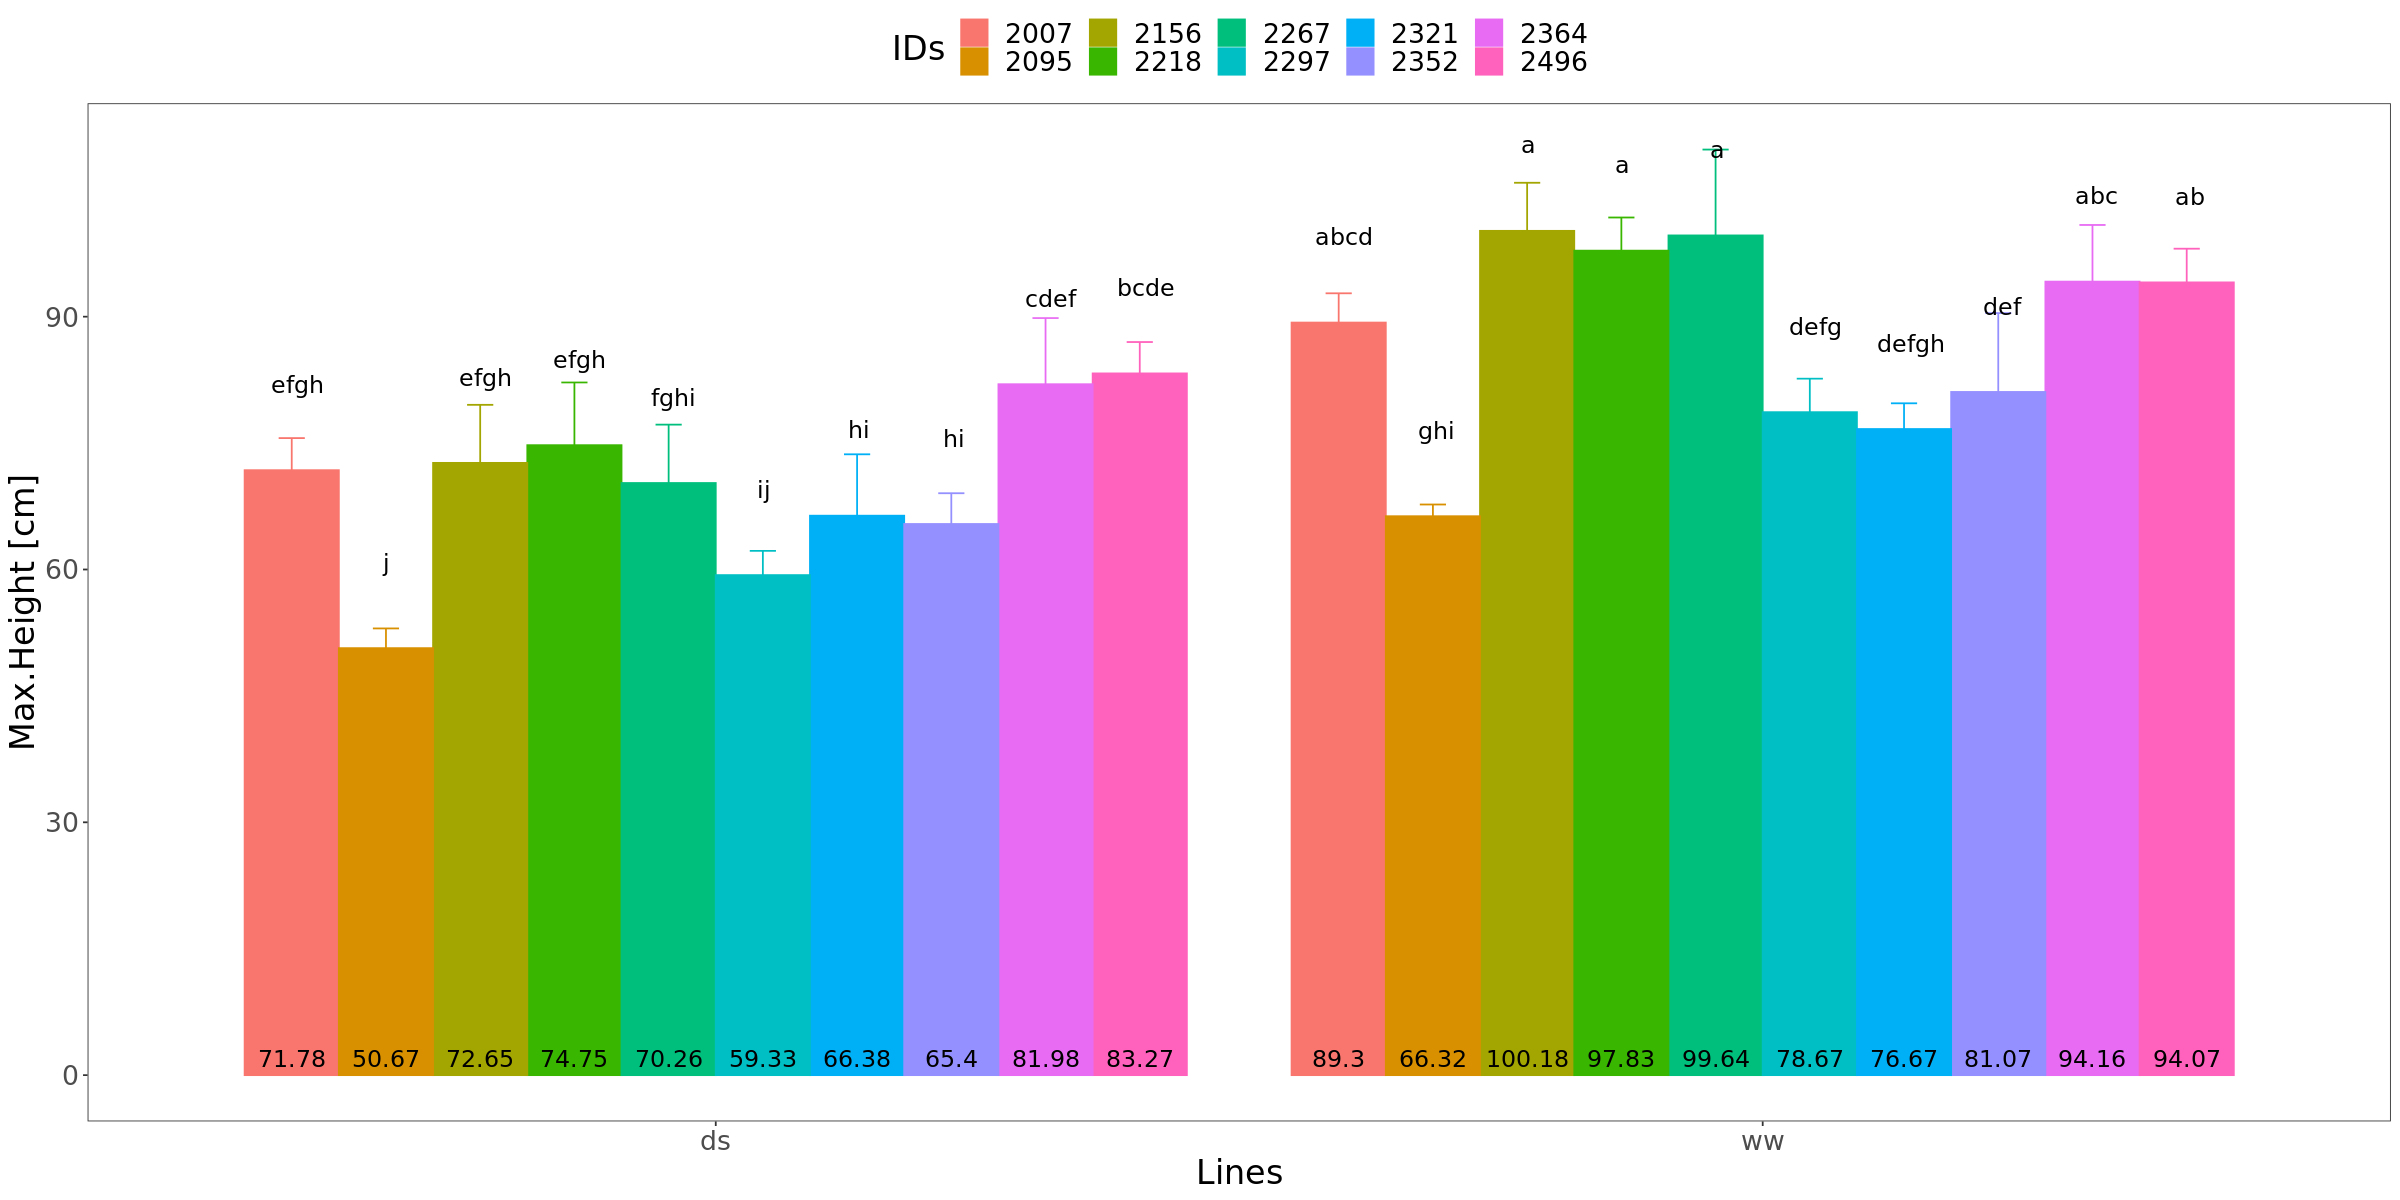

In [170]:

options(repr.plot.width=20, repr.plot.height=10)
       MHeight_Int$IDs<- as.factor(MHeight_Int$IDs)

Height1<- ggplot(MHeight_Int, aes(x=treatment, y=mean, fill=IDs, color=IDs))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-4.55, hjust=0.4, size=5, colour="black")+
labs(x="Lines", y="Max.Height [cm]")+
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 20))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Height1


ggsave("max.height.Int.sep.png", plot =Height1, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


In [171]:
View(MHeight_summary)

treatment IDs  mean      sd        tukey
1  ww        2156 100.18333  5.702777 a    
2  ww        2267  99.64000 10.190339 a    
3  ww        2218  97.83333  3.933785 a    
4  ww        2364  94.16000  6.719598 abc  
5  ww        2496  94.06667  3.995831 ab   
6  ww        2007  89.30000  3.474910 abcd 
7  ds        2496  83.26667  3.722186 bcde 
8  ds        2364  81.98333  7.850966 cdef 
9  ww        2352  81.06667  9.357920 def  
10 ww        2297  78.66667  3.976766 defg 
11 ww        2321  76.66667  3.055269 defgh
12 ds        2218  74.75000  7.441438 efgh 
13 ds        2156  72.65000  6.885855 efgh 
14 ds        2007  71.78333  3.805479 efgh 
15 ds        2267  70.26000  6.930945 fghi 
16 ds        2321  66.38333  7.285717 hi   
17 ww        2095  66.32000  1.393557 ghi  
18 ds        2352  65.40000  3.646917 hi   
19 ds        2297  59.33333  2.875181 ij   
20 ds        2095  50.66667  2.338090 j

In [34]:
Control_data_Height <-MHeight_summary[c(1,2,3,4,5,6,9,10,11,17), ]
Control_data_Height <-Control_data_Height [order(Control_data_Height$IDs),]
Control_data_Height

treatment IDs  mean      sd        tukey
1  ww        2007  89.30000  3.474910 abcd 
2  ww        2095  66.32000  1.393557 ghi  
3  ww        2156 100.18333  5.702777 a    
4  ww        2218  97.83333  3.933785 a    
5  ww        2267  99.64000 10.190339 a    
6  ww        2297  78.66667  3.976766 defg 
7  ww        2321  76.66667  3.055269 defgh
8  ww        2352  81.06667  9.357920 def  
9  ww        2364  94.16000  6.719598 abc  
10 ww        2496  94.06667  3.995831 ab

In [35]:
Stress_data_Height <-MHeight_summary[c(7,8,12,13,14,15,16,18,19,20), ]
Stress_data_Height <-Stress_data_Height [order(Stress_data_Height$IDs),]
Stress_data_Height

treatment IDs  mean     sd       tukey
1  ds        2007 71.78333 3.805479 efgh 
2  ds        2095 50.66667 2.338090 j    
3  ds        2156 72.65000 6.885855 efgh 
4  ds        2218 74.75000 7.441438 efgh 
5  ds        2267 70.26000 6.930945 fghi 
6  ds        2297 59.33333 2.875181 ij   
7  ds        2321 66.38333 7.285717 hi   
8  ds        2352 65.40000 3.646917 hi   
9  ds        2364 81.98333 7.850966 cdef 
10 ds        2496 83.26667 3.722186 bcde

In [36]:
difference_data_Height <- left_join(Control_data_Height,Stress_data_Height, by="IDs")
difference_data_Height 

difference_data_Height$Height_difference <- (difference_data_Height$mean.x)-(difference_data_Height$mean.y)
View(difference_data_Height)

treatment.x IDs  mean.x    sd.x      tukey.x treatment.y mean.y   sd.y    
1  ww          2007  89.30000  3.474910 abcd    ds          71.78333 3.805479
2  ww          2095  66.32000  1.393557 ghi     ds          50.66667 2.338090
3  ww          2156 100.18333  5.702777 a       ds          72.65000 6.885855
4  ww          2218  97.83333  3.933785 a       ds          74.75000 7.441438
5  ww          2267  99.64000 10.190339 a       ds          70.26000 6.930945
6  ww          2297  78.66667  3.976766 defg    ds          59.33333 2.875181
7  ww          2321  76.66667  3.055269 defgh   ds          66.38333 7.285717
8  ww          2352  81.06667  9.357920 def     ds          65.40000 3.646917
9  ww          2364  94.16000  6.719598 abc     ds          81.98333 7.850966
10 ww          2496  94.06667  3.995831 ab      ds          83.26667 3.722186
   tukey.y
1  efgh   
2  j      
3  efgh   
4  efgh   
5  fghi   
6  ij     
7  hi     
8  hi     
9  cdef   
10 bcde

treatment.x IDs  mean.x    sd.x      tukey.x treatment.y mean.y   sd.y    
1  ww          2007  89.30000  3.474910 abcd    ds          71.78333 3.805479
2  ww          2095  66.32000  1.393557 ghi     ds          50.66667 2.338090
3  ww          2156 100.18333  5.702777 a       ds          72.65000 6.885855
4  ww          2218  97.83333  3.933785 a       ds          74.75000 7.441438
5  ww          2267  99.64000 10.190339 a       ds          70.26000 6.930945
6  ww          2297  78.66667  3.976766 defg    ds          59.33333 2.875181
7  ww          2321  76.66667  3.055269 defgh   ds          66.38333 7.285717
8  ww          2352  81.06667  9.357920 def     ds          65.40000 3.646917
9  ww          2364  94.16000  6.719598 abc     ds          81.98333 7.850966
10 ww          2496  94.06667  3.995831 ab      ds          83.26667 3.722186
   tukey.y Height_difference
1  efgh    17.51667         
2  j       15.65333         
3  efgh    27.53333         
4  efgh    23.08333         
5  fghi    29.38000         
6  ij      19.33333         
7  hi      10.28333         
8  hi      15.66667         
9  cdef    12.17667         
10 bcde    10.80000

In [50]:

options(repr.plot.width=15, repr.plot.height=7)

H <- ggplot(difference_data_Height, aes(x=IDs, y=Height_difference, fill=IDs) ) + 
  geom_bar(stat = "identity")+
scale_fill_manual(values=c("blue","red","yellow","green","orange","brown","gray","pink","lightblue","magenta")) +
theme(legend.position="top")+
#theme(text = element_text(size = 16))+
theme_bw()+

labs(x="Lines", y="max.Height-difference[cm]")+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
theme(text = element_text(size = 20))+
geom_text(aes(label=round(Height_difference,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)
H

ggsave("max.Height.difference.png", plot = H, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [176]:

options(repr.plot.width=15, repr.plot.height=7)

H <- ggplot(MHeight_summary_G, aes(x=Group, y=mean, fill=Group) ) + 
  geom_bar(stat = "identity", position = "dodge", alpha=0.5) +
 # geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.2, show.legend = FALSE) +
ylim(0,110)+
 labs(x="CID Groups", y="Max.Height [cm]") +
   theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  #theme(legend.position = c(0.08, 0.90))+
theme(legend.position = "top") +
scale_fill_manual(values=c("blue","red"))+

theme(text = element_text(size = 20))+


geom_segment(x=1, y=100, xend=2, yend=100)+

geom_text(x=1.5, y=105, label="2.42e-12 ***", size=9)
H


In [177]:
library(ggplot2)
library(ggsignif)


ggplot(final.data, aes(x=Group, y=max.Height)) + 
  geom_boxplot() +
scale_fill_manual(values=c("blue","red"))+
  geom_signif(comparisons = list(c("High", "Low")), 
              map_signif_level=TRUE)

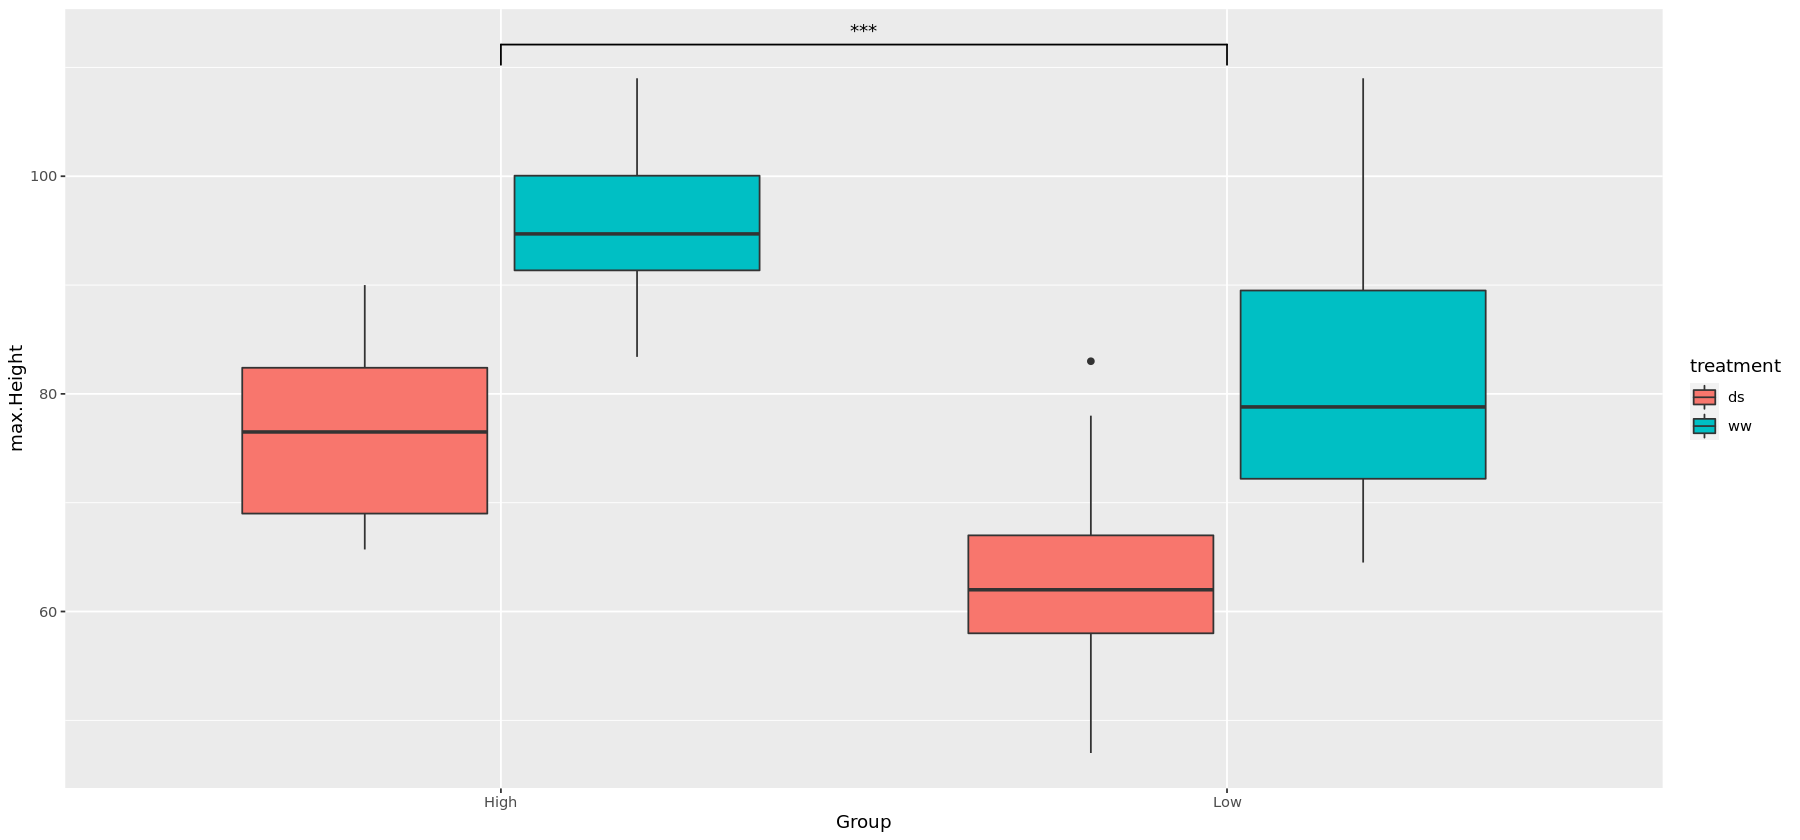

In [178]:
library(ggplot2)
library(ggsignif)


ggplot(final.data, aes(x=Group, y=max.Height, fill=treatment)) + 
  geom_boxplot() +
  geom_signif(comparisons = list(c("High", "Low")), 
              map_signif_level=TRUE)



In [179]:
boxplot(max.Height~Group, data=final.data)
boxplot(max.Height~Group*treatment, data=final.data)

In [180]:
s<- aov(max.Height~Group*treatment, data=final.data)
summary(s)
tukey<- TukeyHSD(s, conf.level=.95)
tukey
tukey.cld.Height.Gt<- multcompLetters4(s,tukey)
View(tukey.cld.Height.Gt)

                 Df Sum Sq Mean Sq F value   Pr(>F)    
Group             1   5254    5254  62.240 2.42e-12 ***
treatment         1   9600    9600 113.725  < 2e-16 ***
Group:treatment   1      0       0   0.003    0.959    
Residuals       110   9286      84                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = max.Height ~ Group * treatment, data = final.data)

$Group
              diff       lwr       upr p adj
Low-High -13.57986 -16.99112 -10.16861     0

$treatment
          diff      lwr      upr p adj
ww-ds 18.35358 14.94233 21.76483     0

$`Group:treatment`
                      diff        lwr       upr     p adj
Low:ds-High:ds  -13.820690 -20.115230 -7.526149 0.0000005
High:ww-High:ds  18.449681  12.039634 24.859727 0.0000000
Low:ww-High:ds    4.451724  -1.842817 10.746265 0.2580890
High:ww-Low:ds   32.270370  25.860324 38.680417 0.0000000
Low:ww-Low:ds    18.272414  11.977873 24.566954 0.0000000
Low:ww-High:ww  -13.997957 -20.408003 -7.587910 0.0000006


$Group
High  Low 
 "a"  "b" 

$treatment
 ww  ds 
"a" "b" 

$`Group:treatment`
High:ww  Low:ww High:ds  Low:ds 
    "a"     "b"     "b"     "c" 


In [181]:
MHeight_summary_Gt <- group_by(final.data, Group, treatment) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height)) %>%
          arrange(desc(mean))
         View(MHeight_summary_Gt)

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.


Group treatment mean     sd       
1 High  ww        95.07037  6.587798
2 Low   ww        81.07241 12.195869
3 High  ds        76.62069  7.837974
4 Low   ds        62.80000  9.009400

In [182]:

cld.MHeight_Gt <- as.data.frame.list(tukey.cld.Height.Gt$`Group:treatment`)
MHeight_summary_Gt$tukey <-cld.MHeight_Gt $Letters
write.table(MHeight_summary_Gt, "MHeight.Gt.summary.August.csv")
View(MHeight_summary_Gt)

Group treatment mean     sd        tukey
1 High  ww        95.07037  6.587798 a    
2 Low   ww        81.07241 12.195869 b    
3 High  ds        76.62069  7.837974 b    
4 Low   ds        62.80000  9.009400 c

In [31]:
Height.Gt<- read.table("MHeight.Gt.summary.August.csv")
View(Height.Gt)

Group treatment mean     sd        tukey
1 High  ww        95.07037  6.587798 a    
2 Low   ww        81.07241 12.195869 b    
3 High  ds        76.62069  7.837974 b    
4 Low   ds        62.80000  9.009400 c

In [33]:
options(repr.plot.width=10, repr.plot.height=10)
       Height.Gt$Group<- as.factor(Height.Gt$Group)

Height_Gt<- ggplot(Height.Gt, aes(x=Group, y=mean, fill=treatment))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-4, hjust=-4, size=5, colour="black")+
labs(x="Groups", y="Max.Heigh [cm]")+
scale_fill_manual(values=c("tomato2","royalblue3"))+
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 18))+
scale_fill_manual(values=c("turquoise4","pink3"))+
theme(axis.text.x = element_text(colour=c("black","black")))+
geom_text(aes(label=round(mean,2), y = 10), position = position_dodge(0.90), colour="black", size= 5)


Height_Gt

ggsave("max.height.Int.G.png", plot = Height_Gt, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [185]:
options(repr.plot.width=10, repr.plot.height=10)
       Height.Gt$Group<- as.factor(Height.Gt$Group)

Height_Gt1<- ggplot(Height.Gt, aes(x=treatment, y=mean, fill=Group))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-2.5, hjust=-3, size=5, colour="black")+
labs(x="treatments", y="Max.Heigh [cm]")+
scale_fill_manual(values=c("turquoise4","pink3"))+

theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 18))+
geom_text(aes(label=round(mean,2), y = 10), position = position_dodge(0.90), colour="black", size= 5)

Height_Gt1

ggsave("max.Height.Int.Trts.png", plot = Height_Gt1, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")

# Number of the  Shoots

In [186]:
View(final.data)

Unit experiment IDs  treatment BBCH  Collection.date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  145  V22001     2267 ds        92    08/12/22         82.4       8.63  
15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
21  156  V22001     2267 ww        92    08/18/22        103.5      18.56  
22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
85  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
86  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
87  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
88  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
89  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
90  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
91  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
92  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
93  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
94  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
95  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
96  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
97  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
98  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
99  290  V22001     2267 ww        92    08/30/22         85.5      13.50  
100 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
101 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
102 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
103 296  V22001     2218 ww        92    08/12/22         95.4      16.54  
104 298  V22001     2156 ww        92    08/12/22        104.5      21.83  
105 300  V22001     2095 ds        92    08/08/22   

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


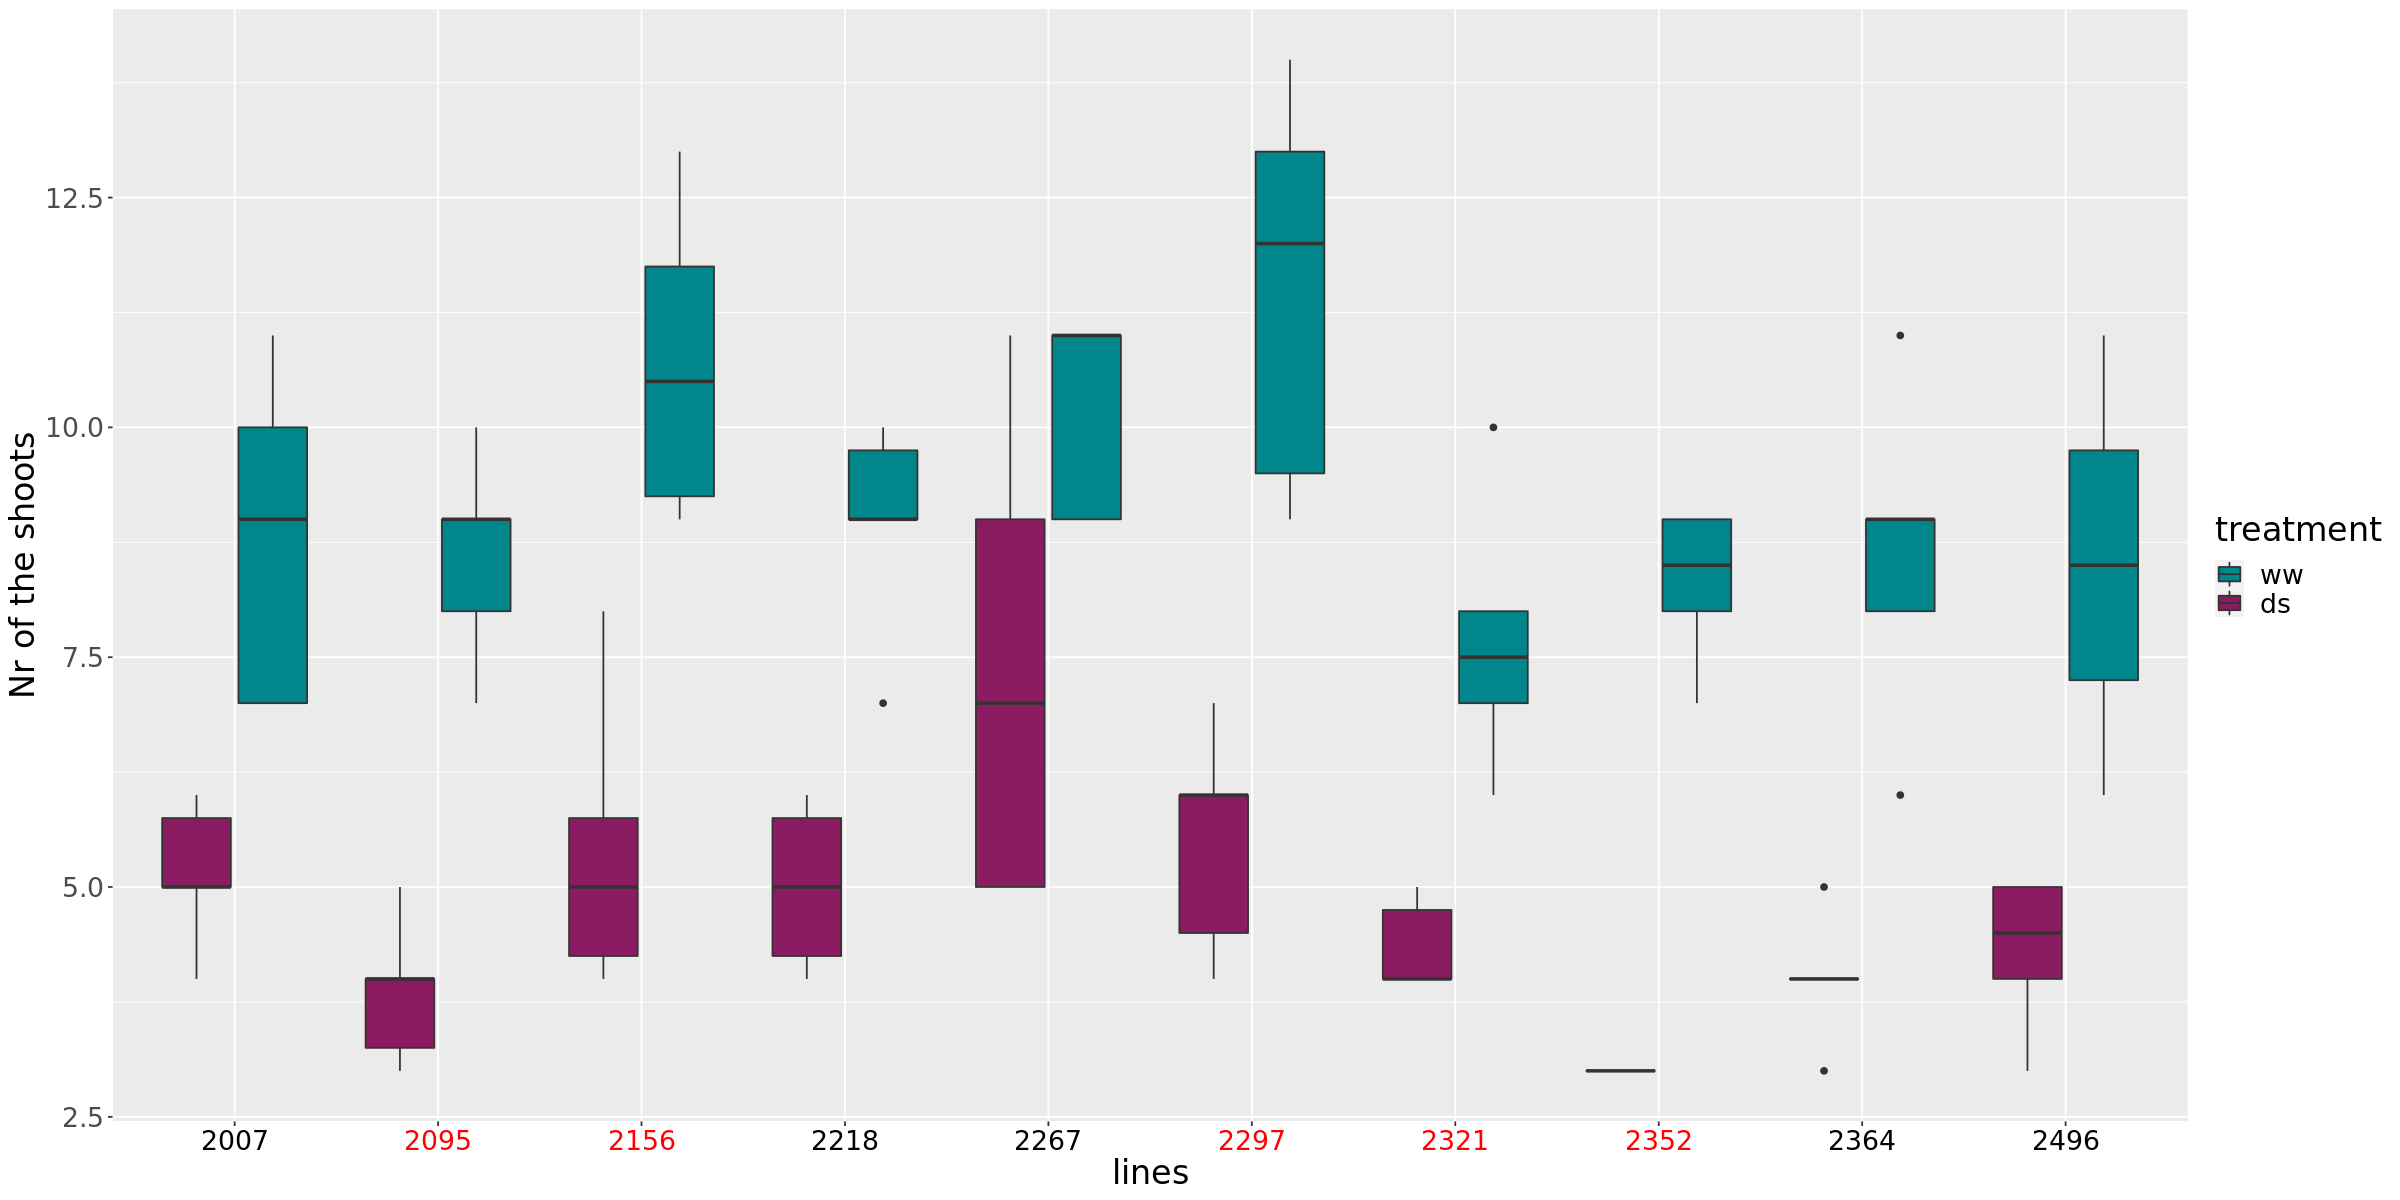

In [187]:
options(repr.plot.width=20, repr.plot.height=10)

ps <- ggplot(final.data, aes(x=IDs, y=Shoots,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
        scale_fill_manual(breaks =final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Nr of the shoots", x="lines")+

theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))

    print(ps)

#fpf<- ps+theme_bw()
#fpf
#ggsave("Nr.shoots-boxplot.png", plot = ps, width = 15, height = 10,
      #path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/all shoots")

In [188]:
Shoots_AN <- aov(Shoots~ treatment*IDs, data=final.data)
summary(Shoots_AN )

Shoots_AN_G <- aov(Shoots~ treatment*Group, data=final.data)
summary(Shoots_AN_G)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  556.8   556.8 305.400  < 2e-16 ***
IDs            9  118.4    13.2   7.214 6.67e-08 ***
treatment:IDs  9   25.2     2.8   1.536    0.147    
Residuals     94  171.4     1.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1  556.8   556.8 199.692 <2e-16 ***
Group             1    0.6     0.6   0.222  0.639    
treatment:Group   1    7.6     7.6   2.732  0.101    
Residuals       110  306.7     2.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [189]:
tukey<- TukeyHSD(Shoots_AN, conf.level=.95)
tukey.cld.shoots<- multcompLetters4(Shoots_AN, tukey)
tukey.cld.shoots


LSD_Test<- print(LSD.test(Shoots_AN_G, c("treatment","Group")))

$treatment
 ww  ds 
"a" "b" 

$IDs
 2267  2297  2156  2218  2007  2496  2364  2095  2321  2352 
  "a"   "a"  "ab" "abc" "abc"  "bc"  "bc"  "bc"   "c"   "c" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2267 ww:2218 ww:2007 ww:2095 ww:2364 ww:2496 ww:2352 ww:2321 
    "a"    "ab"   "abc"   "abc"   "abc"   "abc"   "abc"    "bc"   "bcd"   "cde" 
ds:2267 ds:2297 ds:2156 ds:2007 ds:2218 ds:2321 ds:2496 ds:2364 ds:2095 ds:2352 
  "cde"   "def"    "ef"    "ef"    "ef"     "f"     "f"     "f"     "f"     "f" 


$statistics
   MSerror  Df     Mean       CV
  2.788088 110 6.947368 24.03438

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none treatment:Group   4  0.05

$means
          Shoots      std  r      LCL      UCL Min Max Q25 Q50 Q75
ds:High 5.103448 1.654967 29 4.488970 5.717926   3  11   4   5   5
ds:Low  4.448276 1.297971 29 3.833798 5.062754   3   8   4   4   5
ww:High 9.000000 1.568929 27 8.363170 9.636830   6  11   8   9  10
ww:Low  9.379310 2.060059 29 8.764832 9.993788   6  14   8   9  10

$comparison
NULL

$groups
          Shoots groups
ww:Low  9.379310      a
ww:High 9.000000      a
ds:High 5.103448      b
ds:Low  4.448276      b

attr(,"class")
[1] "group"


In [190]:
summary_shoots<- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots)

summary_shoots_t<- group_by(final.data, treatment) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_t)

summary_shoots_l<- group_by(final.data, IDs) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_l)


summary_shoots_G<- group_by(final.data, Group) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_G)

summary_shoots_Gt<- group_by(final.data, treatment, Group) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_Gt)

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd       
1  ww        2297 11.500000 2.1679483
2  ww        2156 10.666667 1.6329932
3  ww        2267 10.200000 1.0954451
4  ww        2218  9.000000 1.0954451
5  ww        2007  8.800000 1.7888544
6  ww        2095  8.600000 1.1401754
7  ww        2364  8.600000 1.8165902
8  ww        2496  8.500000 1.8708287
9  ww        2352  8.333333 0.8164966
10 ww        2321  7.666667 1.3662601
11 ds        2267  7.400000 2.6076810
12 ds        2297  5.500000 1.2247449
13 ds        2156  5.333333 1.5055453
14 ds        2007  5.166667 0.7527727
15 ds        2218  5.000000 0.8944272
16 ds        2321  4.333333 0.5163978
17 ds        2496  4.333333 0.8164966
18 ds        2364  4.000000 0.6324555
19 ds        2095  3.833333 0.7527727
20 ds        2352  3.000000 0.0000000

treatment mean     sd      
1 ww        9.196429 1.833225
2 ds        4.775862 1.510700

IDs  mean     sd      
1  2267 8.800000 2.394438
2  2297 8.500000 3.554766
3  2156 8.000000 3.162278
4  2218 7.000000 2.296242
5  2007 6.818182 2.272364
6  2496 6.416667 2.574643
7  2364 6.090909 2.700168
8  2095 6.000000 2.645751
9  2321 6.000000 2.000000
10 2352 5.909091 2.844452

Group mean     sd      
1 High  6.982143 2.533349
2 Low   6.913793 3.016240

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment Group mean     sd      
1 ww        Low   9.379310 2.060059
2 ww        High  9.000000 1.568929
3 ds        High  5.103448 1.654967
4 ds        Low   4.448276 1.297971

In [191]:
cld_shoots_t <- as.data.frame.list(tukey.cld.shoots$`treatment`)
summary_shoots_t$tukey <-cld_shoots_t $Letters
write.table(summary_shoots_t, "summary_shoots_t.August.csv")
View(summary_shoots_t)

cld_shoots_l <- as.data.frame.list(tukey.cld.shoots$`IDs`)
summary_shoots_l$tukey <-cld_shoots_l $Letters
write.table(summary_shoots_l, "summary_shoots_l.August.csv")
View(summary_shoots_l)

treatment mean     sd       tukey
1 ww        9.196429 1.833225 a    
2 ds        4.775862 1.510700 b

IDs  mean     sd       tukey
1  2267 8.800000 2.394438 a    
2  2297 8.500000 3.554766 a    
3  2156 8.000000 3.162278 ab   
4  2218 7.000000 2.296242 abc  
5  2007 6.818182 2.272364 abc  
6  2496 6.416667 2.574643 bc   
7  2364 6.090909 2.700168 bc   
8  2095 6.000000 2.645751 bc   
9  2321 6.000000 2.000000 c    
10 2352 5.909091 2.844452 c

In [37]:
shoots_t<- read.table("summary_shoots_t.August.csv")
shoots_l<- read.table("summary_shoots_l.August.csv")
str(shoots_l)

'data.frame':	10 obs. of  4 variables:
 $ IDs  : int  2267 2297 2156 2218 2007 2496 2364 2095 2321 2352
 $ mean : num  8.8 8.5 8 7 6.82 ...
 $ sd   : num  2.39 3.55 3.16 2.3 2.27 ...
 $ tukey: chr  "a" "a" "ab" "abc" ...


In [63]:
shoots_l$IDs<- as.factor(shoots_l$IDs)
options(repr.plot.width=15,  repr.plot.height=10)
shootsl<- ggplot(data=shoots_l, aes(x =IDs, y = mean, fill=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the shoots") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position ="top")+
theme(text = element_text(size = 20))  +
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5.5)
print(shootsl)
options(repr.plot.width=24, repr.plot.height=10)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [58]:
shoots_t$treatment<- as.factor(shoots_t$treatment)
options(repr.plot.width=10,  repr.plot.height=7)
shoots<- ggplot(data=shoots_t, aes(x =treatment, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge", alpha=0.5 ) +
  #geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 5, colour = "black") +
    #geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Treatments", y="Number of the shoots") +
   theme_bw() +
ylim(0,10)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  #theme(legend.position = c(0.08, 0.90))+
theme(legend.position = "top") +
scale_fill_manual(values=c("red","darkgreen"))+
theme(text = element_text(size = 20))  +

geom_segment(x=1, y=9.5, xend=2, yend=9.5)+
theme(axis.text.x = element_text(colour=c("black","black")))+

geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)+

geom_text(x=1.5, y=10, label="< 2e-16 ***", size=5)

print(shoots)






Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


# Number of the ears



Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


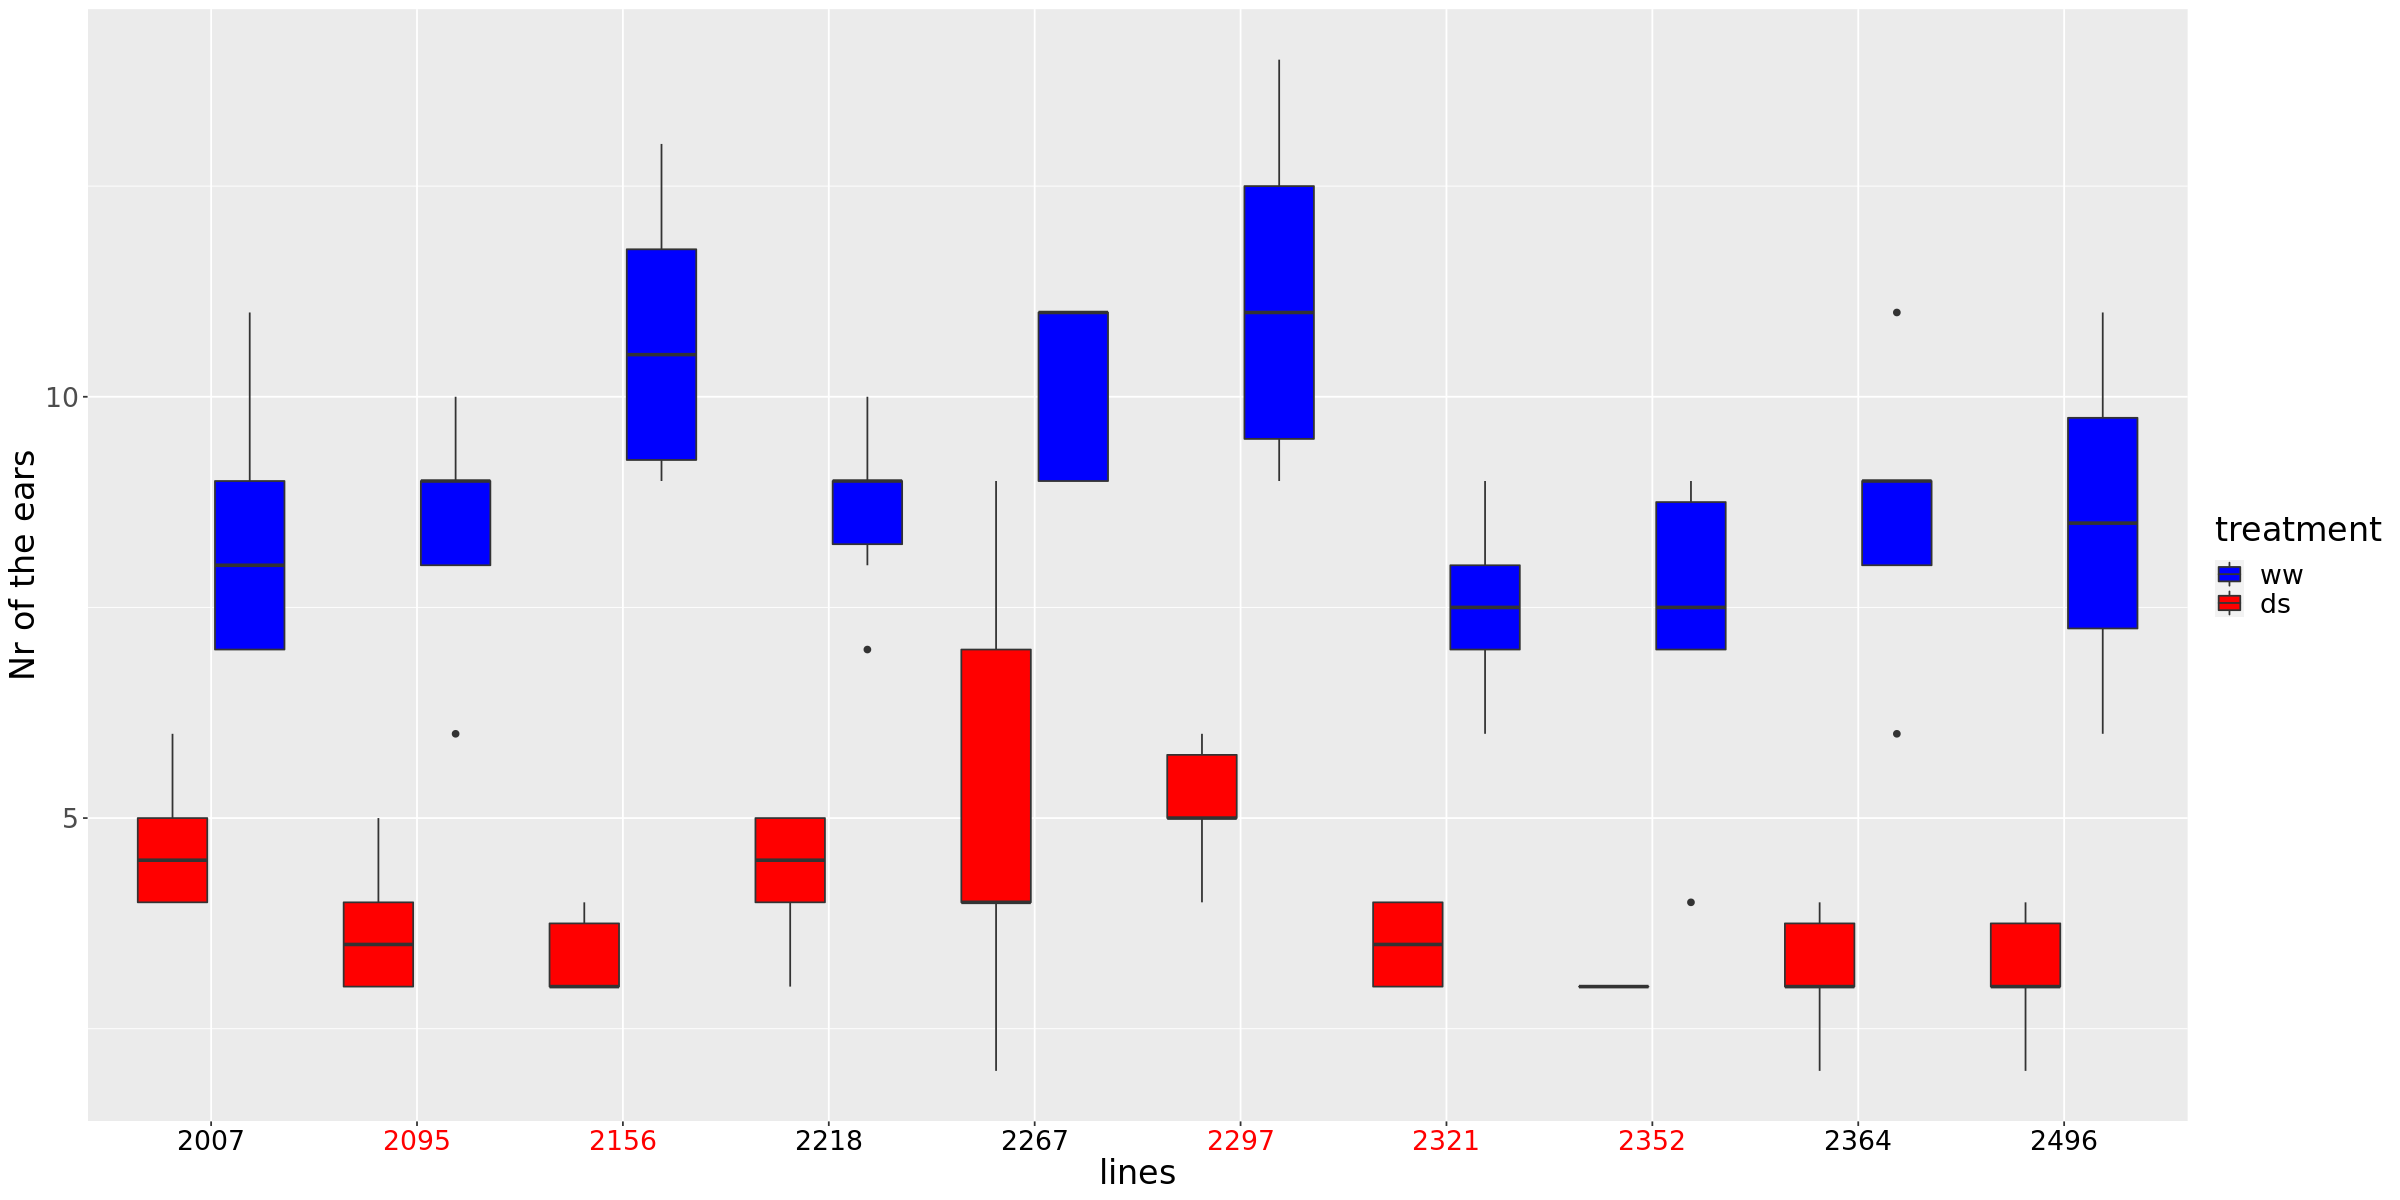

In [195]:
options(repr.plot.width=20, repr.plot.height=10)
p <- ggplot(final.data, aes(x=IDs, y=Nr_ears,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="Nr of the ears", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))



    print(p)

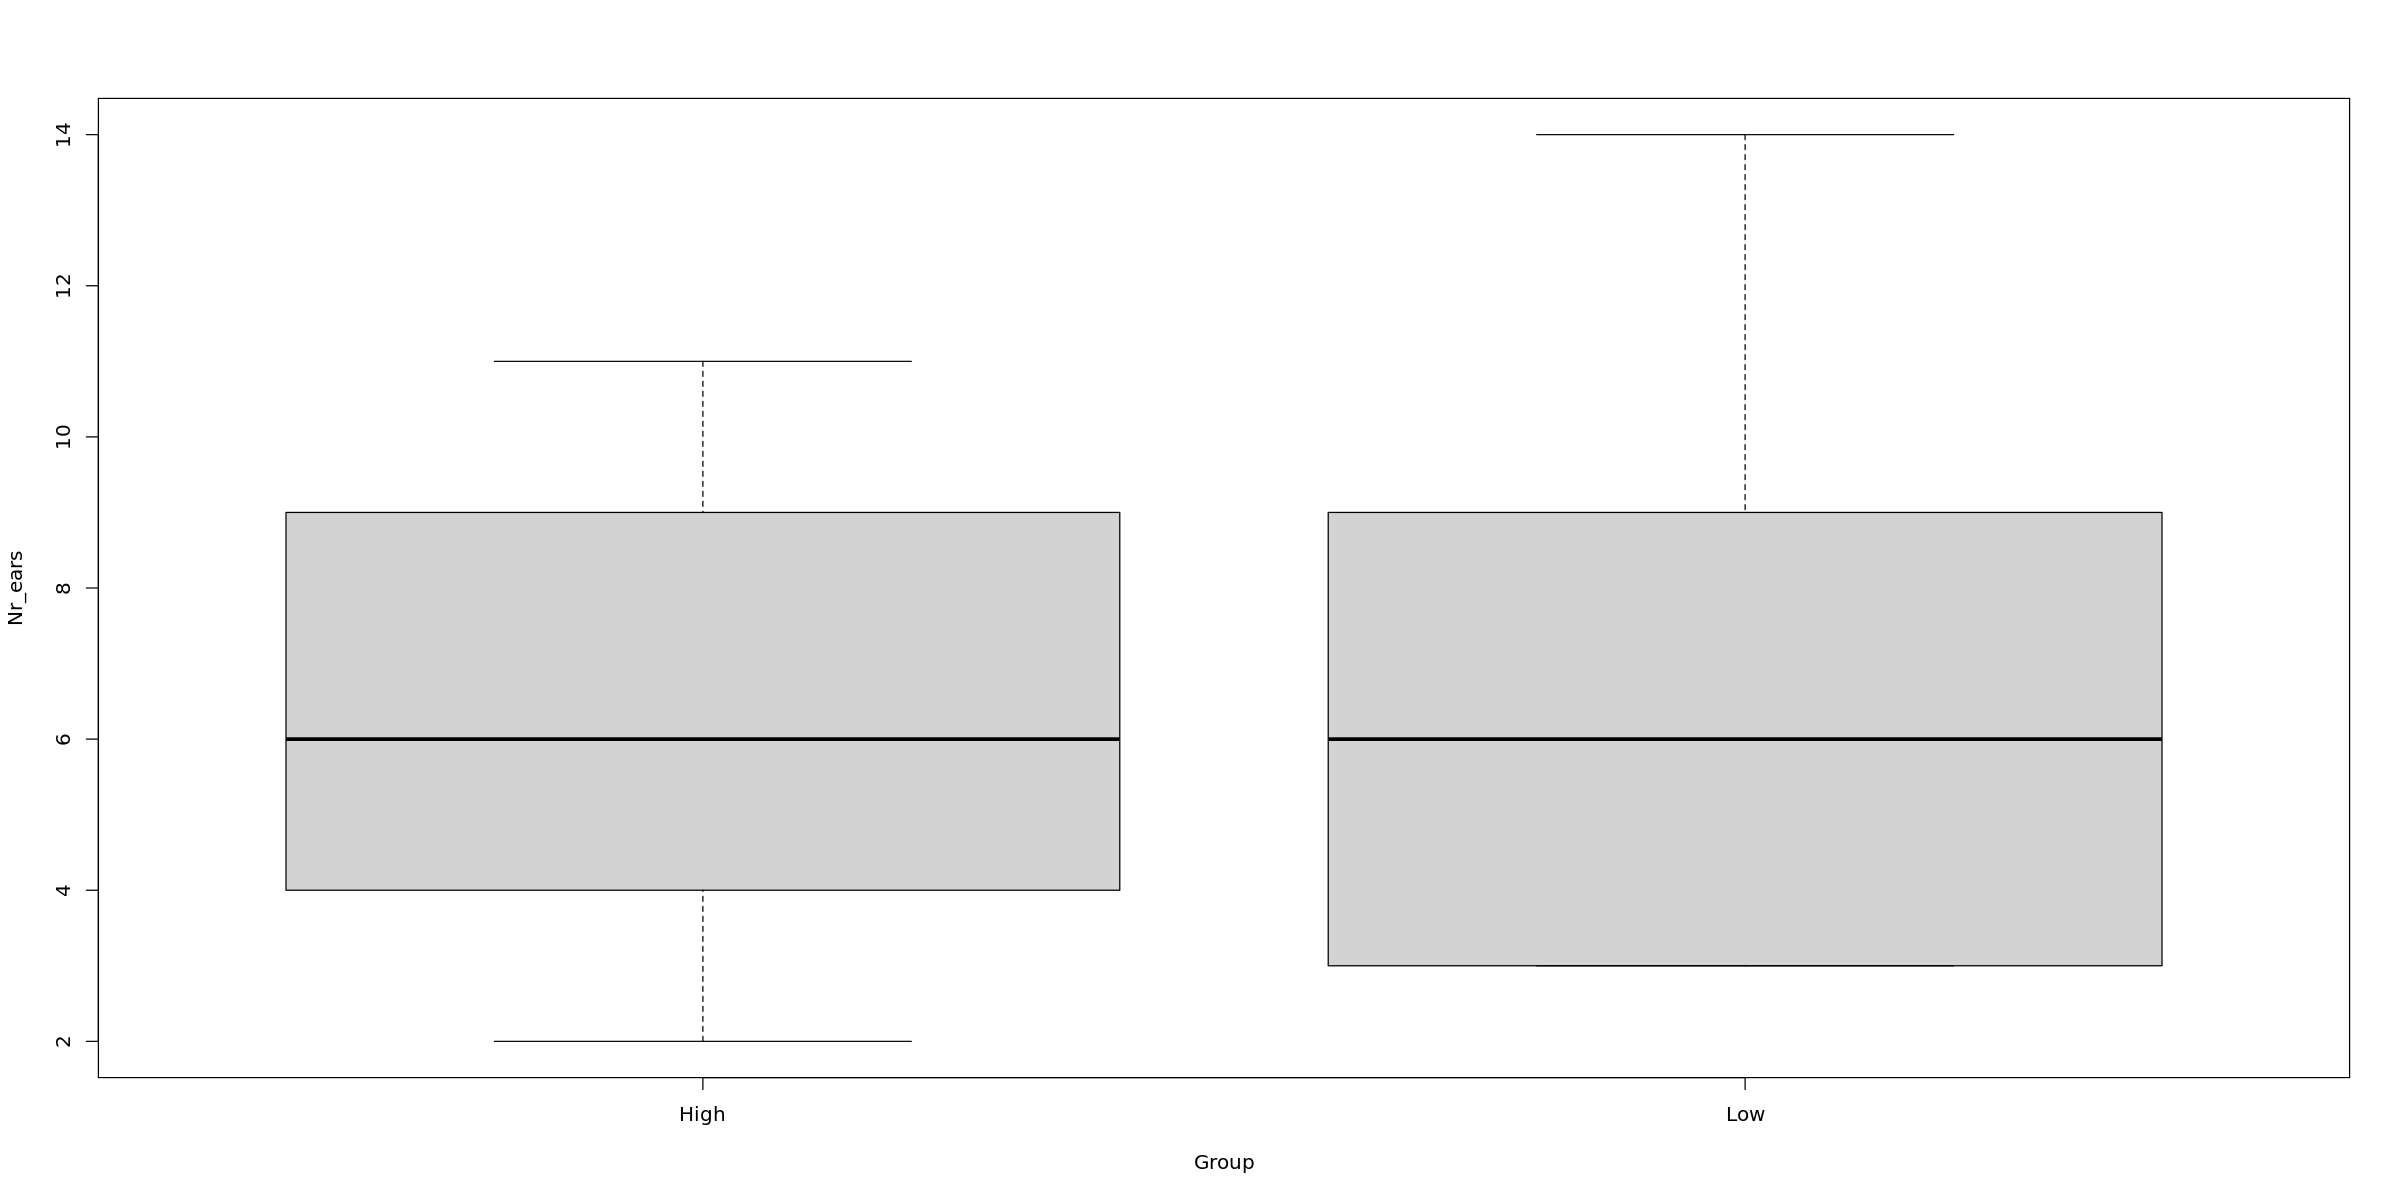

In [196]:
boxplot(Nr_ears~Group, data=final.data)

In [197]:
ears_AN<- aov(Nr_ears~treatment*IDs, data=final.data)
summary(ears_AN)

ears_AN_G<- aov(Nr_ears~treatment*Group, data=final.data)
summary(ears_AN_G)

#mood.medtest(Nr_ears~treatment , data = final.data, exact = NULL)

              Df Sum Sq Mean Sq F value  Pr(>F)    
treatment      1  721.6   721.6 398.149 < 2e-16 ***
IDs            9   94.8    10.5   5.812 2.1e-06 ***
treatment:IDs  9   30.2     3.4   1.854  0.0686 .  
Residuals     94  170.4     1.8                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1  721.6   721.6 270.408 <2e-16 ***
Group             1    0.1     0.1   0.050  0.824    
treatment:Group   1    1.7     1.7   0.648  0.422    
Residuals       110  293.5     2.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [198]:
tukey.e<- TukeyHSD(ears_AN, conf.levels=.95)
tukey.cld.ear<- multcompLetters4(ears_AN, tukey.e)
tukey.cld.ear

$treatment
 ww  ds 
"a" "b" 

$IDs
  2297   2267   2156   2218   2007   2496   2095   2364   2321   2352 
   "a"   "ab"  "abc" "abcd" "abcd"  "bcd"  "bcd"  "bcd"   "cd"    "d" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2267 ww:2218 ww:2364 ww:2496 ww:2007 ww:2095 ww:2321 ww:2352 
    "a"     "a"    "ab"    "ab"    "ab"    "ab"    "ab"    "ab"    "bc"    "bc" 
ds:2267 ds:2297 ds:2007 ds:2218 ds:2095 ds:2321 ds:2156 ds:2364 ds:2496 ds:2352 
   "cd"    "cd"    "cd"     "d"     "d"     "d"     "d"     "d"     "d"     "d" 


In [199]:
tukey.e<- TukeyHSD(ears_AN_G, conf.levels=.95)
tukey.cld.G<- multcompLetters4(ears_AN_G, tukey.e)
tukey.cld.G

#LSD_Test<- print(LSD.test(ears_AN_G, c("treatment","Group")))

$treatment
 ww  ds 
"a" "b" 

$Group
$Group$Letters
 Low High 
 "a"  "a" 

$Group$LetterMatrix
        a
Low  TRUE
High TRUE


$`treatment:Group`
 ww:Low ww:High ds:High  ds:Low 
    "a"     "a"     "b"     "b" 


In [200]:
summary_ears<- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Nr_ears), sd=sd(Nr_ears)) %>%
arrange(desc(mean))
View(summary_ears)

cld.ears<- as.data.frame.list(tukey.cld.ear$`treatment:IDs`)
summary_ears$tukey<- cld.ears$ Letters
write.table(summary_ears, "summary_ears_Agugust.csv")
View(summary_ears)



summary_ears_Gt<- group_by(final.data, treatment, Group) %>%
summarise(mean=mean(Nr_ears), sd=sd(Nr_ears)) %>%
arrange(desc(mean))
View(summary_ears_Gt)

cld.ears.Gt<- as.data.frame.list(tukey.cld.G$`treatment:Group`)
summary_ears_Gt$tukey<- cld.ears.Gt$ Letters
write.table(summary_ears_Gt, "summary_ears_Gt_Agugust.csv")
View(summary_ears_Gt)

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd       
1  ww        2297 11.166667 2.0412415
2  ww        2156 10.666667 1.6329932
3  ww        2267 10.200000 1.0954451
4  ww        2218  8.666667 1.0327956
5  ww        2364  8.600000 1.8165902
6  ww        2496  8.500000 1.8708287
7  ww        2007  8.400000 1.6733201
8  ww        2095  8.400000 1.5165751
9  ww        2321  7.500000 1.0488088
10 ww        2352  7.333333 1.8618987
11 ds        2267  5.200000 2.7748874
12 ds        2297  5.166667 0.7527727
13 ds        2007  4.666667 0.8164966
14 ds        2218  4.333333 0.8164966
15 ds        2095  3.666667 0.8164966
16 ds        2321  3.500000 0.5477226
17 ds        2156  3.333333 0.5163978
18 ds        2364  3.166667 0.7527727
19 ds        2496  3.166667 0.7527727
20 ds        2352  3.000000 0.0000000

treatment IDs  mean      sd        tukey
1  ww        2297 11.166667 2.0412415 a    
2  ww        2156 10.666667 1.6329932 a    
3  ww        2267 10.200000 1.0954451 ab   
4  ww        2218  8.666667 1.0327956 ab   
5  ww        2364  8.600000 1.8165902 ab   
6  ww        2496  8.500000 1.8708287 ab   
7  ww        2007  8.400000 1.6733201 ab   
8  ww        2095  8.400000 1.5165751 ab   
9  ww        2321  7.500000 1.0488088 bc   
10 ww        2352  7.333333 1.8618987 bc   
11 ds        2267  5.200000 2.7748874 cd   
12 ds        2297  5.166667 0.7527727 cd   
13 ds        2007  4.666667 0.8164966 cd   
14 ds        2218  4.333333 0.8164966 d    
15 ds        2095  3.666667 0.8164966 d    
16 ds        2321  3.500000 0.5477226 d    
17 ds        2156  3.333333 0.5163978 d    
18 ds        2364  3.166667 0.7527727 d    
19 ds        2496  3.166667 0.7527727 d    
20 ds        2352  3.000000 0.0000000 d

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment Group mean     sd       
1 ww        Low   9.034483 2.2596264
2 ww        High  8.851852 1.5616486
3 ds        High  4.068966 1.4863915
4 ds        Low   3.758621 0.9507581

treatment Group mean     sd        tukey
1 ww        Low   9.034483 2.2596264 a    
2 ww        High  8.851852 1.5616486 a    
3 ds        High  4.068966 1.4863915 b    
4 ds        Low   3.758621 0.9507581 b

In [201]:
summary_ears_t<- group_by(final.data, treatment) %>%
summarise(mean=mean(Nr_ears), sd=sd(Nr_ears)) %>%
arrange(desc(mean))
View(summary_ears_t)

cld.ears.t<- as.data.frame.list(tukey.cld.ear$`treatment`)
summary_ears_t$tukey<- cld.ears.t$ Letters
write.table(summary_ears_t, "summary_ears_t_Agugust.csv")
View(summary_ears_t)

summary_ears_Id<- group_by(final.data,IDs) %>%
summarise(mean=mean(Nr_ears), sd=sd(Nr_ears)) %>%
arrange(desc(mean))
View(summary_ears_t)

cld.ears.Id<- as.data.frame.list(tukey.cld.ear$`IDs`)
summary_ears_Id$tukey<- cld.ears.Id$ Letters
write.table(summary_ears_Id, "summary_ears_Id_Agugust.csv")
View(summary_ears_Id)

treatment mean     sd      
1 ww        8.946429 1.939256
2 ds        3.913793 1.246532

treatment mean     sd       tukey
1 ww        8.946429 1.939256 a    
2 ds        3.913793 1.246532 b

treatment mean     sd       tukey
1 ww        8.946429 1.939256 a    
2 ds        3.913793 1.246532 b

IDs  mean     sd       tukey
1  2297 8.166667 3.459725 a    
2  2267 7.700000 3.301515 ab   
3  2156 7.000000 4.000000 abc  
4  2218 6.500000 2.430862 abcd 
5  2007 6.363636 2.292280 abcd 
6  2496 5.833333 3.099365 bcd  
7  2095 5.818182 2.713602 bcd  
8  2364 5.636364 3.107176 bcd  
9  2321 5.500000 2.236068 cd   
10 2352 5.363636 2.618119 d

In [45]:
summary_nr_ears_t<- read.table("summary_ears_t_Agugust.csv")
summary_nr_ears_Id<- read.table("summary_ears_Id_Agugust.csv")
summary_nr_ears_t$treatment<- as.factor(summary_nr_ears_t$treatment)
summary_nr_ears_Id$IDs<- as.factor(summary_nr_ears_Id$IDs)

In [64]:
options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=summary_nr_ears_Id, aes(x =IDs, y = mean, fill=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the ears") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5.5)
print(ears)



Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


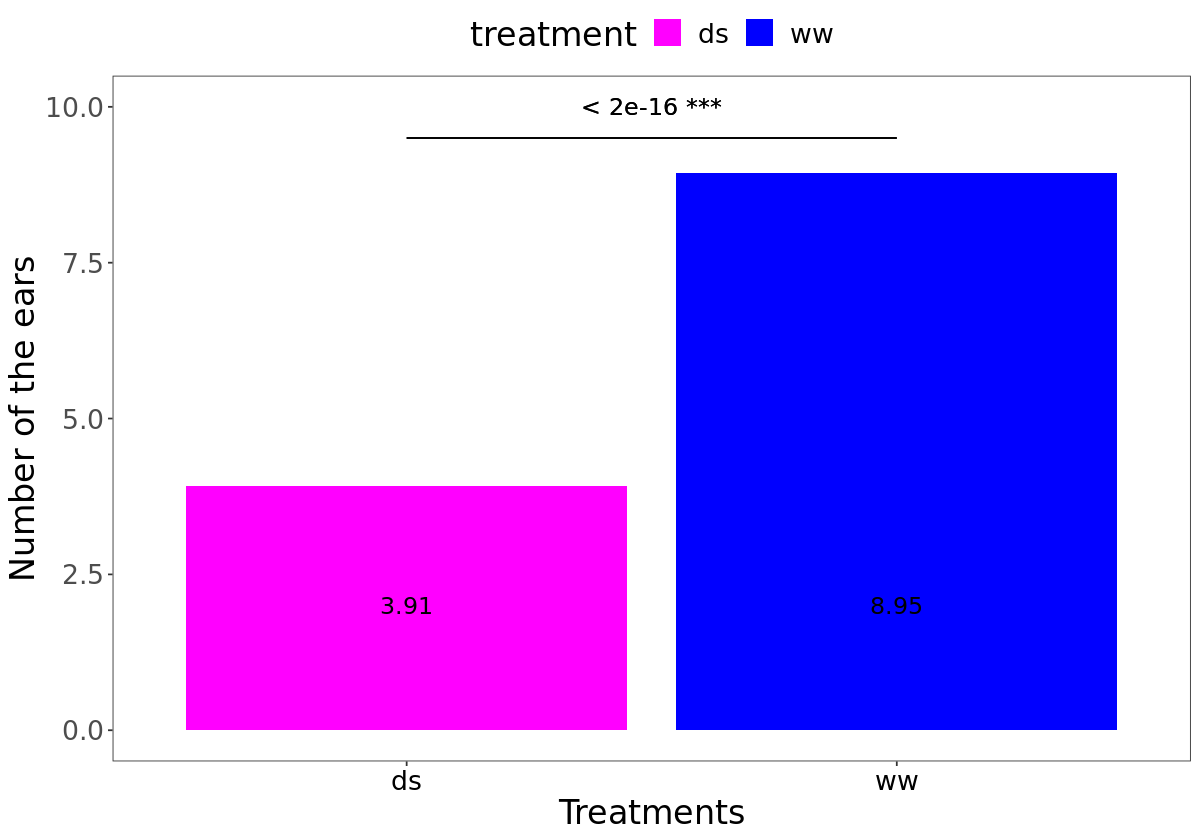

In [57]:
options(repr.plot.width=10,  repr.plot.height=7)
ears1<- ggplot(data=summary_nr_ears_t, aes(x =treatment, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  #geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
   # geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Treatments", y="Number of the ears") +
   theme_bw() +
ylim(0,10)+
#theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 20))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)+

geom_segment(x=1, y=9.5, xend=2, yend=9.5,color="black")+


theme(axis.text.x = element_text(colour=c("black","black")))+
scale_fill_manual(values=c("magenta","blue"))+
geom_text(x=1.5, y=10, label="< 2e-16 ***", size=5,color="black")

print(ears1)




In [205]:
summary_nr_ears<- read.table("summary_ears_Agugust.csv")
summary_nr_ears$IDs<- as.factor(summary_nr_ears$IDs)
summary_nr_ears$treatment<- as.factor(summary_nr_ears$treatment)

In [206]:
summary_nr_ears_Gt<- read.table("summary_ears_Gt_Agugust.csv")
summary_nr_ears_Gt$Group<- as.factor(summary_nr_ears_Gt$Group)
summary_nr_ears_Gt$treatment<- as.factor(summary_nr_ears_Gt$treatment)
str(summary_nr_ears_Gt)

'data.frame':	4 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 1 1
 $ Group    : Factor w/ 2 levels "High","Low": 2 1 1 2
 $ mean     : num  9.03 8.85 4.07 3.76
 $ sd       : num  2.26 1.562 1.486 0.951
 $ tukey    : chr  "a" "a" "b" "b"


In [207]:
str(summary_nr_ears)

'data.frame':	20 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 2 ...
 $ IDs      : Factor w/ 10 levels "2007","2095",..: 6 3 5 4 9 10 1 2 7 8 ...
 $ mean     : num  11.17 10.67 10.2 8.67 8.6 ...
 $ sd       : num  2.04 1.63 1.1 1.03 1.82 ...
 $ tukey    : chr  "a" "a" "ab" "ab" ...


In [208]:

options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=summary_nr_ears, aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the ears") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)
print(ears)





Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [209]:
options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=summary_nr_ears, aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the ears") +
   theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)
print(ears)


NULL


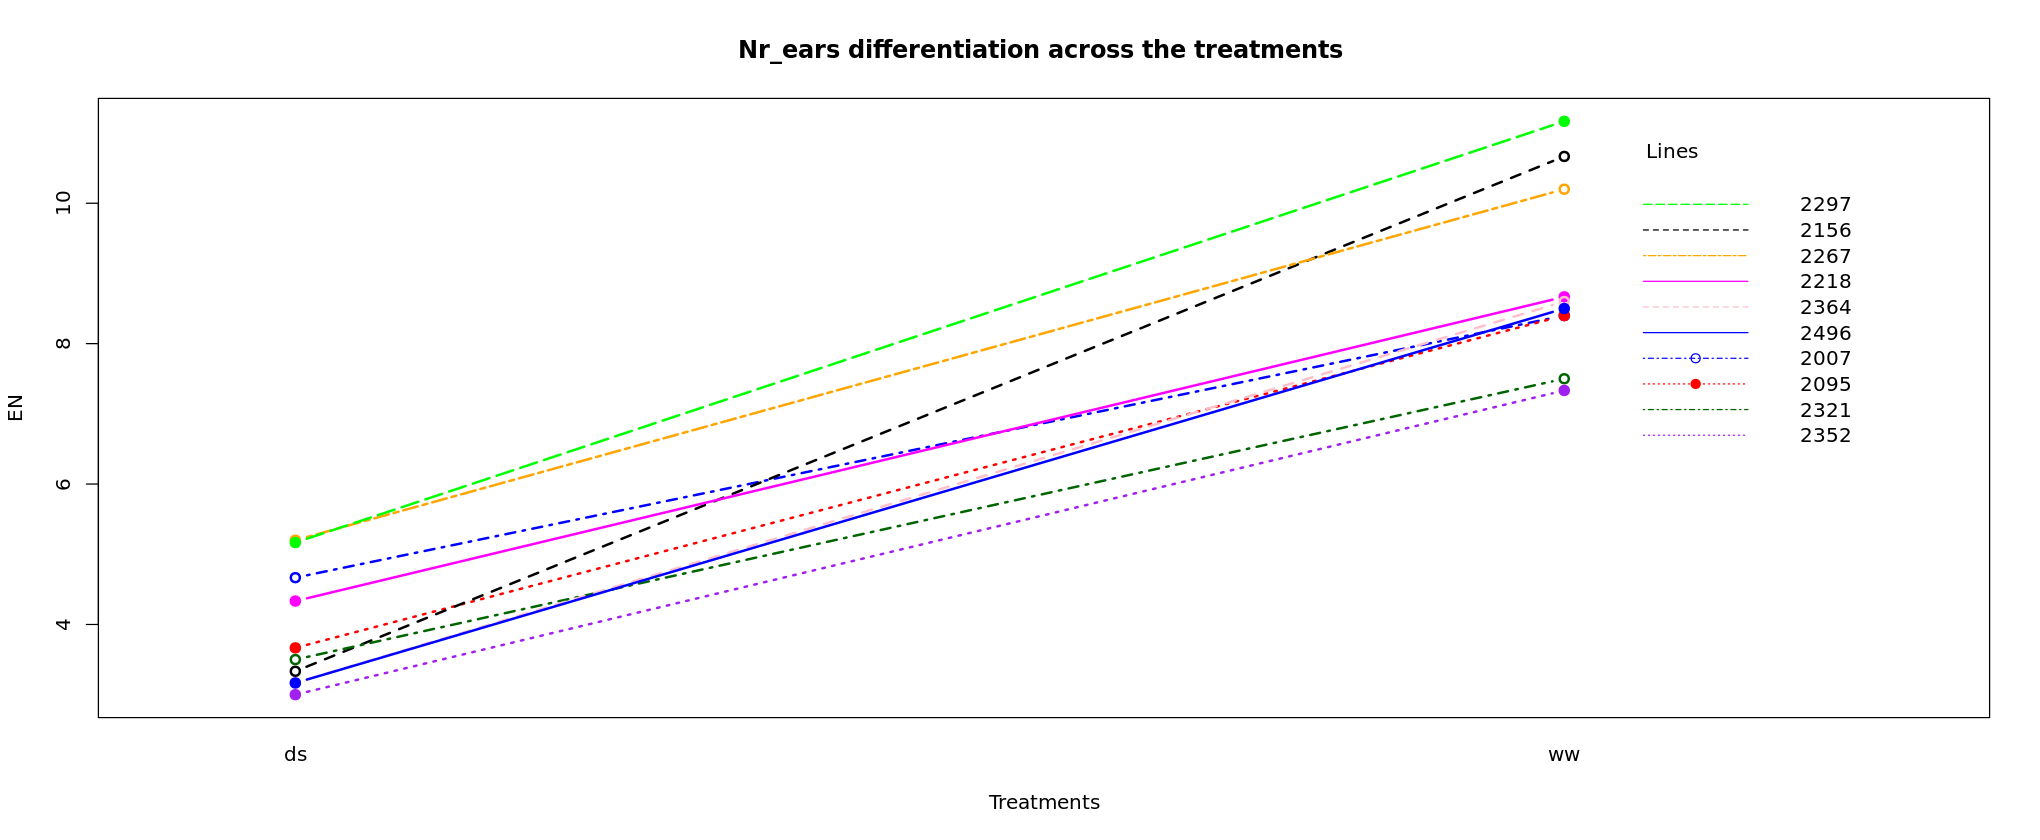

In [210]:

options(repr.plot.width=17, repr.plot.height=7)
earsw_differentiation<- interaction.plot(x.factor = final.data$treatment, trace.factor = final.data$IDs, 
                 response =  final.data$Nr_ears, fun = mean, 
                 type = "b", legend = TRUE, main="Nr_ears differentiation across the treatments ",
                 xlab = "Treatments", ylab="EN", trace.label = "Lines",
                 pch=c(1,19), col = c("blue", "red", "black","magenta", "orange","green",
                                      "dark green", "purple", "pink"),lwd=2) 
print(earsw_differentiation)



In [211]:
interactions<- interaction.plot(x.factor = final.data$treatment ,trace.factor = final.data$Group, 
                 response = final.data$Nr_ears, fun = mean, 
                 type = "l", legend = TRUE, main="ears weight differentiation across all lines",
                 xlab = "Lines", ylab="EN", trace.label = "Treatments",
                 pch=c(1,19), col = c("darkgreen", "red"), lwd=2)
                 
options(repr.plot.width=13, repr.plot.height=7)
print(interactions)

NULL


In [212]:
#options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=summary_nr_ears_Gt, aes(x =treatment, y = mean, fill=Group, colour=Group)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the ears") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)
print(ears)

In [213]:
boxplot(Nr_ears~Group, data=final.data)

# weight of the ears

In [214]:
str(final.data)

'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

In [51]:
weight_ear_AN<- aov(Weight_ear~treatment*IDs, data=final.data)
summary(weight_ear_AN)


weight_ear_AN_G<- aov(Weight_ear~treatment*Group, data=final.data)
summary(weight_ear_AN_G)
#mood.medtest(Weight_ear~Group, data=final.data, exact=TRUE)
#mood.medtest(Weight_ear~Group,
            # data  = final.data,
             #exact = FALSE)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 1715.5  1715.5 908.562  < 2e-16 ***
IDs            9  115.8    12.9   6.814 1.75e-07 ***
treatment:IDs  9   54.4     6.0   3.201  0.00201 ** 
Residuals     94  177.5     1.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1 1715.5  1715.5 549.578 <2e-16 ***
Group             1    0.1     0.1   0.017  0.896    
treatment:Group   1    4.3     4.3   1.369  0.244    
Residuals       110  343.4     3.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [52]:
tukey.we<- TukeyHSD(weight_ear_AN, conf.levels=.95)
tukey.cld.ear<- multcompLetters4(weight_ear_AN, tukey.we)
tukey.cld.ear



tukey.we.G <- TukeyHSD(weight_ear_AN_G, conf.levels=.95)
tukey.cld.ear.G <- multcompLetters4(weight_ear_AN_G, tukey.we.G)
tukey.cld.ear.G



LSD_Test<- print(LSD.test(weight_ear_AN_G, c("treatment","Group")))

$treatment
 ww  ds 
"a" "b" 

$IDs
  2297   2218   2321   2364   2095   2007   2496   2352   2156   2267 
   "a"   "ab"  "abc"   "ab" "abcd" "abcd" "bcde"  "cde"   "de"    "e" 

$`treatment:IDs`
ww:2364 ww:2297 ww:2218 ww:2095 ww:2321 ww:2007 ww:2496 ww:2156 ww:2267 ww:2352 
    "a"     "a"    "ab"   "abc"   "abc"   "abc"    "bc"    "bc"    "bc"     "c" 
ds:2321 ds:2218 ds:2007 ds:2095 ds:2297 ds:2352 ds:2496 ds:2364 ds:2156 ds:2267 
    "d"     "d"     "d"     "d"     "d"     "d"     "d"     "d"     "d"     "d" 


$treatment
 ww  ds 
"a" "b" 

$Group
$Group$Letters
 Low High 
 "a"  "a" 

$Group$LetterMatrix
        a
Low  TRUE
High TRUE


$`treatment:Group`
ww:High  ww:Low  ds:Low ds:High 
    "a"     "a"     "b"     "b" 


$statistics
  MSerror  Df     Mean       CV
  3.12151 110 6.946579 25.43381

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none treatment:Group   4  0.05

$means
        Weight_ear      std  r       LCL       UCL  Min   Max  Q25   Q50    Q75
ds:High   2.966207 1.264715 29  2.316024  3.616390 0.54  5.70 2.27  3.07  3.550
ds:Low    3.303448 1.009732 29  2.653265  3.953631 0.36  4.72 3.05  3.52  3.830
ww:High  11.121111 2.326312 27 10.447277 11.794945 6.02 15.68 9.43 11.16 12.045
ww:Low   10.683448 2.149148 29 10.033265 11.333631 3.84 13.85 9.57 10.79 12.390

$comparison
NULL

$groups
        Weight_ear groups
ww:High  11.121111      a
ww:Low   10.683448      a
ds:Low    3.303448      b
ds:High   2.966207      b

attr(,"class")
[1] "group"


In [53]:
summary_ear_weight<- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Weight_ear), sd=sd(Weight_ear)) %>%
arrange(desc(mean))
View(summary_ear_weight)

cld_ear<- as.data.frame.list(tukey.cld.ear$`treatment:IDs`)
summary_ear_weight$tukey<- cld_ear$Letters
View(summary_ear_weight)
write.table(summary_ear_weight, "summayr_ear.weight_August.csv")

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd       
1  ww        2364 13.422000 2.2585659
2  ww        2297 12.836667 1.1051274
3  ww        2218 12.025000 2.0924316
4  ww        2095 11.182000 1.8270660
5  ww        2321 11.118333 1.4342164
6  ww        2007 11.016000 0.8787946
7  ww        2496  9.711667 2.4602066
8  ww        2156  9.660000 0.9093294
9  ww        2267  9.532000 1.5069406
10 ww        2352  8.703333 2.6624625
11 ds        2321  4.250000 0.4733709
12 ds        2218  4.155000 0.9954647
13 ds        2007  3.785000 0.5674064
14 ds        2095  3.658333 0.2652106
15 ds        2297  3.626667 0.4277694
16 ds        2352  3.218000 0.4443197
17 ds        2496  2.865000 0.2363684
18 ds        2364  2.488333 1.2342353
19 ds        2156  1.750000 0.9052072
20 ds        2267  1.252000 0.6518205

treatment IDs  mean      sd        tukey
1  ww        2364 13.422000 2.2585659 a    
2  ww        2297 12.836667 1.1051274 a    
3  ww        2218 12.025000 2.0924316 ab   
4  ww        2095 11.182000 1.8270660 abc  
5  ww        2321 11.118333 1.4342164 abc  
6  ww        2007 11.016000 0.8787946 abc  
7  ww        2496  9.711667 2.4602066 bc   
8  ww        2156  9.660000 0.9093294 bc   
9  ww        2267  9.532000 1.5069406 bc   
10 ww        2352  8.703333 2.6624625 c    
11 ds        2321  4.250000 0.4733709 d    
12 ds        2218  4.155000 0.9954647 d    
13 ds        2007  3.785000 0.5674064 d    
14 ds        2095  3.658333 0.2652106 d    
15 ds        2297  3.626667 0.4277694 d    
16 ds        2352  3.218000 0.4443197 d    
17 ds        2496  2.865000 0.2363684 d    
18 ds        2364  2.488333 1.2342353 d    
19 ds        2156  1.750000 0.9052072 d    
20 ds        2267  1.252000 0.6518205 d

In [54]:
ear_weight<- read.table( "summayr_ear.weight_August.csv")
ear_weight$IDs <- as.factor(ear_weight$IDs )
ear_weight$treatment <- as.factor(ear_weight$treatment)
str(ear_weight)


'data.frame':	20 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 2 ...
 $ IDs      : Factor w/ 10 levels "2007","2095",..: 9 6 4 2 7 1 10 3 5 8 ...
 $ mean     : num  13.4 12.8 12 11.2 11.1 ...
 $ sd       : num  2.26 1.11 2.09 1.83 1.43 ...
 $ tukey    : chr  "a" "a" "ab" "abc" ...


In [85]:
options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=ear_weight, aes(x =IDs, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="ears_weight [g]") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
scale_fill_manual(values=c("tomato2","royalblue3"))+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(ears)



Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


NULL


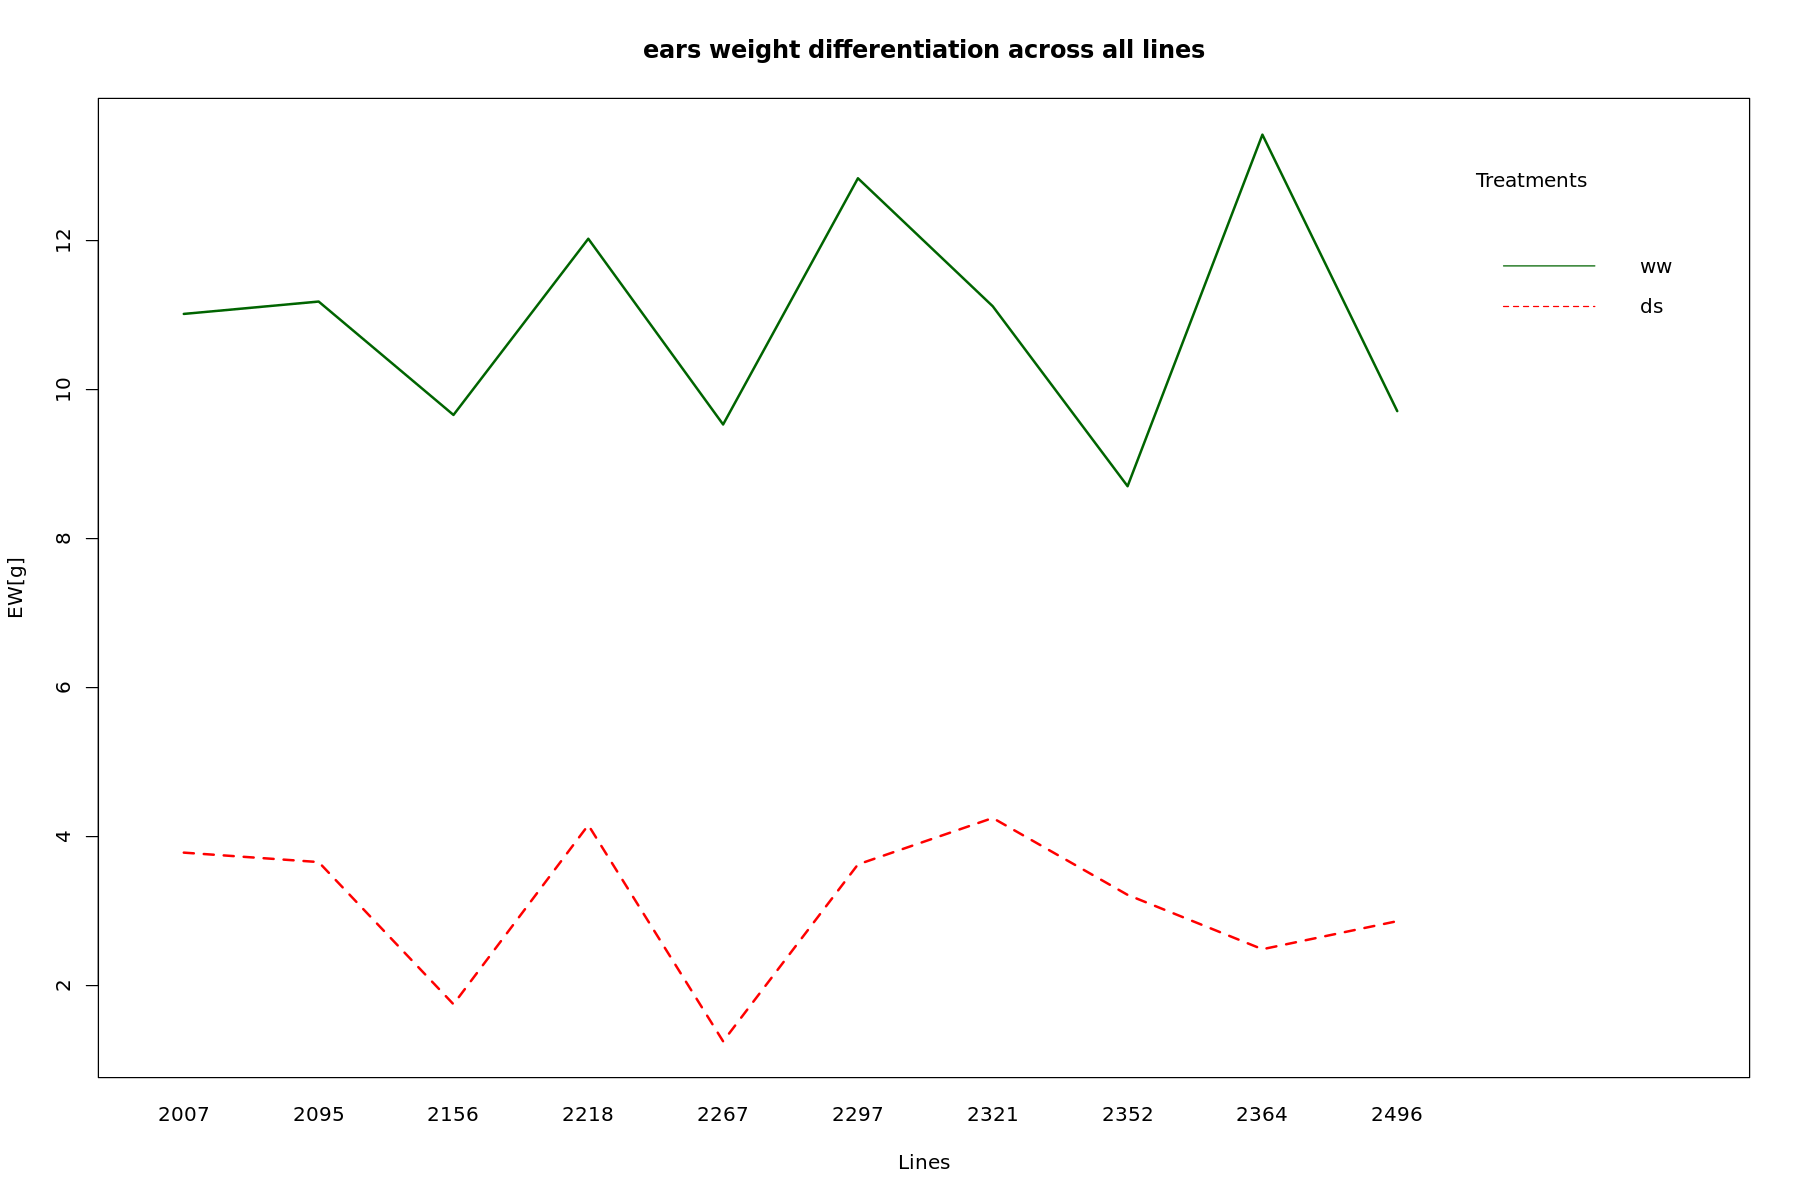

In [83]:
interactions<- interaction.plot(x.factor = final.data$IDs, trace.factor = final.data$treatment, 
                 response = final.data$Weight_ear, fun = mean, 
                 type = "l", legend = TRUE, main="ears weight differentiation across all lines",
                 xlab = "Lines", ylab="EW[g]", trace.label = "Treatments",
                 pch=c(1,19), col = c("red", "darkgreen"), lwd=2)
                 
options(repr.plot.width=13, repr.plot.height=7)
print(interactions)

NULL


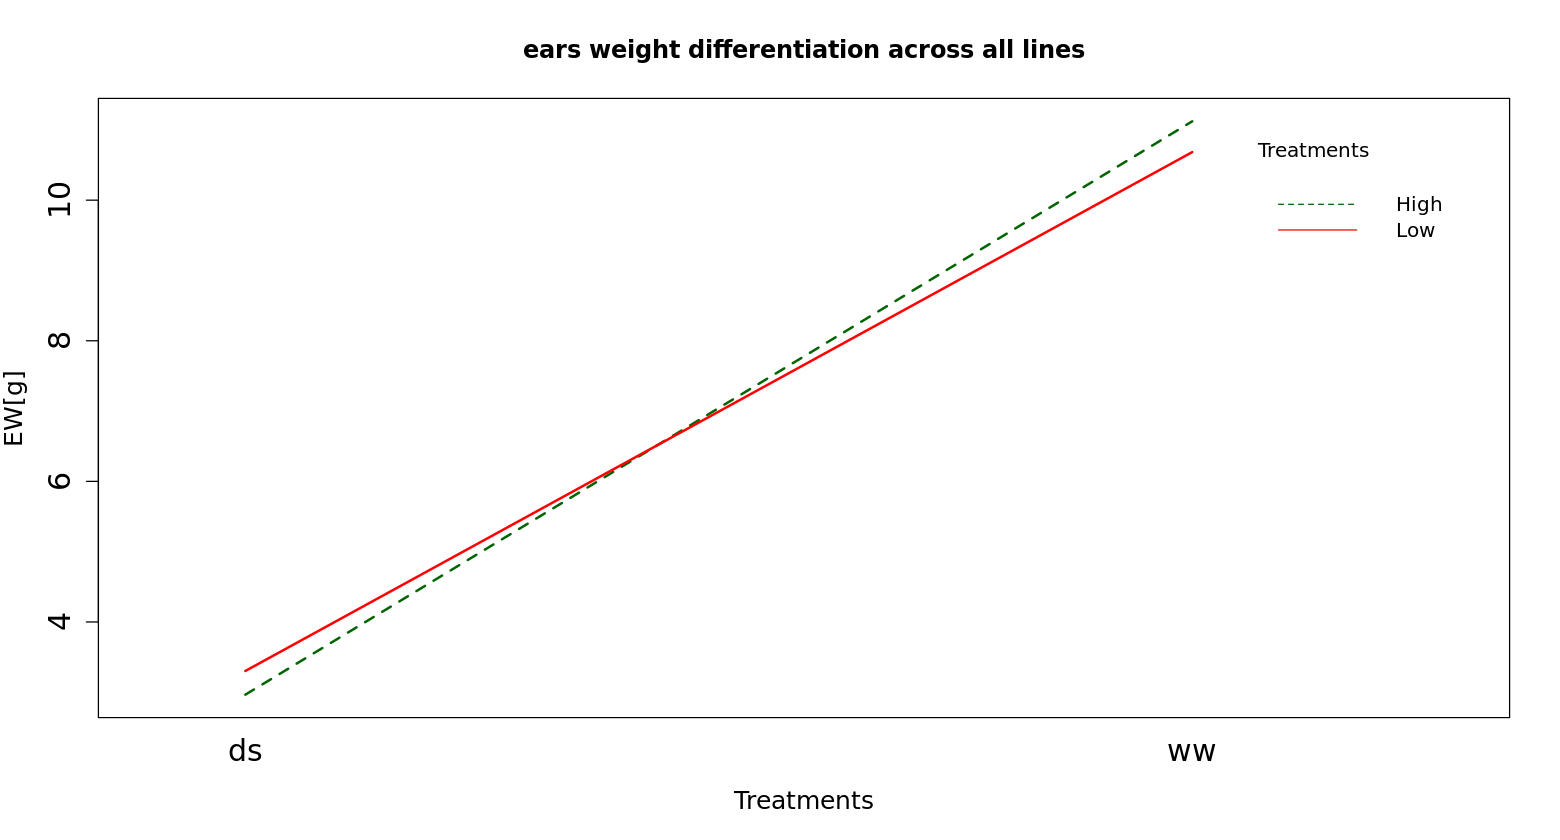

In [70]:
interactions<- interaction.plot(x.factor = final.data$treatment, trace.factor = final.data$Group, 
                 response = final.data$Weight_ear, fun = mean, 
                 type = "l", legend = TRUE, main="ears weight differentiation across all lines",
                 xlab = "Treatments", ylab="EW[g]", trace.label = "Treatments",
                 pch=c(1,19), col = c("darkgreen", "red"), lwd=2, cex.axis=1.5, cex.lab = 1.25)
                 
options(repr.plot.width=13, repr.plot.height=7)
print(interactions)

In [58]:
library(ggplot2)
fit <- lm(Weight_ear ~ treatment * Group, data = final.data)
interact_plot(fit, pred = treatment, modx = Group, interval = TRUE,
  int.type = "confidence", int.width = .8)

ERROR: Error in interact_plot(fit, pred = treatment, modx = Group, interval = TRUE, : could not find function "interact_plot"


In [222]:
options(repr.plot.width=17, repr.plot.height=7)
earsw_differentiation<- interaction.plot(x.factor = final.data$treatment, trace.factor = final.data$IDs, 
                 response =  final.data$Weight_ear, fun = mean, 
                 type = "b", legend = TRUE, main="ears weight differentiation across the treatments ",
                 xlab = "Treatments", ylab="EW[g]", trace.label = "Lines",
                 pch=c(1,19), col = c("blue", "red", "black","magenta", "orange","green",
                                      "dark green", "purple", "pink"),lwd=2) 
print(earsw_differentiation)


NULL


In [223]:
summary_ear_weight_Gt<- group_by(final.data, treatment, Group) %>%
summarise(mean=mean(Weight_ear), sd=sd(Weight_ear)) %>%
arrange(desc(mean))


cld_ear_Gt<- as.data.frame.list(tukey.cld.ear.G$`treatment:Group`)
summary_ear_weight_Gt$tukey <- cld_ear_Gt$Letters
View(summary_ear_weight_Gt)
write.table(summary_ear_weight_Gt, "summayr_ear.weight_Gt_August.csv")



summary_ear_weight_G<- group_by(final.data, Group) %>%
summarise(mean=mean(Weight_ear), sd=sd(Weight_ear)) %>%
arrange(desc(mean))


cld_ear_G<- as.data.frame.list(tukey.cld.ear.G$`Group`)
summary_ear_weight_G$tukey <- cld_ear_G$Letters
View(summary_ear_weight_G)
write.table(summary_ear_weight_G, "summayr_ear.weight_G_August.csv")



`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment Group mean      sd       tukey
1 ww        High  11.121111 2.326312 a    
2 ww        Low   10.683448 2.149148 a    
3 ds        Low    3.303448 1.009732 b    
4 ds        High   2.966207 1.264715 b

Group mean     sd       tukey
1 Low   6.993448 4.077342 a    
2 High  6.898036 4.503207 a

In [65]:
summary_EW_Gt<- read.table("summayr_ear.weight_Gt_August.csv")

summary_EW_Gt$Group <- as.factor(summary_EW_Gt$Group)
summary_EW_Gt$treatment <- as.factor(summary_EW_Gt$treatment)
str(summary_EW_Gt)

'data.frame':	4 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 1 1
 $ Group    : Factor w/ 2 levels "High","Low": 1 2 2 1
 $ mean     : num  11.12 10.68 3.3 2.97
 $ sd       : num  2.33 2.15 1.01 1.26
 $ tukey    : chr  "a" "a" "b" "b"


In [66]:

ears<- ggplot(data=summary_EW_Gt, aes(x =Group, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="ears_weight [g]") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("#d8b365","#5ab4ac","#d8b365","#5ab4ac"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(ears)


In [226]:
boxplot(Weight_ear~Group, data=final.data)
boxplot(Weight_ear~Group*treatment, data=final.data)

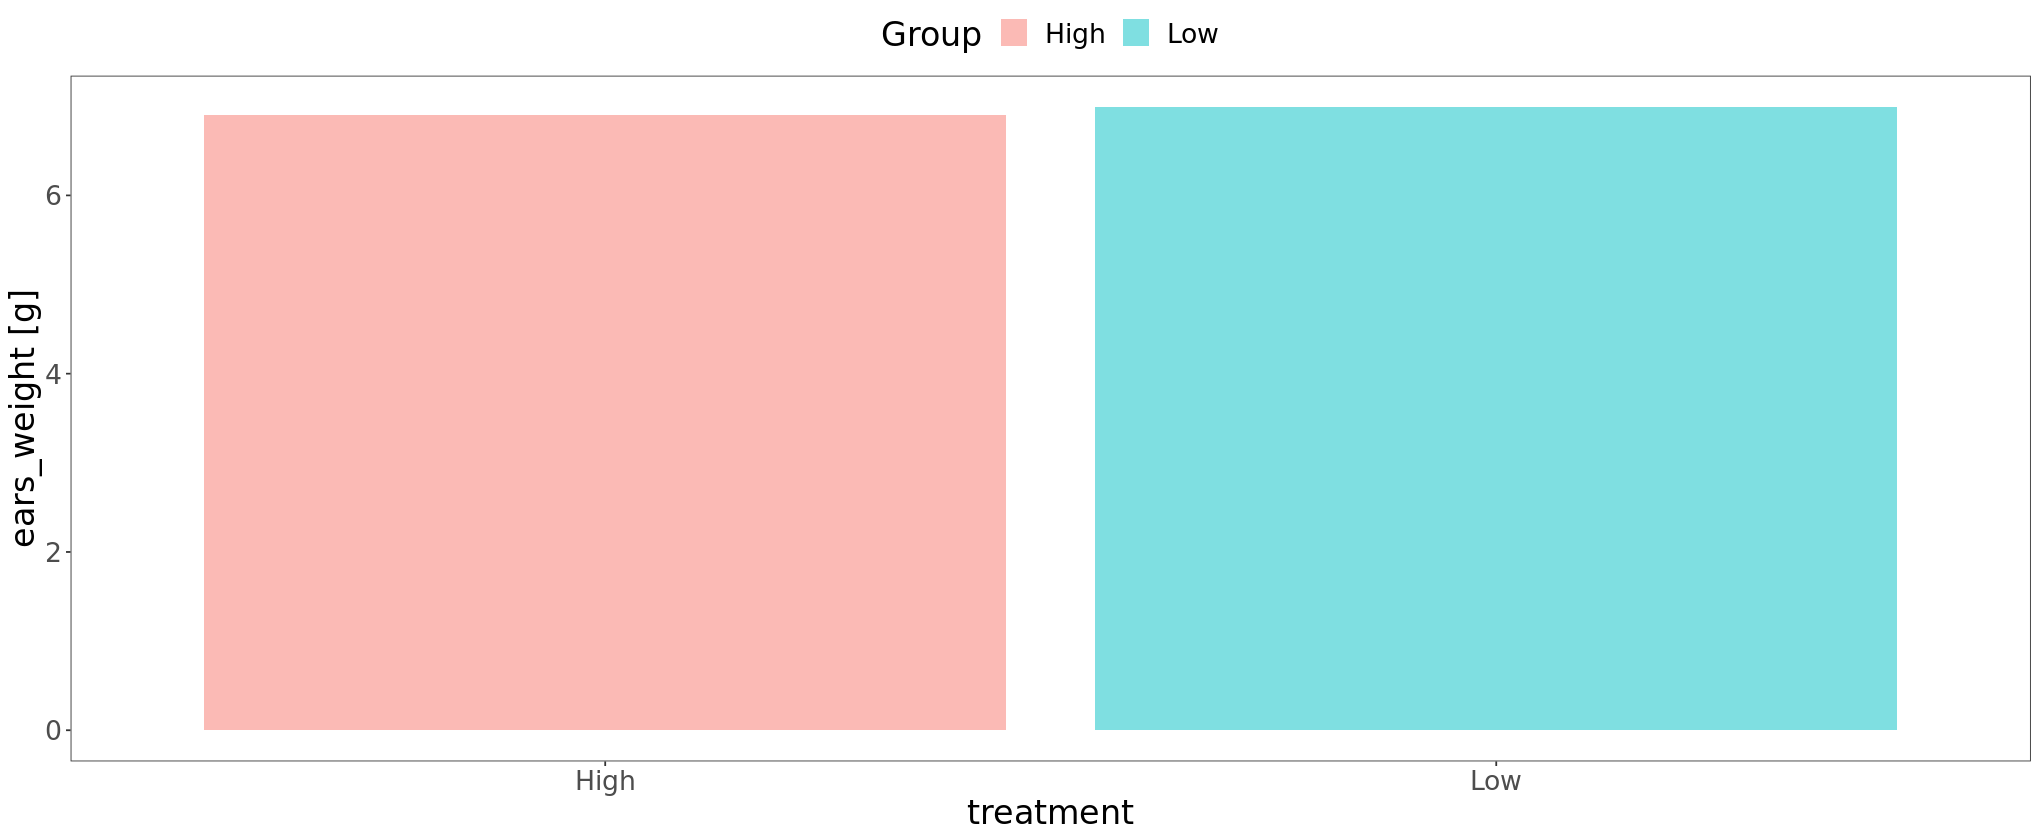

In [227]:
GEW<- ggplot(data=summary_ear_weight_G, aes(x =Group, y = mean, fill=Group)) + 
  geom_bar(stat = "identity", position = "dodge", alpha=0.5 ) +
 # geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 5, colour = "black") +
   # geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="treatment", y="ears_weight [g]") +
   theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  #theme(legend.position = c(0.08, 0.90))+
theme(legend.position = "top") +
#scale_fill_manual(values=c("red","darkgreen"))+
theme(text = element_text(size = 20))  
print(GEW)
#options(repr.plot.width=5, repr.plot.height=7)

# Number of the all seeds


In [228]:
str(final.data)

'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

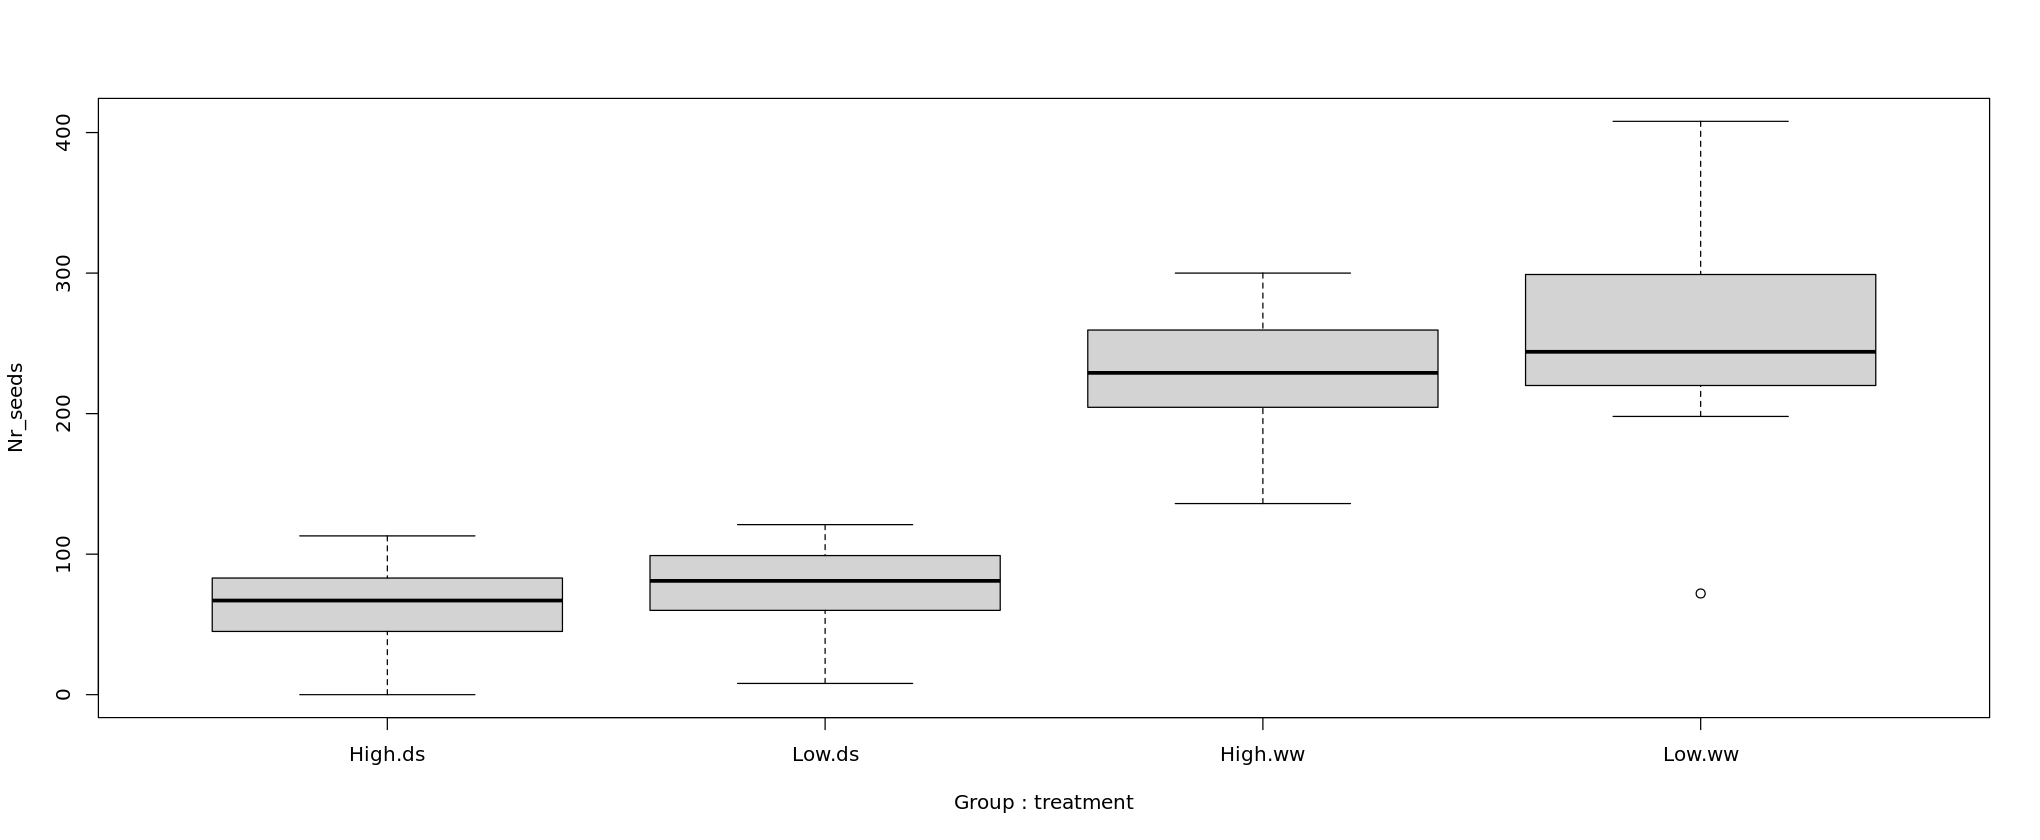

In [229]:
boxplot(Nr_seeds~Group*treatment, data=final.data)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


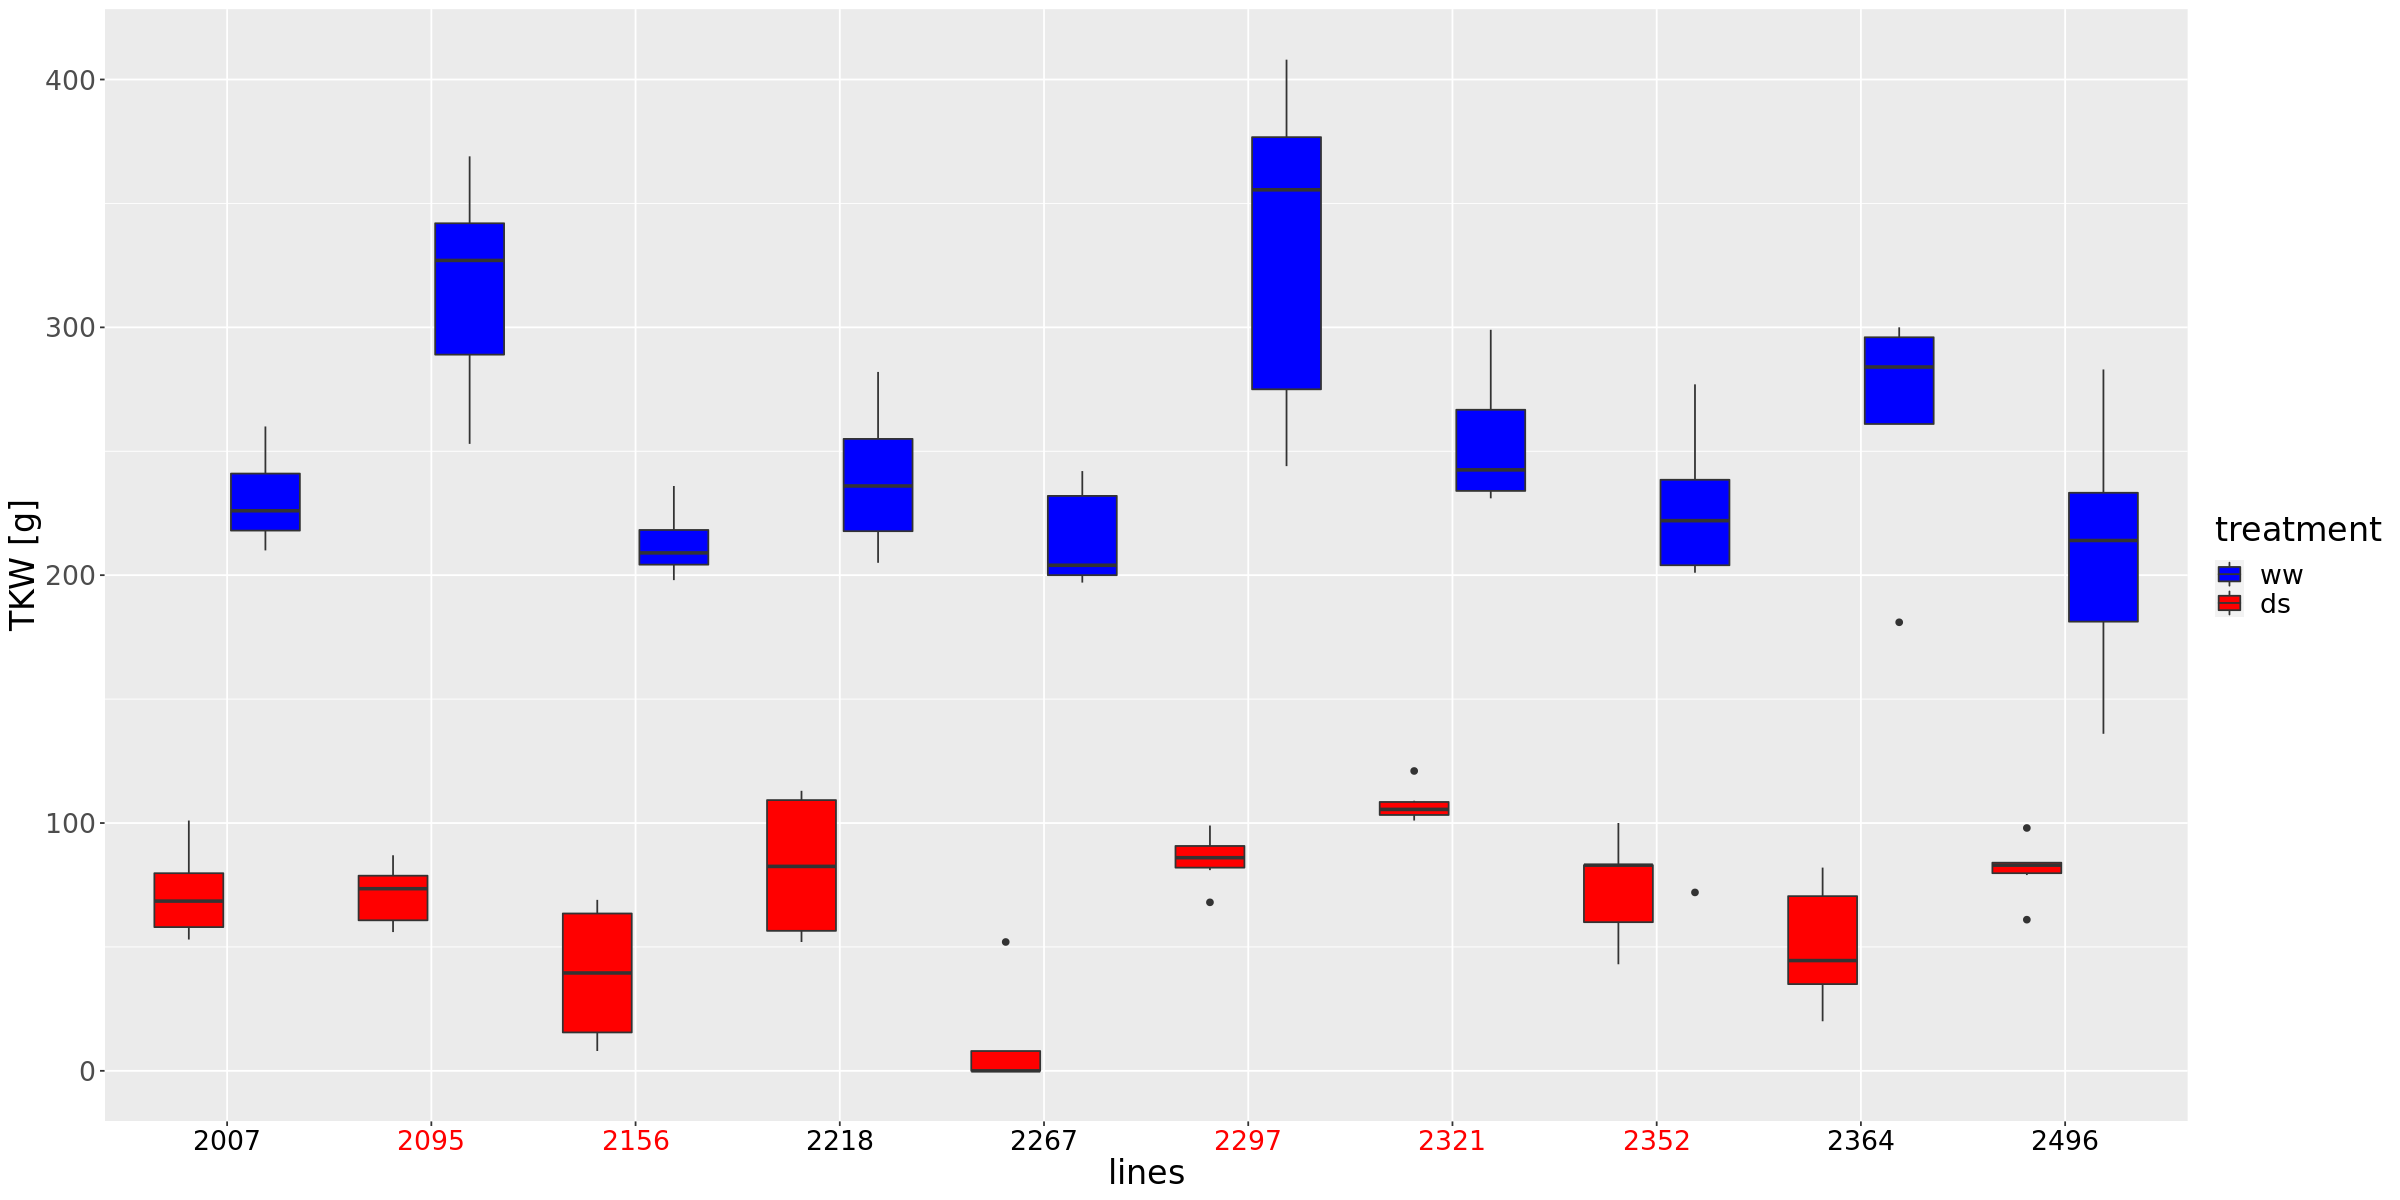

In [230]:
options(repr.plot.width=20, repr.plot.height=10)
tkw <- ggplot(final.data, aes(x=IDs, y=Nr_seeds,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="TKW [g]", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))



    print(tkw)

In [231]:
Nr_seeds_AN<- aov(Nr_seeds~treatment+IDs+treatment*IDs , data=final.data)

#anova_summary(Nr_seeds_AN, detailed = TRUE)

summary(Nr_seeds_AN)
#capture.output(summary(Nr_seeds_AN),file="test.doc")


              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 912460  912460 776.534  < 2e-16 ***
IDs            9  87995    9777   8.321 5.03e-09 ***
treatment:IDs  9  50288    5588   4.755 3.19e-05 ***
Residuals     94 110454    1175                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [232]:
DisplayAnovaSummary(model_summary_object = Nr_seeds_AN, title = "TITLE", title_font_size = 16,footnote = "footnote")

ERROR: Error in DisplayAnovaSummary(model_summary_object = Nr_seeds_AN, title = "TITLE", : could not find function "DisplayAnovaSummary"


In [ ]:
Di

In [ ]:
library(gridExtra)

In [233]:
Nr_seeds_AN_G<- aov(Nr_seeds~treatment*Group, data=final.data)
summary(Nr_seeds_AN_G)
anova_summary(Nr_seeds_AN_G, detailed=TRUE)

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1 912460  912460 432.227 <2e-16 ***
Group             1  14481   14481   6.859 0.0101 *  
treatment:Group   1   2038    2038   0.965 0.3280    
Residuals       110 232218    2111                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Effect          DFn DFd SSn        SSd      F       p        p<.05 ges  
1 treatment       1   110 912460.401 232217.5 432.227 6.69e-40 *     0.797
2 Group           1   110  14480.624 232217.5   6.859 1.00e-02 *     0.059
3 treatment:Group 1   110   2038.036 232217.5   0.965 3.28e-01       0.009

In [234]:
tukey.nr.seeds<- TukeyHSD(Nr_seeds_AN, conf.levels=.95)

tukey.cld.nr.seeds<- multcompLetters4(Nr_seeds_AN, tukey.nr.seeds)
tukey.cld.nr.seeds


$treatment
 ww  ds 
"a" "b" 

$IDs
 2297  2095  2321  2218  2364  2352  2496  2007  2156  2267 
  "a"  "ab" "abc" "bcd" "bcd"  "cd" "bcd" "bcd"   "d"   "d" 

$`treatment:IDs`
ww:2297 ww:2095 ww:2364 ww:2321 ww:2218 ww:2007 ww:2267 ww:2156 ww:2496 ww:2352 
    "a"    "ab"   "abc"    "bc"     "c"     "c"     "c"     "c"     "c"     "c" 
ds:2321 ds:2297 ds:2218 ds:2496 ds:2352 ds:2007 ds:2095 ds:2364 ds:2156 ds:2267 
    "d"    "de"    "de"    "de"    "de"    "de"    "de"    "de"    "de"     "e" 


In [235]:
summary_Nr_seeds<- group_by(final.data, treatment,IDs) %>%
summarise(mean=mean(Nr_seeds), sd=sd(Nr_seeds))%>%
          arrange(desc(mean))
 View(summary_Nr_seeds)


cld_NAS<- as.data.frame.list(tukey.cld.nr.seeds$ `treatment:IDs`)
summary_Nr_seeds$tukey <- cld_NAS$Letters
View(summary_Nr_seeds)

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd       
1  ww        2297 332.50000 68.547064
2  ww        2095 316.00000 45.563143
3  ww        2364 264.40000 49.033662
4  ww        2321 253.50000 27.252523
5  ww        2218 238.66667 28.793518
6  ww        2007 231.00000 19.849433
7  ww        2267 215.00000 20.542639
8  ww        2156 212.66667 13.764689
9  ww        2496 209.50000 51.141959
10 ww        2352 205.83333 70.598631
11 ds        2321 107.50000  7.204165
12 ds        2297  85.33333 10.519823
13 ds        2218  82.66667 28.779622
14 ds        2496  81.33333 11.927559
15 ds        2352  73.80000 22.331592
16 ds        2007  71.50000 18.108009
17 ds        2095  71.16667 12.384130
18 ds        2364  50.33333 25.097145
19 ds        2156  39.16667 27.228049
20 ds        2267  12.00000 22.627417

treatment IDs  mean      sd        tukey
1  ww        2297 332.50000 68.547064 a    
2  ww        2095 316.00000 45.563143 ab   
3  ww        2364 264.40000 49.033662 abc  
4  ww        2321 253.50000 27.252523 bc   
5  ww        2218 238.66667 28.793518 c    
6  ww        2007 231.00000 19.849433 c    
7  ww        2267 215.00000 20.542639 c    
8  ww        2156 212.66667 13.764689 c    
9  ww        2496 209.50000 51.141959 c    
10 ww        2352 205.83333 70.598631 c    
11 ds        2321 107.50000  7.204165 d    
12 ds        2297  85.33333 10.519823 de   
13 ds        2218  82.66667 28.779622 de   
14 ds        2496  81.33333 11.927559 de   
15 ds        2352  73.80000 22.331592 de   
16 ds        2007  71.50000 18.108009 de   
17 ds        2095  71.16667 12.384130 de   
18 ds        2364  50.33333 25.097145 de   
19 ds        2156  39.16667 27.228049 de   
20 ds        2267  12.00000 22.627417 e

In [236]:
write.table(summary_Nr_seeds, "summary_Nr_seeds")

In [237]:
summary_Nr_all_seeds <- read.table("summary_Nr_seeds")
summary_Nr_all_seeds$IDs <- as.factor(summary_Nr_all_seeds$IDs)
summary_Nr_all_seeds$treatment <- as.factor(summary_Nr_all_seeds$treatment)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


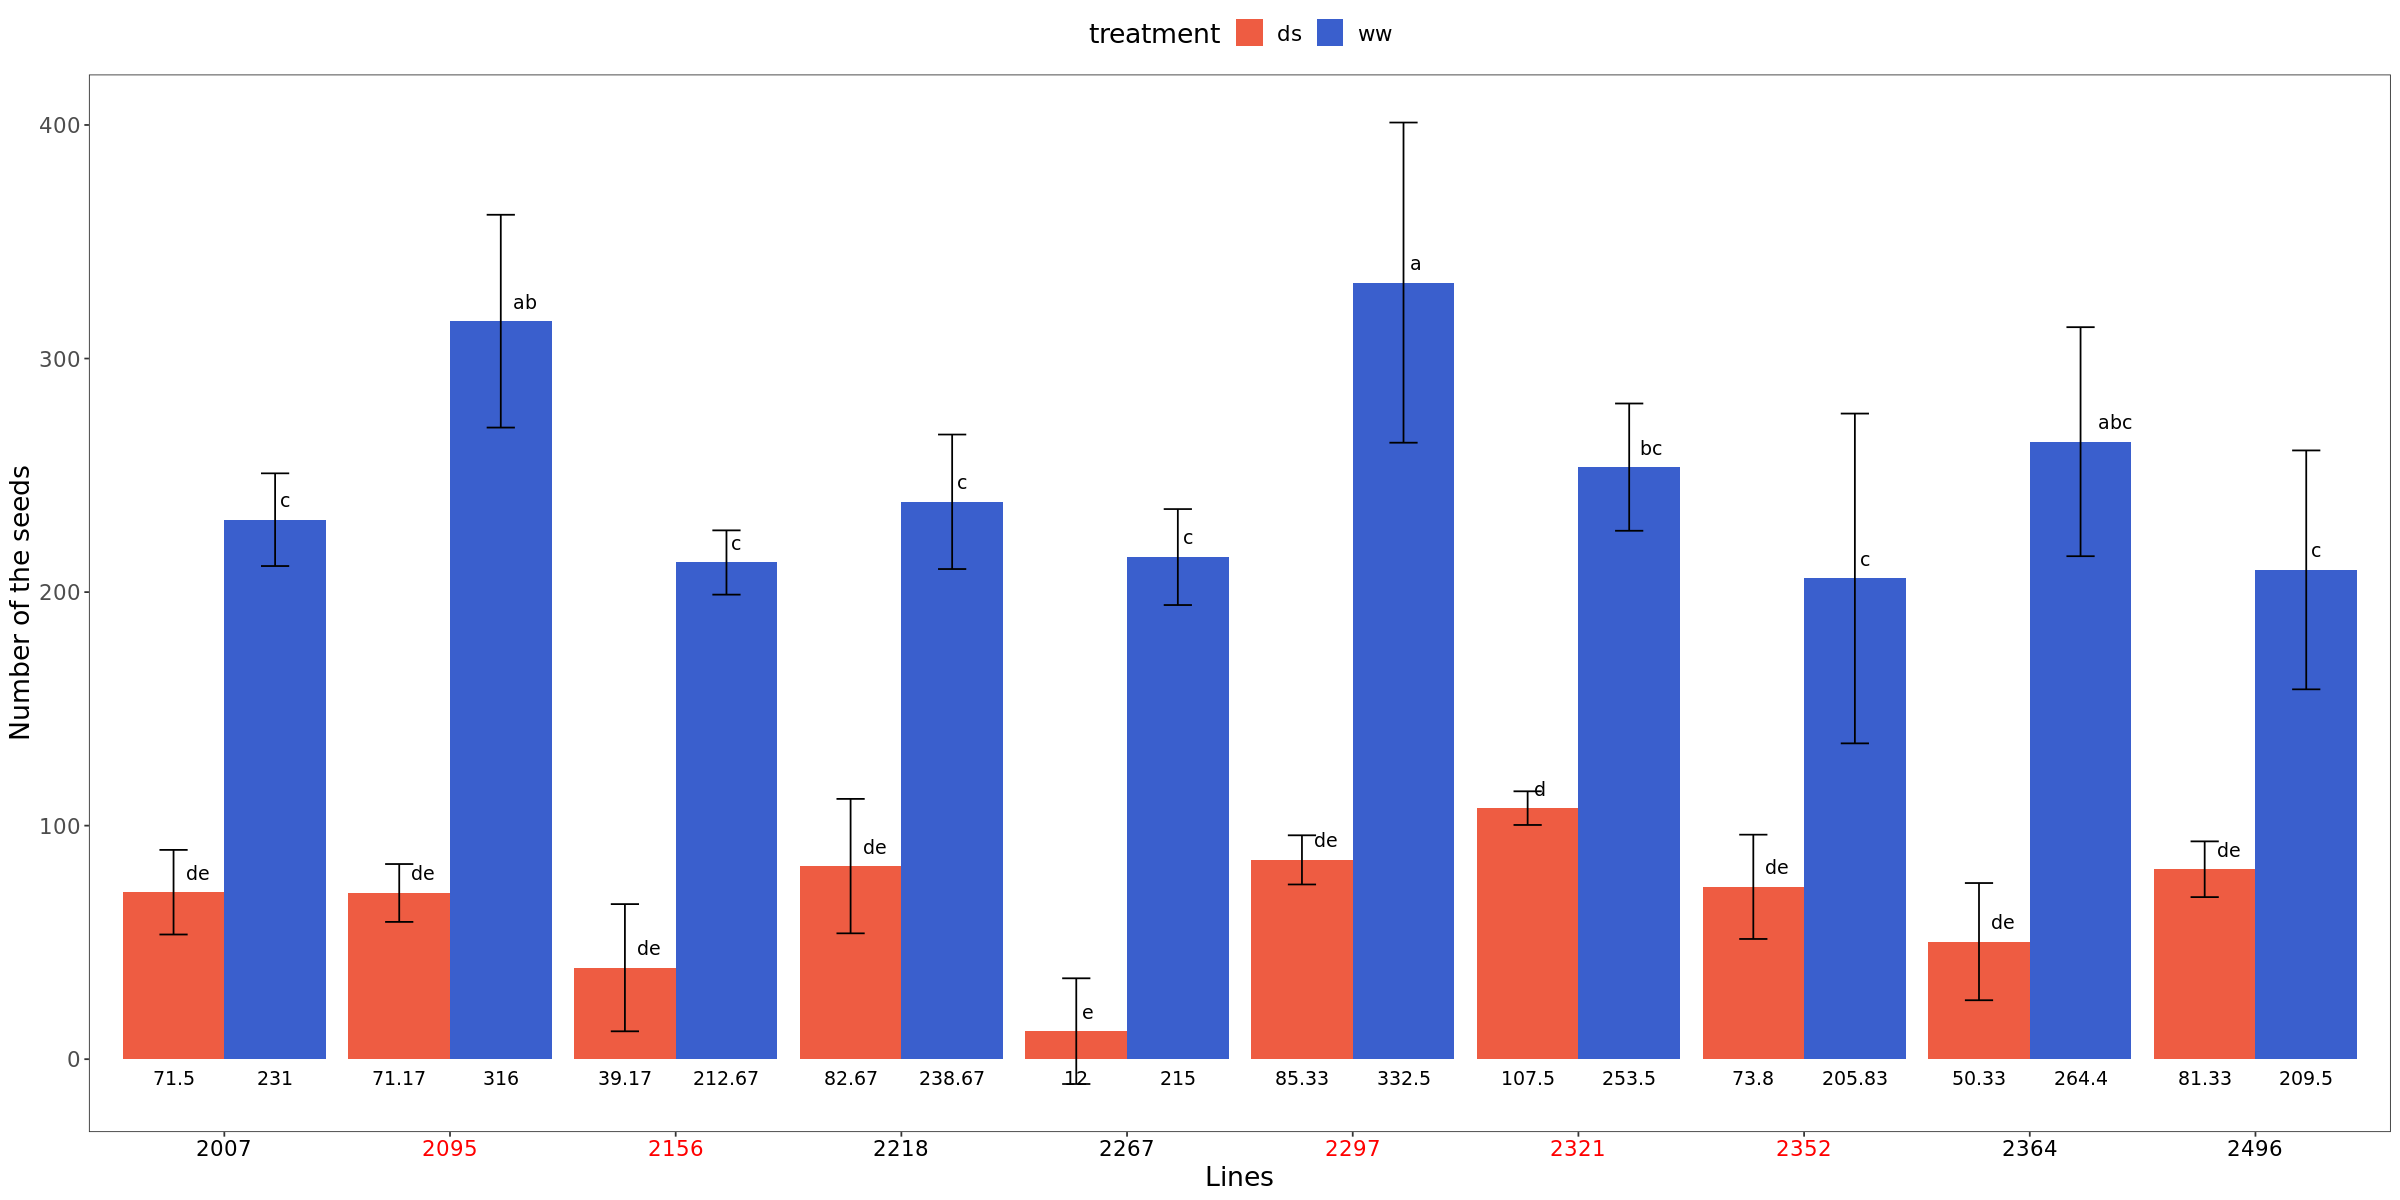

In [238]:

NAS<- ggplot(data=summary_Nr_all_seeds, aes(x =IDs, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the seeds") +
   theme_bw() +
scale_fill_manual(values=c("tomato2","royalblue3"))+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
#scale_fill_manual(values=c("lightblue","red","blue","red"))+
geom_text(aes(label=round(mean,2), y = -8), position = position_dodge(0.90), colour="black", size= 4)
print(NAS)

In [239]:
Nr_seeds_AN_G<- aov(Nr_seeds~treatment*Group, data=final.data)
summary(Nr_seeds_AN_G)

anova_table<- nice_table(Nr_seeds_AN_G)

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1 912460  912460 432.227 <2e-16 ***
Group             1  14481   14481   6.859 0.0101 *  
treatment:Group   1   2038    2038   0.965 0.3280    
Residuals       110 232218    2111                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ERROR: Error in nice_table(Nr_seeds_AN_G): could not find function "nice_table"


In [240]:
tukey<- TukeyHSD(Nr_seeds_AN_G, conf.level = 0.95)
tukey.cld.Nr.seeds<- multcompLetters4(Nr_seeds_AN_G, tukey)
tukey.cld.Nr.seeds

$treatment
 ww  ds 
"a" "b" 

$Group
 Low High 
 "a"  "b" 

$`treatment:Group`
 ww:Low ww:High  ds:Low ds:High 
    "a"     "a"     "b"     "b" 


# TKW trait

In [241]:
str(final.data)

'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

In [242]:
options(repr.plot.width=20, repr.plot.height=10)
tkw <- ggplot(final.data, aes(x=IDs, y=TKW,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="TKW [g]", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))



    print(tkw)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [243]:
tkw_AN<- aov(TKW~treatment*IDs , data=final.data)
summary(tkw_AN)



tkw_AN_G<- aov(TKW~treatment*Group, data=final.data)
summary(tkw_AN_G)

#mood.medtest(TKW~Group,
  #           data  = final.data,
   #          exact = FALSE)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  542.7   542.7  23.460 5.01e-06 ***
IDs            9 2464.1   273.8  11.835 2.89e-12 ***
treatment:IDs  9 1429.6   158.8   6.866 1.54e-07 ***
Residuals     94 2174.6    23.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value  Pr(>F)   
treatment         1    543   542.7  11.250 0.00109 **
Group             1    368   367.9   7.627 0.00674 **
treatment:Group   1    394   393.7   8.160 0.00512 **
Residuals       110   5307    48.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [244]:
tukey.t.g<- TukeyHSD(tkw_AN_G, conf.levels=.95)

tukey.cld.tkw.g<- multcompLetters4(tkw_AN_G, tukey.t.g)
tukey.cld.tkw.g


LSD_Test<- print(LSD.test(tkw_AN_G, c("treatment","Group")))

$treatment
 ww  ds 
"a" "b" 

$Group
High  Low 
 "a"  "b" 

$`treatment:Group`
ww:High  ww:Low  ds:Low ds:High 
    "a"     "b"     "b"     "b" 


$statistics
   MSerror  Df     Mean       CV
  48.24267 110 27.93535 24.86346

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none treatment:Group   4  0.05

$means
             TKW       std  r      LCL      UCL  Min   Max   Q25  Q50   Q75
ds:High 25.76310 11.329117 29 23.20706 28.31915  0.0 42.24 21.90 26.0 34.44
ds:Low  25.81966  5.348975 29 23.26361 28.37570 16.9 36.21 22.07 23.4 30.49
ww:High 33.97778  4.533239 27 31.32875 36.62680 25.0 44.50 30.30 34.8 36.75
ww:Low  26.59759  3.671778 29 24.04154 29.15363 22.1 36.30 24.03 25.5 28.70

$comparison
NULL

$groups
             TKW groups
ww:High 33.97778      a
ww:Low  26.59759      b
ds:Low  25.81966      b
ds:High 25.76310      b

attr(,"class")
[1] "group"


In [245]:
summary_tkw_g<- group_by(final.data, treatment,Group) %>%
summarise(mean=mean(TKW), sd=sd(TKW))%>%
          arrange(desc(mean))
 View(summary_tkw_g)

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment Group mean     sd       
1 ww        High  33.97778  4.533239
2 ww        Low   26.59759  3.671778
3 ds        Low   25.81966  5.348975
4 ds        High  25.76310 11.329117

In [246]:
lsd_summary<- as.data.frame.list(LSD_Test$ groups)
summary_tkw_g$lsd<- lsd_summary$groups
View(summary_tkw_g)
write.table(summary_tkw_g, "lsd-summary-tkw-Gt.csv")

treatment Group mean     sd        lsd
1 ww        High  33.97778  4.533239 a  
2 ww        Low   26.59759  3.671778 b  
3 ds        Low   25.81966  5.348975 b  
4 ds        High  25.76310 11.329117 b

In [72]:
lsd_tkw_Int<- read.table( "lsd-summary-tkw-Gt.csv")

lsd_tkw_Int$treatment<- as.factor(lsd_tkw_Int$treatment)
lsd_tkw_Int$Group<- as.factor(lsd_tkw_Int$Group)
str(lsd_tkw_Int)

'data.frame':	4 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 1 1
 $ Group    : Factor w/ 2 levels "High","Low": 1 2 2 1
 $ mean     : num  34 26.6 25.8 25.8
 $ sd       : num  4.53 3.67 5.35 11.33
 $ lsd      : chr  "a" "b" "b" "b"


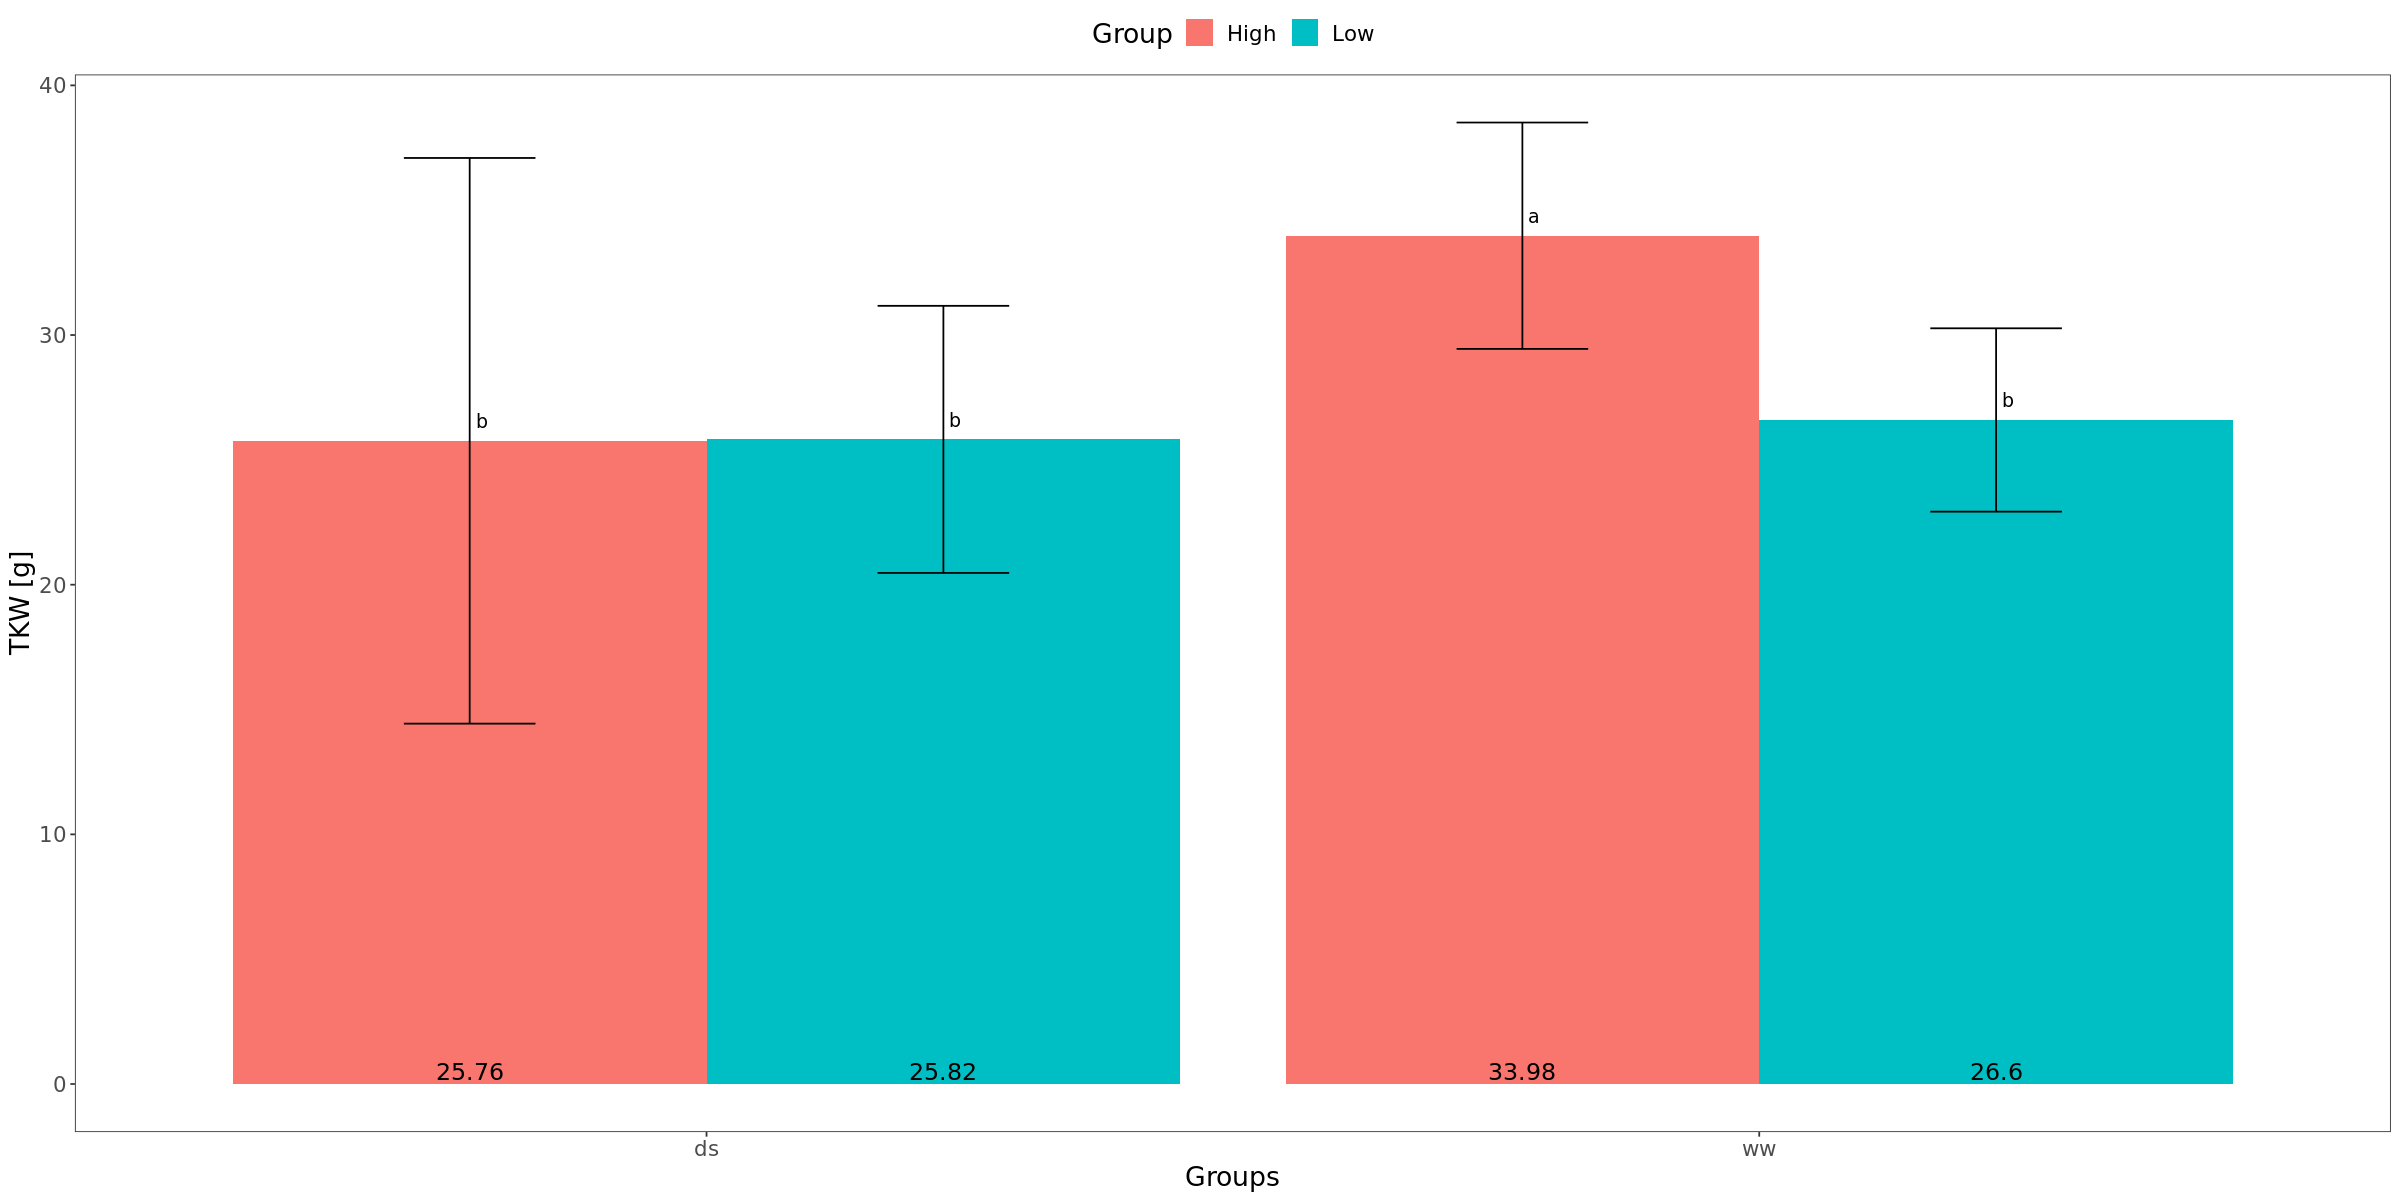

In [248]:

tkw<- ggplot(data=lsd_tkw_Int, aes(x =treatment, y = mean, fill=Group)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= lsd),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="TKW [g]") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
#scale_fill_manual(values=c("lightblue","red","blue","red"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(tkw)

In [76]:
options(repr.plot.width=10,  repr.plot.height=7)
tkwg<- ggplot(data=lsd_tkw_Int, aes(x =Group, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= lsd),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="TKW [g]") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("#E7B800", "#FC4E07","#E7B800", "#FC4E07"))+
geom_text(aes(label=round(mean,2), y = 5), position = position_dodge(0.90), colour="black", size= 5)
print(tkwg)

In [250]:
tkw_AN<- aov(TKW~treatment*IDs , data=final.data)
summary(tkw_AN)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  542.7   542.7  23.460 5.01e-06 ***
IDs            9 2464.1   273.8  11.835 2.89e-12 ***
treatment:IDs  9 1429.6   158.8   6.866 1.54e-07 ***
Residuals     94 2174.6    23.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [251]:
tukey<- TukeyHSD(tkw_AN, conf.levels=.95)
tukey.cld.tkw<- multcompLetters4(tkw_AN, tukey)
tukey.cld.tkw

summary_tkw<- group_by(final.data,treatment, IDs) %>%
summarise(mean=mean(TKW), sd=sd(TKW)) %>%
arrange(desc(mean))
View(summary_tkw)

cld_tkw<- as.data.frame.list(tukey.cld.tkw$ `treatment:IDs`)
summary_tkw$tukey <- cld_tkw$Letters
View(summary_tkw)
write.table(summary_tkw, "summary_tkw_August.csv")

$treatment
 ww  ds 
"a" "b" 

$IDs
 2218  2007  2364  2095  2321  2352  2496  2156  2297  2267 
  "a"   "a"  "ab" "abc"  "bc" "bcd"  "cd"  "cd"  "cd"   "d" 

$`treatment:IDs`
ww:2364 ww:2218 ww:2007 ds:2007 ds:2218 ds:2095 ww:2496 ww:2267 ww:2321 ds:2364 
    "a"    "ab"   "abc"   "abc"   "abc"   "abc"  "abcd" "abcde" "abcde" "abcde" 
ww:2352 ww:2156 ds:2352 ww:2297 ds:2321 ww:2095 ds:2156 ds:2297 ds:2496 ds:2267 
"abcde"  "bcde"   "cde"   "cde"   "cde"   "cde"    "de"    "de"     "e"     "f" 


`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean     sd       
1  ww        2364 37.48000  6.214258
2  ww        2218 36.71667  1.770217
3  ww        2007 34.46000  1.985699
4  ds        2007 34.22833  7.651908
5  ds        2218 33.75667  4.392433
6  ds        2095 33.27833  3.145673
7  ww        2496 31.20000  3.912544
8  ww        2267 30.04000  3.183237
9  ww        2321 29.83333  4.970178
10 ds        2364 28.10667  5.336091
11 ww        2352 26.98833  3.426663
12 ww        2156 26.66667  2.206052
13 ds        2352 25.80600  4.987517
14 ww        2297 24.91667  2.810990
15 ds        2321 24.58333  2.603395
16 ww        2095 24.18000  2.317758
17 ds        2156 22.85667  3.547403
18 ds        2297 22.57167  4.390924
19 ds        2496 20.49667  3.179312
20 ds        2267  9.52000 13.035845

treatment IDs  mean     sd        tukey
1  ww        2364 37.48000  6.214258 a    
2  ww        2218 36.71667  1.770217 ab   
3  ww        2007 34.46000  1.985699 abc  
4  ds        2007 34.22833  7.651908 abc  
5  ds        2218 33.75667  4.392433 abc  
6  ds        2095 33.27833  3.145673 abc  
7  ww        2496 31.20000  3.912544 abcd 
8  ww        2267 30.04000  3.183237 abcde
9  ww        2321 29.83333  4.970178 abcde
10 ds        2364 28.10667  5.336091 abcde
11 ww        2352 26.98833  3.426663 abcde
12 ww        2156 26.66667  2.206052 bcde 
13 ds        2352 25.80600  4.987517 cde  
14 ww        2297 24.91667  2.810990 cde  
15 ds        2321 24.58333  2.603395 cde  
16 ww        2095 24.18000  2.317758 cde  
17 ds        2156 22.85667  3.547403 de   
18 ds        2297 22.57167  4.390924 de   
19 ds        2496 20.49667  3.179312 e    
20 ds        2267  9.52000 13.035845 f

In [68]:
tkw_Int<- read.table("summary_tkw_August.csv")
tkw_Int$IDs <- as.factor(tkw_Int$IDs)
tkw_Int$treatment <- as.factor(tkw_Int$treatment)
str(tkw_Int)

'data.frame':	20 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 1 1 1 2 2 2 1 ...
 $ IDs      : Factor w/ 10 levels "2007","2095",..: 9 4 1 1 4 2 10 5 7 9 ...
 $ mean     : num  37.5 36.7 34.5 34.2 33.8 ...
 $ sd       : num  6.21 1.77 1.99 7.65 4.39 ...
 $ tukey    : chr  "a" "ab" "abc" "abc" ...


In [77]:
options(repr.plot.width=15,  repr.plot.height=10)
TKW_Int <- ggplot(data=tkw_Int, aes(x =IDs, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="TKW[g]") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("tomato2","royalblue3"))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(TKW_Int)


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [79]:
options(repr.plot.width=15,  repr.plot.height=10)
TKW_Int <- ggplot(data=tkw_Int, aes(x =IDs, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="TKW[g]") +
   theme_bw() +
facet_wrap(~treatment)+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("tomato2","royalblue3"))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(TKW_Int)


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [254]:
options(repr.plot.width=15,  repr.plot.height=10)
TKW_Int <- ggplot(data=tkw_Int, aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="TKW[g]") +
   theme_bw() +
#theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position = "top", legend.text = element_text(color = "black"))+


#scale_fill_discrete(labels = c("2007", "2156(L)", "2297(L)","2352(L)", "2496", "2095(L)","2218", "2321(L)", "2364"))+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(TKW_Int)


# Number of the unqualified seeds (Hollow, broken, defected by bathpgen and etc)


In [255]:
str(final.data)


'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

In [256]:
PS_AN<- aov(Poor_seeds~treatment*IDs, data=final.data)
summary(PS_AN)

PS_AN_G<- aov(Poor_seeds~treatment*Group, data=final.data)
summary(PS_AN_G)


PS_AN_G1<- aov(Poor_seeds~Group, data=final.data)
Anova(PS_AN_G1,type= "III")
summary(PS_AN_G1)


#lsd.test<- print(LSD.test(PS_AN_G, "Group"))
#lsd.test<- print(LSD.test(PS_AN_G, c("treatment","Group")))
#a<- kruskal.test(Poor_seeds~Group, data=final.data)
#a
#tukey<- TukeyHSD(PS_AN_G, conf.levels=.95)
tukey.cld.ps<- multcompLetters4(PS_AN,TukeyHSD(PS_AN, conf.levels=.95))
tukey.cld.ps

tukey.cld.G<- multcompLetters4(PS_AN_G,TukeyHSD(PS_AN_G, conf.levels=.95))
tukey.cld.G


              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  407.9   407.9  25.922 1.82e-06 ***
IDs            9 1217.6   135.3   8.597 2.69e-09 ***
treatment:IDs  9 1243.5   138.2   8.780 1.78e-09 ***
Residuals     94 1479.2    15.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value  Pr(>F)    
treatment         1    408   407.9  13.391 0.00039 ***
Group             1    308   308.5  10.126 0.00190 ** 
treatment:Group   1    281   280.9   9.222 0.00299 ** 
Residuals       110   3351    30.5                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sum Sq    Df  F value   Pr(>F)      
(Intercept)  872.1607   1 24.104576 3.128808e-06
Group        295.8289   1  8.176051 5.063968e-03
Residuals   4052.4255 112        NA           NA

             Df Sum Sq Mean Sq F value  Pr(>F)   
Group         1    296  295.83   8.176 0.00506 **
Residuals   112   4052   36.18                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ww  ds 
"a" "b" 

$IDs
2267 2364 2496 2321 2218 2297 2095 2156 2352 2007 
 "a"  "b"  "b"  "b"  "b"  "b"  "b"  "b"  "b"  "b" 

$`treatment:IDs`
ww:2267 ww:2364 ww:2496 ww:2321 ds:2218 ww:2297 ds:2297 ww:2218 ds:2364 ww:2095 
    "a"     "b"    "bc"    "bc"    "bc"    "bc"    "bc"    "bc"    "bc"    "bc" 
ww:2156 ds:2267 ds:2095 ds:2321 ww:2352 ds:2007 ww:2007 ds:2156 ds:2352 ds:2496 
   "bc"    "bc"     "c"     "c"     "c"     "c"     "c"     "c"     "c"     "c" 


$treatment
 ww  ds 
"a" "b" 

$Group
High  Low 
 "a"  "b" 

$`treatment:Group`
ww:High  ww:Low ds:High  ds:Low 
    "a"     "b"     "b"     "b" 


In [257]:
a<- t.test(Poor_seeds~treatment ,data=final.data, equal.vara=FALSE)
a

ab<- t.test(Poor_seeds~Group ,data=final.data, equal.vara=FALSE)
ab


	Welch Two Sample t-test

data:  Poor_seeds by treatment
t = -3.3486, df = 58.007, p-value = 0.001431
alternative hypothesis: true difference in means between group ds and group ww is not equal to 0
95 percent confidence interval:
 -6.045743 -1.521991
sample estimates:
mean in group ds mean in group ww 
       0.4482759        4.2321429 



	Welch Two Sample t-test

data:  Poor_seeds by Group
t = 2.8156, df = 62.281, p-value = 0.006511
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 0.9347962 5.5097851
sample estimates:
mean in group High  mean in group Low 
         3.9464286          0.7241379 


In [258]:
pwc1 <- final.data %>% 
pairwise_t_test(Poor_seeds~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc1


pairwise.t.test(x = final.data$Poor_seeds, g = final.data$Group, p.adjust.method = "bonferroni",
, var.equal = FALSE)

.y.        group1 group2 n1 n2 p       p.signif p.adj   p.adj.signif
1 Poor_seeds High   Low    56 58 0.00506 **       0.00506 **


	Pairwise comparisons using t tests with pooled SD 

data:  final.data$Poor_seeds and final.data$Group 

    High  
Low 0.0051

P value adjustment method: bonferroni 

In [259]:
options(repr.plot.width=10,  repr.plot.height=15)
boxplot(Poor_seeds~Group,data=final.data)
boxplot(Poor_seeds~treatment,data=final.data)
boxplot(Poor_seeds~IDs,data=final.data)

In [260]:
summary(final.data)

      Unit        experiment             IDs     treatment     BBCH          
 Min.   :121.0   Length:114         2156   :12   ds:58     Length:114        
 1st Qu.:170.2   Class :character   2218   :12   ww:56     Class :character  
 Median :217.0   Mode  :character   2297   :12             Mode  :character  
 Mean   :218.7                      2321   :12                               
 3rd Qu.:267.5                      2496   :12                               
 Max.   :315.0                      2007   :11                               
                                    (Other):43                               
 Collection.date      max.Height        Biomass          Shoots      
 Length:114         Min.   : 47.00   Min.   : 3.04   Min.   : 3.000  
 Class :character   1st Qu.: 67.47   1st Qu.: 5.57   1st Qu.: 4.250  
 Mode  :character   Median : 78.00   Median : 8.75   Median : 7.000  
                    Mean   : 78.61   Mean   : 9.71   Mean   : 6.947  
                    3rd Qu

In [261]:
leveneTest(Poor_seeds~Group, data=final.data)
with(final.data, shapiro.test(Poor_seeds[Groups=="Low"]))
with(final.data, shapiro.test(Poor_seeds[Groups=="High"]))



Df  F value  Pr(>F)     
group   1 8.176051 0.005063968
      112       NA          NA


	Shapiro-Wilk normality test

data:  Poor_seeds[Groups == "Low"]
W = 0.36575, p-value = 2.053e-14



	Shapiro-Wilk normality test

data:  Poor_seeds[Groups == "High"]
W = 0.5581, p-value = 9.977e-12


# To check the medians of two groups for poor seeds

In [262]:
library(RVAideMemoire)
mood.medtest(Poor_seeds~Group, data=final.data, exact=TRUE)

*** Package RVAideMemoire v 0.9-81-2 ***


Attaching package: ‘RVAideMemoire’


The following object is masked from ‘package:lme4’:

    dummy





	Mood's median test

data:  Poor_seeds by Group
p-value = 0.2947


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


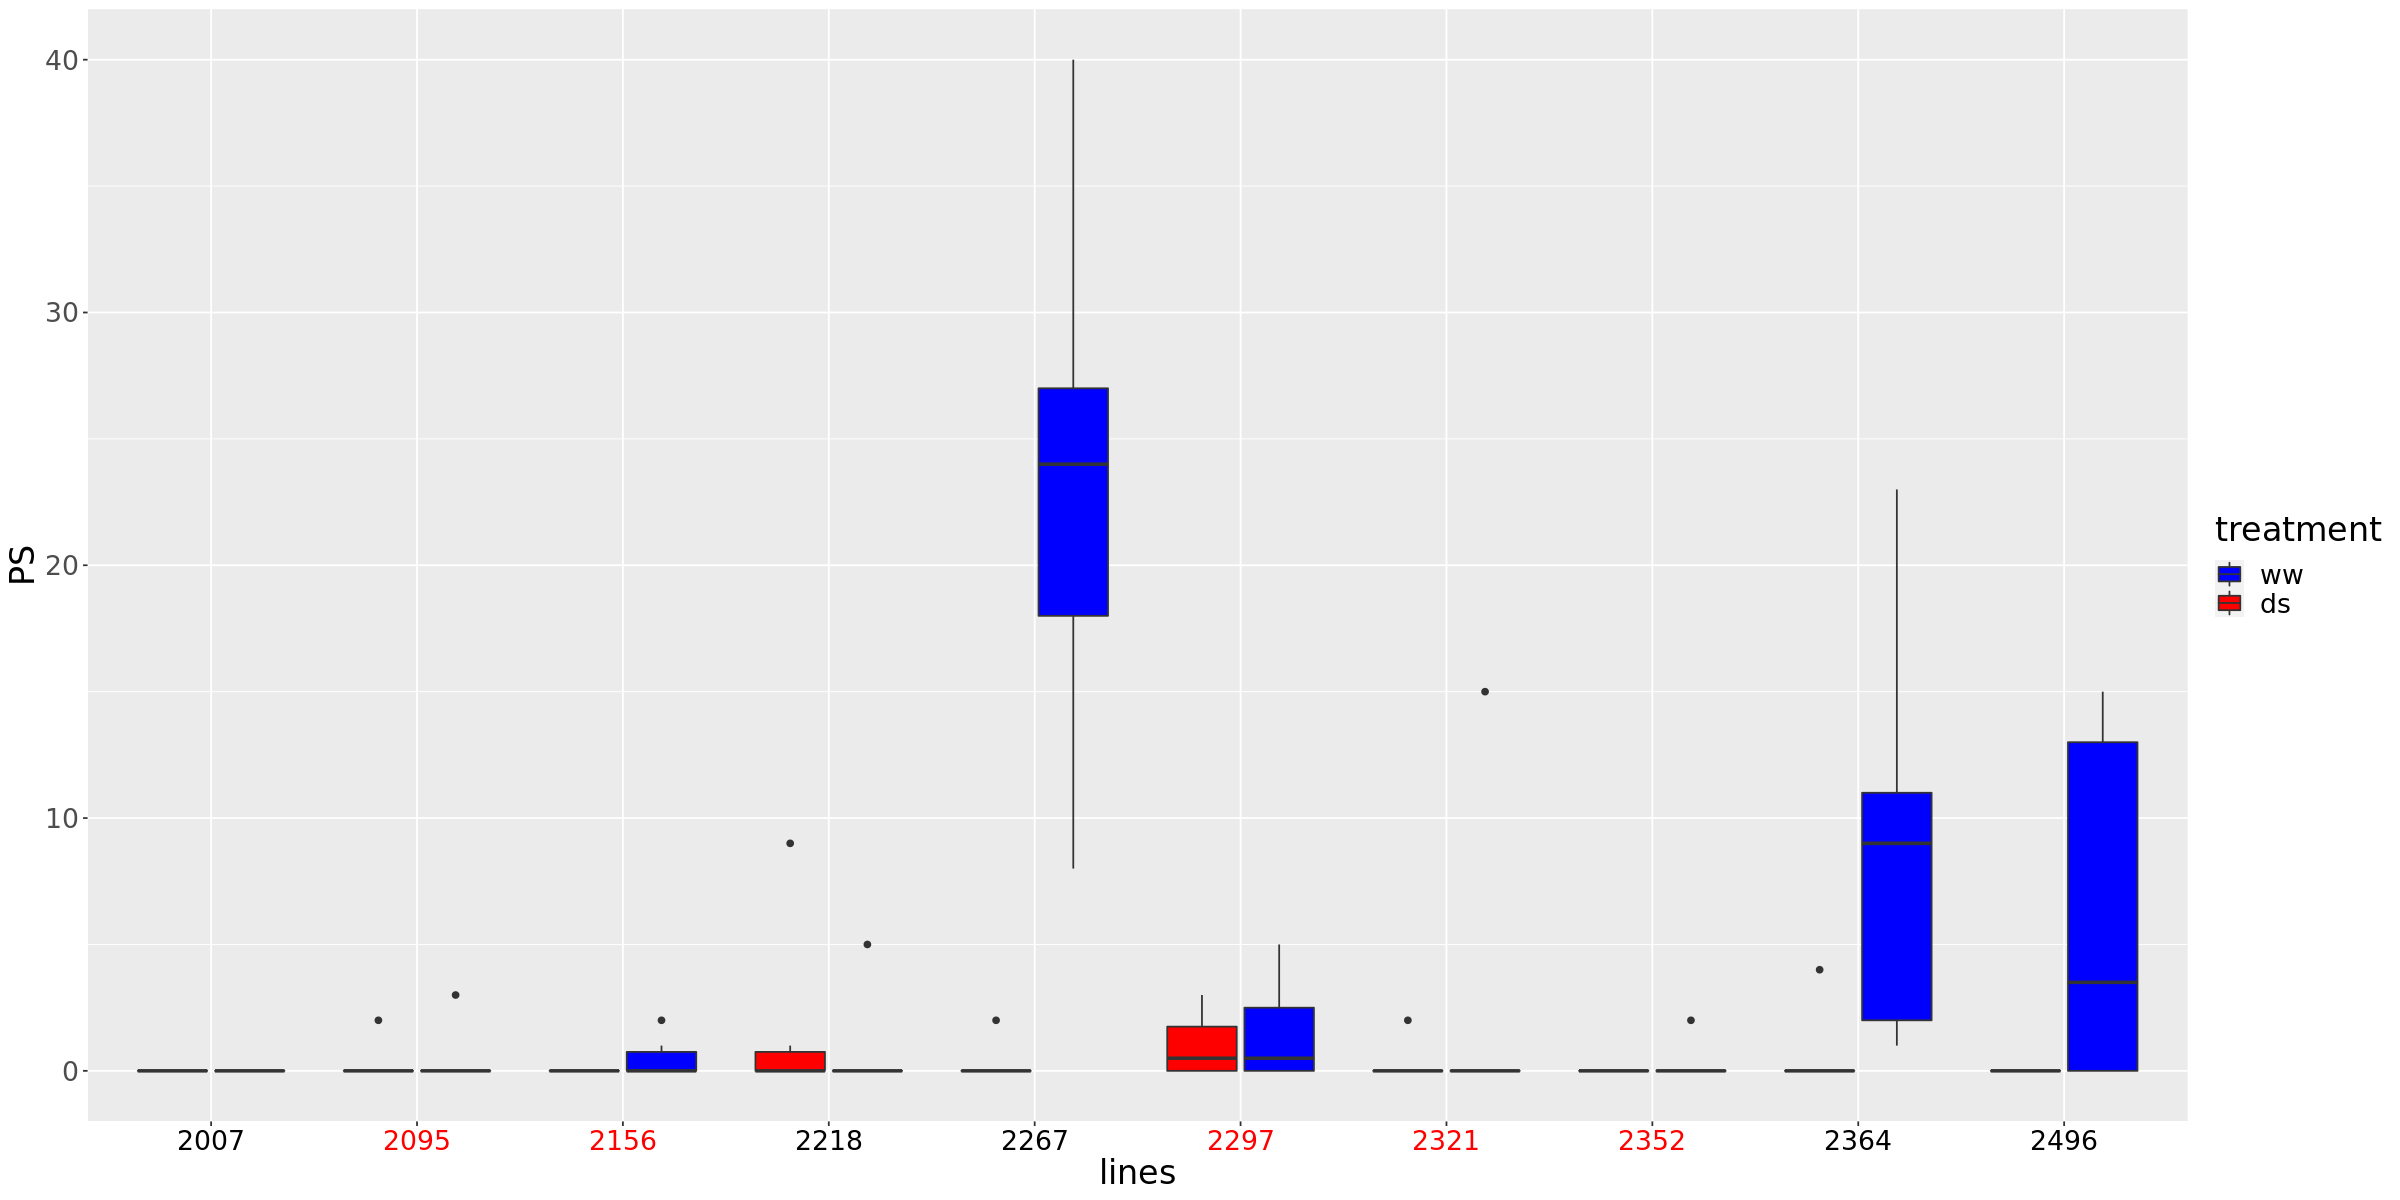

In [263]:
options(repr.plot.width=20, repr.plot.height=10)
tkw <- ggplot(final.data, aes(x=IDs, y=Poor_seeds,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="PS", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))



    print(tkw)

In [264]:
a<- mean(final.data$Poor_seeds[final.data$Group=="Low"])
a

b<- mean(final.data$Poor_seeds[final.data$Group=="High"])
b

[1] 0.7241379

[1] 3.946429

In [265]:
length(final.data$Poor_seeds[final.data$Group=="Low"])
length(final.data$Poor_seeds[final.data$Group=="High"])

length(final.data$Poor_seeds[final.data$treatment=="ww"])
length(final.data$Poor_seeds[final.data$treatment=="ds"])

[1] 58

[1] 56

[1] 56

[1] 58

In [266]:
summary_PS<- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Poor_seeds), sd=sd(Poor_seeds)) %>%
arrange(desc(mean))


cld_ps_Int<- as.data.frame.list(tukey.cld.ps$`treatment:IDs`)
summary_PS$tukey <- cld_ps_Int$Letters
View(summary_PS)
write.table(summary_PS, "summayr_PS_Int_August.csv")


summary_PS_Gt<- group_by(final.data, treatment, Group) %>%
summarise(mean=mean(Poor_seeds), sd=sd(Poor_seeds)) %>%
arrange(desc(mean))


cld_ps_Gt<- as.data.frame.list(tukey.cld.G$`treatment:Group`)
summary_PS_Gt$tukey <- cld_ps_Gt$Letters
View(summary_PS_Gt)
write.table(summary_PS_Gt, "summayr_PS_Gt_August.csv")

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean       sd         tukey
1  ww        2267 23.4000000 11.7813412 a    
2  ww        2364  9.2000000  8.8430764 b    
3  ww        2496  6.1666667  7.3598007 bc   
4  ww        2321  2.5000000  6.1237244 bc   
5  ds        2218  1.6666667  3.6147845 bc   
6  ww        2297  1.5000000  2.0736441 bc   
7  ds        2297  1.0000000  1.2649111 bc   
8  ww        2218  0.8333333  2.0412415 bc   
9  ds        2364  0.6666667  1.6329932 bc   
10 ww        2095  0.6000000  1.3416408 bc   
11 ww        2156  0.5000000  0.8366600 bc   
12 ds        2267  0.4000000  0.8944272 bc   
13 ds        2095  0.3333333  0.8164966 c    
14 ds        2321  0.3333333  0.8164966 c    
15 ww        2352  0.3333333  0.8164966 c    
16 ds        2007  0.0000000  0.0000000 c    
17 ds        2156  0.0000000  0.0000000 c    
18 ds        2352  0.0000000  0.0000000 c    
19 ds        2496  0.0000000  0.0000000 c    
20 ww        2007  0.0000000  0.0000000 c

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment Group mean      sd         tukey
1 ww        High  7.5925926 10.7354884 a    
2 ww        Low   1.1034483  2.9440597 b    
3 ds        High  0.5517241  1.8241673 b    
4 ds        Low   0.3448276  0.8139789 b

In [267]:
summary_ps_Int<- read.table("summayr_PS_Int_August.csv")
summary_ps_Int$IDs<-as.factor(summary_ps_Int$IDs)
summary_ps_Int$treatment<-as.factor(summary_ps_Int$treatment)


summary_ps_gt<- read.table("summayr_PS_Gt_August.csv")
summary_ps_gt$Group<-as.factor(summary_ps_gt$Group)
summary_ps_gt$treatment<-as.factor(summary_ps_gt$treatment)

In [268]:
options(repr.plot.width=15,  repr.plot.height=10)
ps <- ggplot(data=summary_ps_Int, aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_poor seeds") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(ps)


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


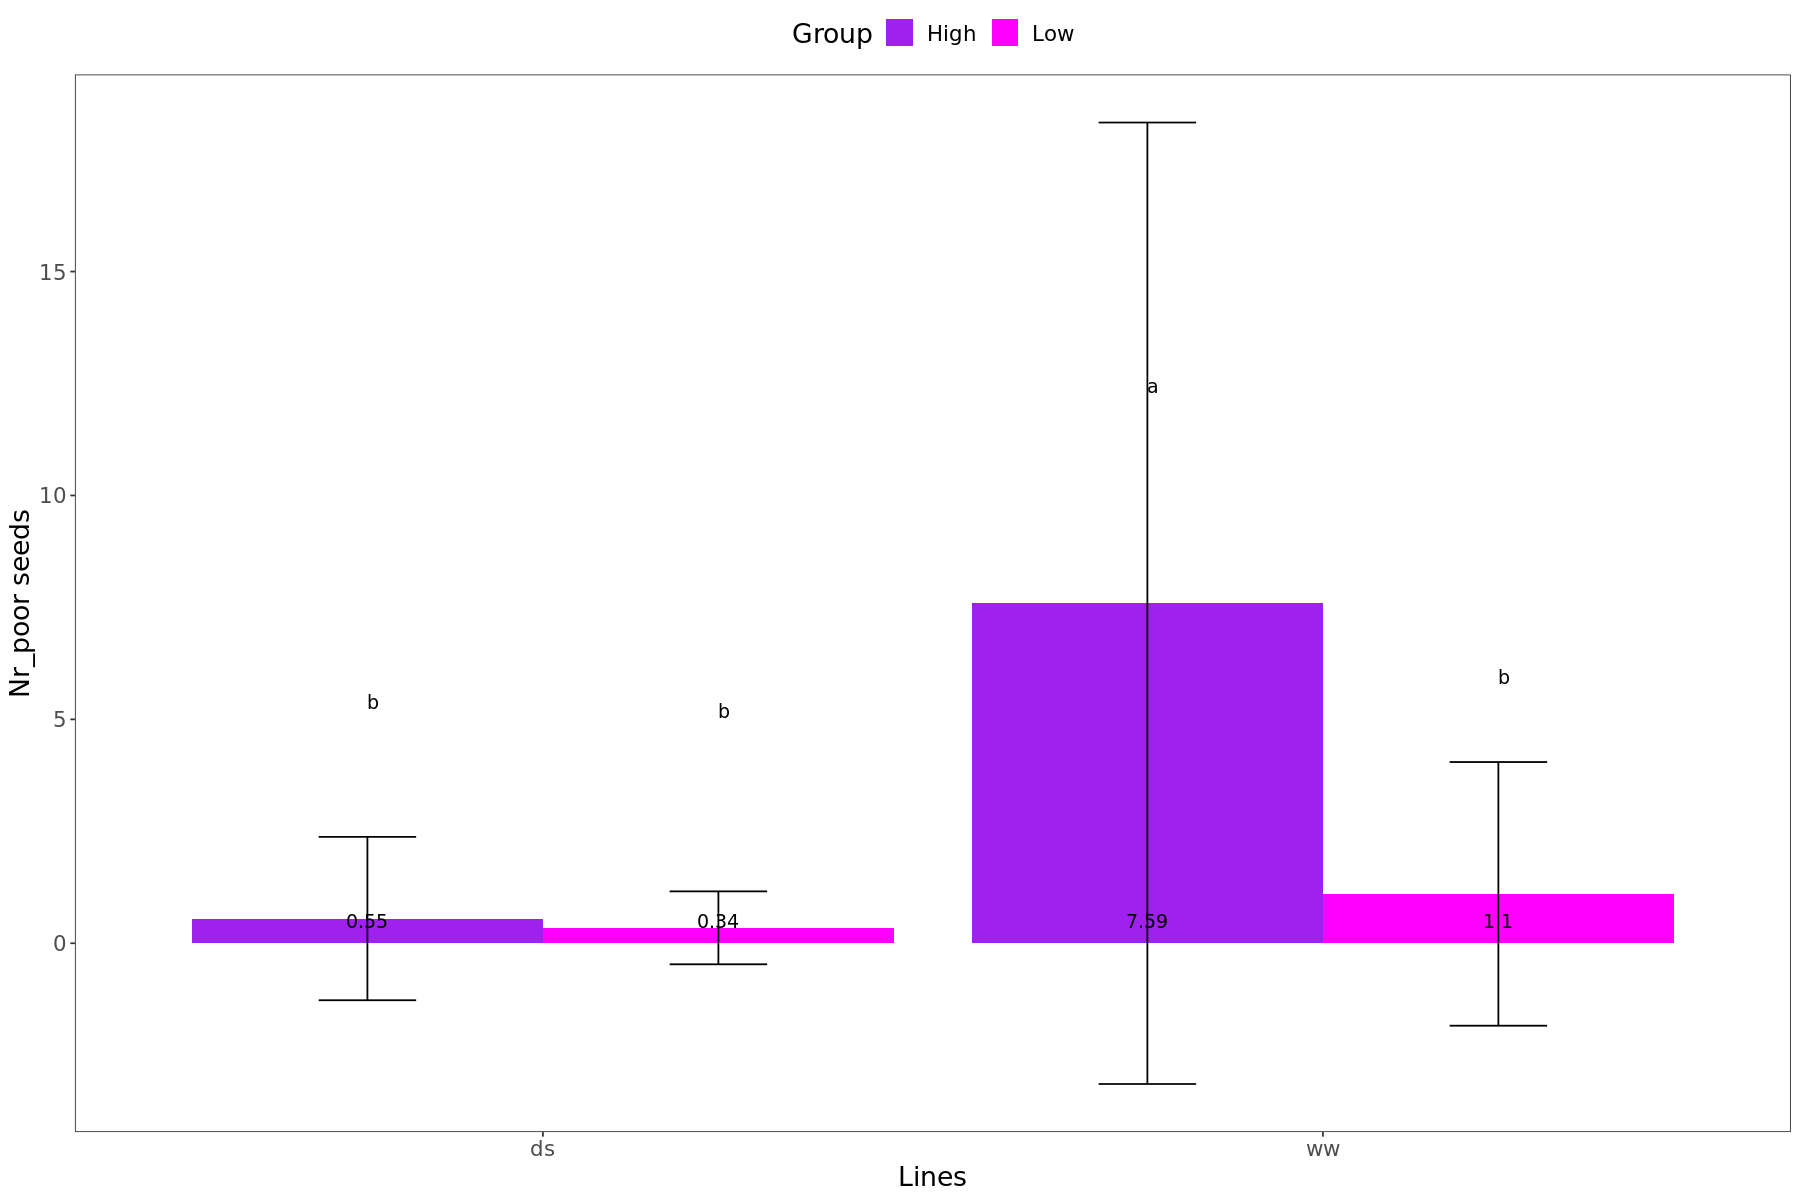

In [269]:
options(repr.plot.width=15,  repr.plot.height=10)
ps <- ggplot(data=summary_ps_gt, aes(x =treatment, y = mean, fill=Group )) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-15, hjust=.05, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_poor seeds") +
   theme_bw() +
scale_fill_manual(values=c("purple","magenta"))+
#theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 0.5), position = position_dodge(0.90), colour="black", size= 4)
print(ps)

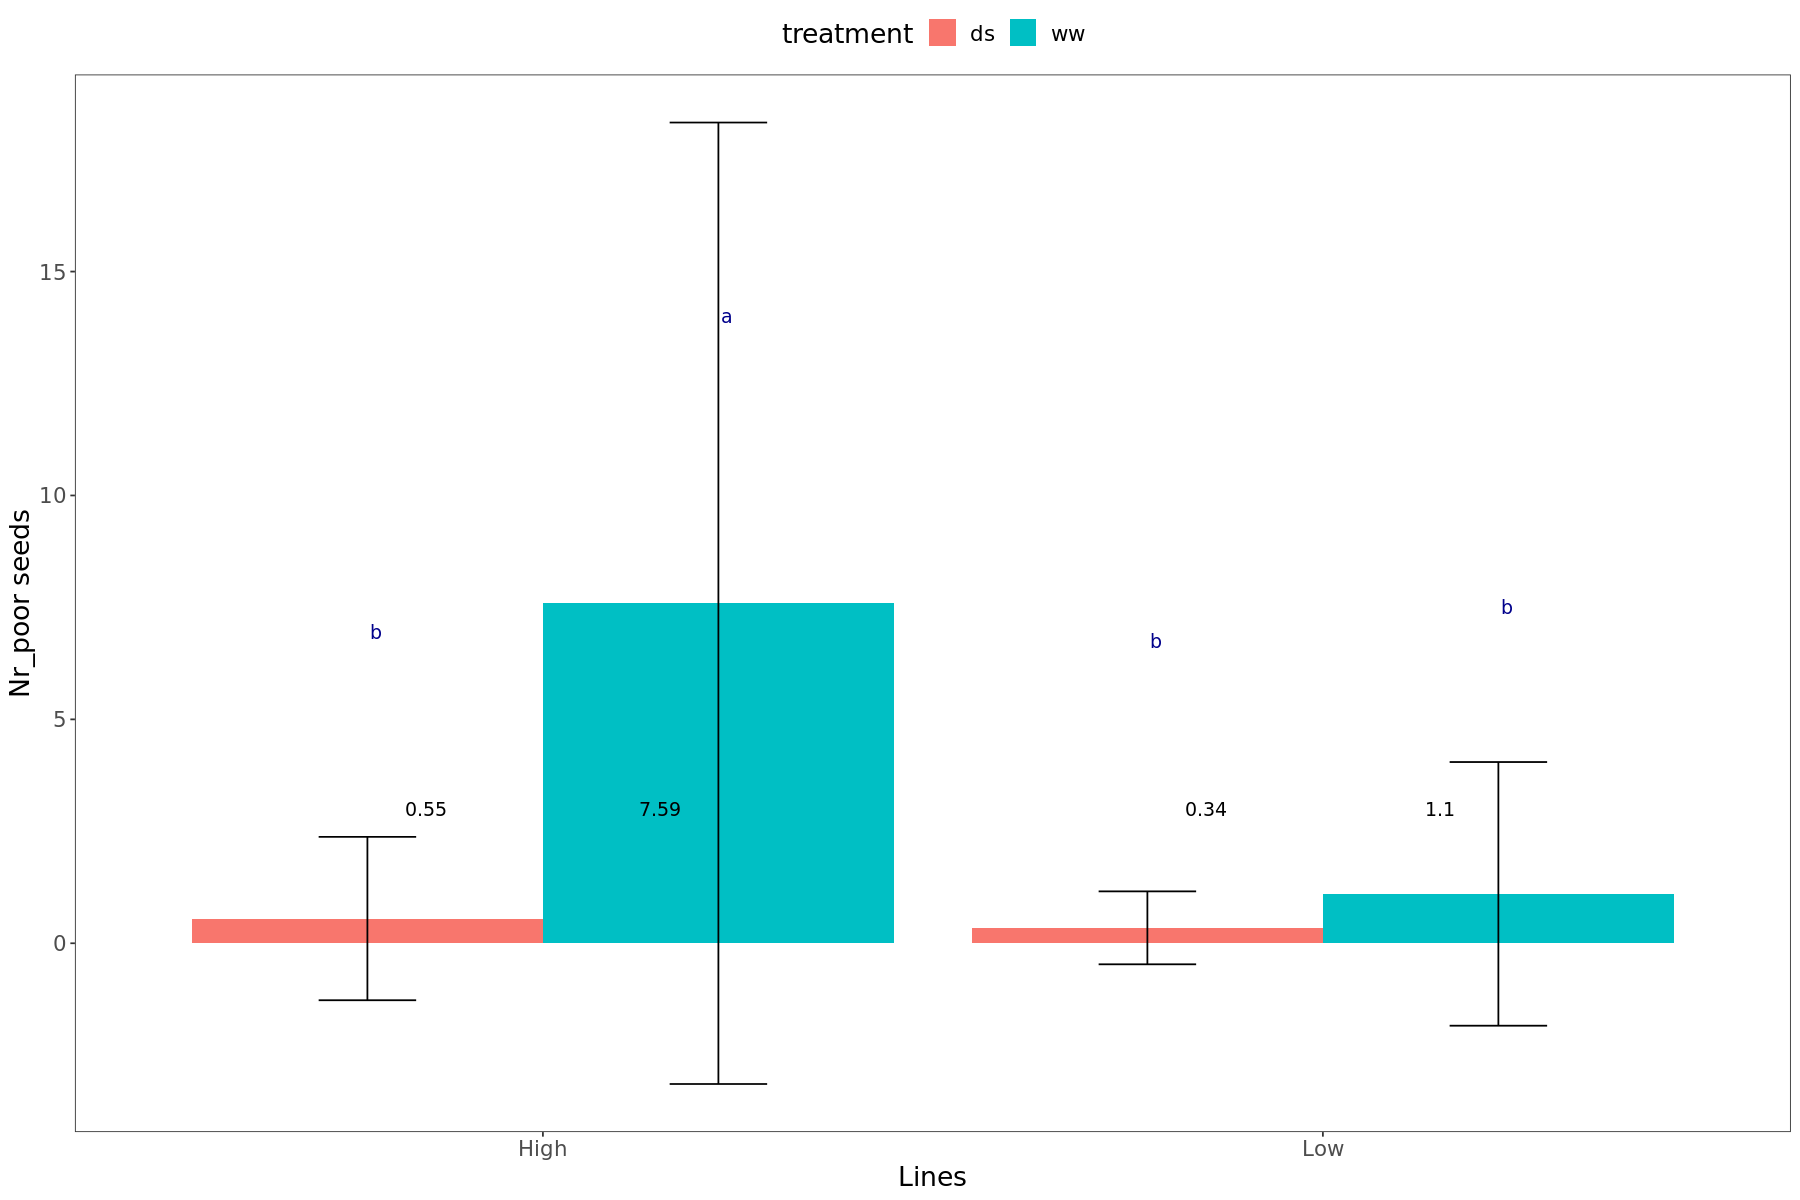

In [270]:
options(repr.plot.width=15,  repr.plot.height=10)
ps2 <- ggplot(data=summary_ps_gt, aes(x =Group, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-20, hjust=-.2, size = 4, colour = "darkblue") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_poor seeds") +
   theme_bw() +
#theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 3), position = position_dodge(0.60), colour="black", size= 4)
print(ps2)

# Qualified seeds

str(final.data)

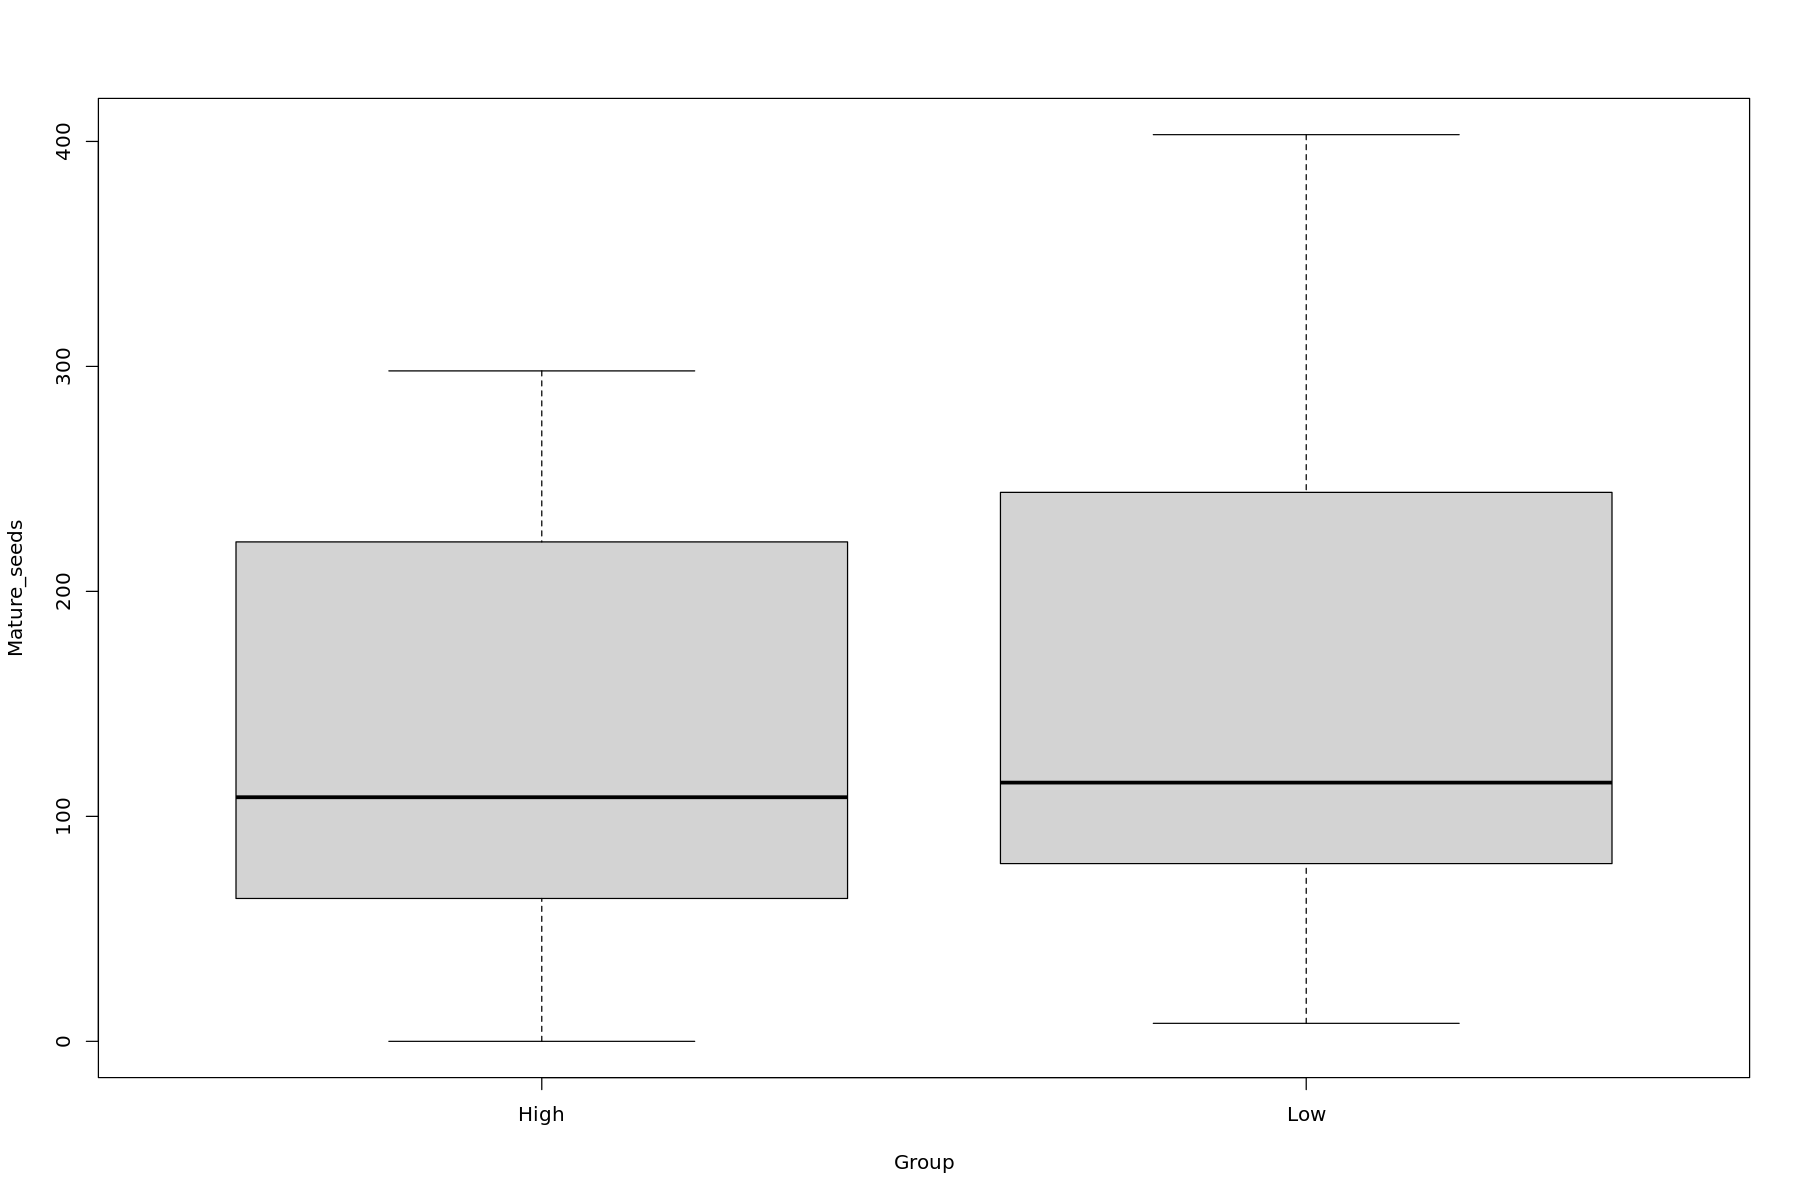

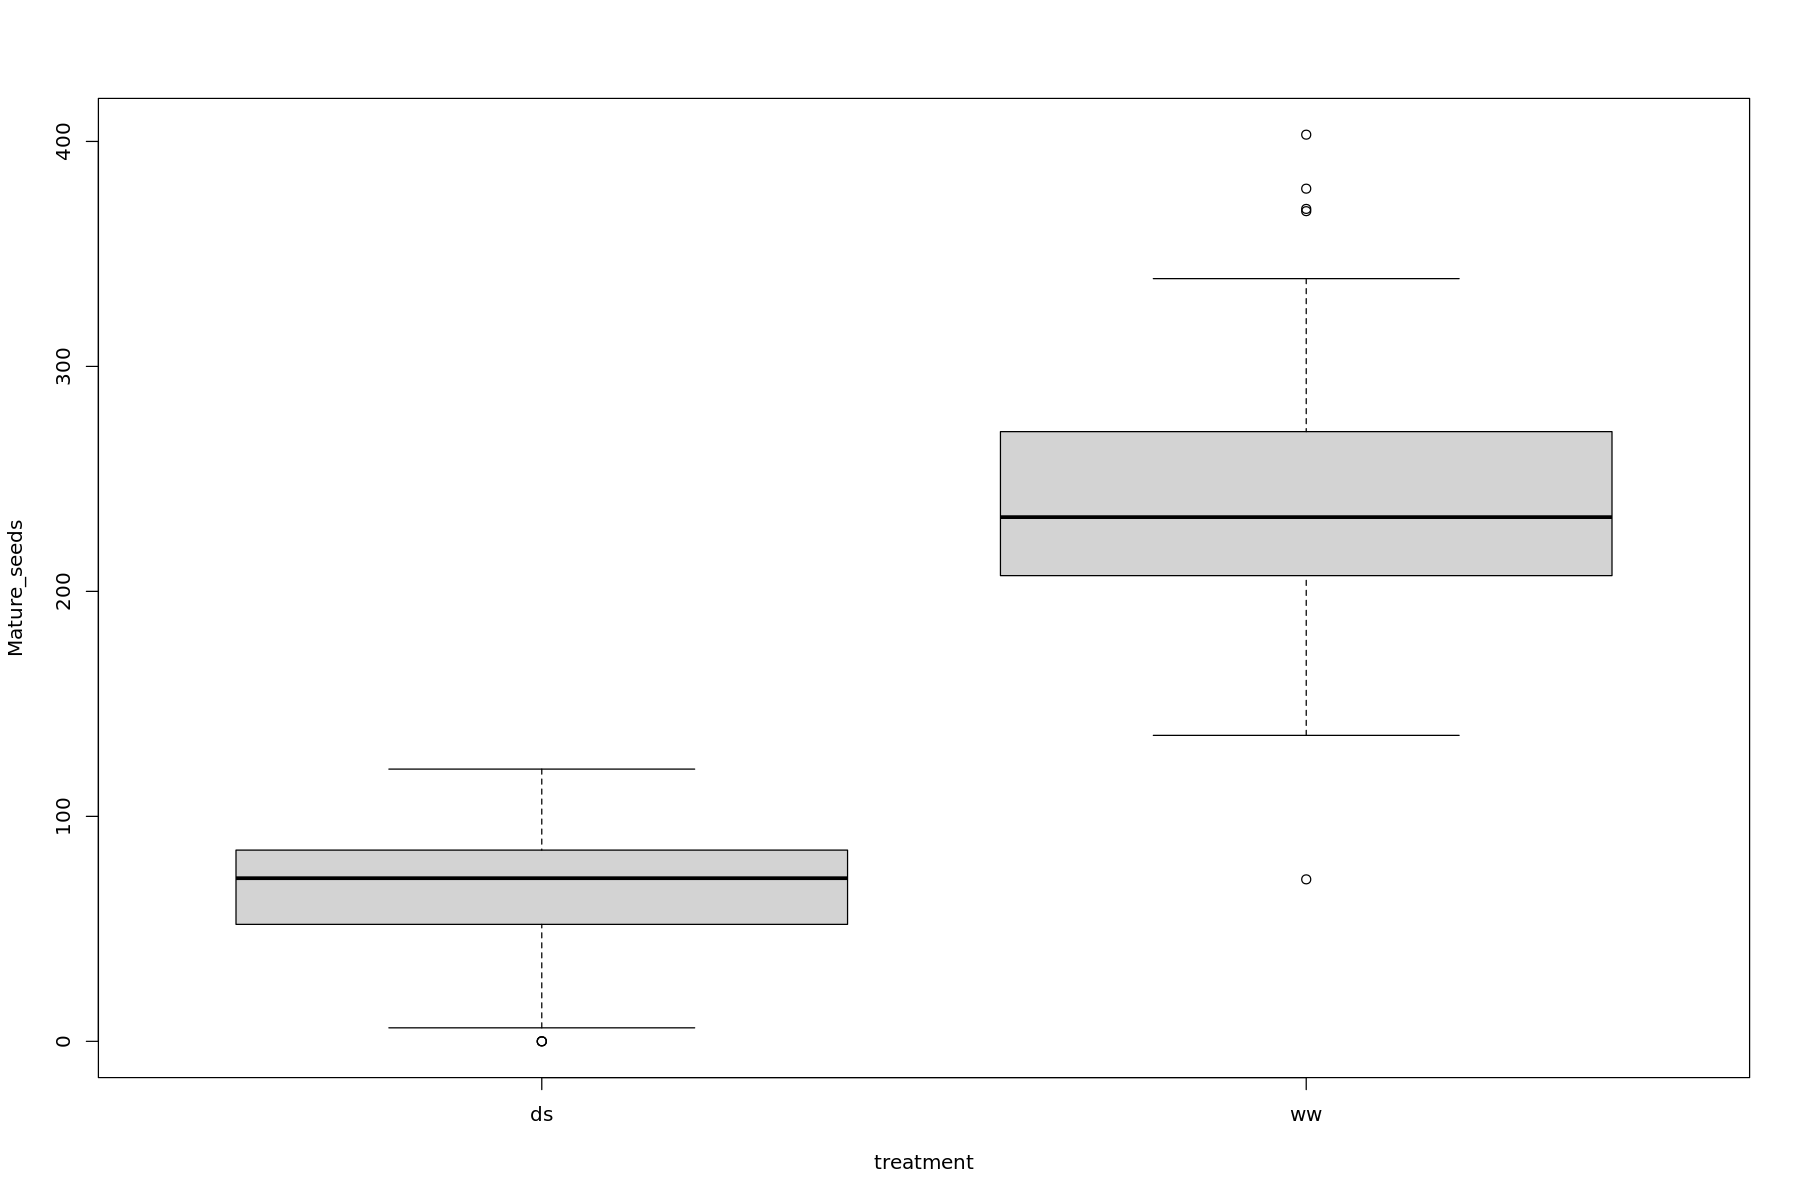

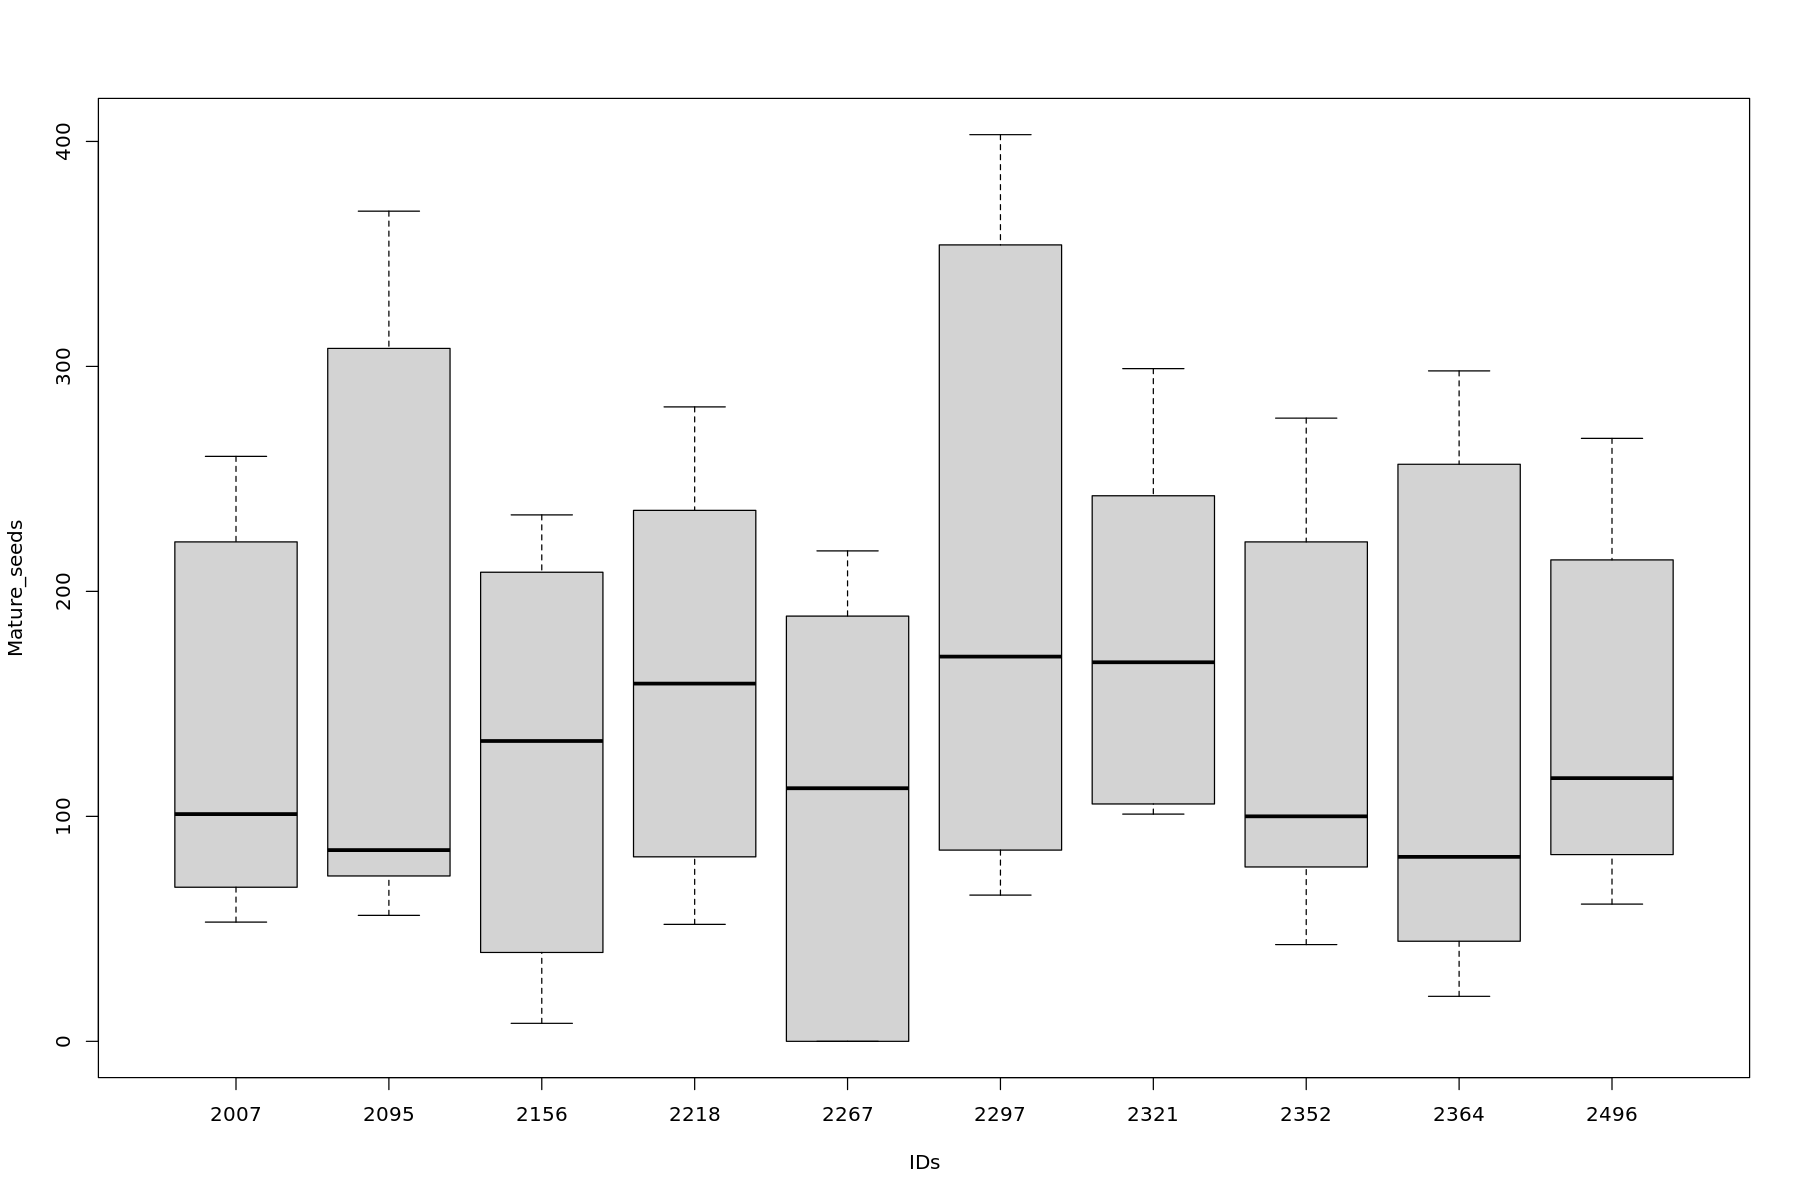

In [271]:
boxplot(Mature_seeds~Group, data=final.data)
boxplot(Mature_seeds~treatment, data=final.data)
boxplot(Mature_seeds~IDs, data=final.data)


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


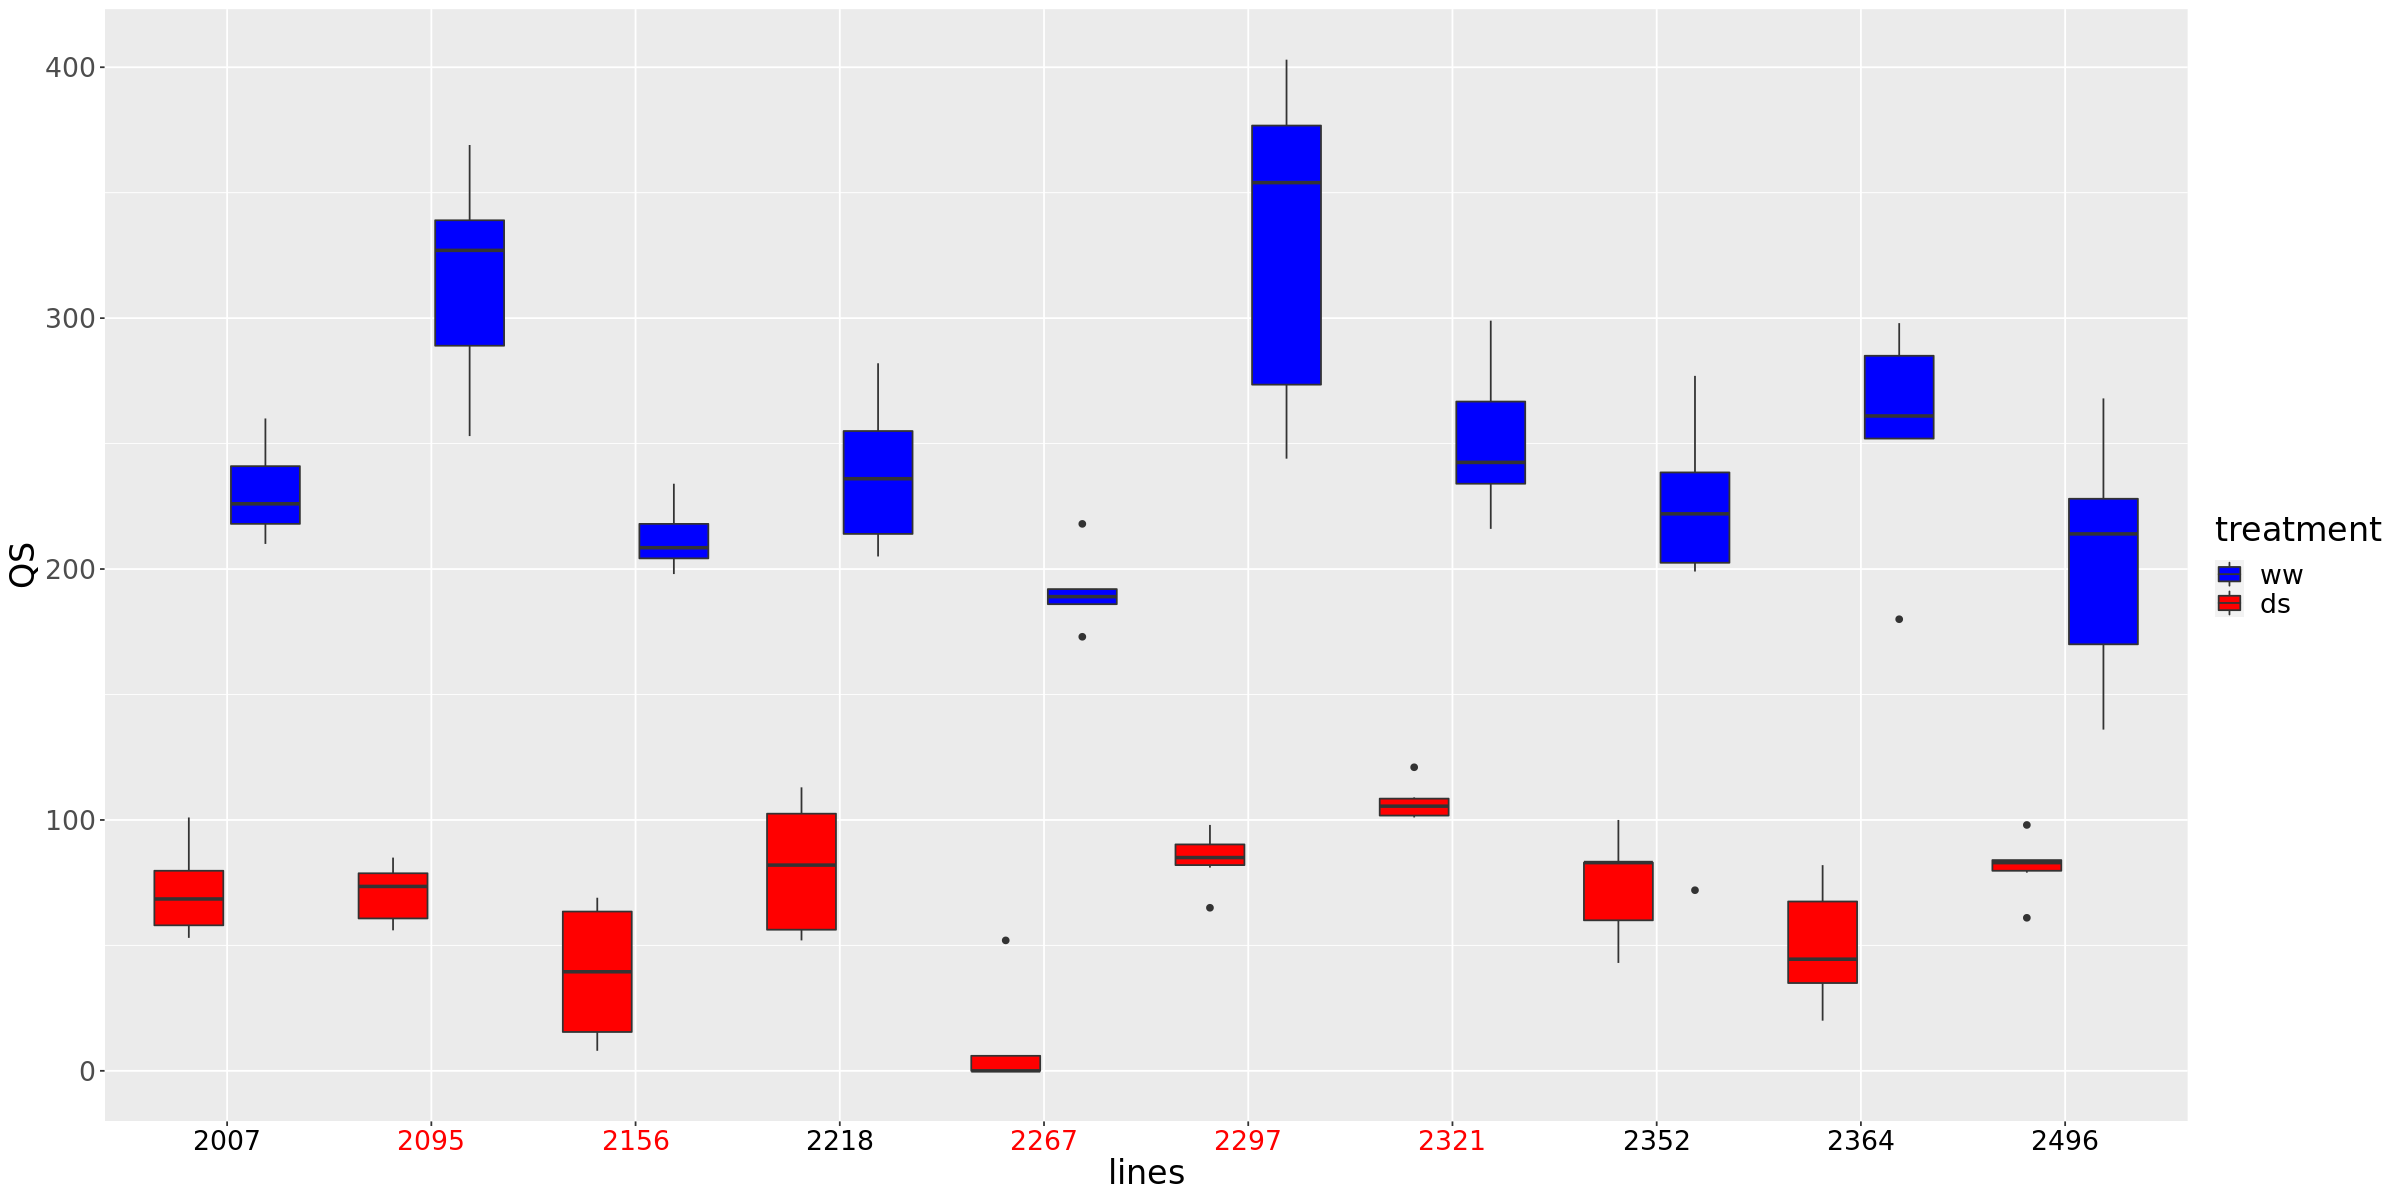

In [272]:
options(repr.plot.width=20, repr.plot.height=10)
QS <- ggplot(final.data, aes(x=IDs, y=Mature_seeds,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="QS", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(QS)

In [273]:
MS_AN<- aov(Mature_seeds~treatment*IDs, data=final.data)
summary(MS_AN)


#mood.medtest(Mature_seeds~Group, data=final.data, exact=TRUE)
MS_AN_G<- aov(Mature_seeds~treatment*Group, data=final.data)
summary(MS_AN_G)

tukey<- TukeyHSD(MS_AN, conf.levels=.95)
cld<- multcompLetters4(MS_AN, tukey)
cld



              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 874282  874282 767.533  < 2e-16 ***
IDs            9  98259   10918   9.585 3.03e-10 ***
treatment:IDs  9  49298    5478   4.809 2.78e-05 ***
Residuals     94 107074    1139                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1 874282  874282 414.919 <2e-16 ***
Group             1  19016   19016   9.025 0.0033 ** 
treatment:Group   1   3832    3832   1.819 0.1802    
Residuals       110 231783    2107                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ww  ds 
"a" "b" 

$IDs
 2297  2095  2321  2218  2352  2007  2364  2496  2156  2267 
  "a"  "ab" "abc" "bcd" "cde" "bcd" "bcd" "cde"  "de"   "e" 

$`treatment:IDs`
ww:2297 ww:2095 ww:2364 ww:2321 ww:2218 ww:2007 ww:2156 ww:2352 ww:2496 ww:2267 
    "a"    "ab"    "bc"    "bc"     "c"     "c"     "c"     "c"     "c"     "c" 
ds:2321 ds:2297 ds:2496 ds:2218 ds:2352 ds:2007 ds:2095 ds:2364 ds:2156 ds:2267 
    "d"    "de"    "de"    "de"    "de"    "de"    "de"    "de"    "de"     "e" 


In [274]:
summary_Qs<- group_by(final.data, treatment, IDs)%>%
summarise(mean=mean(Mature_seeds), sd=sd(Mature_seeds))%>%
arrange(desc(mean))
#View(summary_Qs)


cld_Qs<- as.data.frame.list(cld$`treatment:IDs`)
summary_Qs$tukey<- cld_Qs$Letters
View(summary_Qs)
write.table(summary_Qs,"summary_Int_QS_August.csv")

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd        tukey
1  ww        2297 331.00000 67.628396 a    
2  ww        2095 315.40000 45.153073 ab   
3  ww        2364 255.20000 45.877009 bc   
4  ww        2321 251.00000 30.252273 bc   
5  ww        2218 237.83333 29.708024 c    
6  ww        2007 231.00000 19.849433 c    
7  ww        2156 212.16667 13.090709 c    
8  ww        2352 205.50000 70.630730 c    
9  ww        2496 203.33333 48.623725 c    
10 ww        2267 191.60000 16.440803 c    
11 ds        2321 107.16667  7.494442 d    
12 ds        2297  84.33333 11.236844 de   
13 ds        2496  81.33333 11.927559 de   
14 ds        2218  81.00000 27.173517 de   
15 ds        2352  73.80000 22.331592 de   
16 ds        2007  71.50000 18.108009 de   
17 ds        2095  70.83333 11.889772 de   
18 ds        2364  49.66667 24.221203 de   
19 ds        2156  39.16667 27.228049 de   
20 ds        2267  11.60000 22.733236 e

In [88]:
QS_Int <- read.table("summary_Int_QS_August.csv")
QS_Int$IDs <- as.factor(QS_Int $IDs)
QS_Int$treatment <- as.factor(QS_Int $treatment)
str(QS_Int )
class(QS_Int)

'data.frame':	20 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 2 ...
 $ IDs      : Factor w/ 10 levels "2007","2095",..: 6 2 9 7 4 1 3 8 10 5 ...
 $ mean     : num  331 315 255 251 238 ...
 $ sd       : num  67.6 45.2 45.9 30.3 29.7 ...
 $ tukey    : chr  "a" "ab" "bc" "bc" ...


[1] "data.frame"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


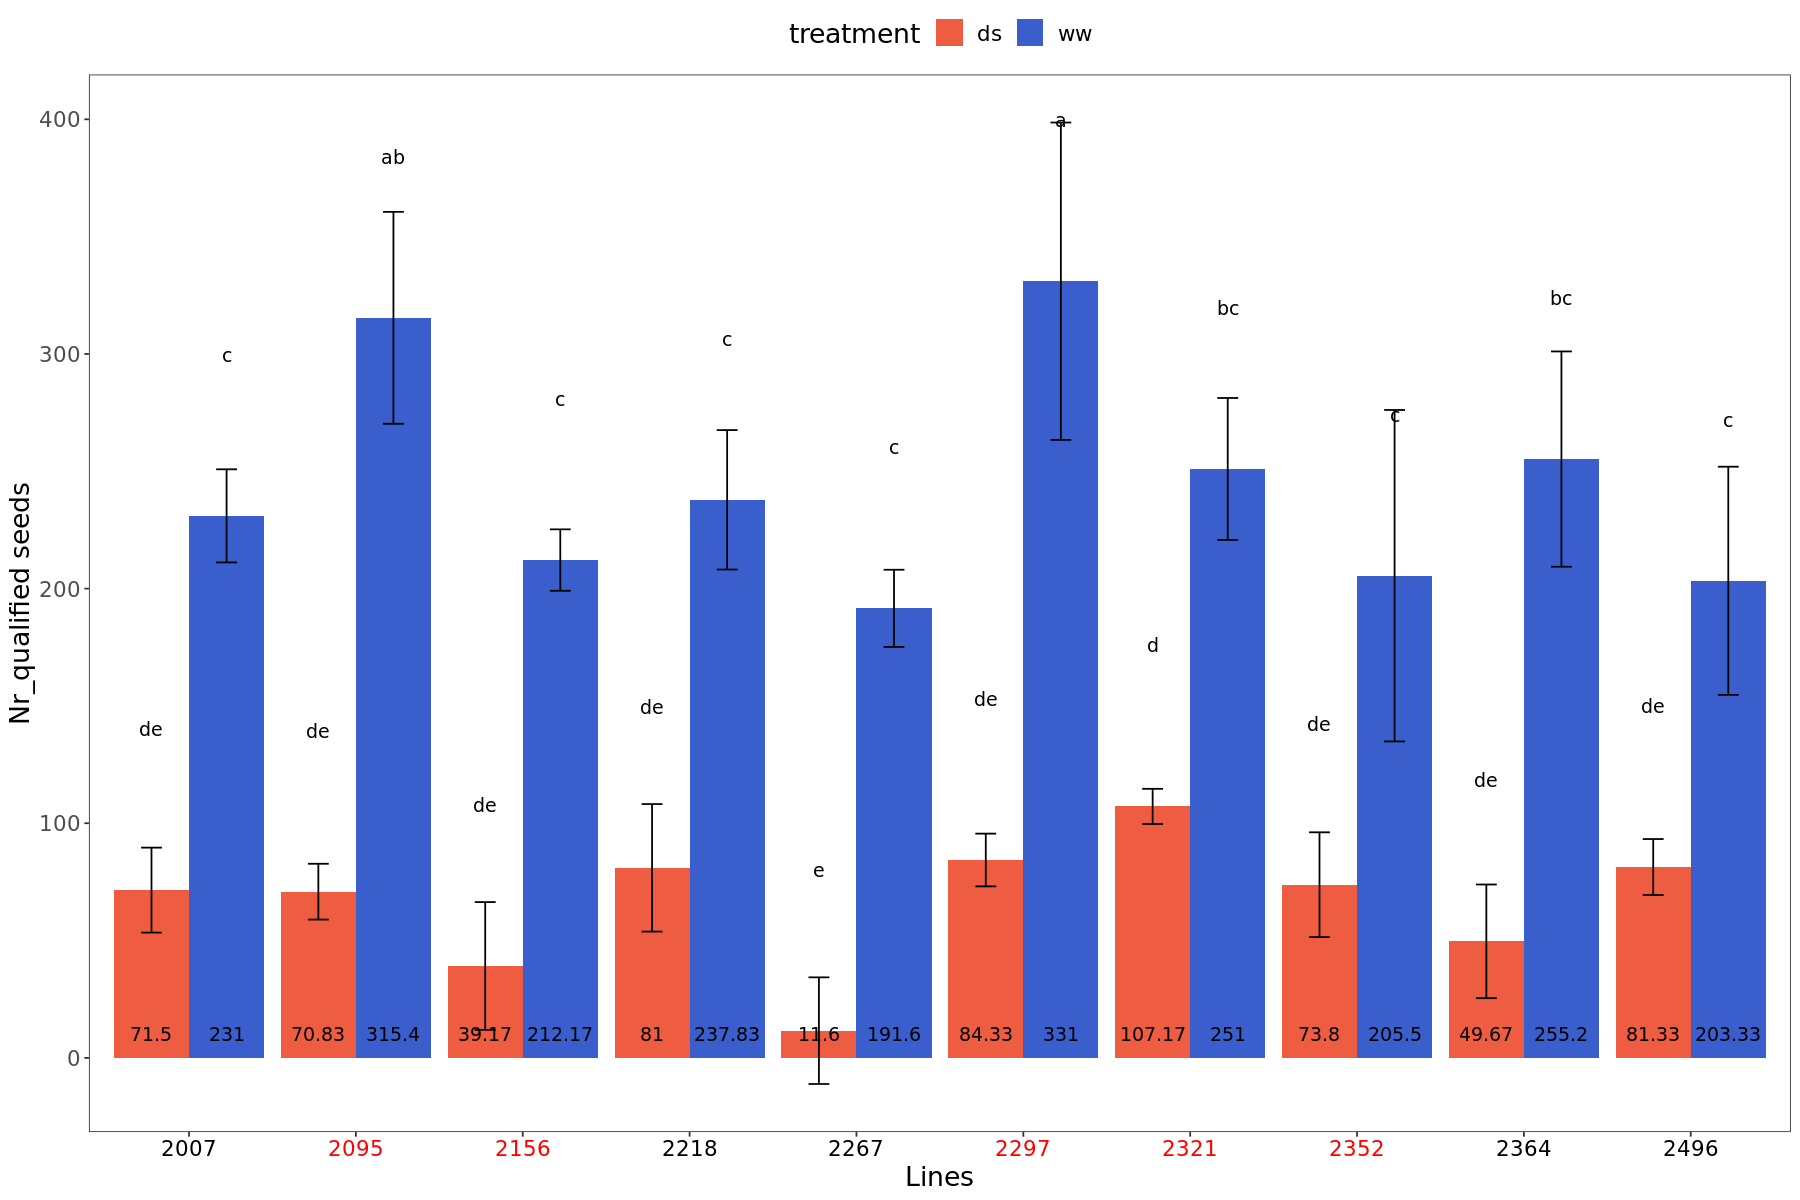

In [91]:
options(repr.plot.width=15,  repr.plot.height=10)
graph <- ggplot(data=as.data.frame(QS_Int), aes(x =IDs, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_qualified seeds") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
scale_fill_manual(values=c("tomato2","royalblue3"))+

theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 10), position = position_dodge(0.90), colour="black", size= 4)
print(graph)

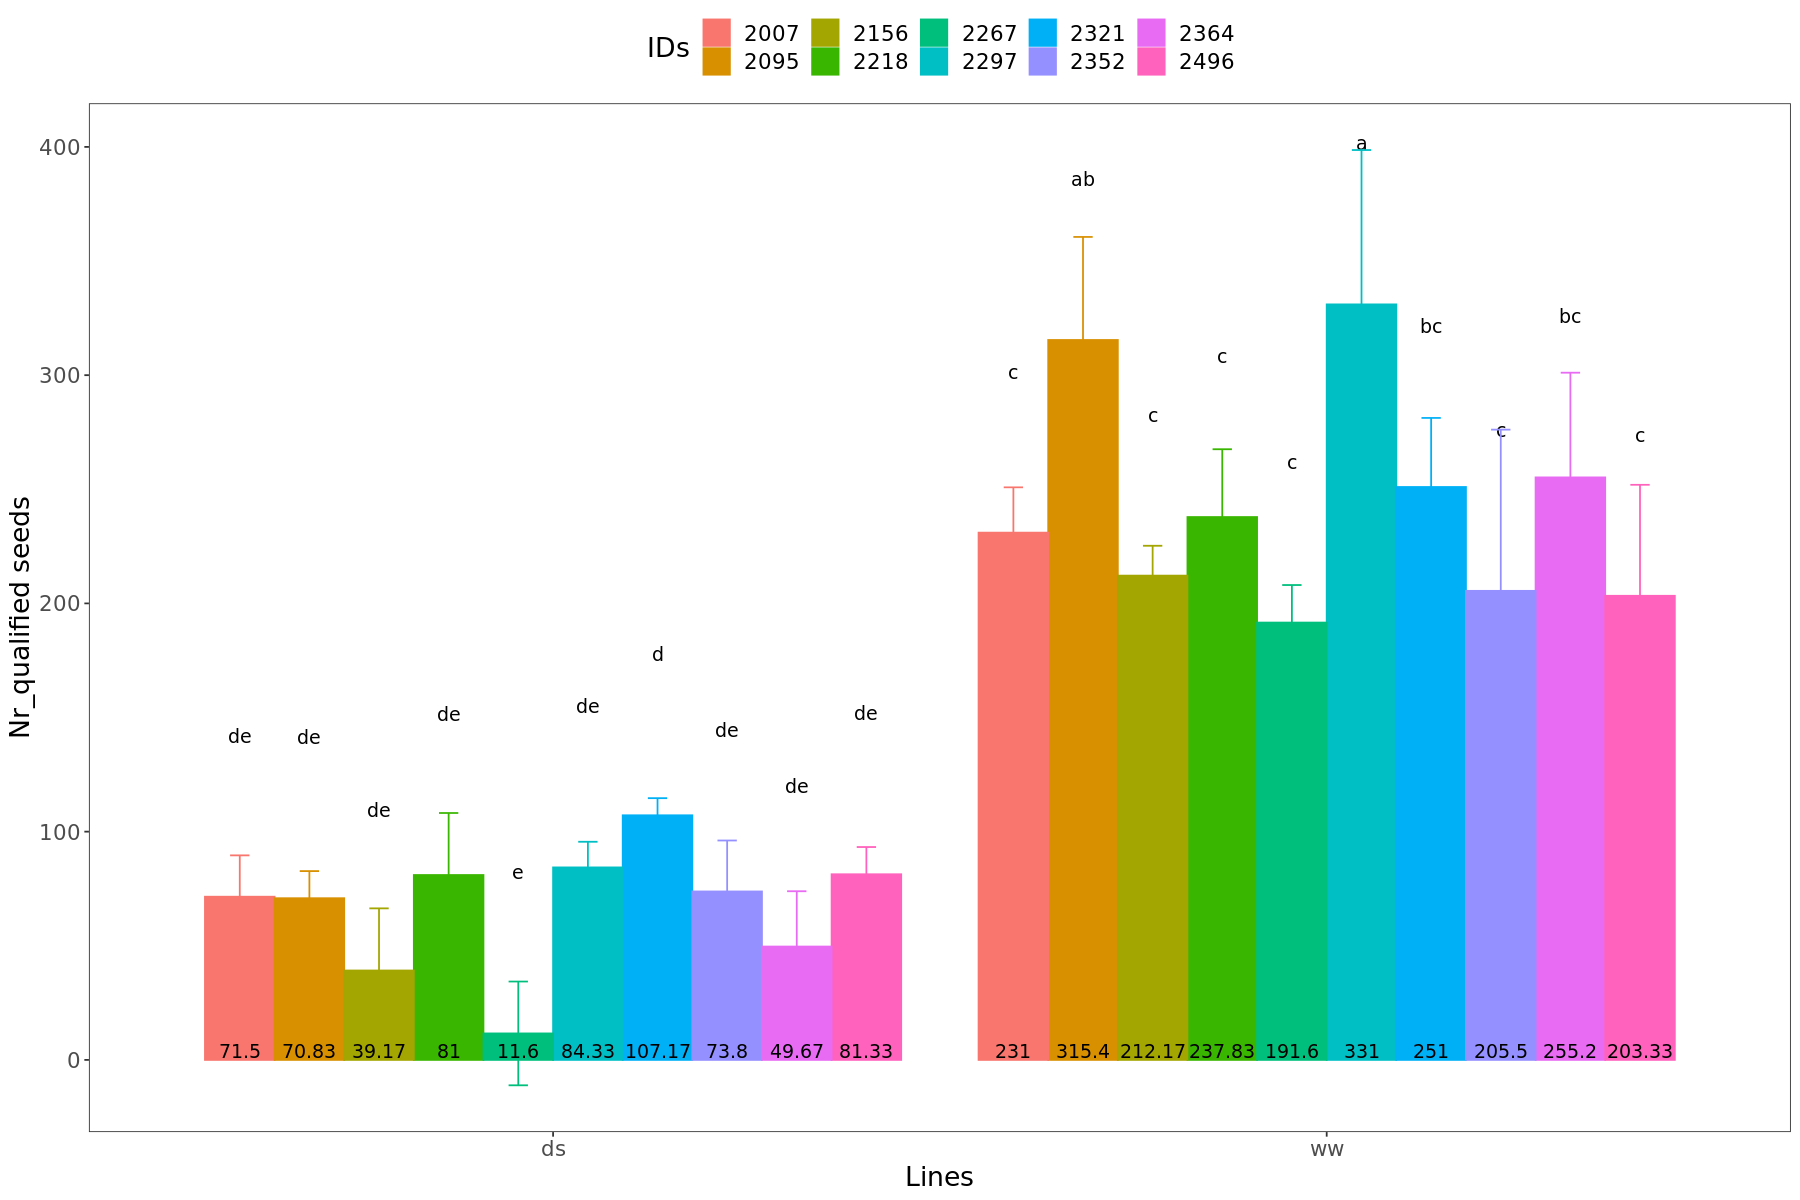

In [92]:
options(repr.plot.width=15,  repr.plot.height=10)

QS_Int_l <- ggplot(data=as.data.frame(QS_Int), aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_qualified seeds") +
   theme_bw() +
#theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(QS_Int_l)

In [278]:
pwc <- final.data %>% 
  pairwise_t_test(
   Mature_seeds ~ Group, pool.sd = TRUE,
    p.adjust.method = "bonferroni")
pwc

.y.          group1 group2 n1 n2 p     p.signif p.adj p.adj.signif
1 Mature_seeds High   Low    56 58 0.122 ns       0.122 ns

# Number of the half-full ears(spikes)

In [279]:
str(final.data)

'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

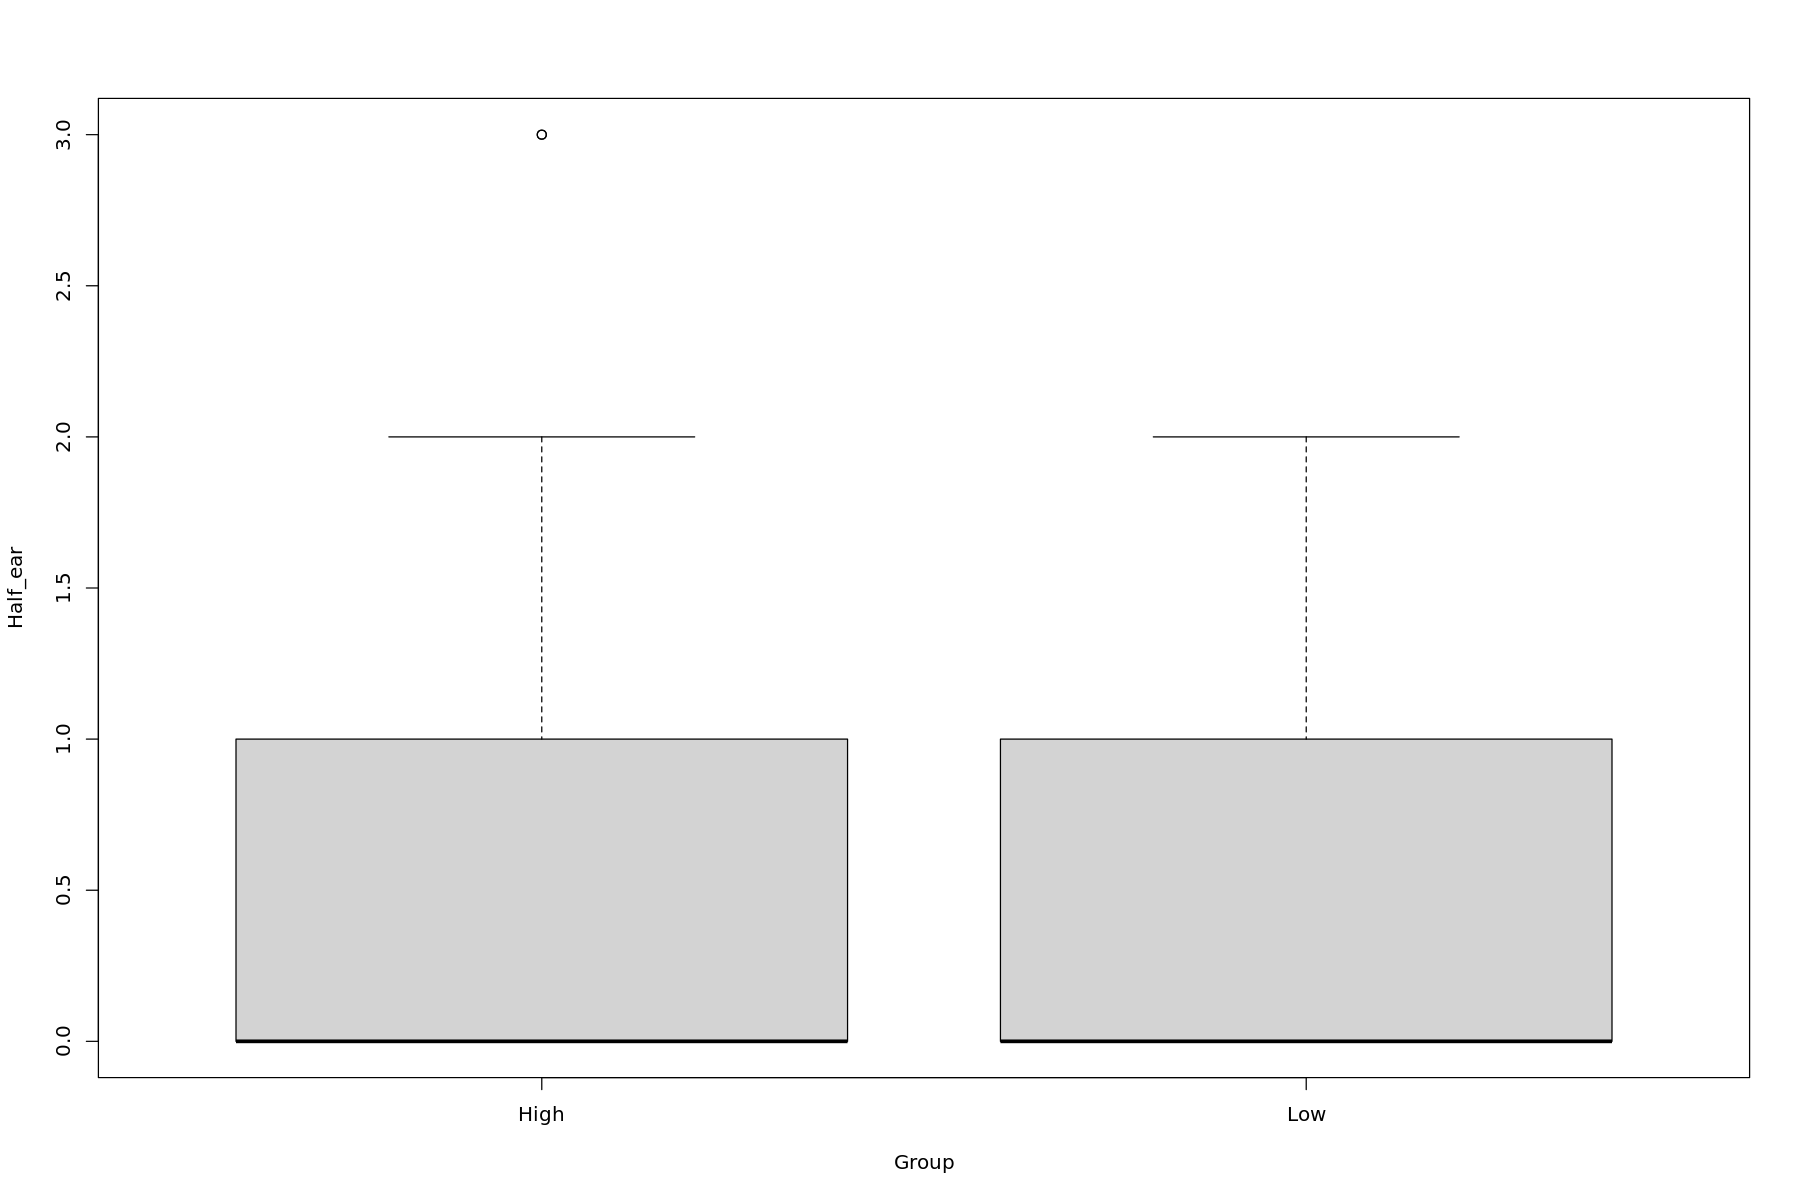

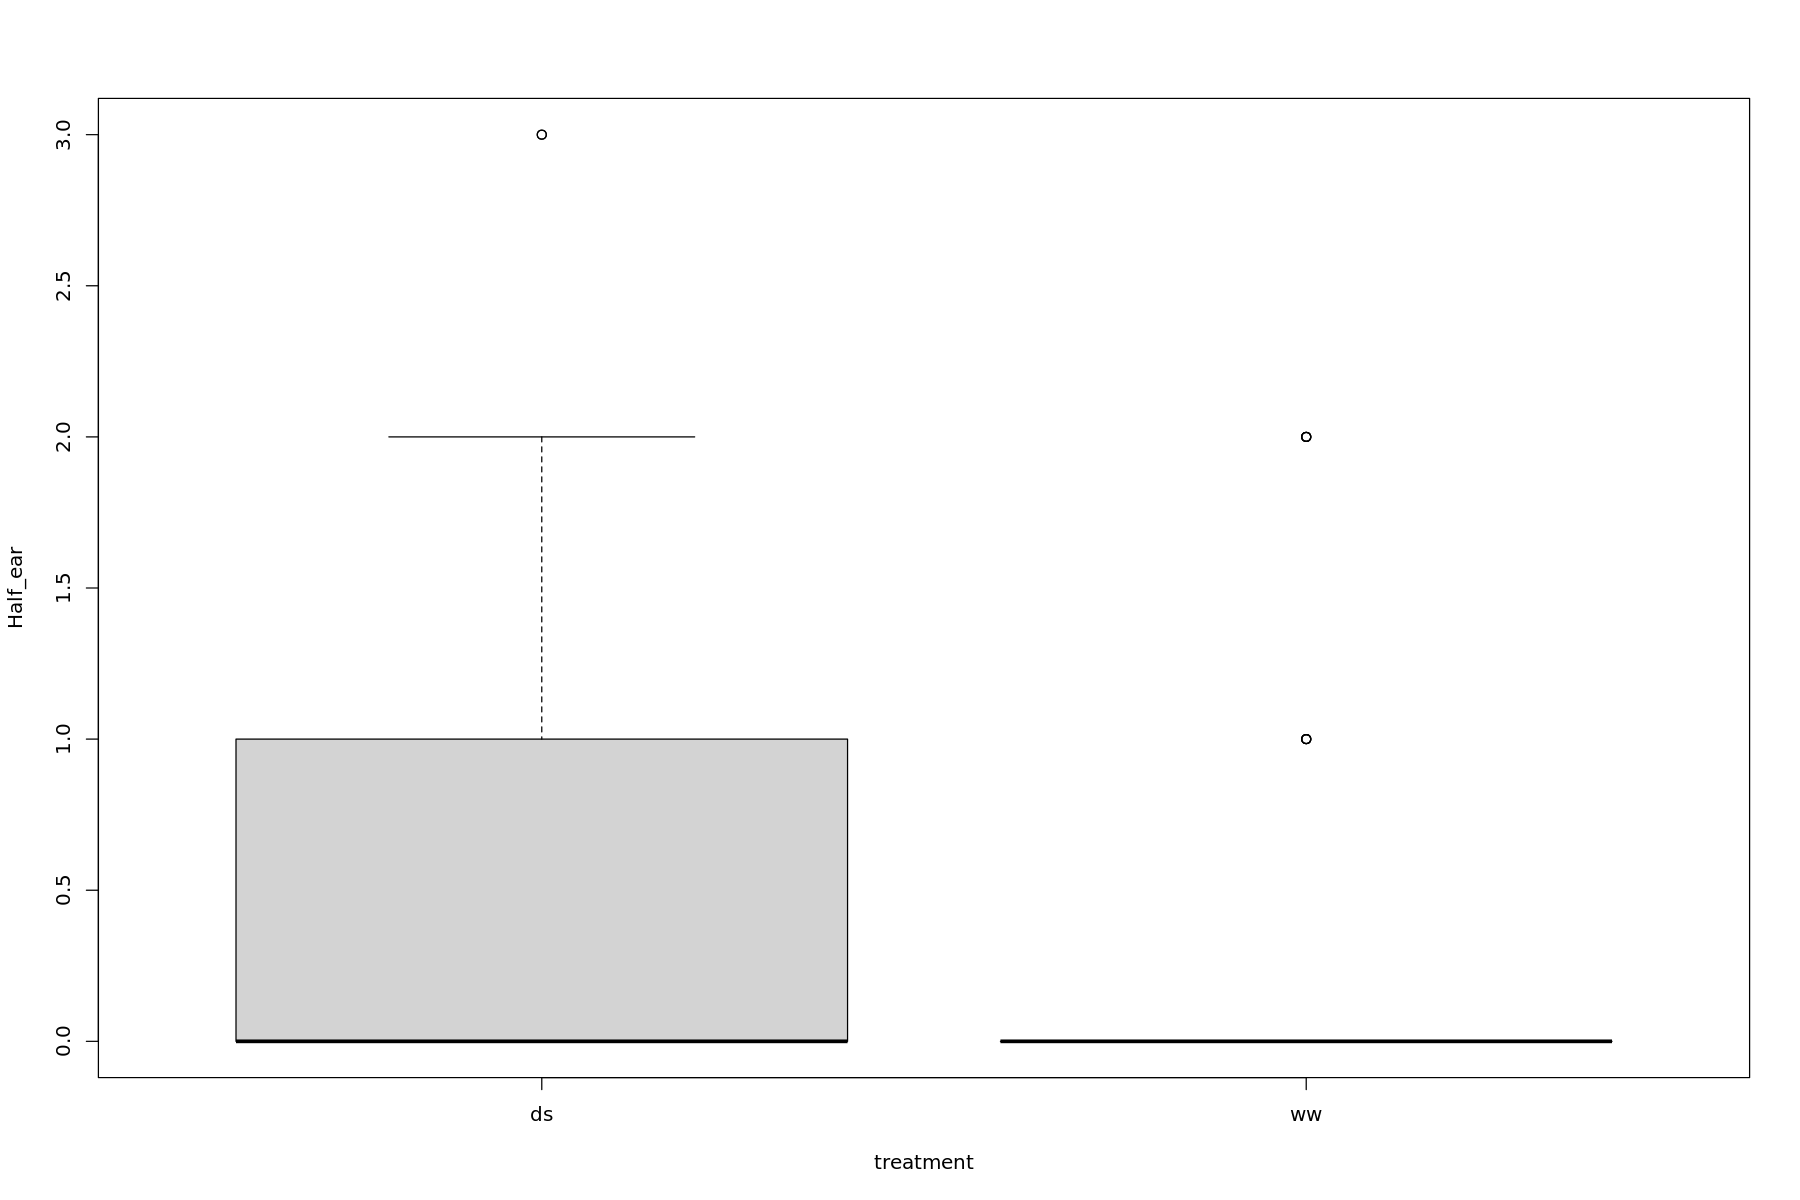

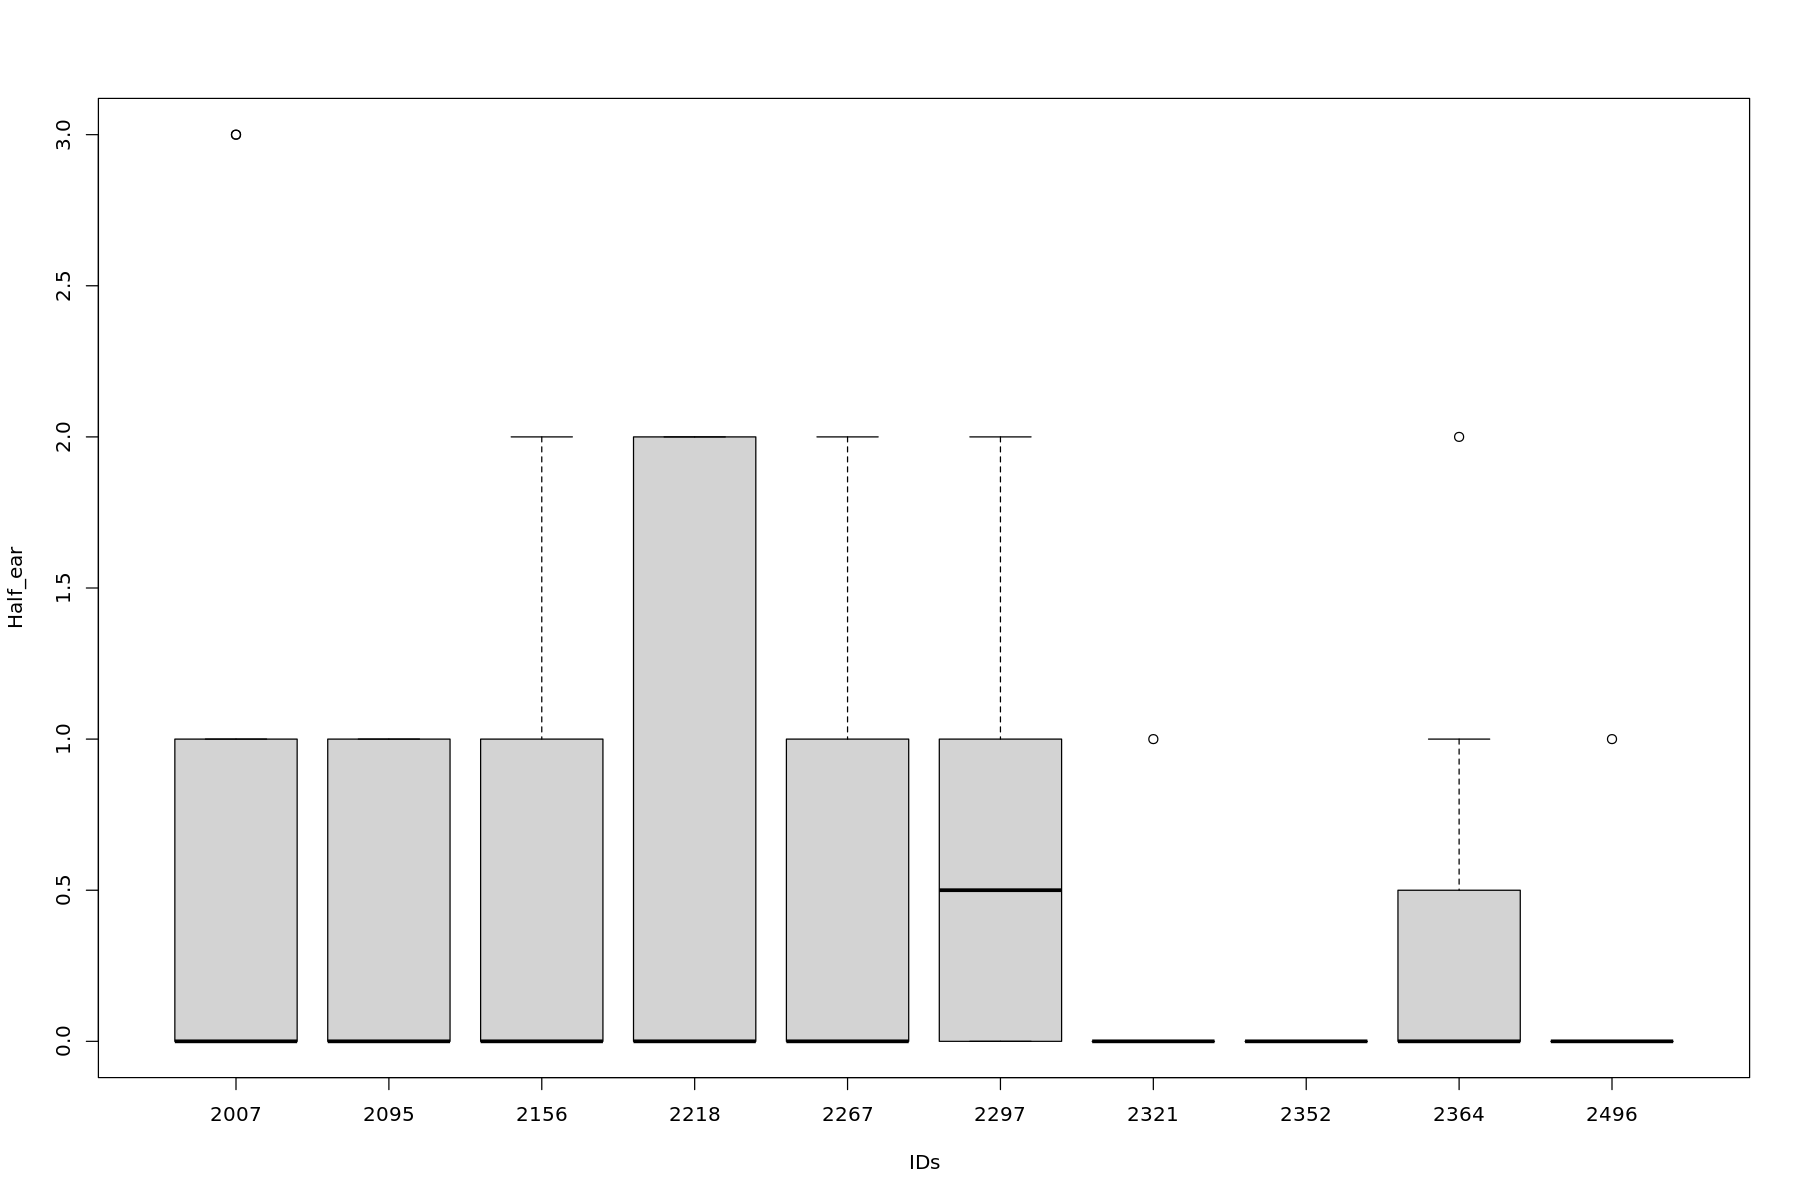

In [280]:
boxplot(Half_ear~Group, data=final.data)
boxplot(Half_ear~treatment, data=final.data)
boxplot(Half_ear~IDs, data=final.data)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


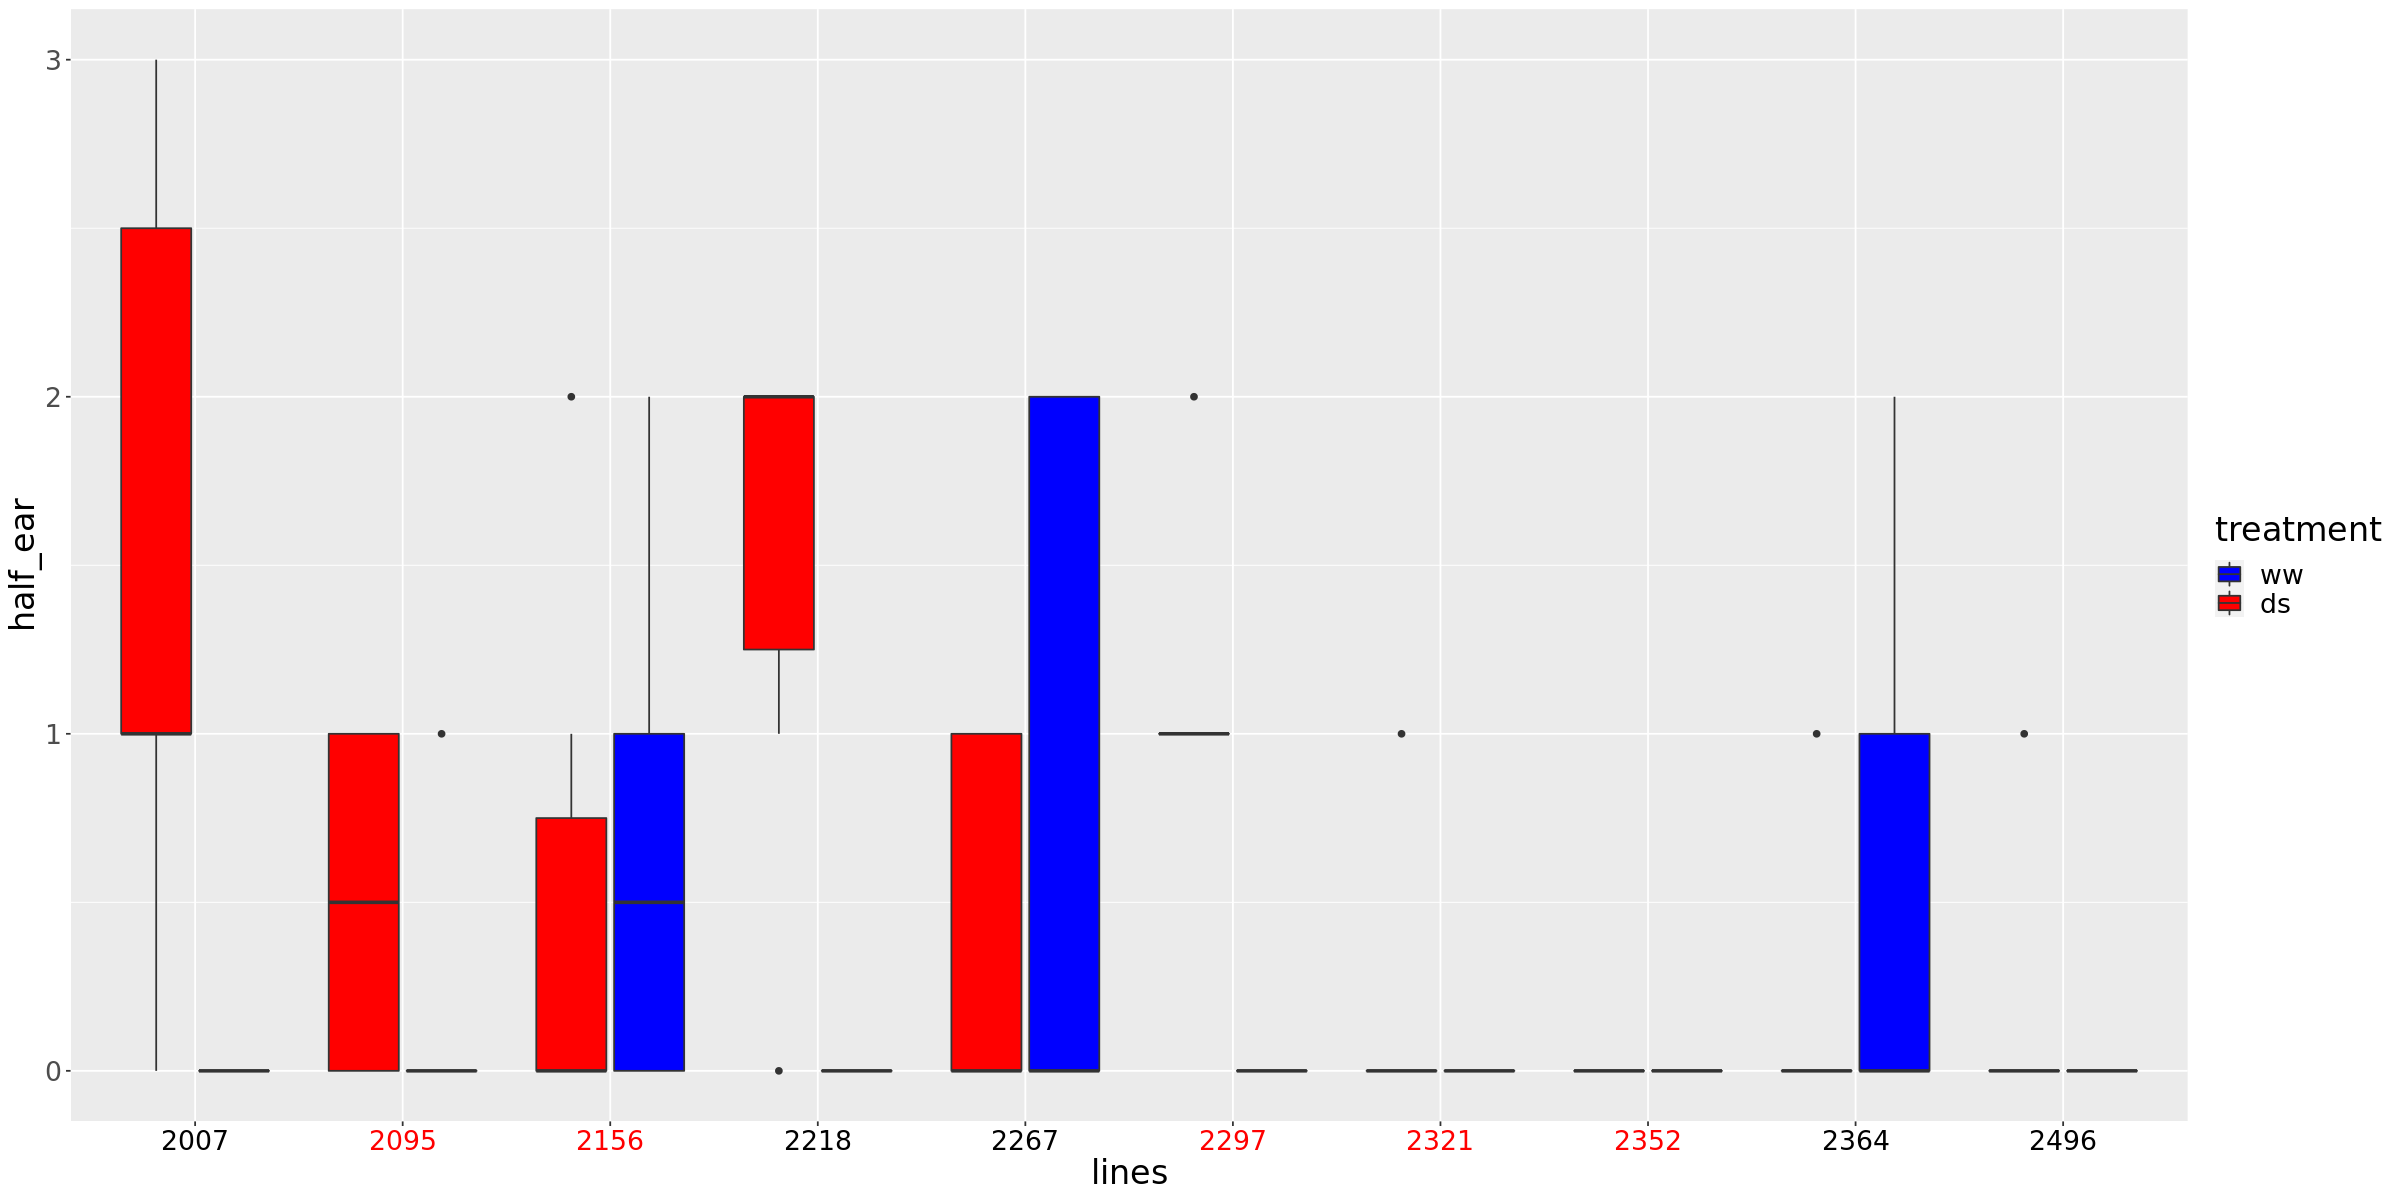

In [281]:
options(repr.plot.width=20, repr.plot.height=10)
HE <- ggplot(final.data, aes(x=IDs, y=Half_ear,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="half_ear", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))



    print(HE)

In [282]:
HE_AN<- aov(Half_ear~treatment*IDs, data=final.data)
summary(HE_AN)
 tukey<- TukeyHSD(HE_AN, conf.levels=.95)
cld<- multcompLetters4(HE_AN, tukey) 
cld

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1   4.71   4.706  13.541 0.000389 ***
IDs            9   8.48   0.942   2.710 0.007500 ** 
treatment:IDs  9  13.94   1.549   4.457    7e-05 ***
Residuals     94  32.67   0.348                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ds  ww 
"a" "b" 

$IDs
$IDs$Letters
2007 2218 2267 2156 2297 2095 2364 2321 2496 2352 
 "a"  "a"  "a"  "a"  "a"  "a"  "a"  "a"  "a"  "a" 

$IDs$LetterMatrix
        a
2007 TRUE
2218 TRUE
2267 TRUE
2156 TRUE
2297 TRUE
2095 TRUE
2364 TRUE
2321 TRUE
2496 TRUE
2352 TRUE


$`treatment:IDs`
ds:2007 ds:2218 ds:2297 ww:2267 ww:2156 ww:2364 ds:2095 ds:2156 ds:2267 ww:2095 
    "a"     "a"    "ab"    "ab"    "ab"    "ab"    "ab"    "ab"    "ab"    "ab" 
ds:2321 ds:2364 ds:2496 ww:2007 ww:2218 ww:2297 ww:2321 ds:2352 ww:2352 ww:2496 
    "b"     "b"     "b"     "b"     "b"     "b"     "b"     "b"     "b"     "b" 


In [283]:
HE_AN_G<- aov(Half_ear~treatment*Group, data=final.data)
summary(HE_AN_G)

                 Df Sum Sq Mean Sq F value  Pr(>F)   
treatment         1   4.71   4.706   9.608 0.00246 **
Group             1   0.95   0.955   1.949 0.16550   
treatment:Group   1   0.25   0.254   0.519 0.47269   
Residuals       110  53.87   0.490                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [284]:
pwc1 <- final.data %>% 
pairwise_t_test(Half_ear~treatment, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc1


pwc2 <- final.data %>% 
pairwise_t_test(Half_ear~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc2

.y.      group1 group2 n1 n2 p      p.signif p.adj  p.adj.signif
1 Half_ear ds     ww     58 56 0.0025 **       0.0025 **

.y.      group1 group2 n1 n2 p     p.signif p.adj p.adj.signif
1 Half_ear High   Low    56 58 0.164 ns       0.164 ns

In [285]:
summary_HE<- group_by(final.data, treatment, IDs) %>%
summarise(mean=(round(mean(Half_ear),2)), sd=sd(Half_ear)) %>%
arrange(desc(mean))
View(summary_HE)


cld_HE<- as.data.frame.list(cld$`treatment:IDs`)
summary_HE$tukey<- cld_HE$Letters
View(summary_HE)
write.table(summary_HE, "summary_int_HE_August.csv")

`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean sd       
1  ds        2007 1.50 1.2247449
2  ds        2218 1.50 0.8366600
3  ds        2297 1.17 0.4082483
4  ww        2267 0.80 1.0954451
5  ww        2156 0.67 0.8164966
6  ww        2364 0.60 0.8944272
7  ds        2095 0.50 0.5477226
8  ds        2156 0.50 0.8366600
9  ds        2267 0.40 0.5477226
10 ww        2095 0.20 0.4472136
11 ds        2321 0.17 0.4082483
12 ds        2364 0.17 0.4082483
13 ds        2496 0.17 0.4082483
14 ds        2352 0.00 0.0000000
15 ww        2007 0.00 0.0000000
16 ww        2218 0.00 0.0000000
17 ww        2297 0.00 0.0000000
18 ww        2321 0.00 0.0000000
19 ww        2352 0.00 0.0000000
20 ww        2496 0.00 0.0000000

treatment IDs  mean sd        tukey
1  ds        2007 1.50 1.2247449 a    
2  ds        2218 1.50 0.8366600 a    
3  ds        2297 1.17 0.4082483 ab   
4  ww        2267 0.80 1.0954451 ab   
5  ww        2156 0.67 0.8164966 ab   
6  ww        2364 0.60 0.8944272 ab   
7  ds        2095 0.50 0.5477226 ab   
8  ds        2156 0.50 0.8366600 ab   
9  ds        2267 0.40 0.5477226 ab   
10 ww        2095 0.20 0.4472136 ab   
11 ds        2321 0.17 0.4082483 b    
12 ds        2364 0.17 0.4082483 b    
13 ds        2496 0.17 0.4082483 b    
14 ds        2352 0.00 0.0000000 b    
15 ww        2007 0.00 0.0000000 b    
16 ww        2218 0.00 0.0000000 b    
17 ww        2297 0.00 0.0000000 b    
18 ww        2321 0.00 0.0000000 b    
19 ww        2352 0.00 0.0000000 b    
20 ww        2496 0.00 0.0000000 b

In [286]:
HE_Int<- read.table( "summary_int_HE_August.csv")
HE_Int$IDs <- as.factor(HE_Int $IDs)
HE_Int$treatment <- as.factor(HE_Int $treatment)
str(HE_Int)

'data.frame':	20 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 1 1 1 2 2 2 1 1 1 2 ...
 $ IDs      : Factor w/ 10 levels "2007","2095",..: 1 4 6 5 3 9 2 3 5 2 ...
 $ mean     : num  1.5 1.5 1.17 0.8 0.67 0.6 0.5 0.5 0.4 0.2 ...
 $ sd       : num  1.225 0.837 0.408 1.095 0.816 ...
 $ tukey    : chr  "a" "a" "ab" "ab" ...


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


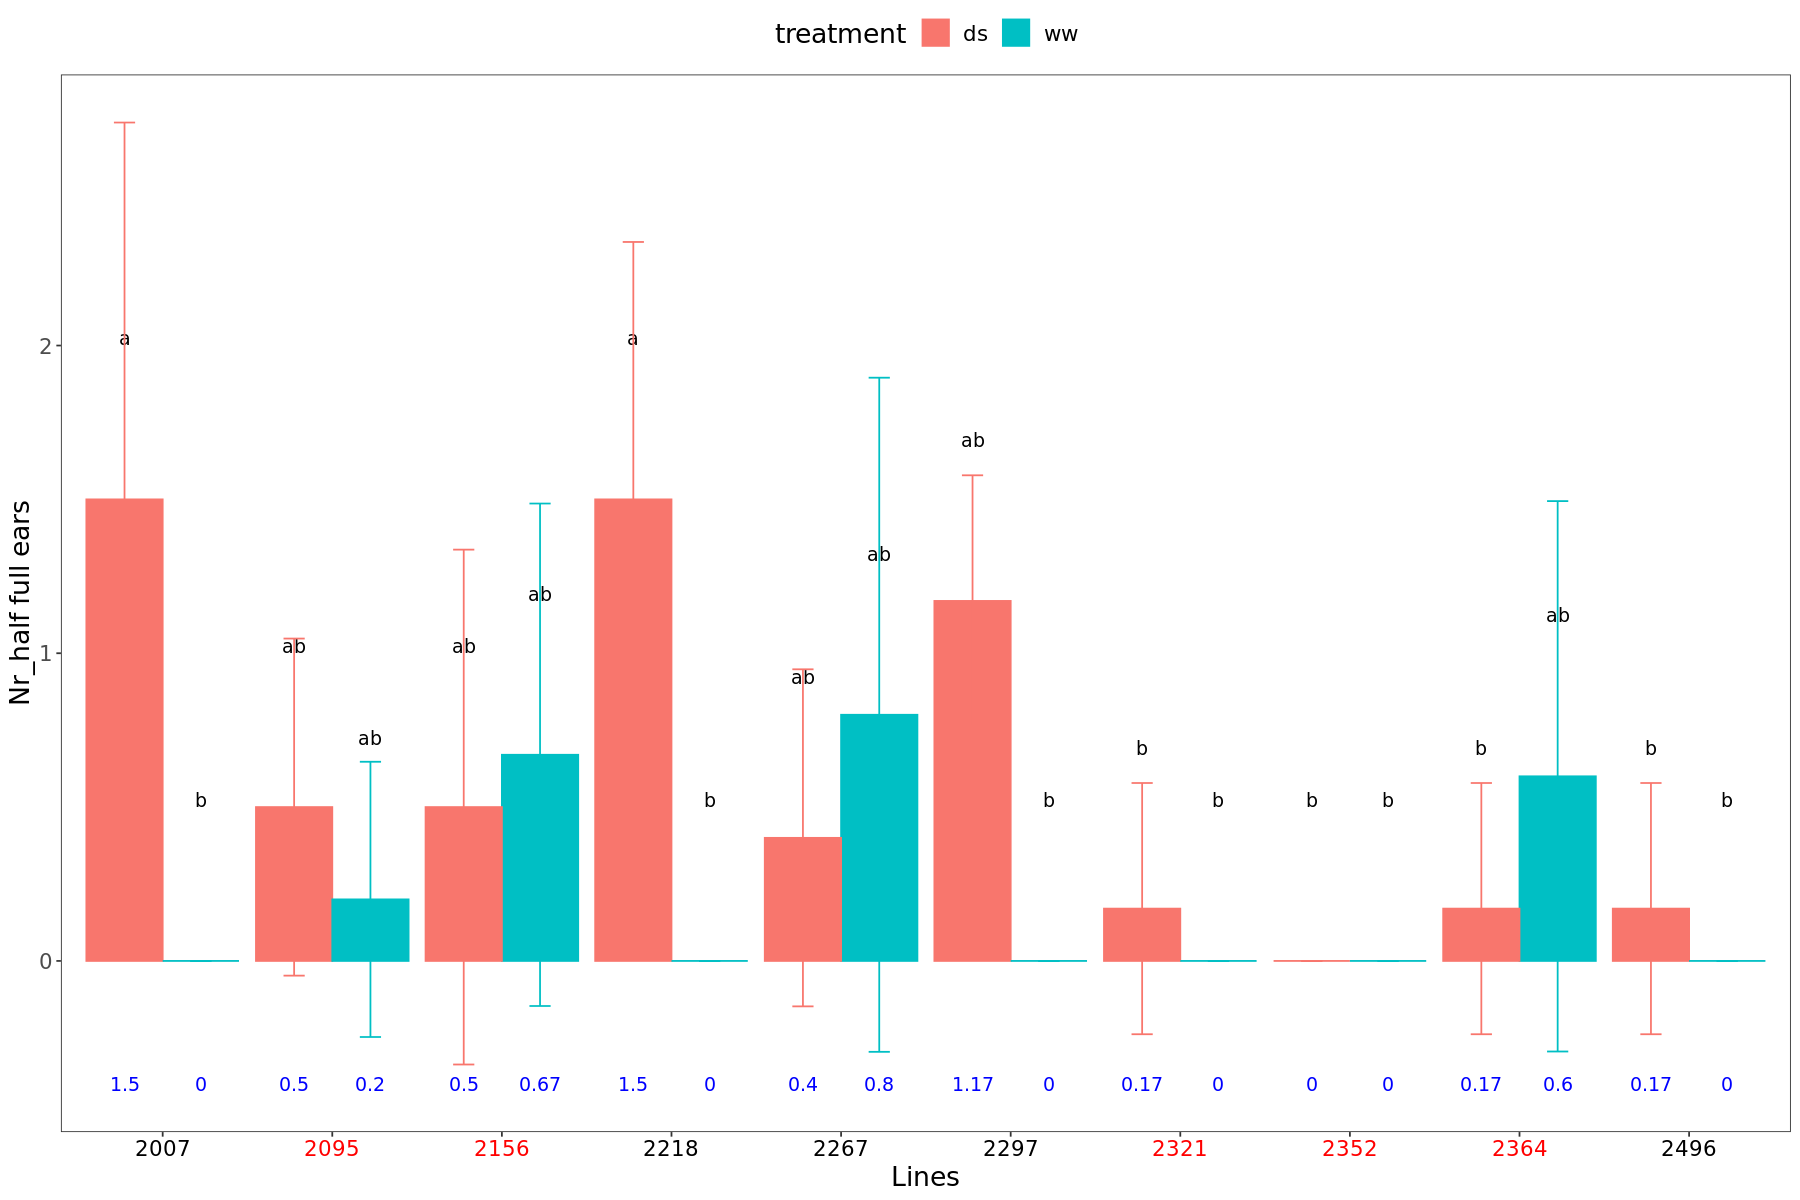

In [287]:
options(repr.plot.width=15,  repr.plot.height=10)
HE <- ggplot(data=as.data.frame(HE_Int), aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_half full ears") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = -0.4), position = position_dodge(0.90), colour="blue", size= 4)
print(HE)

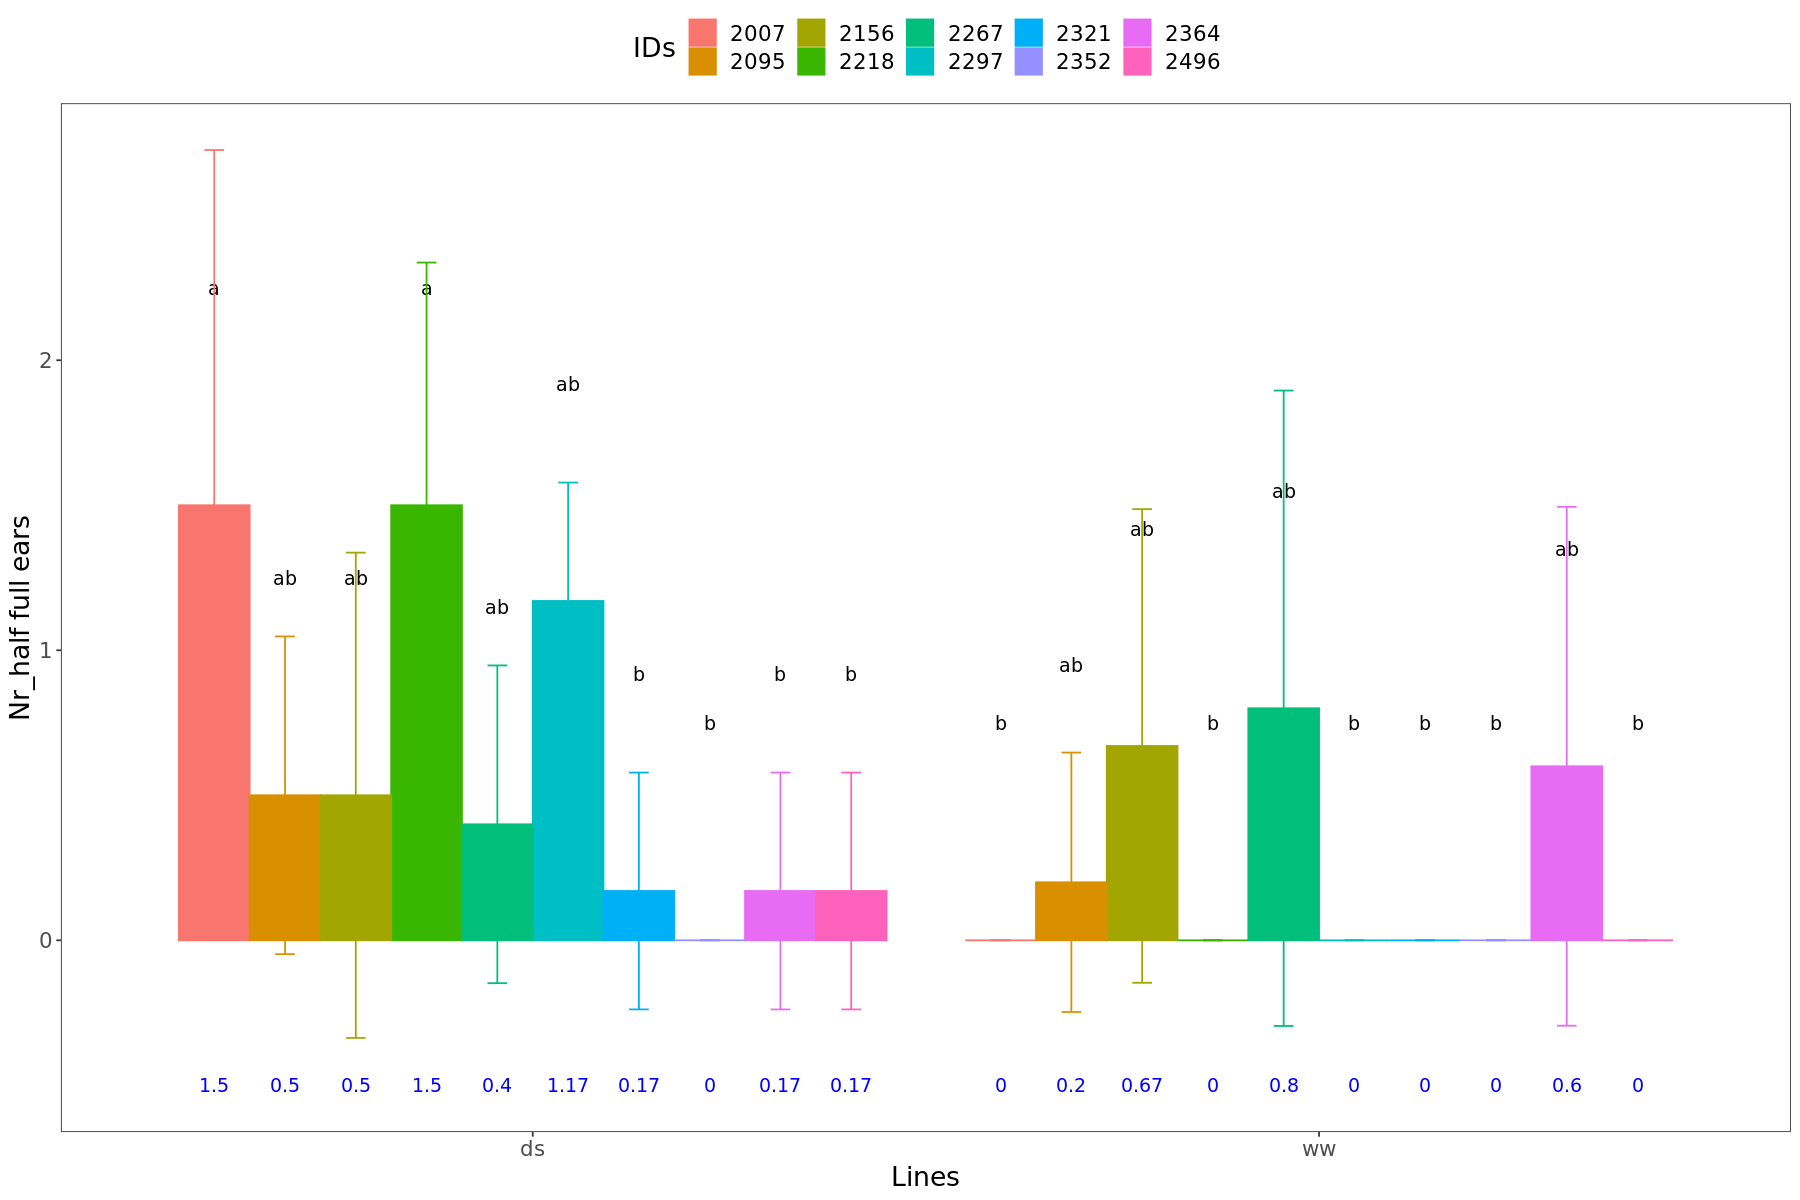

In [288]:
options(repr.plot.width=15,  repr.plot.height=10)
HEl <- ggplot(data=as.data.frame(HE_Int), aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-15, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_half full ears") +
   theme_bw() +
#theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = -0.5), position = position_dodge(0.90), colour="blue", size= 4)
print(HEl)

# Number of the full ears

In [289]:
str(final.data)

'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

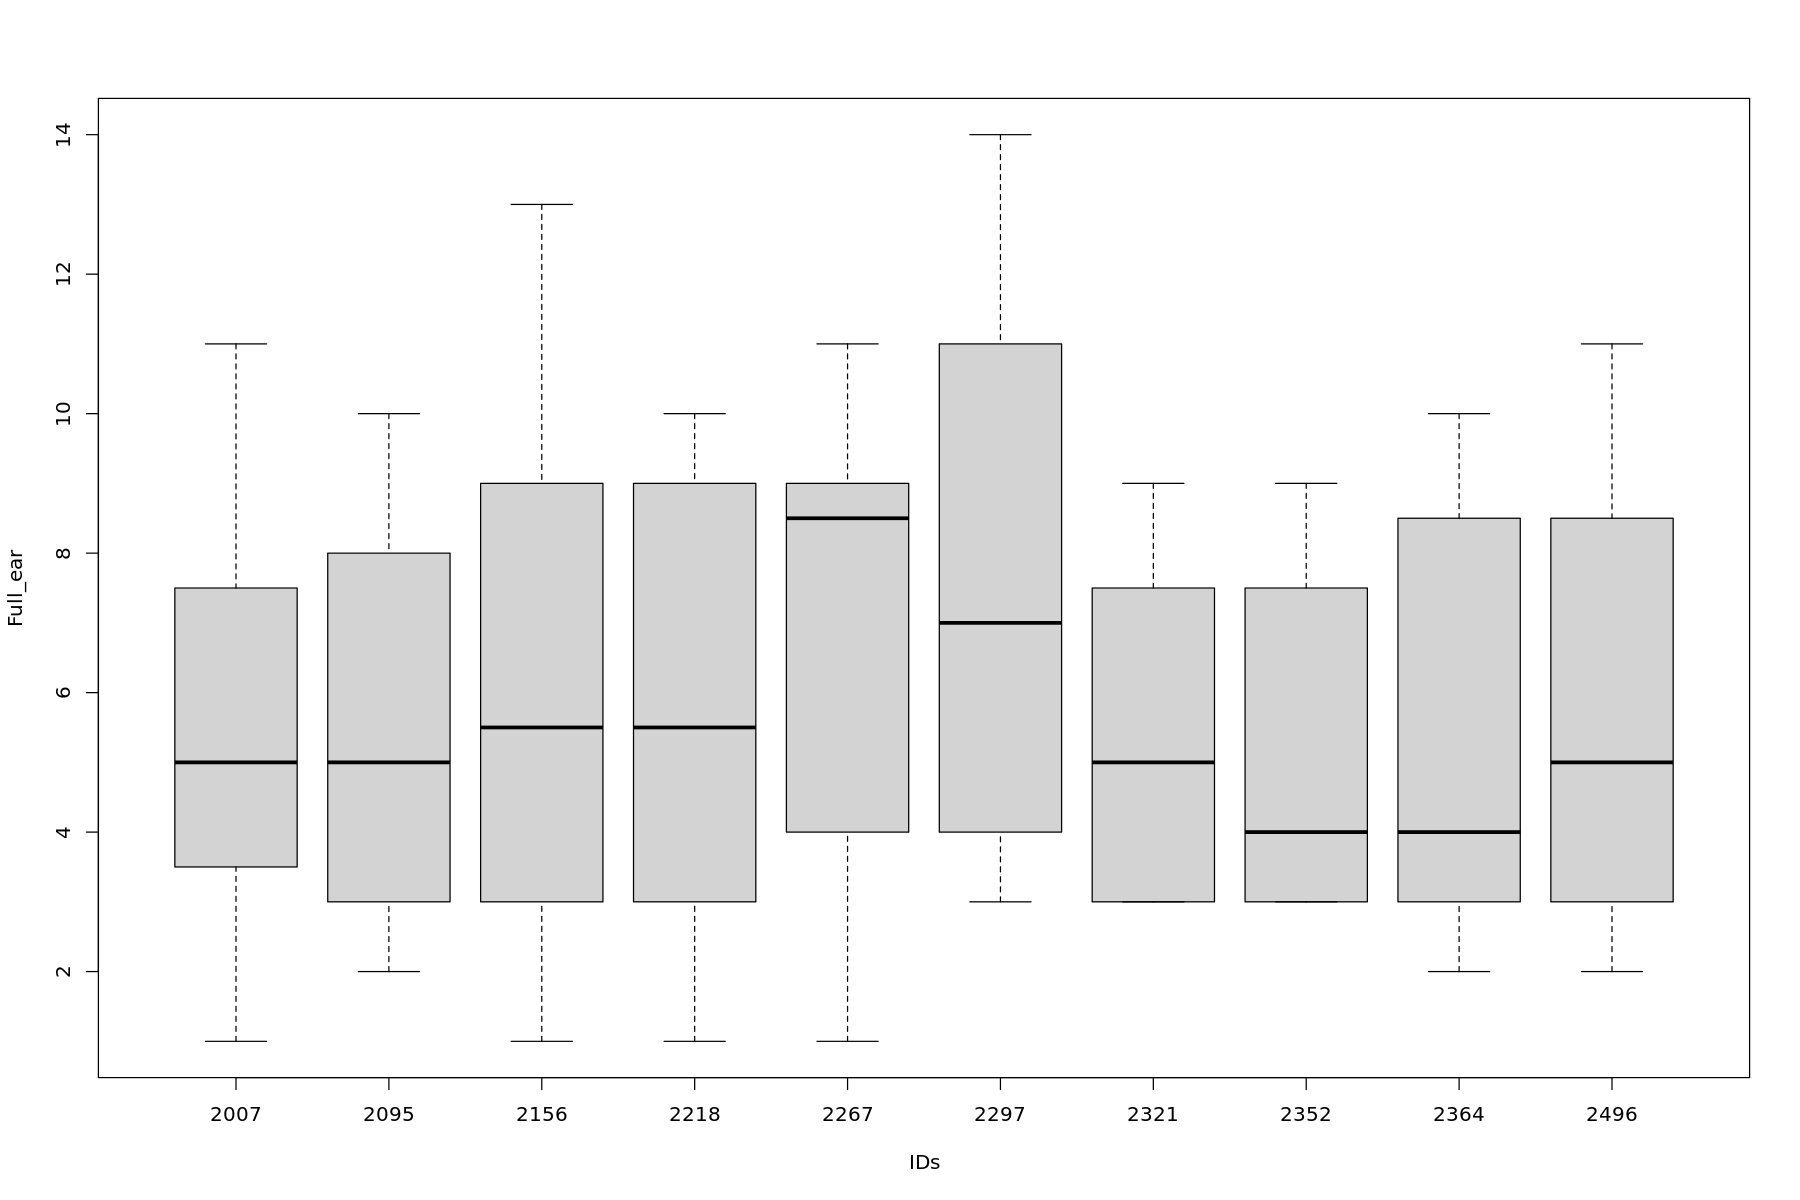

In [290]:
boxplot(Full_ear~Group, data=final.data)
boxplot(Full_ear~treatment, data=final.data)
boxplot(Full_ear~IDs, data=final.data)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


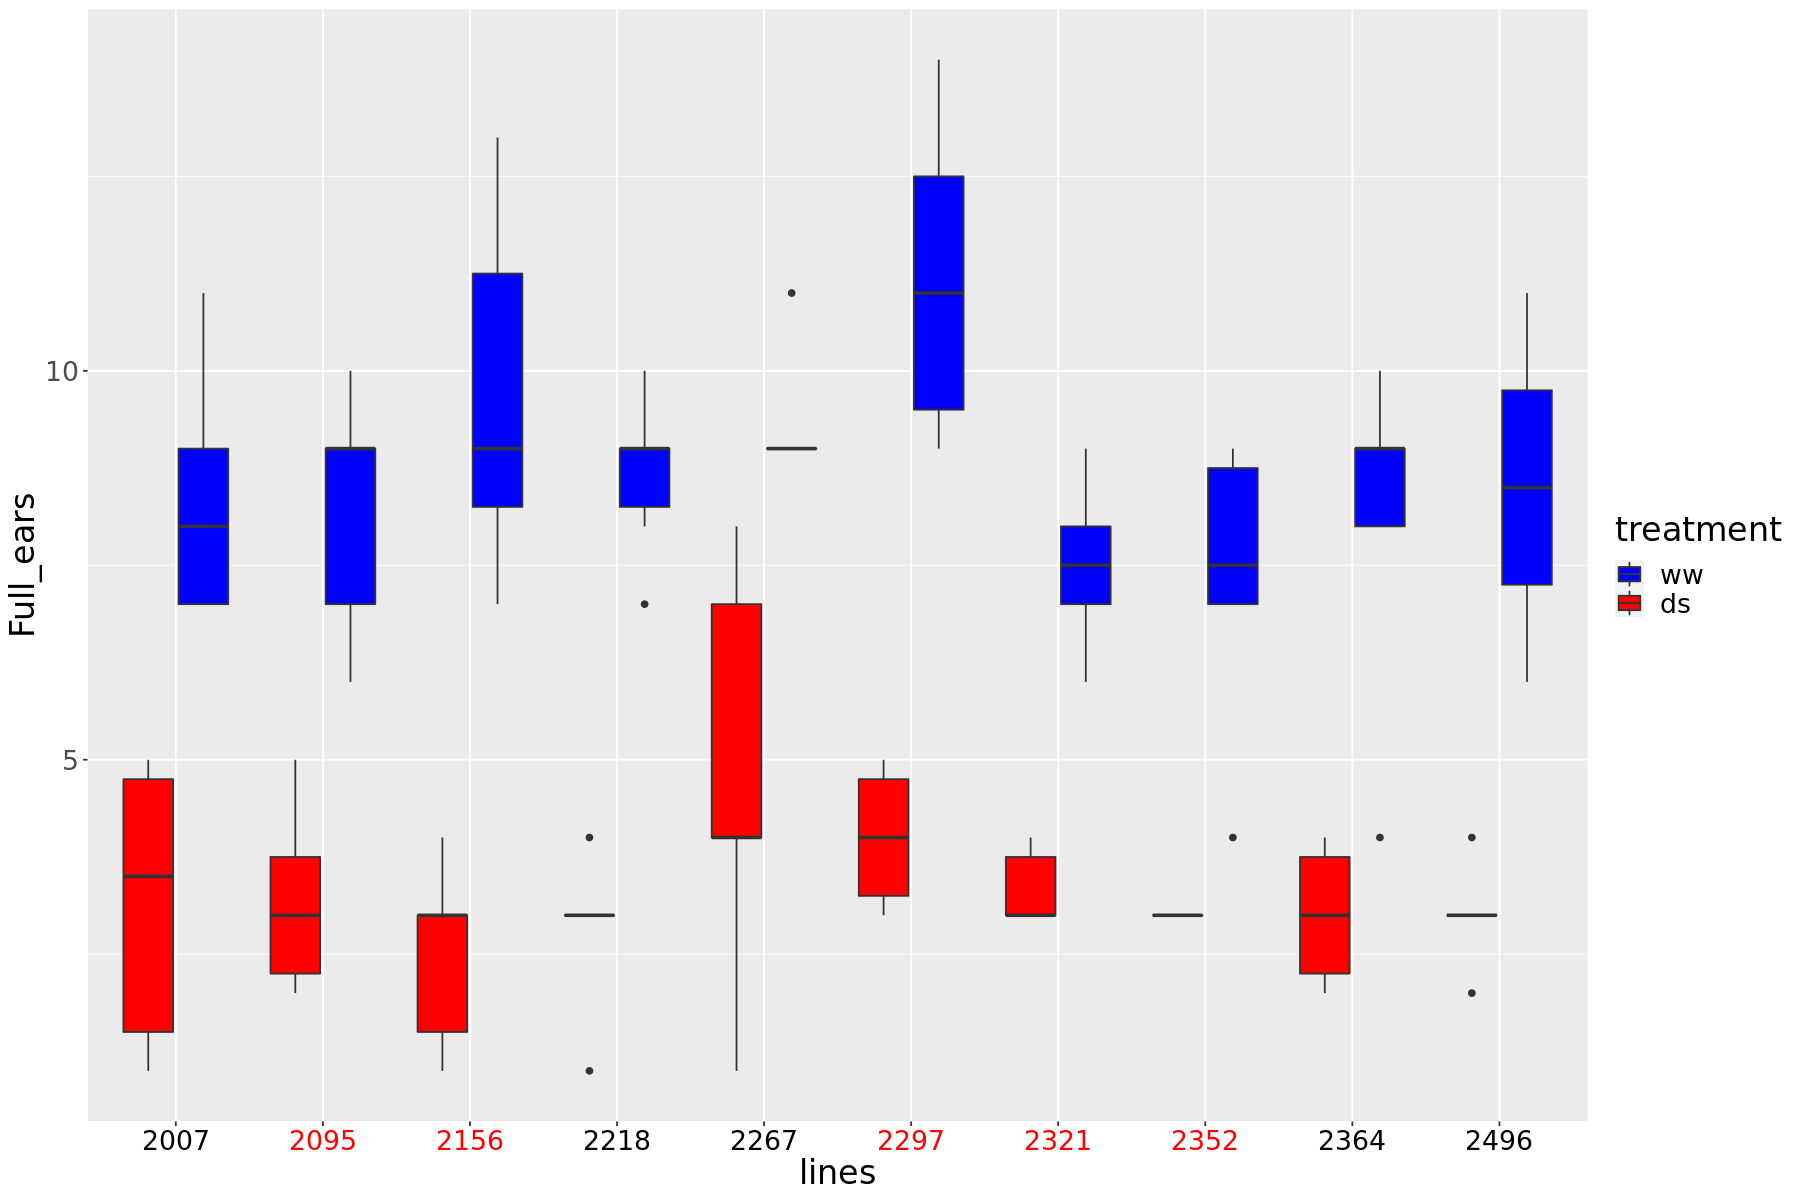

In [291]:
options(repr.plot.width=15, repr.plot.height=10)
FE <- ggplot(final.data, aes(x=IDs, y=Full_ear,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="Full_ears", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))



    print(FE)

In [292]:
FE_AN<-aov(Full_ear~treatment*IDs, data=final.data)
summary(FE_AN)


FE_AN_G<- aov(Full_ear~treatment*Group, data=final.data)
summary(FE_AN_G)

tukey<- TukeyHSD(FE_AN, conf.levels=.95)
cld_FE<- multcompLetters4(FE_AN ,tukey)
cld_FE

              Df Sum Sq Mean Sq F value  Pr(>F)    
treatment      1  842.5   842.5 361.337 < 2e-16 ***
IDs            9   60.4     6.7   2.877 0.00481 ** 
treatment:IDs  9   29.4     3.3   1.402 0.19825    
Residuals     94  219.2     2.3                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1  842.5   842.5 300.648 <2e-16 ***
Group             1    0.1     0.1   0.021  0.884    
treatment:Group   1    0.7     0.7   0.235  0.629    
Residuals       110  308.2     2.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ww  ds 
"a" "b" 

$IDs
2297 2267 2156 2218 2496 2007 2095 2321 2352 2364 
 "a" "ab" "ab" "ab" "ab" "ab" "ab"  "b"  "b" "ab" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2267 ww:2218 ww:2496 ww:2007 ww:2095 ww:2364 ww:2321 ww:2352 
    "a"    "ab"    "ab"    "ab"    "ab"    "ab"   "abc"   "abc"    "bc"    "bc" 
ds:2267 ds:2297 ds:2321 ds:2007 ds:2095 ds:2352 ds:2364 ds:2496 ds:2218 ds:2156 
   "cd"     "d"     "d"     "d"     "d"     "d"     "d"     "d"     "d"     "d" 


In [293]:
summary_FE_t<- group_by(final.data, treatment) %>%
summarise(mean=mean(Full_ear), sd=sd(Full_ear)) %>%
arrange(desc(mean))
View(summary_FE_t)


summary_FE_l<- group_by(final.data, IDs) %>%
summarise(mean=mean(Full_ear), sd=sd(Full_ear)) %>%
arrange(desc(mean))
View(summary_FE_l)



cld_FE_t <- as.data.frame.list(cld_FE$treatment)
summary_FE_t$tukey <- cld_FE_t$Letters
View(summary_FE_t)
write.table(summary_FE_t, "summary_full_ear_t_August.csv")


cld_FE_l <- as.data.frame.list(cld_FE$IDs)
summary_FE_l$tukey <- cld_FE_l$Letters
View(summary_FE_l)
write.table(summary_FE_l, "summary_full_ear_l_August.csv")

treatment mean     sd      
1 ww        8.696429 1.953269
2 ds        3.258621 1.318696

IDs  mean     sd      
1  2297 7.583333 4.033008
2  2267 7.100000 3.107339
3  2156 6.083333 4.144182
4  2218 5.750000 3.194455
5  2496 5.750000 3.165869
6  2007 5.545455 3.205110
7  2095 5.454545 2.944949
8  2321 5.416667 2.314316
9  2352 5.363636 2.618119
10 2364 5.272727 3.068906

treatment mean     sd       tukey
1 ww        8.696429 1.953269 a    
2 ds        3.258621 1.318696 b

IDs  mean     sd       tukey
1  2297 7.583333 4.033008 a    
2  2267 7.100000 3.107339 ab   
3  2156 6.083333 4.144182 ab   
4  2218 5.750000 3.194455 ab   
5  2496 5.750000 3.165869 ab   
6  2007 5.545455 3.205110 ab   
7  2095 5.454545 2.944949 ab   
8  2321 5.416667 2.314316 b    
9  2352 5.363636 2.618119 b    
10 2364 5.272727 3.068906 ab

In [93]:
FE_t<- read.table("summary_full_ear_t_August.csv")
FE_l<- read.table("summary_full_ear_l_August.csv")

FE_l$IDs <- as.factor(FE_l $IDs)
FE_t$treatment <- as.factor(FE_t $treatment)


In [94]:
options(repr.plot.width=11, repr.plot.height=7)
full_ear_t<- ggplot(data=FE_t, aes(x =treatment, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  #geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    #geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Treatments", y="Nr_full ears") +
   theme_bw() +
ylim(0,11)+
theme(axis.text.x = element_text(colour=c("black","black")))+

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("pink4","pink3"))+

geom_segment(x=1, y=9.5, xend=2, yend=9.5,color="black")+

geom_text(x=1.5, y=10, label="< 2e-16 ***", size=5,color="black")+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(full_ear_t)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


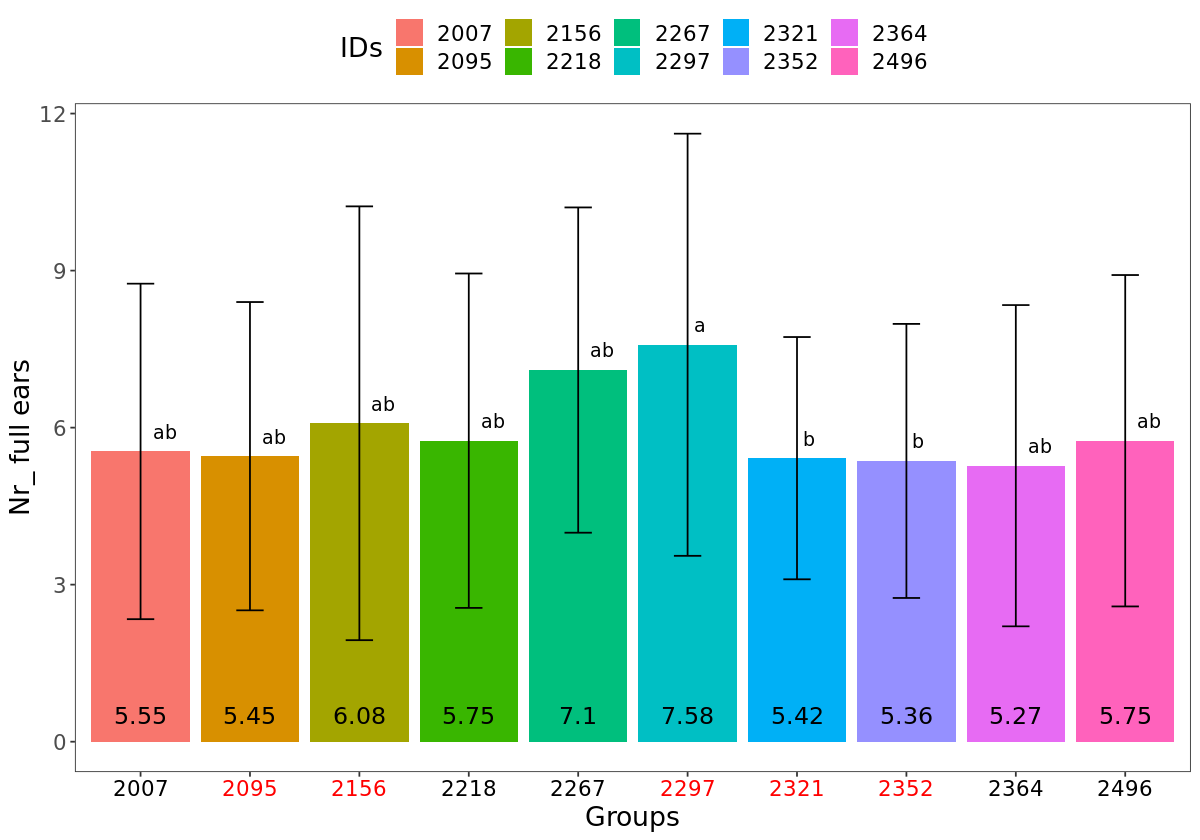

In [296]:
options(repr.plot.width=10, repr.plot.height=7)

full_ear_l<- ggplot(data=FE_l, aes(x =IDs, y = mean, fill=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="Nr_ full ears")+
theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
#scale_fill_manual(values=c("#d8b365","#5ab4ac","#d8b365","#5ab4ac"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(full_ear_l)

# Number of the shoots having ear


In [297]:
str(final.data)


'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

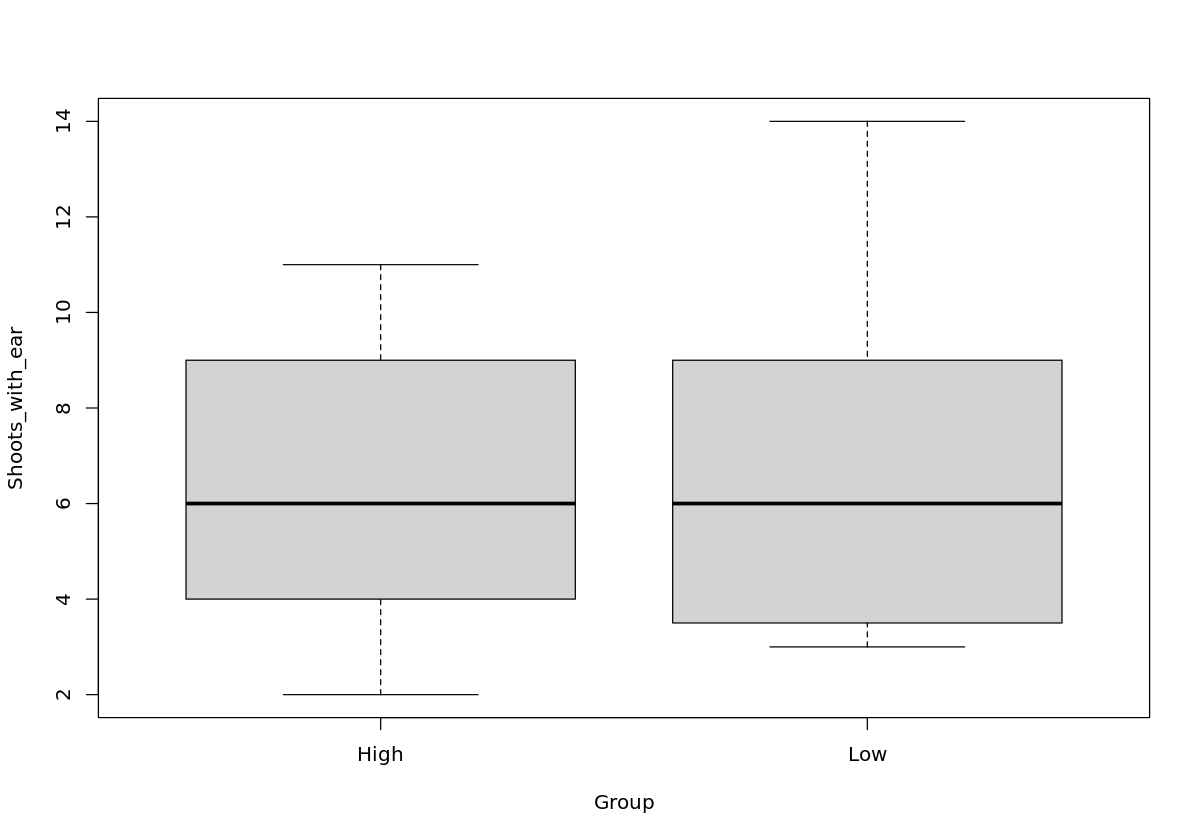

In [298]:
boxplot(Shoots_with_ear~Group, data=final.data)
boxplot(Shoots_with_ear~treatment, data=final.data)
boxplot(Shoots_with_ear~IDs, data=final.data)

In [299]:
options(repr.plot.width=15, repr.plot.height=10)
SWE<- ggplot(final.data, aes(x=IDs, y=Shoots_with_ear,  fill=treatment))+
       geom_boxplot()+
#scale_fill_manual(values=c("pink4","pink3"))+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Nr_shoots with ear", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))



    print(SWE)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [300]:
SWE_AN<- aov(Shoots_with_ear~treatment*IDs, data=final.data)
summary(SWE_AN)


SWE_AN_G<- aov(Shoots_with_ear~Group*treatment, data=final.data)
summary(SWE_AN_G)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  744.7   744.7 450.249  < 2e-16 ***
IDs            9   85.8     9.5   5.763 2.37e-06 ***
treatment:IDs  9   29.9     3.3   2.011   0.0464 *  
Residuals     94  155.5     1.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
Group             1    0.5     0.5   0.211  0.647    
treatment         1  744.3   744.3 304.303 <2e-16 ***
Group:treatment   1    2.1     2.1   0.863  0.355    
Residuals       110  269.0     2.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [301]:
tukey<- TukeyHSD(SWE_AN, conf.levels=.95)
cld.swe<- multcompLetters4(SWE_AN,tukey)
cld.swe


summary_swe_Int<- group_by(final.data, treatment,IDs) %>%
summarise(mean=mean(Shoots_with_ear), sd=sd(Shoots_with_ear)) %>%
arrange(desc(mean))
View(summary_swe_Int)

cld<- as.data.frame.list(cld.swe$`treatment:IDs`)
summary_swe_Int$tukey<- cld$Letters
View(summary_swe_Int)
write.table(summary_swe_Int, "summary_SWE_Int.casv")

$treatment
 ww  ds 
"a" "b" 

$IDs
 2297  2267  2156  2218  2007  2095  2496  2352  2364  2321 
  "a"  "ab" "abc" "abc" "abc"  "bc"   "c"   "c"   "c"   "c" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2267 ww:2218 ww:2364 ww:2496 ww:2007 ww:2095 ww:2352 ww:2321 
    "a"    "ab"   "abc"   "abc"   "abc"   "abc"   "abc"   "abc"   "bcd"   "cde" 
ds:2267 ds:2297 ds:2007 ds:2218 ds:2095 ds:2321 ds:2156 ds:2352 ds:2496 ds:2364 
  "def"    "ef"     "f"     "f"     "f"     "f"     "f"     "f"     "f"     "f" 


`summarise()` has grouped output by 'treatment'. You can override using the `.groups` argument.


treatment IDs  mean      sd       
1  ww        2297 11.166667 2.0412415
2  ww        2156 10.666667 1.6329932
3  ww        2267 10.200000 1.0954451
4  ww        2218  8.666667 1.0327956
5  ww        2364  8.600000 1.8165902
6  ww        2496  8.500000 1.8708287
7  ww        2007  8.400000 1.6733201
8  ww        2095  8.400000 1.5165751
9  ww        2352  8.000000 0.8944272
10 ww        2321  7.500000 1.0488088
11 ds        2267  5.200000 2.7748874
12 ds        2297  5.166667 0.7527727
13 ds        2007  4.666667 0.8164966
14 ds        2218  4.333333 0.8164966
15 ds        2095  3.666667 0.8164966
16 ds        2321  3.583333 0.4915960
17 ds        2156  3.333333 0.5163978
18 ds        2352  3.100000 0.2236068
19 ds        2496  3.083333 0.6645801
20 ds        2364  3.000000 0.6324555

treatment IDs  mean      sd        tukey
1  ww        2297 11.166667 2.0412415 a    
2  ww        2156 10.666667 1.6329932 ab   
3  ww        2267 10.200000 1.0954451 abc  
4  ww        2218  8.666667 1.0327956 abc  
5  ww        2364  8.600000 1.8165902 abc  
6  ww        2496  8.500000 1.8708287 abc  
7  ww        2007  8.400000 1.6733201 abc  
8  ww        2095  8.400000 1.5165751 abc  
9  ww        2352  8.000000 0.8944272 bcd  
10 ww        2321  7.500000 1.0488088 cde  
11 ds        2267  5.200000 2.7748874 def  
12 ds        2297  5.166667 0.7527727 ef   
13 ds        2007  4.666667 0.8164966 f    
14 ds        2218  4.333333 0.8164966 f    
15 ds        2095  3.666667 0.8164966 f    
16 ds        2321  3.583333 0.4915960 f    
17 ds        2156  3.333333 0.5163978 f    
18 ds        2352  3.100000 0.2236068 f    
19 ds        2496  3.083333 0.6645801 f    
20 ds        2364  3.000000 0.6324555 f

In [302]:
SWE_Int<-  read.table("summary_SWE_Int.casv")

SWE_Int$IDs <- as.factor(SWE_Int $IDs)
SWE_Int$treatment <- as.factor(SWE_Int $treatment)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


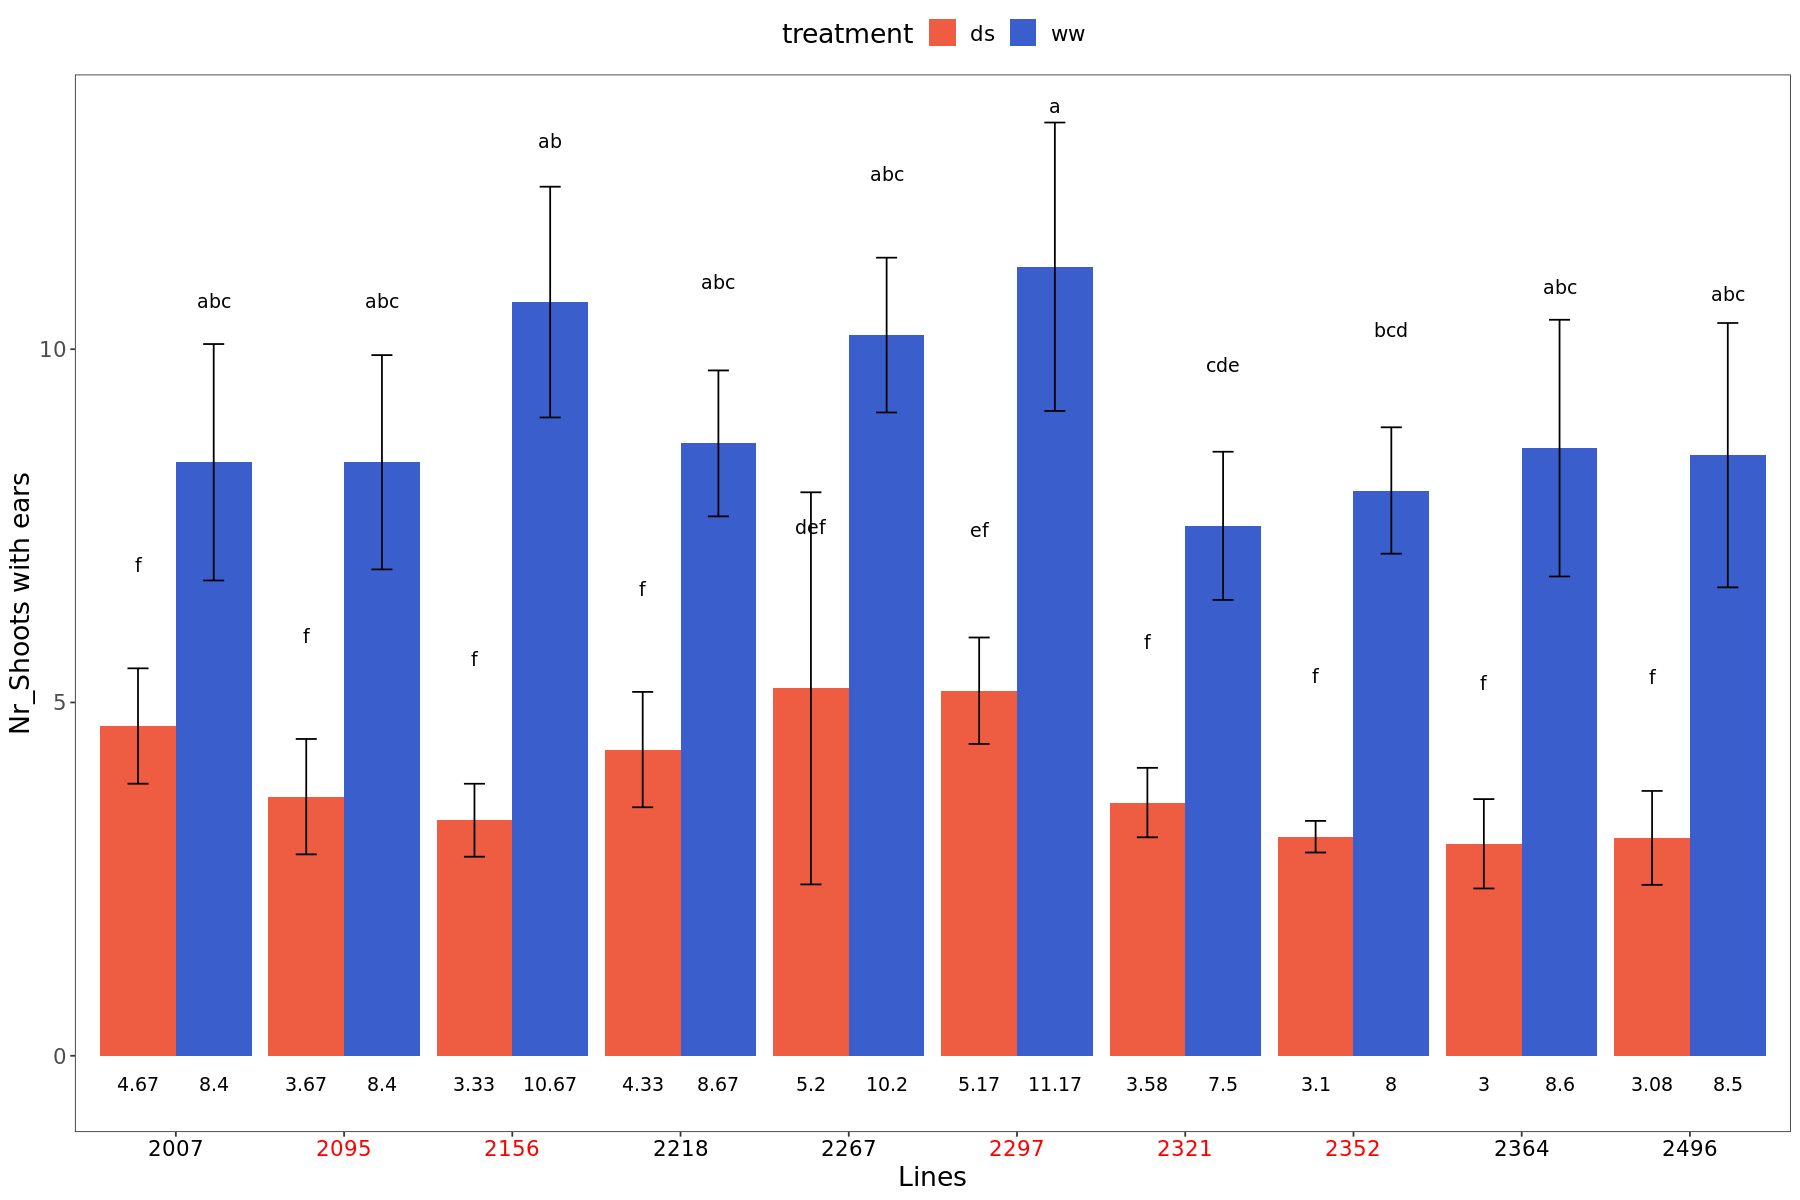

In [303]:
options(repr.plot.width=15,  repr.plot.height=10)
SWE <- ggplot(data=as.data.frame(SWE_Int), aes(x =IDs, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_Shoots with ears") +
scale_fill_manual(values=c("tomato2","royalblue3"))+
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = -0.4), position = position_dodge(0.90), colour="black", size= 4)
print(SWE)

# Number of the shoots without ear( empthy shoots)

'data.frame':	114 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214

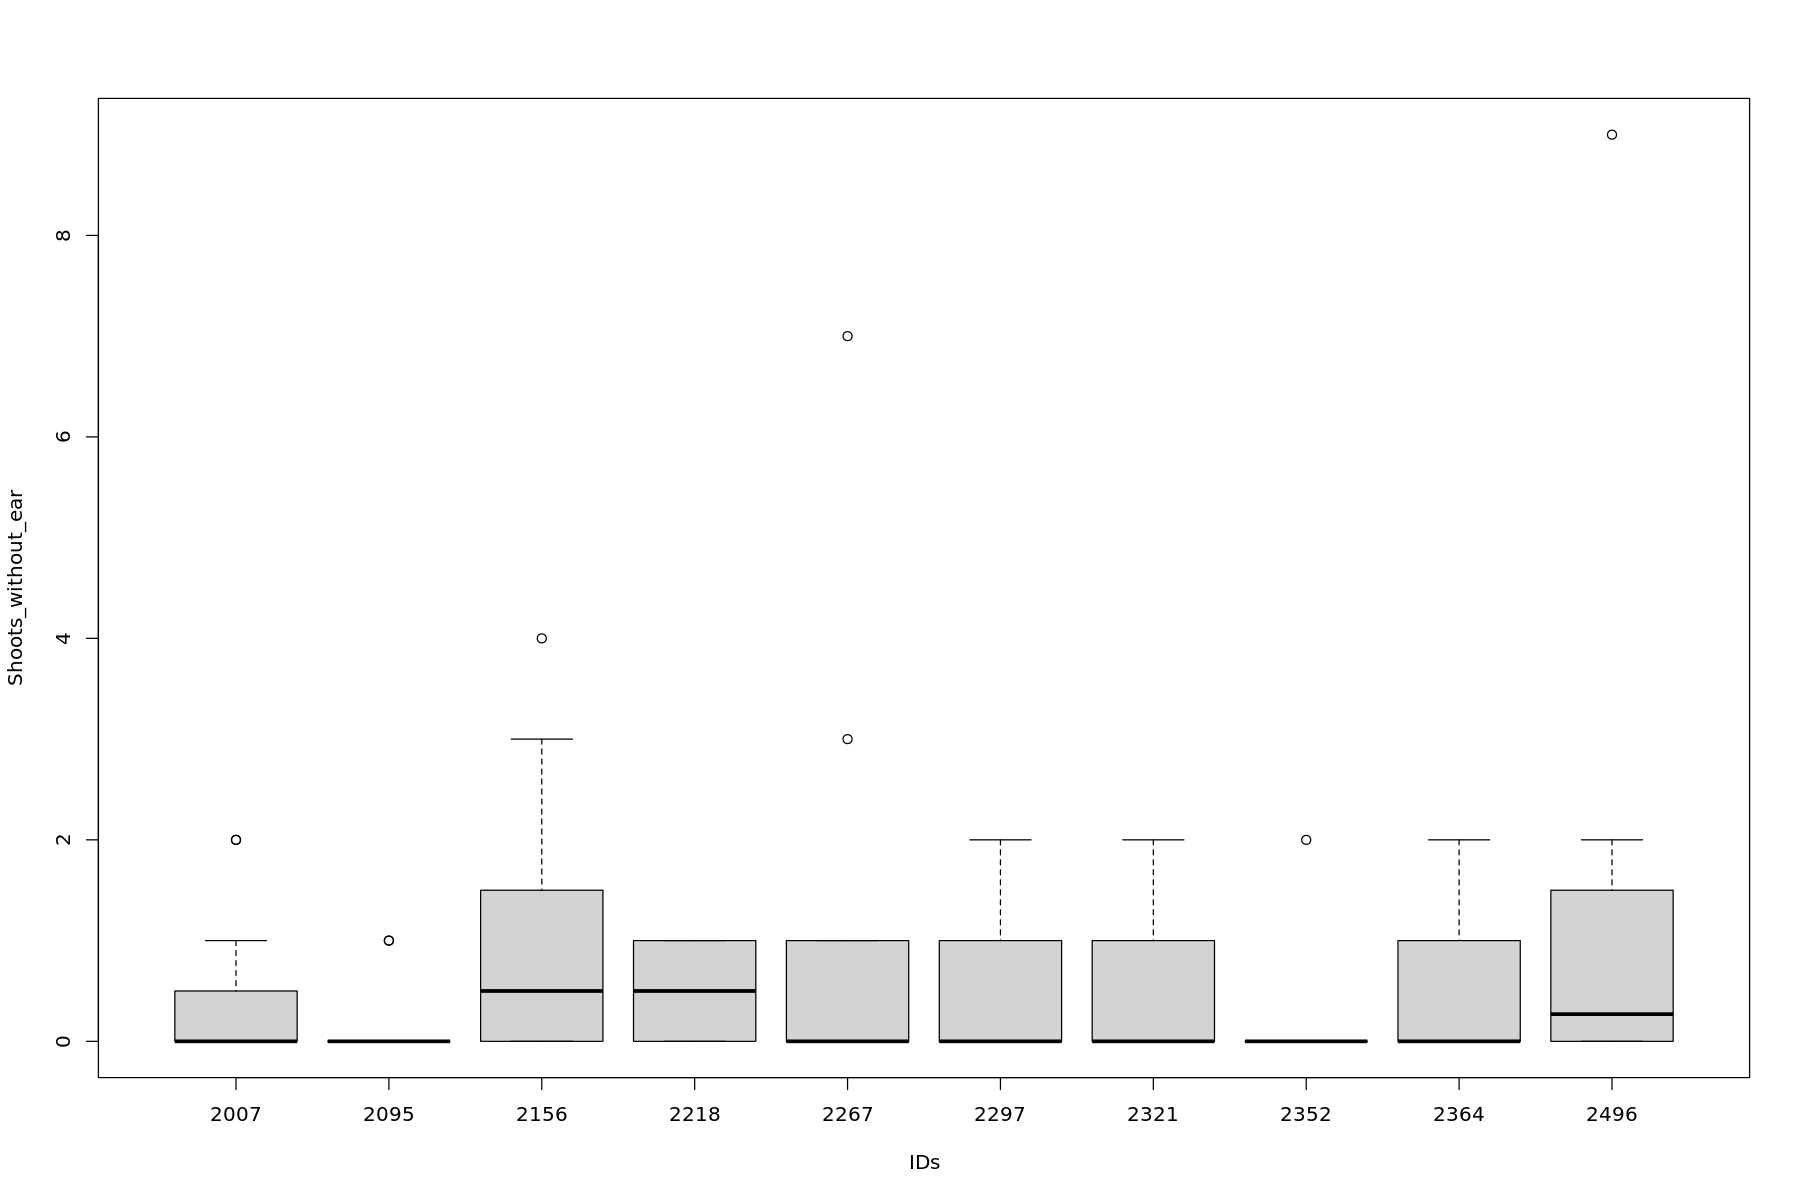

In [304]:
str(final.data)
boxplot(Shoots_without_ear~Group, data=final.data)
boxplot(Shoots_without_ear~treatment, data=final.data)
boxplot(Shoots_without_ear~IDs, data=final.data)

In [305]:
SNE<- aov(Shoots_without_ear~treatment*IDs, data=final.data)
summary(SNE)

SNE_G<- aov(Shoots_without_ear~treatment*Group, data=final.data)
summary(SNE_G)

pwc2 <- final.data %>% 
pairwise_t_test(Shoots_without_ear~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc2


pwc1 <- final.data %>% 
pairwise_t_test(Shoots_without_ear~treatment, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc1

              Df Sum Sq Mean Sq F value Pr(>F)  
treatment      1   8.60   8.598   5.761 0.0184 *
IDs            9  15.09   1.676   1.123 0.3543  
treatment:IDs  9  20.66   2.296   1.538 0.1460  
Residuals     94 140.30   1.493                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)  
treatment         1   8.60   8.598   5.453 0.0213 *
Group             1   2.60   2.602   1.651 0.2016  
treatment:Group   1   0.02   0.021   0.013 0.9082  
Residuals       110 173.42   1.577                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

.y.                group1 group2 n1 n2 p     p.signif p.adj p.adj.signif
1 Shoots_without_ear High   Low    56 58 0.194 ns       0.194 ns

.y.                group1 group2 n1 n2 p      p.signif p.adj  p.adj.signif
1 Shoots_without_ear ds     ww     58 56 0.0211 *        0.0211 *

In [47]:
final_data_clustring<- read.csv("final.data.allgen.csv",sep=",", header=TRUE)
head(final.data_clustring)

X Unit experiment IDs  treatment BBCH Collection.date max.Height Biomass
1 1 121  V22001     2218 ww        92   08/12/22         91.2      14.75  
2 2 123  V22001     2218 ds        92   08/08/22         78.0       4.72  
3 3 125  V22001     2156 ds        92   08/09/22         83.0       7.76  
4 4 126  V22001     2297 ds        92   08/08/22         61.0       5.61  
5 5 130  V22001     2218 ww        92   08/30/22        102.0      14.30  
6 6 131  V22001     2352 ds        92   11/08/22         61.0       5.76  
  Shoots ⋯ Nr_ears Full_ear Half_ear Weight_ear Nr_seeds Mature_seeds
1 10     ⋯ 10      10       0        15.43      282      282         
2  5     ⋯  5       3       2         3.55       67       66         
3  4     ⋯  3       1       0         1.21       29       29         
4  7     ⋯  6       5       1         3.36       68       65         
5  9     ⋯  9       9       0        10.65      214      209         
6  3     ⋯  3       3       0         3.05       60       60         
  Poor_seeds all.seeds.weight TKW   Groups
1 0          10.86            37.30 High  
2 1          2.21             32.99 High  
3 0          0.66             22.76 Low   
4 3          1.52             22.35 Low   
5 5          7.22             38.60 High  
6 0          1.90             31.67 Low

In [48]:
UniGenotypes<- unique(final_data_clustring$IDs)
UniGenotypes

[1] 2218 2156 2297 2352 2364 2095 2321 2267 2007 2496

In [49]:
idx=1
genotypes_table = list()
for (i in UniGenotypes){
genotypes_table[[idx]]<- subset(final_data_clustring, IDs==i)

idx=idx+1

}

In [ ]:
genotypes_table

In [50]:
colnames(final_data_clustring)

[1] "X"                  "Unit"               "experiment"        
 [4] "IDs"                "treatment"          "BBCH"              
 [7] "Collection.date"    "max.Height"         "Biomass"           
[10] "Shoots"             "Shoots_with_ear"    "Shoots_without_ear"
[13] "Nr_ears"            "Full_ear"           "Half_ear"          
[16] "Weight_ear"         "Nr_seeds"           "Mature_seeds"      
[19] "Poor_seeds"         "all.seeds.weight"   "TKW"               
[22] "Groups"

In [51]:
data18<- genotypes_table[[1]]
data56<- genotypes_table[[2]]
data97<- genotypes_table[[3]]
data52<- genotypes_table[[4]]
data64<- genotypes_table[[5]]
data95<- genotypes_table[[6]]
data21<- genotypes_table[[7]]
data67<- genotypes_table[[8]]
data07<- genotypes_table[[9]]
data96<- genotypes_table[[10]]

In [52]:
data2218<- group_by(data18,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2218)

data2156<- group_by(data56,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2156)

data2297<- group_by(data97,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2297)

data2352<- group_by(data52,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2352)

data2364<- group_by(data64,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2364)

data2095<- group_by(data95,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2095)

data2321<- group_by(data21,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
head(data2321)

data2267<- group_by(data67,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2267)

data2007<- group_by(data07,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2007)

data2496<- group_by(data96,IDs,treatment,Groups)%>%
summarise_at(c("max.Height", "Biomass", "Shoots", "Shoots_with_ear","Shoots_without_ear","Nr_ears","Full_ear","Half_ear","Weight_ear", 
               "Nr_seeds","Mature_seeds","Poor_seeds","all.seeds.weight","TKW"), mean, na.rm = TRUE)
 head(data2496)

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass Shoots Shoots_with_ear
1 2218 ds        High   74.75000    5.385  5      4.333333       
2 2218 ww        High   97.83333   14.550  9      8.666667       
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds 
1 0.6666667          4.333333 2.833333 1.5       4.155      82.66667
2 0.3333333          8.666667 8.666667 0.0      12.025     238.66667
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  81.0000     1.6666667  NA               33.75667
2 237.8333     0.8333333  NA               36.71667

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
1 2156 ds        Low     72.6500    7.336667  5.333333  3.333333      
2 2156 ww        Low    100.1833   17.661667 10.666667 10.666667      
  Shoots_without_ear Nr_ears   Full_ear Half_ear  Weight_ear Nr_seeds 
1 2                   3.333333 2.500000 0.5000000 1.75        39.16667
2 0                  10.666667 9.666667 0.6666667 9.66       212.66667
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  39.16667    0.0        NA               22.85667
2 212.16667    0.5        NA               26.66667

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass   Shoots Shoots_with_ear
1 2297 ds        Low    59.33333    5.278333  5.5    5.166667      
2 2297 ww        Low    78.66667   13.136667 11.5   11.166667      
  Shoots_without_ear Nr_ears   Full_ear Half_ear Weight_ear Nr_seeds 
1 0.5000000           5.166667  4.00000 1.166667  3.626667   85.33333
2 0.3333333          11.166667 11.16667 0.000000 12.836667  332.50000
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  84.33333    1.0        NA               22.57167
2 331.00000    1.5        NA               24.91667

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass  Shoots   Shoots_with_ear
1 2352 ds        Low    65.40000    4.54000 3.000000 3.1            
2 2352 ww        Low    81.06667   13.43333 8.333333 8.0            
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds
1 0.0000000          3.000000 3.000000 0        3.218000    73.8000
2 0.3333333          7.333333 7.333333 0        8.703333   205.8333
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  73.8        0.0000000  NA               25.80600
2 205.5        0.3333333  NA               26.98833

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass Shoots Shoots_with_ear
1 2364 ds        High   81.98333    8.085  4.0    3.0            
2 2364 ww        High   94.16000   17.118  8.6    8.6            
  Shoots_without_ear Nr_ears  Full_ear Half_ear  Weight_ear Nr_seeds 
1 1                  3.166667 3        0.1666667  2.488333   50.33333
2 0                  8.600000 8        0.6000000 13.422000  264.40000
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  49.66667    0.6666667  NA               28.10667
2 255.20000    9.2000000  NA               37.48000

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass Shoots   Shoots_with_ear
1 2095 ds        Low    50.66667   3.42    3.833333 3.666667       
2 2095 ww        Low    66.32000   9.68    8.600000 8.400000       
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds 
1 0.1666667          3.666667 3.166667 0.5       3.658333   71.16667
2 0.2000000          8.400000 8.200000 0.2      11.182000  316.00000
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  70.83333    0.3333333  NA               33.27833
2 315.40000    0.6000000  NA               24.18000

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass   Shoots   Shoots_with_ear
1 2321 ds        Low    66.38333    4.808333 4.333333 3.583333       
2 2321 ww        Low    76.66667   10.210000 7.666667 7.500000       
  Shoots_without_ear Nr_ears Full_ear Half_ear  Weight_ear Nr_seeds
1 0.8333333          3.5     3.333333 0.1666667  4.25000   107.5   
2 0.1666667          7.5     7.500000 0.0000000 11.11833   253.5   
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1 107.1667     0.3333333  NA               24.58333
2 251.0000     2.5000000  NA               29.83333

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass Shoots Shoots_with_ear
1 2267 ds        High   70.26       7.832   7.4    5.2           
2 2267 ww        High   99.64      17.676  10.2   10.2           
  Shoots_without_ear Nr_ears Full_ear Half_ear Weight_ear Nr_seeds Mature_seeds
1 2.2                 5.2    4.8      0.4      1.252       12       11.6       
2 0.0                10.2    9.4      0.8      9.532      215      191.6       
  Poor_seeds all.seeds.weight TKW  
1  0.4       NA                9.52
2 23.4       NA               30.04

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass   Shoots   Shoots_with_ear
1 2007 ds        High   71.78333    5.338333 5.166667 4.666667       
2 2007 ww        High   89.30000   10.534000 8.800000 8.400000       
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds
1 0.5                4.666667 3.166667 1.5       3.785      71.5   
2 0.4                8.400000 8.400000 0.0      11.016     231.0   
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  71.5        0          NA               34.22833
2 231.0        0          NA               34.46000

Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(all.seeds.weight, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


IDs  treatment Groups max.Height Biomass   Shoots   Shoots_with_ear
1 2496 ds        High   83.26667    6.358333 4.333333 3.083333       
2 2496 ww        High   94.06667   13.335000 8.500000 8.500000       
  Shoots_without_ear Nr_ears  Full_ear Half_ear  Weight_ear Nr_seeds 
1 1.09               3.166667 3.0      0.1666667 2.865000    81.33333
2 1.50               8.500000 8.5      0.0000000 9.711667   209.50000
  Mature_seeds Poor_seeds all.seeds.weight TKW     
1  81.33333    0.000000   NA               20.49667
2 203.33333    6.166667   NA               31.20000

In [53]:
data2218[16]<- NULL
data2156[16]<- NULL
data2297[16]<- NULL
data2352[16]<- NULL
data2364[16]<- NULL
data2095[16]<- NULL
data2321[16]<- NULL
data2267[16]<- NULL
data2007[16]<- NULL
data2496[16]<- NULL 

In [54]:
head(data2218)
head(data2156)
head(data2297)
head(data2352)
head(data2364)
head(data2095)
head(data2321)
head(data2267)
head(data2007)
head(data2496)

IDs  treatment Groups max.Height Biomass Shoots Shoots_with_ear
1 2218 ds        High   74.75000    5.385  5      4.333333       
2 2218 ww        High   97.83333   14.550  9      8.666667       
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds 
1 0.6666667          4.333333 2.833333 1.5       4.155      82.66667
2 0.3333333          8.666667 8.666667 0.0      12.025     238.66667
  Mature_seeds Poor_seeds TKW     
1  81.0000     1.6666667  33.75667
2 237.8333     0.8333333  36.71667

IDs  treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
1 2156 ds        Low     72.6500    7.336667  5.333333  3.333333      
2 2156 ww        Low    100.1833   17.661667 10.666667 10.666667      
  Shoots_without_ear Nr_ears   Full_ear Half_ear  Weight_ear Nr_seeds 
1 2                   3.333333 2.500000 0.5000000 1.75        39.16667
2 0                  10.666667 9.666667 0.6666667 9.66       212.66667
  Mature_seeds Poor_seeds TKW     
1  39.16667    0.0        22.85667
2 212.16667    0.5        26.66667

IDs  treatment Groups max.Height Biomass   Shoots Shoots_with_ear
1 2297 ds        Low    59.33333    5.278333  5.5    5.166667      
2 2297 ww        Low    78.66667   13.136667 11.5   11.166667      
  Shoots_without_ear Nr_ears   Full_ear Half_ear Weight_ear Nr_seeds 
1 0.5000000           5.166667  4.00000 1.166667  3.626667   85.33333
2 0.3333333          11.166667 11.16667 0.000000 12.836667  332.50000
  Mature_seeds Poor_seeds TKW     
1  84.33333    1.0        22.57167
2 331.00000    1.5        24.91667

IDs  treatment Groups max.Height Biomass  Shoots   Shoots_with_ear
1 2352 ds        Low    65.40000    4.54000 3.000000 3.1            
2 2352 ww        Low    81.06667   13.43333 8.333333 8.0            
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds
1 0.0000000          3.000000 3.000000 0        3.218000    73.8000
2 0.3333333          7.333333 7.333333 0        8.703333   205.8333
  Mature_seeds Poor_seeds TKW     
1  73.8        0.0000000  25.80600
2 205.5        0.3333333  26.98833

IDs  treatment Groups max.Height Biomass Shoots Shoots_with_ear
1 2364 ds        High   81.98333    8.085  4.0    3.0            
2 2364 ww        High   94.16000   17.118  8.6    8.6            
  Shoots_without_ear Nr_ears  Full_ear Half_ear  Weight_ear Nr_seeds 
1 1                  3.166667 3        0.1666667  2.488333   50.33333
2 0                  8.600000 8        0.6000000 13.422000  264.40000
  Mature_seeds Poor_seeds TKW     
1  49.66667    0.6666667  28.10667
2 255.20000    9.2000000  37.48000

IDs  treatment Groups max.Height Biomass Shoots   Shoots_with_ear
1 2095 ds        Low    50.66667   3.42    3.833333 3.666667       
2 2095 ww        Low    66.32000   9.68    8.600000 8.400000       
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds 
1 0.1666667          3.666667 3.166667 0.5       3.658333   71.16667
2 0.2000000          8.400000 8.200000 0.2      11.182000  316.00000
  Mature_seeds Poor_seeds TKW     
1  70.83333    0.3333333  33.27833
2 315.40000    0.6000000  24.18000

IDs  treatment Groups max.Height Biomass   Shoots   Shoots_with_ear
1 2321 ds        Low    66.38333    4.808333 4.333333 3.583333       
2 2321 ww        Low    76.66667   10.210000 7.666667 7.500000       
  Shoots_without_ear Nr_ears Full_ear Half_ear  Weight_ear Nr_seeds
1 0.8333333          3.5     3.333333 0.1666667  4.25000   107.5   
2 0.1666667          7.5     7.500000 0.0000000 11.11833   253.5   
  Mature_seeds Poor_seeds TKW     
1 107.1667     0.3333333  24.58333
2 251.0000     2.5000000  29.83333

IDs  treatment Groups max.Height Biomass Shoots Shoots_with_ear
1 2267 ds        High   70.26       7.832   7.4    5.2           
2 2267 ww        High   99.64      17.676  10.2   10.2           
  Shoots_without_ear Nr_ears Full_ear Half_ear Weight_ear Nr_seeds Mature_seeds
1 2.2                 5.2    4.8      0.4      1.252       12       11.6       
2 0.0                10.2    9.4      0.8      9.532      215      191.6       
  Poor_seeds TKW  
1  0.4        9.52
2 23.4       30.04

IDs  treatment Groups max.Height Biomass   Shoots   Shoots_with_ear
1 2007 ds        High   71.78333    5.338333 5.166667 4.666667       
2 2007 ww        High   89.30000   10.534000 8.800000 8.400000       
  Shoots_without_ear Nr_ears  Full_ear Half_ear Weight_ear Nr_seeds
1 0.5                4.666667 3.166667 1.5       3.785      71.5   
2 0.4                8.400000 8.400000 0.0      11.016     231.0   
  Mature_seeds Poor_seeds TKW     
1  71.5        0          34.22833
2 231.0        0          34.46000

IDs  treatment Groups max.Height Biomass   Shoots   Shoots_with_ear
1 2496 ds        High   83.26667    6.358333 4.333333 3.083333       
2 2496 ww        High   94.06667   13.335000 8.500000 8.500000       
  Shoots_without_ear Nr_ears  Full_ear Half_ear  Weight_ear Nr_seeds 
1 1.09               3.166667 3.0      0.1666667 2.865000    81.33333
2 1.50               8.500000 8.5      0.0000000 9.711667   209.50000
  Mature_seeds Poor_seeds TKW     
1  81.33333    0.000000   20.49667
2 203.33333    6.166667   31.20000

In [56]:
cluster_data<- rbind(data2218,data2156, data2297, data2352, data2364, data2095, data2321, data2267, data2007, data2496)
cluster_data
write.table(cluster_data, "harvest_final_cluster_data.csv")

IDs  treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
1  2218 ds        High    74.75000   5.385000  5.000000  4.333333      
2  2218 ww        High    97.83333  14.550000  9.000000  8.666667      
3  2156 ds        Low     72.65000   7.336667  5.333333  3.333333      
4  2156 ww        Low    100.18333  17.661667 10.666667 10.666667      
5  2297 ds        Low     59.33333   5.278333  5.500000  5.166667      
6  2297 ww        Low     78.66667  13.136667 11.500000 11.166667      
7  2352 ds        Low     65.40000   4.540000  3.000000  3.100000      
8  2352 ww        Low     81.06667  13.433333  8.333333  8.000000      
9  2364 ds        High    81.98333   8.085000  4.000000  3.000000      
10 2364 ww        High    94.16000  17.118000  8.600000  8.600000      
11 2095 ds        Low     50.66667   3.420000  3.833333  3.666667      
12 2095 ww        Low     66.32000   9.680000  8.600000  8.400000      
13 2321 ds        Low     66.38333   4.808333  4.333333  3.583333      
14 2321 ww        Low     76.66667  10.210000  7.666667  7.500000      
15 2267 ds        High    70.26000   7.832000  7.400000  5.200000      
16 2267 ww        High    99.64000  17.676000 10.200000 10.200000      
17 2007 ds        High    71.78333   5.338333  5.166667  4.666667      
18 2007 ww        High    89.30000  10.534000  8.800000  8.400000      
19 2496 ds        High    83.26667   6.358333  4.333333  3.083333      
20 2496 ww        High    94.06667  13.335000  8.500000  8.500000      
   Shoots_without_ear Nr_ears   Full_ear  Half_ear  Weight_ear Nr_seeds 
1  0.6666667           4.333333  2.833333 1.5000000  4.155000   82.66667
2  0.3333333           8.666667  8.666667 0.0000000 12.025000  238.66667
3  2.0000000           3.333333  2.500000 0.5000000  1.750000   39.16667
4  0.0000000          10.666667  9.666667 0.6666667  9.660000  212.66667
5  0.5000000           5.166667  4.000000 1.1666667  3.626667   85.33333
6  0.3333333          11.166667 11.166667 0.0000000 12.836667  332.50000
7  0.0000000           3.000000  3.000000 0.0000000  3.218000   73.80000
8  0.3333333           7.333333  7.333333 0.0000000  8.703333  205.83333
9  1.0000000           3.166667  3.000000 0.1666667  2.488333   50.33333
10 0.0000000           8.600000  8.000000 0.6000000 13.422000  264.40000
11 0.1666667           3.666667  3.166667 0.5000000  3.658333   71.16667
12 0.2000000           8.400000  8.200000 0.2000000 11.182000  316.00000
13 0.8333333           3.500000  3.333333 0.1666667  4.250000  107.50000
14 0.1666667           7.500000  7.500000 0.0000000 11.118333  253.50000
15 2.2000000           5.200000  4.800000 0.4000000  1.252000   12.00000
16 0.0000000          10.200000  9.400000 0.8000000  9.532000  215.00000
17 0.5000000           4.666667  3.166667 1.5000000  3.785000   71.50000
18 0.4000000           8.400000  8.400000 0.0000000 11.016000  231.00000
19 1.0900000           3.166667  3.000000 0.1666667  2.865000   81.33333
20 1.5000000           8.500000  8.500000 0.0000000  9.711667  209.50000
   Mature_seeds Poor_seeds TKW     
1   81.00000     1.6666667 33.75667
2  237.83333     0.8333333 36.71667
3   39.16667     0.0000000 22.85667
4  212.16667     0.5000000 26.66667
5   84.33333     1.0000000 22.57167
6  331.00000     1.5000000 24.91667
7   73.80000     0.0000000 25.80600
8  205.50000     0.3333333 26.98833
9   49.66667     0.6666667 28.10667
10 255.20000     9.2000000 37.48000
11  70.83333     0.3333333 33.27833
12 315.40000     0.6000000 24.18000
13 107.16667     0.3333333 24.58333
14 251.00000     2.5000000 29.83333
15  11.60000     0.4000000  9.52000
16 191.60000    23.4000000 30.04000
17  71.50000     0.0000000 34.22833
18 231.00000     0.0000000 34.46000
19  81.33333     0.0000000 20.49667
20 203.33333     6.1666667 31.20000

In [29]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(stats))
suppressPackageStartupMessages(library(dendextend))
set.seed(142)

In [95]:

cluster_data<- read.table( "harvest_final_cluster_data.csv")
cluster_data$IDs<- as.character(cluster_data$IDs)
cluster_data$treatment<- as.character(cluster_data$treatment)
cluster_data$Groups<- as.character(cluster_data$Groups)
str(cluster_data)

'data.frame':	20 obs. of  16 variables:
 $ IDs               : chr  "2218" "2218" "2156" "2156" ...
 $ treatment         : chr  "ds" "ww" "ds" "ww" ...
 $ Groups            : chr  "High" "High" "Low" "Low" ...
 $ max.Height        : num  74.8 97.8 72.7 100.2 59.3 ...
 $ Biomass           : num  5.38 14.55 7.34 17.66 5.28 ...
 $ Shoots            : num  5 9 5.33 10.67 5.5 ...
 $ Shoots_with_ear   : num  4.33 8.67 3.33 10.67 5.17 ...
 $ Shoots_without_ear: num  0.667 0.333 2 0 0.5 ...
 $ Nr_ears           : num  4.33 8.67 3.33 10.67 5.17 ...
 $ Full_ear          : num  2.83 8.67 2.5 9.67 4 ...
 $ Half_ear          : num  1.5 0 0.5 0.667 1.167 ...
 $ Weight_ear        : num  4.16 12.03 1.75 9.66 3.63 ...
 $ Nr_seeds          : num  82.7 238.7 39.2 212.7 85.3 ...
 $ Mature_seeds      : num  81 237.8 39.2 212.2 84.3 ...
 $ Poor_seeds        : num  1.667 0.833 0 0.5 1 ...
 $ TKW               : num  33.8 36.7 22.9 26.7 22.6 ...


In [68]:
as.data.frame(cluster_data)
typeof(cluster_data)

IDs  treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
1  2218 ds        High    74.75000   5.385000  5.000000  4.333333      
2  2218 ww        High    97.83333  14.550000  9.000000  8.666667      
3  2156 ds        Low     72.65000   7.336667  5.333333  3.333333      
4  2156 ww        Low    100.18333  17.661667 10.666667 10.666667      
5  2297 ds        Low     59.33333   5.278333  5.500000  5.166667      
6  2297 ww        Low     78.66667  13.136667 11.500000 11.166667      
7  2352 ds        Low     65.40000   4.540000  3.000000  3.100000      
8  2352 ww        Low     81.06667  13.433333  8.333333  8.000000      
9  2364 ds        High    81.98333   8.085000  4.000000  3.000000      
10 2364 ww        High    94.16000  17.118000  8.600000  8.600000      
11 2095 ds        Low     50.66667   3.420000  3.833333  3.666667      
12 2095 ww        Low     66.32000   9.680000  8.600000  8.400000      
13 2321 ds        Low     66.38333   4.808333  4.333333  3.583333      
14 2321 ww        Low     76.66667  10.210000  7.666667  7.500000      
15 2267 ds        High    70.26000   7.832000  7.400000  5.200000      
16 2267 ww        High    99.64000  17.676000 10.200000 10.200000      
17 2007 ds        High    71.78333   5.338333  5.166667  4.666667      
18 2007 ww        High    89.30000  10.534000  8.800000  8.400000      
19 2496 ds        High    83.26667   6.358333  4.333333  3.083333      
20 2496 ww        High    94.06667  13.335000  8.500000  8.500000      
   Shoots_without_ear Nr_ears   Full_ear  Half_ear  Weight_ear Nr_seeds 
1  0.6666667           4.333333  2.833333 1.5000000  4.155000   82.66667
2  0.3333333           8.666667  8.666667 0.0000000 12.025000  238.66667
3  2.0000000           3.333333  2.500000 0.5000000  1.750000   39.16667
4  0.0000000          10.666667  9.666667 0.6666667  9.660000  212.66667
5  0.5000000           5.166667  4.000000 1.1666667  3.626667   85.33333
6  0.3333333          11.166667 11.166667 0.0000000 12.836667  332.50000
7  0.0000000           3.000000  3.000000 0.0000000  3.218000   73.80000
8  0.3333333           7.333333  7.333333 0.0000000  8.703333  205.83333
9  1.0000000           3.166667  3.000000 0.1666667  2.488333   50.33333
10 0.0000000           8.600000  8.000000 0.6000000 13.422000  264.40000
11 0.1666667           3.666667  3.166667 0.5000000  3.658333   71.16667
12 0.2000000           8.400000  8.200000 0.2000000 11.182000  316.00000
13 0.8333333           3.500000  3.333333 0.1666667  4.250000  107.50000
14 0.1666667           7.500000  7.500000 0.0000000 11.118333  253.50000
15 2.2000000           5.200000  4.800000 0.4000000  1.252000   12.00000
16 0.0000000          10.200000  9.400000 0.8000000  9.532000  215.00000
17 0.5000000           4.666667  3.166667 1.5000000  3.785000   71.50000
18 0.4000000           8.400000  8.400000 0.0000000 11.016000  231.00000
19 1.0900000           3.166667  3.000000 0.1666667  2.865000   81.33333
20 1.5000000           8.500000  8.500000 0.0000000  9.711667  209.50000
   Mature_seeds Poor_seeds TKW     
1   81.00000     1.6666667 33.75667
2  237.83333     0.8333333 36.71667
3   39.16667     0.0000000 22.85667
4  212.16667     0.5000000 26.66667
5   84.33333     1.0000000 22.57167
6  331.00000     1.5000000 24.91667
7   73.80000     0.0000000 25.80600
8  205.50000     0.3333333 26.98833
9   49.66667     0.6666667 28.10667
10 255.20000     9.2000000 37.48000
11  70.83333     0.3333333 33.27833
12 315.40000     0.6000000 24.18000
13 107.16667     0.3333333 24.58333
14 251.00000     2.5000000 29.83333
15  11.60000     0.4000000  9.52000
16 191.60000    23.4000000 30.04000
17  71.50000     0.0000000 34.22833
18 231.00000     0.0000000 34.46000
19  81.33333     0.0000000 20.49667
20 203.33333     6.1666667 31.20000

[1] "list"

In [69]:
rownames(cluster_data) <- c("BMW_2218_2","BMW_2218","BMW_2156_2","BMW_2156","BMW_2297_2","BMW_2297","BMW_2352_2","BMW_2352","BMW_2364_2",
                                   "BMW_2364","BMW_2095_2", "BMW_2095",
                                   "BMW_2321_2","BMW_2321","BMW_2267_2","BMW_2267","BMW_2007_2","BMW_2007","BMW_2496_2","BMW_2494")
cluster_data

IDs  treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
BMW_2218_2 2218 ds        High    74.75000   5.385000  5.000000  4.333333      
BMW_2218   2218 ww        High    97.83333  14.550000  9.000000  8.666667      
BMW_2156_2 2156 ds        Low     72.65000   7.336667  5.333333  3.333333      
BMW_2156   2156 ww        Low    100.18333  17.661667 10.666667 10.666667      
BMW_2297_2 2297 ds        Low     59.33333   5.278333  5.500000  5.166667      
BMW_2297   2297 ww        Low     78.66667  13.136667 11.500000 11.166667      
BMW_2352_2 2352 ds        Low     65.40000   4.540000  3.000000  3.100000      
BMW_2352   2352 ww        Low     81.06667  13.433333  8.333333  8.000000      
BMW_2364_2 2364 ds        High    81.98333   8.085000  4.000000  3.000000      
BMW_2364   2364 ww        High    94.16000  17.118000  8.600000  8.600000      
BMW_2095_2 2095 ds        Low     50.66667   3.420000  3.833333  3.666667      
BMW_2095   2095 ww        Low     66.32000   9.680000  8.600000  8.400000      
BMW_2321_2 2321 ds        Low     66.38333   4.808333  4.333333  3.583333      
BMW_2321   2321 ww        Low     76.66667  10.210000  7.666667  7.500000      
BMW_2267_2 2267 ds        High    70.26000   7.832000  7.400000  5.200000      
BMW_2267   2267 ww        High    99.64000  17.676000 10.200000 10.200000      
BMW_2007_2 2007 ds        High    71.78333   5.338333  5.166667  4.666667      
BMW_2007   2007 ww        High    89.30000  10.534000  8.800000  8.400000      
BMW_2496_2 2496 ds        High    83.26667   6.358333  4.333333  3.083333      
BMW_2494   2496 ww        High    94.06667  13.335000  8.500000  8.500000      
           Shoots_without_ear Nr_ears   Full_ear  Half_ear  Weight_ear
BMW_2218_2 0.6666667           4.333333  2.833333 1.5000000  4.155000 
BMW_2218   0.3333333           8.666667  8.666667 0.0000000 12.025000 
BMW_2156_2 2.0000000           3.333333  2.500000 0.5000000  1.750000 
BMW_2156   0.0000000          10.666667  9.666667 0.6666667  9.660000 
BMW_2297_2 0.5000000           5.166667  4.000000 1.1666667  3.626667 
BMW_2297   0.3333333          11.166667 11.166667 0.0000000 12.836667 
BMW_2352_2 0.0000000           3.000000  3.000000 0.0000000  3.218000 
BMW_2352   0.3333333           7.333333  7.333333 0.0000000  8.703333 
BMW_2364_2 1.0000000           3.166667  3.000000 0.1666667  2.488333 
BMW_2364   0.0000000           8.600000  8.000000 0.6000000 13.422000 
BMW_2095_2 0.1666667           3.666667  3.166667 0.5000000  3.658333 
BMW_2095   0.2000000           8.400000  8.200000 0.2000000 11.182000 
BMW_2321_2 0.8333333           3.500000  3.333333 0.1666667  4.250000 
BMW_2321   0.1666667           7.500000  7.500000 0.0000000 11.118333 
BMW_2267_2 2.2000000           5.200000  4.800000 0.4000000  1.252000 
BMW_2267   0.0000000          10.200000  9.400000 0.8000000  9.532000 
BMW_2007_2 0.5000000           4.666667  3.166667 1.5000000  3.785000 
BMW_2007   0.4000000           8.400000  8.400000 0.0000000 11.016000 
BMW_2496_2 1.0900000           3.166667  3.000000 0.1666667  2.865000 
BMW_2494   1.5000000           8.500000  8.500000 0.0000000  9.711667 
           Nr_seeds  Mature_seeds Poor_seeds TKW     
BMW_2218_2  82.66667  81.00000     1.6666667 33.75667
BMW_2218   238.66667 237.83333     0.8333333 36.71667
BMW_2156_2  39.16667  39.16667     0.0000000 22.85667
BMW_2156   212.66667 212.16667     0.5000000 26.66667
BMW_2297_2  85.33333  84.33333     1.0000000 22.57167
BMW_2297   332.50000 331.00000     1.5000000 24.91667
BMW_2352_2  73.80000  73.80000     0.0000000 25.80600
BMW_2352   205.83333 205.50000     0.3333333 26.98833
BMW_2364_2  50.33333  49.66667     0.6666667 28.10667
BMW_2364   264.40000 255.20000     9.2000000 37.48000
BMW_2095_2  71.16667  70.83333     0.3333333 33.27833
BMW_2095   316.00000 315.40000     0.6000000 24.18000
BMW_2321_2 107.50000 107.16667     0.3333333 24.58333
BMW_2321   253.50000 251.00000     2.5000000 29.83333
BMW_2267_2  12.00000  11.60000

In [70]:
cluster_data2<-cluster_data [,-1]
cluster_data2

treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
BMW_2218_2 ds        High    74.75000   5.385000  5.000000  4.333333      
BMW_2218   ww        High    97.83333  14.550000  9.000000  8.666667      
BMW_2156_2 ds        Low     72.65000   7.336667  5.333333  3.333333      
BMW_2156   ww        Low    100.18333  17.661667 10.666667 10.666667      
BMW_2297_2 ds        Low     59.33333   5.278333  5.500000  5.166667      
BMW_2297   ww        Low     78.66667  13.136667 11.500000 11.166667      
BMW_2352_2 ds        Low     65.40000   4.540000  3.000000  3.100000      
BMW_2352   ww        Low     81.06667  13.433333  8.333333  8.000000      
BMW_2364_2 ds        High    81.98333   8.085000  4.000000  3.000000      
BMW_2364   ww        High    94.16000  17.118000  8.600000  8.600000      
BMW_2095_2 ds        Low     50.66667   3.420000  3.833333  3.666667      
BMW_2095   ww        Low     66.32000   9.680000  8.600000  8.400000      
BMW_2321_2 ds        Low     66.38333   4.808333  4.333333  3.583333      
BMW_2321   ww        Low     76.66667  10.210000  7.666667  7.500000      
BMW_2267_2 ds        High    70.26000   7.832000  7.400000  5.200000      
BMW_2267   ww        High    99.64000  17.676000 10.200000 10.200000      
BMW_2007_2 ds        High    71.78333   5.338333  5.166667  4.666667      
BMW_2007   ww        High    89.30000  10.534000  8.800000  8.400000      
BMW_2496_2 ds        High    83.26667   6.358333  4.333333  3.083333      
BMW_2494   ww        High    94.06667  13.335000  8.500000  8.500000      
           Shoots_without_ear Nr_ears   Full_ear  Half_ear  Weight_ear
BMW_2218_2 0.6666667           4.333333  2.833333 1.5000000  4.155000 
BMW_2218   0.3333333           8.666667  8.666667 0.0000000 12.025000 
BMW_2156_2 2.0000000           3.333333  2.500000 0.5000000  1.750000 
BMW_2156   0.0000000          10.666667  9.666667 0.6666667  9.660000 
BMW_2297_2 0.5000000           5.166667  4.000000 1.1666667  3.626667 
BMW_2297   0.3333333          11.166667 11.166667 0.0000000 12.836667 
BMW_2352_2 0.0000000           3.000000  3.000000 0.0000000  3.218000 
BMW_2352   0.3333333           7.333333  7.333333 0.0000000  8.703333 
BMW_2364_2 1.0000000           3.166667  3.000000 0.1666667  2.488333 
BMW_2364   0.0000000           8.600000  8.000000 0.6000000 13.422000 
BMW_2095_2 0.1666667           3.666667  3.166667 0.5000000  3.658333 
BMW_2095   0.2000000           8.400000  8.200000 0.2000000 11.182000 
BMW_2321_2 0.8333333           3.500000  3.333333 0.1666667  4.250000 
BMW_2321   0.1666667           7.500000  7.500000 0.0000000 11.118333 
BMW_2267_2 2.2000000           5.200000  4.800000 0.4000000  1.252000 
BMW_2267   0.0000000          10.200000  9.400000 0.8000000  9.532000 
BMW_2007_2 0.5000000           4.666667  3.166667 1.5000000  3.785000 
BMW_2007   0.4000000           8.400000  8.400000 0.0000000 11.016000 
BMW_2496_2 1.0900000           3.166667  3.000000 0.1666667  2.865000 
BMW_2494   1.5000000           8.500000  8.500000 0.0000000  9.711667 
           Nr_seeds  Mature_seeds Poor_seeds TKW     
BMW_2218_2  82.66667  81.00000     1.6666667 33.75667
BMW_2218   238.66667 237.83333     0.8333333 36.71667
BMW_2156_2  39.16667  39.16667     0.0000000 22.85667
BMW_2156   212.66667 212.16667     0.5000000 26.66667
BMW_2297_2  85.33333  84.33333     1.0000000 22.57167
BMW_2297   332.50000 331.00000     1.5000000 24.91667
BMW_2352_2  73.80000  73.80000     0.0000000 25.80600
BMW_2352   205.83333 205.50000     0.3333333 26.98833
BMW_2364_2  50.33333  49.66667     0.6666667 28.10667
BMW_2364   264.40000 255.20000     9.2000000 37.48000
BMW_2095_2  71.16667  70.83333     0.3333333 33.27833
BMW_2095   316.00000 315.40000     0.6000000 24.18000
BMW_2321_2 107.50000 107.16667     0.3333333 24.58333
BMW_2321   253.50000 251.00000     2.5000000 29.83333
BMW_2267_2  12.00000  11.60000     0.4000000  9.52000
BMW_2267   215.00000 191.60000    23.4000000 30.04000
BMW_2007_2  71.50000  71.50

In [71]:

str(cluster_data)
Cluster_mut <- cluster_data2%>% 
      mutate(color_treatment = case_when(
              treatment == "ww" ~ "green",
             treatment == "ds" ~ "red"))
#Cluster_mut

Cluster_mut2 <- Cluster_mut%>% 
      mutate(color_Groups = case_when(
              Groups == "High" ~ "blue",
             Groups == "Low" ~ "orange"))
Cluster_mut2

'data.frame':	20 obs. of  16 variables:
 $ IDs               : chr  "2218" "2218" "2156" "2156" ...
 $ treatment         : chr  "ds" "ww" "ds" "ww" ...
 $ Groups            : chr  "High" "High" "Low" "Low" ...
 $ max.Height        : num  74.8 97.8 72.7 100.2 59.3 ...
 $ Biomass           : num  5.38 14.55 7.34 17.66 5.28 ...
 $ Shoots            : num  5 9 5.33 10.67 5.5 ...
 $ Shoots_with_ear   : num  4.33 8.67 3.33 10.67 5.17 ...
 $ Shoots_without_ear: num  0.667 0.333 2 0 0.5 ...
 $ Nr_ears           : num  4.33 8.67 3.33 10.67 5.17 ...
 $ Full_ear          : num  2.83 8.67 2.5 9.67 4 ...
 $ Half_ear          : num  1.5 0 0.5 0.667 1.167 ...
 $ Weight_ear        : num  4.16 12.03 1.75 9.66 3.63 ...
 $ Nr_seeds          : num  82.7 238.7 39.2 212.7 85.3 ...
 $ Mature_seeds      : num  81 237.8 39.2 212.2 84.3 ...
 $ Poor_seeds        : num  1.667 0.833 0 0.5 1 ...
 $ TKW               : num  33.8 36.7 22.9 26.7 22.6 ...


treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
BMW_2218_2 ds        High    74.75000   5.385000  5.000000  4.333333      
BMW_2218   ww        High    97.83333  14.550000  9.000000  8.666667      
BMW_2156_2 ds        Low     72.65000   7.336667  5.333333  3.333333      
BMW_2156   ww        Low    100.18333  17.661667 10.666667 10.666667      
BMW_2297_2 ds        Low     59.33333   5.278333  5.500000  5.166667      
BMW_2297   ww        Low     78.66667  13.136667 11.500000 11.166667      
BMW_2352_2 ds        Low     65.40000   4.540000  3.000000  3.100000      
BMW_2352   ww        Low     81.06667  13.433333  8.333333  8.000000      
BMW_2364_2 ds        High    81.98333   8.085000  4.000000  3.000000      
BMW_2364   ww        High    94.16000  17.118000  8.600000  8.600000      
BMW_2095_2 ds        Low     50.66667   3.420000  3.833333  3.666667      
BMW_2095   ww        Low     66.32000   9.680000  8.600000  8.400000      
BMW_2321_2 ds        Low     66.38333   4.808333  4.333333  3.583333      
BMW_2321   ww        Low     76.66667  10.210000  7.666667  7.500000      
BMW_2267_2 ds        High    70.26000   7.832000  7.400000  5.200000      
BMW_2267   ww        High    99.64000  17.676000 10.200000 10.200000      
BMW_2007_2 ds        High    71.78333   5.338333  5.166667  4.666667      
BMW_2007   ww        High    89.30000  10.534000  8.800000  8.400000      
BMW_2496_2 ds        High    83.26667   6.358333  4.333333  3.083333      
BMW_2494   ww        High    94.06667  13.335000  8.500000  8.500000      
           Shoots_without_ear Nr_ears   Full_ear  Half_ear  Weight_ear
BMW_2218_2 0.6666667           4.333333  2.833333 1.5000000  4.155000 
BMW_2218   0.3333333           8.666667  8.666667 0.0000000 12.025000 
BMW_2156_2 2.0000000           3.333333  2.500000 0.5000000  1.750000 
BMW_2156   0.0000000          10.666667  9.666667 0.6666667  9.660000 
BMW_2297_2 0.5000000           5.166667  4.000000 1.1666667  3.626667 
BMW_2297   0.3333333          11.166667 11.166667 0.0000000 12.836667 
BMW_2352_2 0.0000000           3.000000  3.000000 0.0000000  3.218000 
BMW_2352   0.3333333           7.333333  7.333333 0.0000000  8.703333 
BMW_2364_2 1.0000000           3.166667  3.000000 0.1666667  2.488333 
BMW_2364   0.0000000           8.600000  8.000000 0.6000000 13.422000 
BMW_2095_2 0.1666667           3.666667  3.166667 0.5000000  3.658333 
BMW_2095   0.2000000           8.400000  8.200000 0.2000000 11.182000 
BMW_2321_2 0.8333333           3.500000  3.333333 0.1666667  4.250000 
BMW_2321   0.1666667           7.500000  7.500000 0.0000000 11.118333 
BMW_2267_2 2.2000000           5.200000  4.800000 0.4000000  1.252000 
BMW_2267   0.0000000          10.200000  9.400000 0.8000000  9.532000 
BMW_2007_2 0.5000000           4.666667  3.166667 1.5000000  3.785000 
BMW_2007   0.4000000           8.400000  8.400000 0.0000000 11.016000 
BMW_2496_2 1.0900000           3.166667  3.000000 0.1666667  2.865000 
BMW_2494   1.5000000           8.500000  8.500000 0.0000000  9.711667 
           Nr_seeds  Mature_seeds Poor_seeds TKW      color_treatment
BMW_2218_2  82.66667  81.00000     1.6666667 33.75667 red            
BMW_2218   238.66667 237.83333     0.8333333 36.71667 green          
BMW_2156_2  39.16667  39.16667     0.0000000 22.85667 red            
BMW_2156   212.66667 212.16667     0.5000000 26.66667 green          
BMW_2297_2  85.33333  84.33333     1.0000000 22.57167 red            
BMW_2297   332.50000 331.00000     1.5000000 24.91667 green          
BMW_2352_2  73.80000  73.80000     0.0000000 25.80600 red            
BMW_2352   205.83333 205.50000     0.3333333 26.98833 green          
BMW_2364_2  50.33333  49.66667     0.6666667 28.10667 red            
BMW_2364   264.40000 255.20000     9.2000000 37.48000 green          
BMW_2095_2  71.16667  70.83333     0.3333333 33.27833 red            
BMW_2095   316.00000 315.40000     0.6000000 24.18000 green          
BMW_2321_2 107.50000 107.16667     

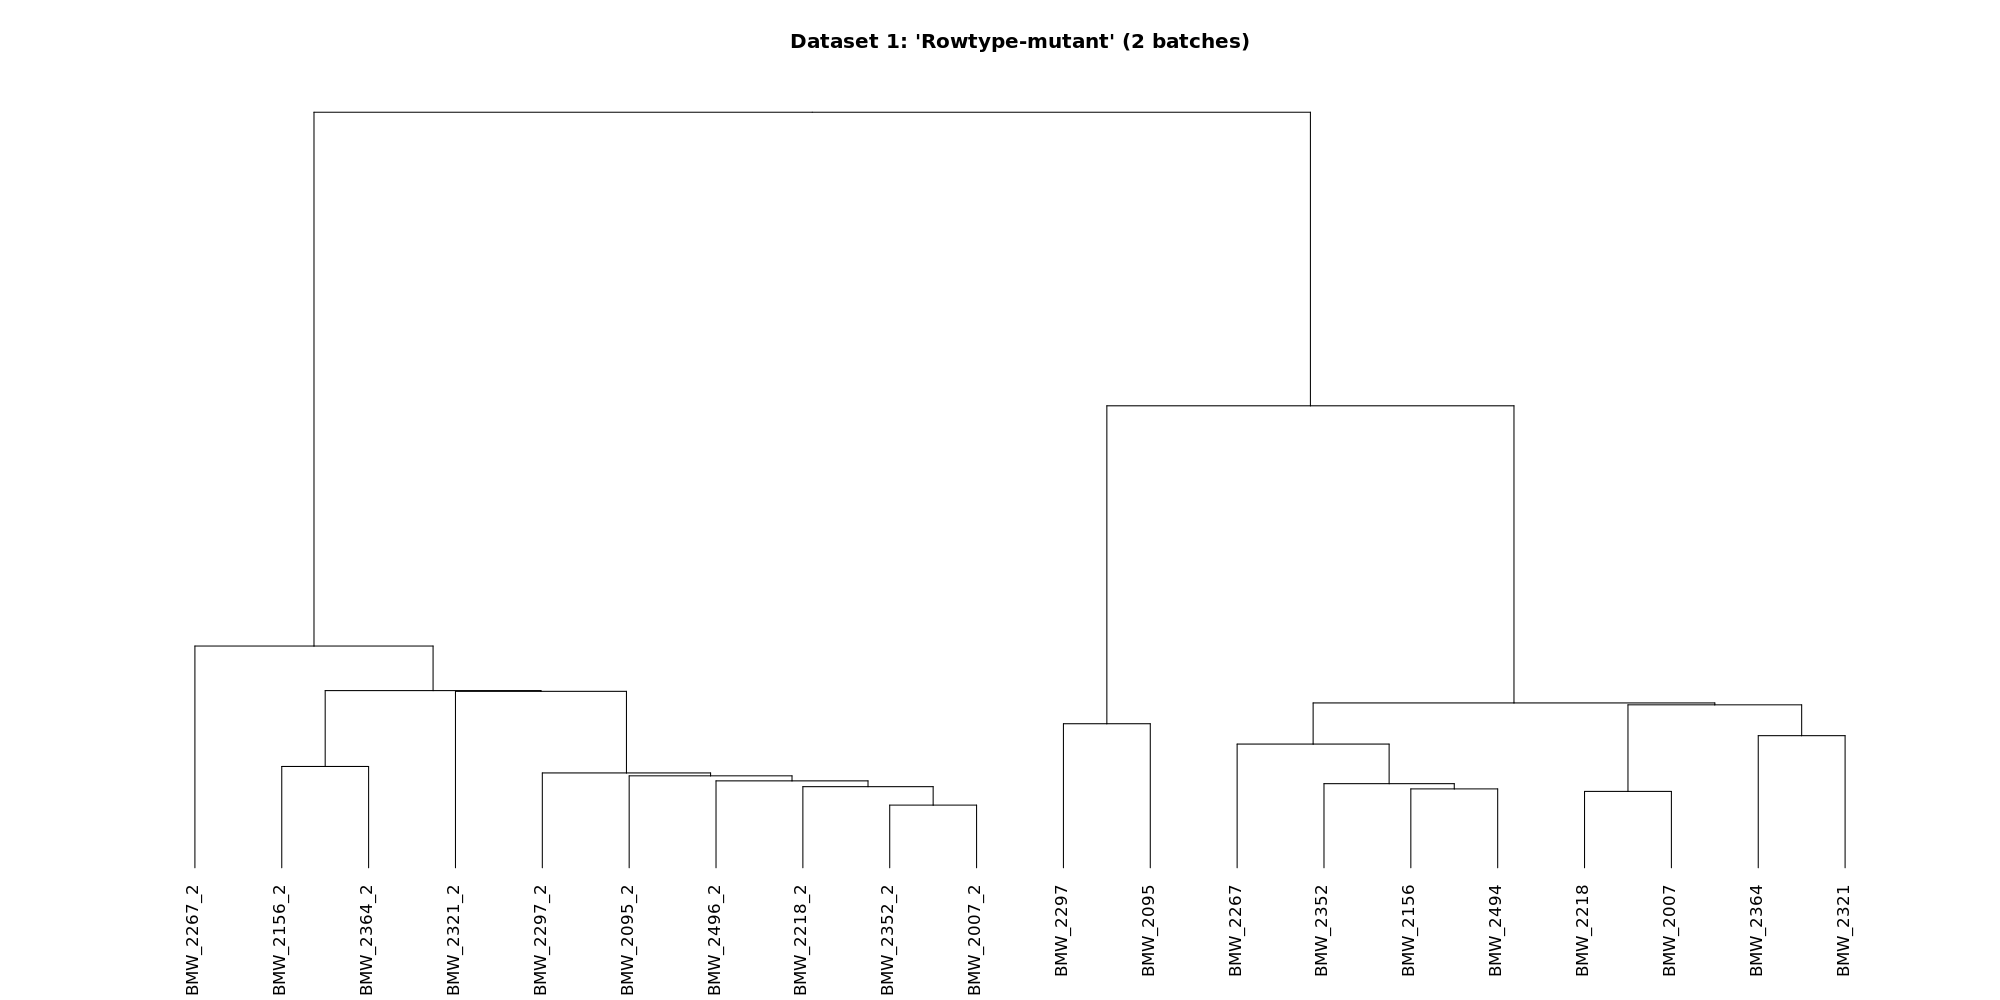

In [72]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)
cluster_data <- cluster_data2%>%
select(-treatment,-Groups) %>%
#column_to_rownames("genotype") %>%
dist(method="euclidean") %>%
 hclust(method = "single") %>%
as.dendrogram()

cluster_data %>%
 plot(axes=FALSE, main = "Dataset 1: 'Rowtype-mutant' (2 batches)")
cluster_t <-Cluster_mut2$color_treatmen
colored_bars(colors = cluster_t, dend = cluster_data, rowLabels = "Treatment")

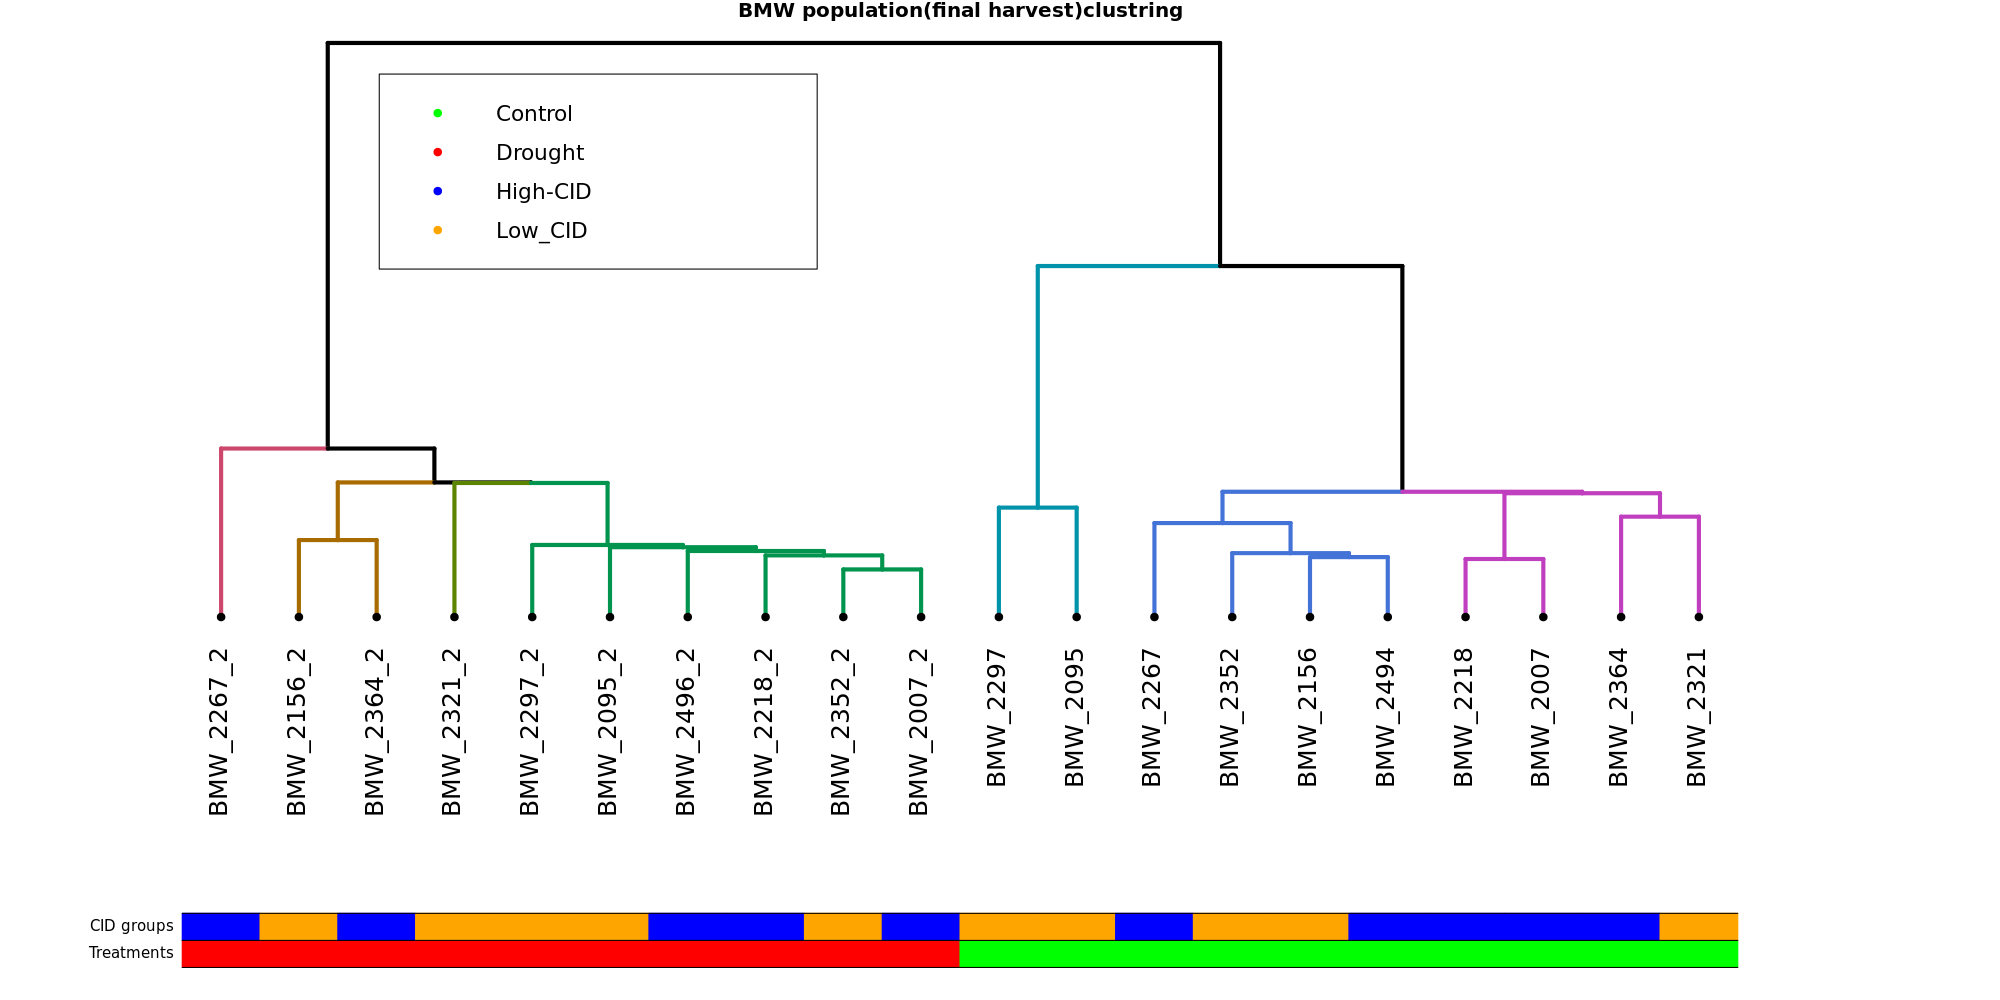

In [79]:
par(mar=c(18,6,1,10))
cluster_data %>%

        set("leaves_pch",19)  %>% 
        set("labels_cex", 1.5) %>%
        set("branches_lwd", 4)%>%
        color_branches(k = 7) %>%
        plot(axes=FALSE, main = "BMW population(final harvest)clustring")
cluster_t <- Cluster_mut2$color_treatment
cluster_g <- Cluster_mut2$color_Groups
both_bars<- cbind(cluster_t, cluster_g)
colored_bars(colors =both_bars, dend = cluster_data, , rowLabels = c("Treatments","CID groups")) 

#legend("topright", legend =c("Control", "stress"), fill = c(3,2))
#legend("topleft", legend =c("High-CID", "Low_CID"), fill = c(7,4))
legend(aes(x=0.1, y=130.500), 
     legend = c("Control" , "Drought" , "High-CID" , "Low_CID" ), 
     col = c("green", "red" , "blue" , "orange" ),
            pch = c(20,20,20,20), bty = "b",  pt.cex = 1.5, cex = 1.3, 
     text.col = "black", horiz = FALSE, inset = c(0, 0))

# joining both data set(phenospex and harvest)

In [186]:
finall_cluster_data<- read.table("/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/finall_data_clustring.csv")

In [187]:
finall_cluster_data$genotype<- as.character(finall_cluster_data$genotype)
finall_cluster_data$treatment<- as.character(finall_cluster_data$treatment)
finall_cluster_data$Groups<- as.character(finall_cluster_data$Groups)
str(finall_cluster_data)

'data.frame':	20 obs. of  12 variables:
 $ genotype  : chr  "BMW_2218" "BMW_2218" "BMW_2156" "BMW_2156" ...
 $ treatment : chr  "control" "drought" "control" "drought" ...
 $ Groups    : chr  "High" "High" "Low" "Low" ...
 $ Biomass   : num  27354545 13470493 30966751 9338372 21639446 ...
 $ Height    : num  590 466 530 382 475 ...
 $ M.Height  : num  699 568 639 498 568 ...
 $ leaf_angle: num  33.3 34.9 34.1 33.4 33.4 ...
 $ LA        : num  38423 26334 45435 22333 37396 ...
 $ LAI       : num  0.207 0.142 0.245 0.12 0.202 ...
 $ LAP       : num  17152 12992 19921 10729 16875 ...
 $ LIc       : num  1.83 1.76 1.8 1.83 1.82 ...
 $ LPD       : num  418 331 364 259 310 ...


In [188]:
cluster_data<- read.table( "harvest_final_cluster_data.csv")
cluster_data$IDs<- as.character(cluster_data$IDs)
cluster_data$treatment<- as.character(cluster_data$treatment)
cluster_data$Groups<- as.character(cluster_data$Groups)
str(cluster_data)

'data.frame':	20 obs. of  16 variables:
 $ IDs               : chr  "2218" "2218" "2156" "2156" ...
 $ treatment         : chr  "ds" "ww" "ds" "ww" ...
 $ Groups            : chr  "High" "High" "Low" "Low" ...
 $ max.Height        : num  74.8 97.8 72.7 100.2 59.3 ...
 $ Biomass           : num  5.38 14.55 7.34 17.66 5.28 ...
 $ Shoots            : num  5 9 5.33 10.67 5.5 ...
 $ Shoots_with_ear   : num  4.33 8.67 3.33 10.67 5.17 ...
 $ Shoots_without_ear: num  0.667 0.333 2 0 0.5 ...
 $ Nr_ears           : num  4.33 8.67 3.33 10.67 5.17 ...
 $ Full_ear          : num  2.83 8.67 2.5 9.67 4 ...
 $ Half_ear          : num  1.5 0 0.5 0.667 1.167 ...
 $ Weight_ear        : num  4.16 12.03 1.75 9.66 3.63 ...
 $ Nr_seeds          : num  82.7 238.7 39.2 212.7 85.3 ...
 $ Mature_seeds      : num  81 237.8 39.2 212.2 84.3 ...
 $ Poor_seeds        : num  1.667 0.833 0 0.5 1 ...
 $ TKW               : num  33.8 36.7 22.9 26.7 22.6 ...


In [189]:

names(cluster_data)[1]<- "genotype"
finall_cluster_data
cluster_data

genotype treatment Groups Biomass  Height   M.Height leaf_angle LA      
1  BMW_2218 control   High   27354545 589.7728 699.1577 33.33840   38423.15
2  BMW_2218 drought   High   13470493 465.9072 567.6382 34.89222   26334.05
3  BMW_2156 control   Low    30966751 530.4440 638.5934 34.06515   45435.48
4  BMW_2156 drought   Low     9338372 382.3931 498.0626 33.44868   22332.57
5  BMW_2297 control   Low    21639446 474.7985 568.0266 33.42527   37396.29
6  BMW_2297 drought   Low     9702674 384.6623 470.8960 33.40266   23438.75
7  BMW_2352 control   Low    24433186 547.0567 643.4765 32.38830   37405.07
8  BMW_2352 drought   Low    10285090 426.6668 507.7922 34.29071   22766.80
9  BMW_2364 control   High   26496945 507.8742 614.1192 32.94684   39924.92
10 BMW_2364 drought   High   13027827 447.4838 562.8342 33.61238   24463.62
11 BMW_2095 control   Low    15120896 417.8072 508.8256 32.50788   30438.86
12 BMW_2095 drought   Low     7080126 342.4125 424.3203 33.18986   19045.57
13 BMW_2321 control   Low    19396600 515.8067 596.1149 32.64407   32502.29
14 BMW_2321 drought   Low     9366387 433.0904 533.2229 32.13594   19662.73
15 BMW_2267 control   High   26403094 498.6067 624.2084 33.10806   41041.11
16 BMW_2267 drought   High    8650982 375.9877 468.0103 33.76158   20234.44
17 BMW_2007 control   High   21069828 544.4432 623.4311 33.59189   32369.48
18 BMW_2007 drought   High   10693201 447.6326 537.2773 34.37173   22368.72
19 BMW_2496 control   High   25874439 547.9722 643.4190 33.20479   38455.94
20 BMW_2496 drought   High   12550949 477.5055 591.4061 33.51537   23909.33
   LAI       LAP       LIc      LPD     
1  0.2071323 17152.032 1.828303 417.8643
2  0.1419882 12991.617 1.759721 331.3559
3  0.2449444 19921.373 1.799768 363.7814
4  0.1203798 10728.507 1.833905 258.8153
5  0.2016270 16875.153 1.823370 309.6860
6  0.1263522 11177.813 1.827071 249.2810
7  0.2016545 15815.131 1.887344 379.0227
8  0.1227621 11210.889 1.787067 298.5256
9  0.2152258 17173.212 1.855560 364.6786
10 0.1318566 11391.780 1.816813 323.4765
11 0.1640849 13866.045 1.870337 275.9251
12 0.1026640  9194.182 1.836367 217.1541
13 0.1752339 14538.975 1.861740 358.3239
14 0.1060000  9197.799 1.892378 311.7654
15 0.2212571 18091.309 1.847621 326.6553
16 0.1090619  9828.917 1.810480 250.2810
17 0.1744560 14255.477 1.823679 398.5856
18 0.1206245 10967.760 1.790631 325.8301
19 0.2073184 16516.007 1.848459 388.9501
20 0.1288689 11383.228 1.825585 349.2549

genotype treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
1  2218     ds        High    74.75000   5.385000  5.000000  4.333333      
2  2218     ww        High    97.83333  14.550000  9.000000  8.666667      
3  2156     ds        Low     72.65000   7.336667  5.333333  3.333333      
4  2156     ww        Low    100.18333  17.661667 10.666667 10.666667      
5  2297     ds        Low     59.33333   5.278333  5.500000  5.166667      
6  2297     ww        Low     78.66667  13.136667 11.500000 11.166667      
7  2352     ds        Low     65.40000   4.540000  3.000000  3.100000      
8  2352     ww        Low     81.06667  13.433333  8.333333  8.000000      
9  2364     ds        High    81.98333   8.085000  4.000000  3.000000      
10 2364     ww        High    94.16000  17.118000  8.600000  8.600000      
11 2095     ds        Low     50.66667   3.420000  3.833333  3.666667      
12 2095     ww        Low     66.32000   9.680000  8.600000  8.400000      
13 2321     ds        Low     66.38333   4.808333  4.333333  3.583333      
14 2321     ww        Low     76.66667  10.210000  7.666667  7.500000      
15 2267     ds        High    70.26000   7.832000  7.400000  5.200000      
16 2267     ww        High    99.64000  17.676000 10.200000 10.200000      
17 2007     ds        High    71.78333   5.338333  5.166667  4.666667      
18 2007     ww        High    89.30000  10.534000  8.800000  8.400000      
19 2496     ds        High    83.26667   6.358333  4.333333  3.083333      
20 2496     ww        High    94.06667  13.335000  8.500000  8.500000      
   Shoots_without_ear Nr_ears   Full_ear  Half_ear  Weight_ear Nr_seeds 
1  0.6666667           4.333333  2.833333 1.5000000  4.155000   82.66667
2  0.3333333           8.666667  8.666667 0.0000000 12.025000  238.66667
3  2.0000000           3.333333  2.500000 0.5000000  1.750000   39.16667
4  0.0000000          10.666667  9.666667 0.6666667  9.660000  212.66667
5  0.5000000           5.166667  4.000000 1.1666667  3.626667   85.33333
6  0.3333333          11.166667 11.166667 0.0000000 12.836667  332.50000
7  0.0000000           3.000000  3.000000 0.0000000  3.218000   73.80000
8  0.3333333           7.333333  7.333333 0.0000000  8.703333  205.83333
9  1.0000000           3.166667  3.000000 0.1666667  2.488333   50.33333
10 0.0000000           8.600000  8.000000 0.6000000 13.422000  264.40000
11 0.1666667           3.666667  3.166667 0.5000000  3.658333   71.16667
12 0.2000000           8.400000  8.200000 0.2000000 11.182000  316.00000
13 0.8333333           3.500000  3.333333 0.1666667  4.250000  107.50000
14 0.1666667           7.500000  7.500000 0.0000000 11.118333  253.50000
15 2.2000000           5.200000  4.800000 0.4000000  1.252000   12.00000
16 0.0000000          10.200000  9.400000 0.8000000  9.532000  215.00000
17 0.5000000           4.666667  3.166667 1.5000000  3.785000   71.50000
18 0.4000000           8.400000  8.400000 0.0000000 11.016000  231.00000
19 1.0900000           3.166667  3.000000 0.1666667  2.865000   81.33333
20 1.5000000           8.500000  8.500000 0.0000000  9.711667  209.50000
   Mature_seeds Poor_seeds TKW     
1   81.00000     1.6666667 33.75667
2  237.83333     0.8333333 36.71667
3   39.16667     0.0000000 22.85667
4  212.16667     0.5000000 26.66667
5   84.33333     1.0000000 22.57167
6  331.00000     1.5000000 24.91667
7   73.80000     0.0000000 25.80600
8  205.50000     0.3333333 26.98833
9   49.66667     0.6666667 28.10667
10 255.20000     9.2000000 37.48000
11  70.83333     0.3333333 33.27833
12 315.40000     0.6000000 24.18000
13 107.16667     0.3333333 24.58333
14 251.00000     2.5000000 29.83333
15  11.60000     0.4000000  9.52000
16 191.60000    23.4000000 30.04000
17  71.50000     0.0000000 34.22833
18 231.00000     0.0000000 34.46000
19  81.33333     0.0000000 20.49667
20 203.33333     6.1666667 31.20000

In [190]:
finall_cluster_data$genotype <- gsub("[BMW_]","", finall_cluster_data$genotype)
colnames(finall_cluster_data)[4] = "digital_biomass"

In [191]:

head(finall_cluster_data[,])

genotype treatment Groups digital_biomass Height   M.Height leaf_angle
1 2218     control   High   27354545        589.7728 699.1577 33.33840  
2 2218     drought   High   13470493        465.9072 567.6382 34.89222  
3 2156     control   Low    30966751        530.4440 638.5934 34.06515  
4 2156     drought   Low     9338372        382.3931 498.0626 33.44868  
5 2297     control   Low    21639446        474.7985 568.0266 33.42527  
6 2297     drought   Low     9702674        384.6623 470.8960 33.40266  
  LA       LAI       LAP      LIc      LPD     
1 38423.15 0.2071323 17152.03 1.828303 417.8643
2 26334.05 0.1419882 12991.62 1.759721 331.3559
3 45435.48 0.2449444 19921.37 1.799768 363.7814
4 22332.57 0.1203798 10728.51 1.833905 258.8153
5 37396.29 0.2016270 16875.15 1.823370 309.6860
6 23438.75 0.1263522 11177.81 1.827071 249.2810

In [197]:
joinTabl = cbind(cluster_data, finall_cluster_data[,4:length(colnames(finall_cluster_data))])
head(joinTabl)


genotype treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
1 2218     ds        High    74.75000   5.385000  5.000000  4.333333      
2 2218     ww        High    97.83333  14.550000  9.000000  8.666667      
3 2156     ds        Low     72.65000   7.336667  5.333333  3.333333      
4 2156     ww        Low    100.18333  17.661667 10.666667 10.666667      
5 2297     ds        Low     59.33333   5.278333  5.500000  5.166667      
6 2297     ww        Low     78.66667  13.136667 11.500000 11.166667      
  Shoots_without_ear Nr_ears   Full_ear  ⋯ TKW      digital_biomass Height  
1 0.6666667           4.333333  2.833333 ⋯ 33.75667 27354545        589.7728
2 0.3333333           8.666667  8.666667 ⋯ 36.71667 13470493        465.9072
3 2.0000000           3.333333  2.500000 ⋯ 22.85667 30966751        530.4440
4 0.0000000          10.666667  9.666667 ⋯ 26.66667  9338372        382.3931
5 0.5000000           5.166667  4.000000 ⋯ 22.57167 21639446        474.7985
6 0.3333333          11.166667 11.166667 ⋯ 24.91667  9702674        384.6623
  M.Height leaf_angle LA       LAI       LAP      LIc      LPD     
1 699.1577 33.33840   38423.15 0.2071323 17152.03 1.828303 417.8643
2 567.6382 34.89222   26334.05 0.1419882 12991.62 1.759721 331.3559
3 638.5934 34.06515   45435.48 0.2449444 19921.37 1.799768 363.7814
4 498.0626 33.44868   22332.57 0.1203798 10728.51 1.833905 258.8153
5 568.0266 33.42527   37396.29 0.2016270 16875.15 1.823370 309.6860
6 470.8960 33.40266   23438.75 0.1263522 11177.81 1.827071 249.2810

In [209]:
rownames(joinTabl) <- c("BMW_2218_2","BMW_2218","BMW_2156_2","BMW_2156","BMW_2297_2","BMW_2297","BMW_2352_2","BMW_2352","BMW_2364_2",
                                   "BMW_2364","BMW_2095_2", "BMW_2095",
                                   "BMW_2321_2","BMW_2321","BMW_2267_2","BMW_2267","BMW_2007_2","BMW_2007","BMW_2496_2","BMW_2494")
joinTabl

genotype treatment Groups max.Height Biomass   Shoots   
BMW_2218_2 2218     ds        High    74.75000   5.385000  5.000000
BMW_2218   2218     ww        High    97.83333  14.550000  9.000000
BMW_2156_2 2156     ds        Low     72.65000   7.336667  5.333333
BMW_2156   2156     ww        Low    100.18333  17.661667 10.666667
BMW_2297_2 2297     ds        Low     59.33333   5.278333  5.500000
BMW_2297   2297     ww        Low     78.66667  13.136667 11.500000
BMW_2352_2 2352     ds        Low     65.40000   4.540000  3.000000
BMW_2352   2352     ww        Low     81.06667  13.433333  8.333333
BMW_2364_2 2364     ds        High    81.98333   8.085000  4.000000
BMW_2364   2364     ww        High    94.16000  17.118000  8.600000
BMW_2095_2 2095     ds        Low     50.66667   3.420000  3.833333
BMW_2095   2095     ww        Low     66.32000   9.680000  8.600000
BMW_2321_2 2321     ds        Low     66.38333   4.808333  4.333333
BMW_2321   2321     ww        Low     76.66667  10.210000  7.666667
BMW_2267_2 2267     ds        High    70.26000   7.832000  7.400000
BMW_2267   2267     ww        High    99.64000  17.676000 10.200000
BMW_2007_2 2007     ds        High    71.78333   5.338333  5.166667
BMW_2007   2007     ww        High    89.30000  10.534000  8.800000
BMW_2496_2 2496     ds        High    83.26667   6.358333  4.333333
BMW_2494   2496     ww        High    94.06667  13.335000  8.500000
           Shoots_with_ear Shoots_without_ear Nr_ears   Full_ear  ⋯ TKW     
BMW_2218_2  4.333333       0.6666667           4.333333  2.833333 ⋯ 33.75667
BMW_2218    8.666667       0.3333333           8.666667  8.666667 ⋯ 36.71667
BMW_2156_2  3.333333       2.0000000           3.333333  2.500000 ⋯ 22.85667
BMW_2156   10.666667       0.0000000          10.666667  9.666667 ⋯ 26.66667
BMW_2297_2  5.166667       0.5000000           5.166667  4.000000 ⋯ 22.57167
BMW_2297   11.166667       0.3333333          11.166667 11.166667 ⋯ 24.91667
BMW_2352_2  3.100000       0.0000000           3.000000  3.000000 ⋯ 25.80600
BMW_2352    8.000000       0.3333333           7.333333  7.333333 ⋯ 26.98833
BMW_2364_2  3.000000       1.0000000           3.166667  3.000000 ⋯ 28.10667
BMW_2364    8.600000       0.0000000           8.600000  8.000000 ⋯ 37.48000
BMW_2095_2  3.666667       0.1666667           3.666667  3.166667 ⋯ 33.27833
BMW_2095    8.400000       0.2000000           8.400000  8.200000 ⋯ 24.18000
BMW_2321_2  3.583333       0.8333333           3.500000  3.333333 ⋯ 24.58333
BMW_2321    7.500000       0.1666667           7.500000  7.500000 ⋯ 29.83333
BMW_2267_2  5.200000       2.2000000           5.200000  4.800000 ⋯  9.52000
BMW_2267   10.200000       0.0000000          10.200000  9.400000 ⋯ 30.04000
BMW_2007_2  4.666667       0.5000000           4.666667  3.166667 ⋯ 34.22833
BMW_2007    8.400000       0.4000000           8.400000  8.400000 ⋯ 34.46000
BMW_2496_2  3.083333       1.0900000           3.166667  3.000000 ⋯ 20.49667
BMW_2494    8.500000       1.5000000           8.500000  8.500000 ⋯ 31.20000
           digital_biomass Height   M.Height leaf_angle LA       LAI      
BMW_2218_2 27354545        589.7728 699.1577 33.33840   38423.15 0.2071323
BMW_2218   13470493        465.9072 567.6382 34.89222   26334.05 0.1419882
BMW_2156_2 30966751        530.4440 638.5934 34.06515   45435.48 0.2449444
BMW_2156    9338372        382.3931 498.0626 33.44868   22332.57 0.1203798
BMW_2297_2 21639446        474.7985 568.0266 33.42527   37396.29 0.2016270
BMW_2297    9702674        384.6623 470.8960 33.40266   23438.75 0.1263522
BMW_2352_2 24433186        547.0567 643.4765 32.38830   37405.07 0.2016545
BMW_2352   10285090        426.6668 507.7922 34.29071   22766.80 0.1227621
BMW_2364_2 26496945        507.8742 614.1192 32.94684   39924.92 0.2152258
BMW_2364   13027827        447.4838 562.8342 33.61238   24463.62 0.1318566
BMW_2095_2 15120896        417.8072 508.8256 32.50788   30438.86 0.1640849
BMW_2095    7080126        342.4125 424.3203 33.18986   19045.57 0

In [210]:
cluster_data3<-joinTabl [,-1]
cluster_data3

treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
BMW_2218_2 ds        High    74.75000   5.385000  5.000000  4.333333      
BMW_2218   ww        High    97.83333  14.550000  9.000000  8.666667      
BMW_2156_2 ds        Low     72.65000   7.336667  5.333333  3.333333      
BMW_2156   ww        Low    100.18333  17.661667 10.666667 10.666667      
BMW_2297_2 ds        Low     59.33333   5.278333  5.500000  5.166667      
BMW_2297   ww        Low     78.66667  13.136667 11.500000 11.166667      
BMW_2352_2 ds        Low     65.40000   4.540000  3.000000  3.100000      
BMW_2352   ww        Low     81.06667  13.433333  8.333333  8.000000      
BMW_2364_2 ds        High    81.98333   8.085000  4.000000  3.000000      
BMW_2364   ww        High    94.16000  17.118000  8.600000  8.600000      
BMW_2095_2 ds        Low     50.66667   3.420000  3.833333  3.666667      
BMW_2095   ww        Low     66.32000   9.680000  8.600000  8.400000      
BMW_2321_2 ds        Low     66.38333   4.808333  4.333333  3.583333      
BMW_2321   ww        Low     76.66667  10.210000  7.666667  7.500000      
BMW_2267_2 ds        High    70.26000   7.832000  7.400000  5.200000      
BMW_2267   ww        High    99.64000  17.676000 10.200000 10.200000      
BMW_2007_2 ds        High    71.78333   5.338333  5.166667  4.666667      
BMW_2007   ww        High    89.30000  10.534000  8.800000  8.400000      
BMW_2496_2 ds        High    83.26667   6.358333  4.333333  3.083333      
BMW_2494   ww        High    94.06667  13.335000  8.500000  8.500000      
           Shoots_without_ear Nr_ears   Full_ear  Half_ear  ⋯ TKW     
BMW_2218_2 0.6666667           4.333333  2.833333 1.5000000 ⋯ 33.75667
BMW_2218   0.3333333           8.666667  8.666667 0.0000000 ⋯ 36.71667
BMW_2156_2 2.0000000           3.333333  2.500000 0.5000000 ⋯ 22.85667
BMW_2156   0.0000000          10.666667  9.666667 0.6666667 ⋯ 26.66667
BMW_2297_2 0.5000000           5.166667  4.000000 1.1666667 ⋯ 22.57167
BMW_2297   0.3333333          11.166667 11.166667 0.0000000 ⋯ 24.91667
BMW_2352_2 0.0000000           3.000000  3.000000 0.0000000 ⋯ 25.80600
BMW_2352   0.3333333           7.333333  7.333333 0.0000000 ⋯ 26.98833
BMW_2364_2 1.0000000           3.166667  3.000000 0.1666667 ⋯ 28.10667
BMW_2364   0.0000000           8.600000  8.000000 0.6000000 ⋯ 37.48000
BMW_2095_2 0.1666667           3.666667  3.166667 0.5000000 ⋯ 33.27833
BMW_2095   0.2000000           8.400000  8.200000 0.2000000 ⋯ 24.18000
BMW_2321_2 0.8333333           3.500000  3.333333 0.1666667 ⋯ 24.58333
BMW_2321   0.1666667           7.500000  7.500000 0.0000000 ⋯ 29.83333
BMW_2267_2 2.2000000           5.200000  4.800000 0.4000000 ⋯  9.52000
BMW_2267   0.0000000          10.200000  9.400000 0.8000000 ⋯ 30.04000
BMW_2007_2 0.5000000           4.666667  3.166667 1.5000000 ⋯ 34.22833
BMW_2007   0.4000000           8.400000  8.400000 0.0000000 ⋯ 34.46000
BMW_2496_2 1.0900000           3.166667  3.000000 0.1666667 ⋯ 20.49667
BMW_2494   1.5000000           8.500000  8.500000 0.0000000 ⋯ 31.20000
           digital_biomass Height   M.Height leaf_angle LA       LAI      
BMW_2218_2 27354545        589.7728 699.1577 33.33840   38423.15 0.2071323
BMW_2218   13470493        465.9072 567.6382 34.89222   26334.05 0.1419882
BMW_2156_2 30966751        530.4440 638.5934 34.06515   45435.48 0.2449444
BMW_2156    9338372        382.3931 498.0626 33.44868   22332.57 0.1203798
BMW_2297_2 21639446        474.7985 568.0266 33.42527   37396.29 0.2016270
BMW_2297    9702674        384.6623 470.8960 33.40266   23438.75 0.1263522
BMW_2352_2 24433186        547.0567 643.4765 32.38830   37405.07 0.2016545
BMW_2352   10285090        426.6668 507.7922 34.29071   22766.80 0.1227621
BMW_2364_2 26496945        507.8742 614.1192 32.94684   39924.92 0.2152258
BMW_2364   13027827        447.4838 562.8342 33.61238   24463.62 0.1318566
BMW_2095_2 15120896        417.8072 508.8256 32.50788   30438.86 0.1640849
BMW_2095    7080126        342.4125 424.3203 

In [211]:

Cluster_mut <- cluster_data3%>% 
      mutate(color_treatment = case_when(
              treatment == "ww" ~ "green",
             treatment == "ds" ~ "red"))
#Cluster_mut

Cluster_mut3 <- Cluster_mut%>% 
      mutate(color_Groups = case_when(
              Groups == "High" ~ "blue",
             Groups == "Low" ~ "orange"))
Cluster_mut3

treatment Groups max.Height Biomass   Shoots    Shoots_with_ear
BMW_2218_2 ds        High    74.75000   5.385000  5.000000  4.333333      
BMW_2218   ww        High    97.83333  14.550000  9.000000  8.666667      
BMW_2156_2 ds        Low     72.65000   7.336667  5.333333  3.333333      
BMW_2156   ww        Low    100.18333  17.661667 10.666667 10.666667      
BMW_2297_2 ds        Low     59.33333   5.278333  5.500000  5.166667      
BMW_2297   ww        Low     78.66667  13.136667 11.500000 11.166667      
BMW_2352_2 ds        Low     65.40000   4.540000  3.000000  3.100000      
BMW_2352   ww        Low     81.06667  13.433333  8.333333  8.000000      
BMW_2364_2 ds        High    81.98333   8.085000  4.000000  3.000000      
BMW_2364   ww        High    94.16000  17.118000  8.600000  8.600000      
BMW_2095_2 ds        Low     50.66667   3.420000  3.833333  3.666667      
BMW_2095   ww        Low     66.32000   9.680000  8.600000  8.400000      
BMW_2321_2 ds        Low     66.38333   4.808333  4.333333  3.583333      
BMW_2321   ww        Low     76.66667  10.210000  7.666667  7.500000      
BMW_2267_2 ds        High    70.26000   7.832000  7.400000  5.200000      
BMW_2267   ww        High    99.64000  17.676000 10.200000 10.200000      
BMW_2007_2 ds        High    71.78333   5.338333  5.166667  4.666667      
BMW_2007   ww        High    89.30000  10.534000  8.800000  8.400000      
BMW_2496_2 ds        High    83.26667   6.358333  4.333333  3.083333      
BMW_2494   ww        High    94.06667  13.335000  8.500000  8.500000      
           Shoots_without_ear Nr_ears   Full_ear  Half_ear  ⋯ Height   M.Height
BMW_2218_2 0.6666667           4.333333  2.833333 1.5000000 ⋯ 589.7728 699.1577
BMW_2218   0.3333333           8.666667  8.666667 0.0000000 ⋯ 465.9072 567.6382
BMW_2156_2 2.0000000           3.333333  2.500000 0.5000000 ⋯ 530.4440 638.5934
BMW_2156   0.0000000          10.666667  9.666667 0.6666667 ⋯ 382.3931 498.0626
BMW_2297_2 0.5000000           5.166667  4.000000 1.1666667 ⋯ 474.7985 568.0266
BMW_2297   0.3333333          11.166667 11.166667 0.0000000 ⋯ 384.6623 470.8960
BMW_2352_2 0.0000000           3.000000  3.000000 0.0000000 ⋯ 547.0567 643.4765
BMW_2352   0.3333333           7.333333  7.333333 0.0000000 ⋯ 426.6668 507.7922
BMW_2364_2 1.0000000           3.166667  3.000000 0.1666667 ⋯ 507.8742 614.1192
BMW_2364   0.0000000           8.600000  8.000000 0.6000000 ⋯ 447.4838 562.8342
BMW_2095_2 0.1666667           3.666667  3.166667 0.5000000 ⋯ 417.8072 508.8256
BMW_2095   0.2000000           8.400000  8.200000 0.2000000 ⋯ 342.4125 424.3203
BMW_2321_2 0.8333333           3.500000  3.333333 0.1666667 ⋯ 515.8067 596.1149
BMW_2321   0.1666667           7.500000  7.500000 0.0000000 ⋯ 433.0904 533.2229
BMW_2267_2 2.2000000           5.200000  4.800000 0.4000000 ⋯ 498.6067 624.2084
BMW_2267   0.0000000          10.200000  9.400000 0.8000000 ⋯ 375.9877 468.0103
BMW_2007_2 0.5000000           4.666667  3.166667 1.5000000 ⋯ 544.4432 623.4311
BMW_2007   0.4000000           8.400000  8.400000 0.0000000 ⋯ 447.6326 537.2773
BMW_2496_2 1.0900000           3.166667  3.000000 0.1666667 ⋯ 547.9722 643.4190
BMW_2494   1.5000000           8.500000  8.500000 0.0000000 ⋯ 477.5055 591.4061
           leaf_angle LA       LAI       LAP       LIc      LPD     
BMW_2218_2 33.33840   38423.15 0.2071323 17152.032 1.828303 417.8643
BMW_2218   34.89222   26334.05 0.1419882 12991.617 1.759721 331.3559
BMW_2156_2 34.06515   45435.48 0.2449444 19921.373 1.799768 363.7814
BMW_2156   33.44868   22332.57 0.1203798 10728.507 1.833905 258.8153
BMW_2297_2 33.42527   37396.29 0.2016270 16875.153 1.823370 309.6860
BMW_2297   33.40266   23438.75 0.1263522 11177.813 1.827071 249.2810
BMW_2352_2 32.38830   37405.07 0.2016545 15815.131 1.887344 379.0227
BMW_2352   34.29071   22766.80 0.1227621 11210.889 1.787067 298.5256
BMW_2364_2 32.94684   39924.92 0.2152258 17173.212 1.855560 364.6786
BMW_2364   33.61238   24463.62 0.1318566 11391.780 1.816813 323.47

In [212]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(stats))
suppressPackageStartupMessages(library(dendextend))
set.seed(142)

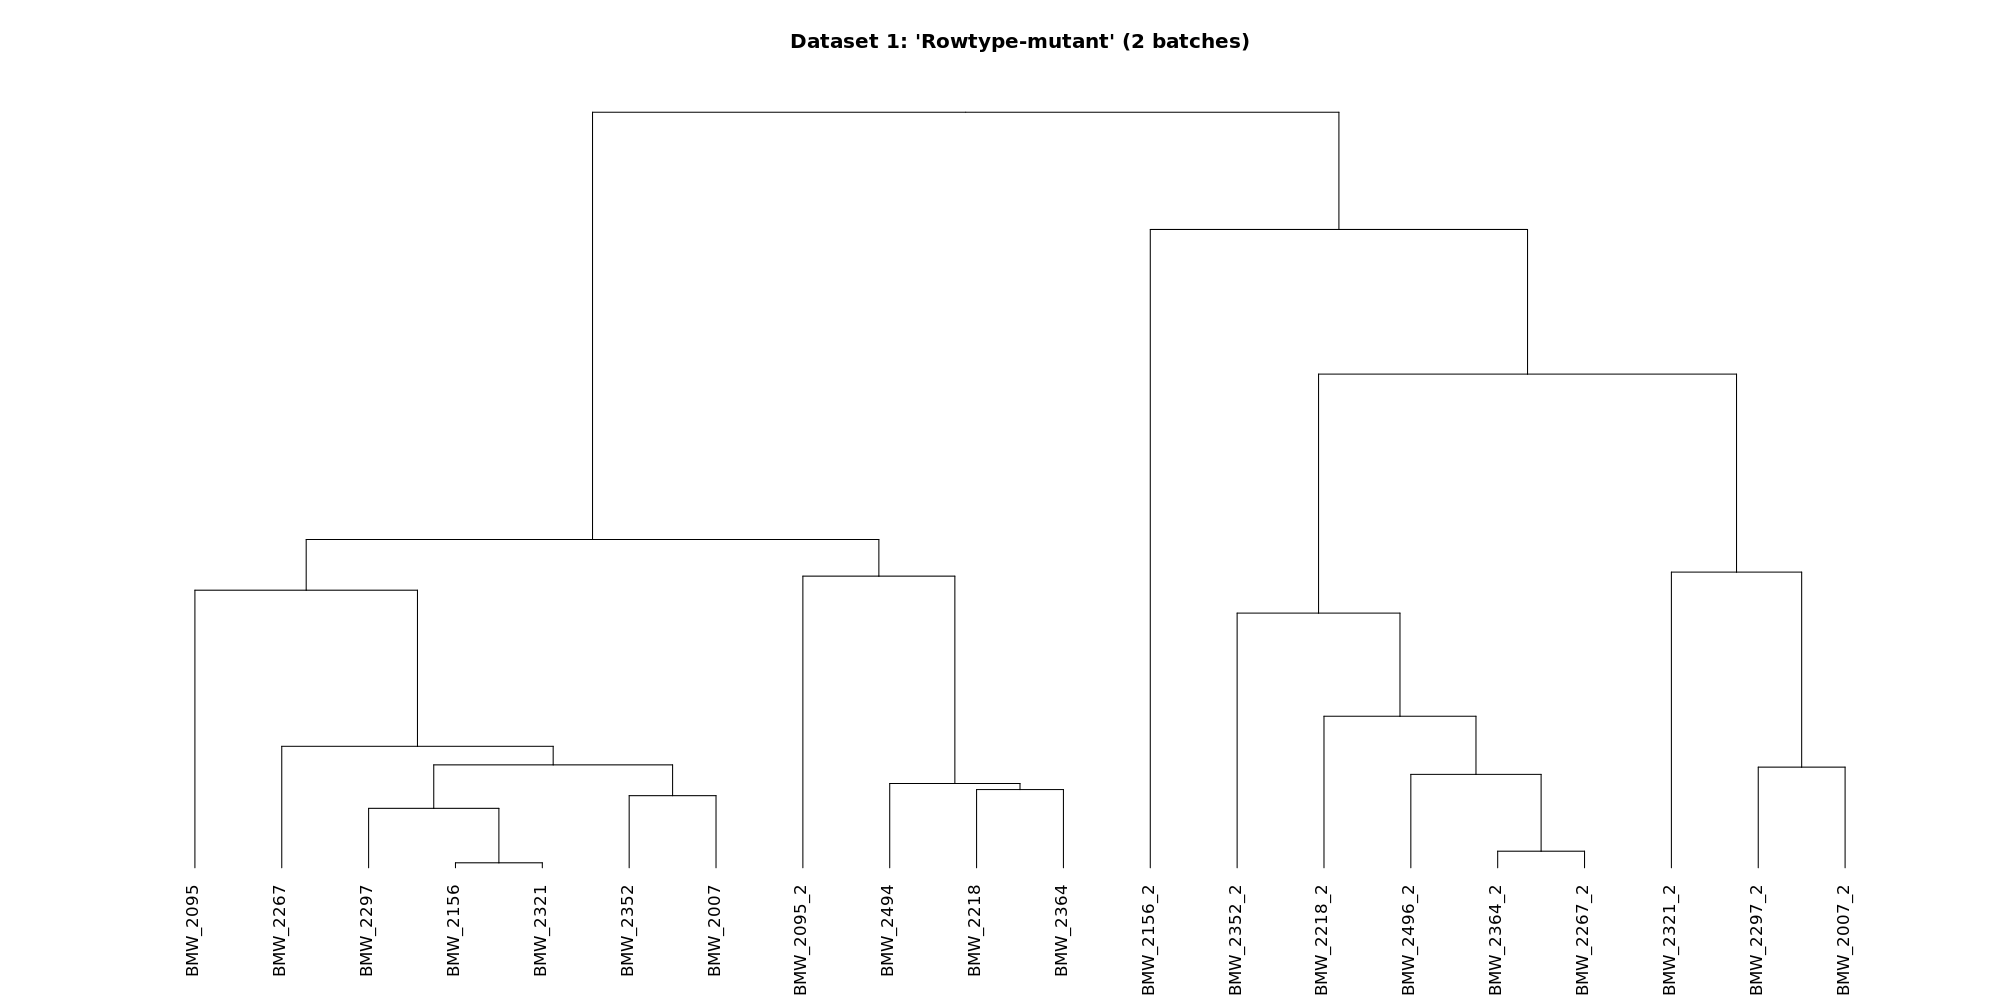

In [213]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)
cluster_data <- cluster_data3%>%
select(-treatment,-Groups) %>%
#column_to_rownames("genotype") %>%
dist(method="euclidean") %>%
 hclust(method = "single") %>%
as.dendrogram()

cluster_data %>%
 plot(axes=FALSE, main = "Dataset 1: 'Rowtype-mutant' (2 batches)")
cluster_t <-Cluster_mut2$color_treatmen
colored_bars(colors = cluster_t, dend = cluster_data, rowLabels = "Treatment")

In [241]:
par(mar=c(18,6,1,10))
cluster_data %>%

        set("leaves_pch",19)  %>% 
        set("labels_cex", 1.5) %>%
        set("branches_lwd", 4)%>%
        color_branches(k = 3) %>%
        plot(axes=FALSE, main = "BMW population(final harvest)clustring")
cluster_t <- Cluster_mut3$color_treatment
cluster_g <- Cluster_mut3$color_Groups
both_bars<- cbind(cluster_t, cluster_g)
colored_bars(colors =both_bars, dend = cluster_data, , rowLabels = c("Treatments","CID groups")) 

#legend("topright", legend =c("Control", "stress"), fill = c(3,2))
#legend("topleft", legend =c("High-CID", "Low_CID"), fill = c(7,4))
legend(aes(x=5, y=3999902), 
     legend = c("Control" , "Drought" , "High-CID" , "Low_CID" ), 
     col = c("green", "red" , "blue" , "orange" ),
            pch = c(20,20,20,20), bty = "b",  pt.cex = 1.5, cex = 1.3, 
     text.col = "black", horiz = FALSE, inset = c(0, 0))

In [238]:
a=seq(3e+06, 4e+06, 0.5)
a

[1] 3000000 3000000 3000001 3000002 3000002 3000002 3000003 3000004 3000004
   [10] 3000004 3000005 3000006 3000006 3000006 3000007 3000008 3000008 3000008
   [19] 3000009 3000010 3000010 3000010 3000011 3000012 3000012 3000012 3000013
   [28] 3000014 3000014 3000014 3000015 3000016 3000016 3000016 3000017 3000018
   [37] 3000018 3000018 3000019 3000020 3000020 3000020 3000021 3000022 3000022
   [46] 3000022 3000023 3000024 3000024 3000024 3000025 3000026 3000026 3000026
   [55] 3000027 3000028 3000028 3000028 3000029 3000030 3000030 3000030 3000031
   [64] 3000032 3000032 3000032 3000033 3000034 3000034 3000034 3000035 3000036
   [73] 3000036 3000036 3000037 3000038 3000038 3000038 3000039 3000040 3000040
   [82] 3000040 3000041 3000042 3000042 3000042 3000043 3000044 3000044 3000044
   [91] 3000045 3000046 3000046 3000046 3000047 3000048 3000048 3000048 3000049
  [100] 3000050 3000050 3000050 3000051 3000052 3000052 3000052 3000053 3000054
  [109] 3000054 3000054 3000055 3000056 3000056 3000056 3000057 3000058 3000058
  [118] 3000058 3000059 3000060 3000060 3000060 3000061 3000062 3000062 3000062
  [127] 3000063 3000064 3000064 3000064 3000065 3000066 3000066 3000066 3000067
  [136] 3000068 3000068 3000068 3000069 3000070 3000070 3000070 3000071 3000072
  [145] 3000072 3000072 3000073 3000074 3000074 3000074 3000075 3000076 3000076
  [154] 3000076 3000077 3000078 3000078 3000078 3000079 3000080 3000080 3000080
  [163] 3000081 3000082 3000082 3000082 3000083 3000084 3000084 3000084 3000085
  [172] 3000086 3000086 3000086 3000087 3000088 3000088 3000088 3000089 3000090
  [181] 3000090 3000090 3000091 3000092 3000092 3000092 3000093 3000094 3000094
  [190] 3000094 3000095 3000096 3000096 3000096 3000097 3000098 3000098 3000098
  [199] 3000099 3000100 3000100 3000100 3000101 3000102 3000102 3000102 3000103
  [208] 3000104 3000104 3000104 3000105 3000106 3000106 3000106 3000107 3000108
  [217] 3000108 3000108 3000109 3000110 3000110 3000110 3000111 3000112 3000112
  [226] 3000112 3000113 3000114 3000114 3000114 3000115 3000116 3000116 3000116
  [235] 3000117 3000118 3000118 3000118 3000119 3000120 3000120 3000120 3000121
  [244] 3000122 3000122 3000122 3000123 3000124 3000124 3000124 3000125 3000126
  [253] 3000126 3000126 3000127 3000128 3000128 3000128 3000129 3000130 3000130
  [262] 3000130 3000131 3000132 3000132 3000132 3000133 3000134 3000134 3000134
  [271] 3000135 3000136 3000136 3000136 3000137 3000138 3000138 3000138 3000139
  [280] 3000140 3000140 3000140 3000141 3000142 3000142 3000142 3000143 3000144
  [289] 3000144 3000144 3000145 3000146 3000146 3000146 3000147 3000148 3000148
  [298] 3000148 3000149 3000150 3000150 3000150 3000151 3000152 3000152 3000152
  [307] 3000153 3000154 3000154 3000154 3000155 3000156 3000156 3000156 3000157
  [316] 3000158 3000158 3000158 3000159 3000160 3000160 3000160 3000161 3000162
  [325] 3000162 3000162 3000163 3000164 3000164 3000164 3000165 3000166 3000166
  [334] 3000166 3000167 3000168 3000168 3000168 3000169 3000170 3000170 3000170
  [343] 3000171 3000172 3000172 3000172 3000173 3000174 3000174 3000174 3000175
  [352] 3000176 3000176 3000176 3000177 3000178 3000178 3000178 3000179 3000180
  [361] 3000180 3000180 3000181 3000182 3000182 3000182 3000183 3000184 3000184
  [370] 3000184 3000185 3000186 3000186 3000186 3000187 3000188 3000188 3000188
  [379] 3000189 3000190 3000190 3000190 3000191 3000192 3000192 3000192 3000193
  [388] 3000194 3000194 3000194 3000195 3000196 3000196 3000196 3000197 3000198
  [397] 3000198 3000198 3000199 3000200 3000200 3000200 3000201 3000202 3000202
  [406] 3000202 3000203 3000204 3000204 3000204 3000205 3000206 3000206 3000206
  [415] 3000207 3000208 3000208 3000208 3000209 3000210 3000210 3000210 3000211
  [424] 3000212 3000212 3000212 3000213 3000214 3000214 3000214 3000215 3000216
  [433] 3000216 3000216 3000217 3000218 3000218 3000218 3000219 3000220 3000220
  [442] 3000220 3000221 3000222 3000222 3000222 3000223 3000224 3000224 3000224
  [4